## Install Dependencies

In [ ]:
%pip install control

## Generating Data

In [2]:
import control
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from tqdm import tqdm
s = control.TransferFunction.s

k = 0.1
T1 = 0.1
T2 = 0.1
#G = k / ((T1*s +1)(T2*s +1))
#(G)
# step should be every 5ms 60s / 100ms s
NUM_SAMPLES = 5000
DURATION = 60
T_MESS = 0.2
# Duration of analysis / T_measurement
TIME_STEPS  = int(DURATION / T_MESS)
FEATURES = 3
C_E = 1
print(TIME_STEPS)
t = np.linspace(start= -T_MESS, stop=DURATION -T_MESS, num=TIME_STEPS)
print(t)

K = 0
T1 = 0
T2 = 0

step_func = pd.DataFrame(index=t)
step_func['x_e'] = np.zeros(TIME_STEPS)
step_func.loc[step_func.index > 0, 'x_e'] = 1 * C_E

x_e = step_func['x_e'].values
X = np.zeros((NUM_SAMPLES, TIME_STEPS, FEATURES))

Y = np.zeros((NUM_SAMPLES, 3))
# data shape (5000, 300, 3)
# 5000 experiments with different parameters
# 3 outputs (K, T1, T2)
features_list = []
labels_list = []
for i in tqdm(range(NUM_SAMPLES)):
    K = np.round(np.random.uniform(1, 10),1)
    val_1 = np.round(np.random.uniform(1, 10),1)
    val_2 = np.round(np.random.uniform(1, 10),1)
    # T1 always bigger to help NN learn consistently
    T1 = max(val_1, val_2)
    T2 = min(val_1, val_2)

    num = [K]
    den = [T1*T2, T1 + T2, 1]

    sys = control.tf(num, den)
    _, x_a = control.forced_response(sys, T=t, U=x_e)
    dx_a_dt = np.gradient(x_a, t)
    X[i, :, 0] = dx_a_dt
    X[i, :, 1] = x_a
    X[i,:, 2] = t
    Y[i,:] = [K, T1, T2]


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 578.3/578.3 kB 13.0 MB/s eta 0:00:00
600
[-1.00000000e-01  1.66944908e-04  1.00333890e-01  2.00500835e-01
  3.00667780e-01  4.00834725e-01  5.01001669e-01  6.01168614e-01
  7.01335559e-01  8.01502504e-01  9.01669449e-01  1.00183639e+00
  1.10200334e+00  1.20217028e+00  1.30233723e+00  1.40250417e+00
  1.50267112e+00  1.60283806e+00  1.70300501e+00  1.80317195e+00
  1.90333890e+00  2.00350584e+00  2.10367279e+00  2.20383973e+00
  2.30400668e+00  2.40417362e+00  2.50434057e+00  2.60450751e+00
  2.70467446e+00  2.80484140e+00  2.90500835e+00  3.00517529e+00
  3.10534224e+00  3.20550918e+00  3.30567613e+00  3.40584307e+00
  3.50601002e+00  3.60617696e+00  3.70634391e+00  3.80651085e+00
  3.90667780e+00  4.00684474e+00  4.10701169e+00  4.20717863e+00
  4.30734558e+00  4.40751252e+00  4.50767947e+00  4.60784641e+00
  4.70801336e+00  4.80818030e+00  4.90834725e+00  5.00851419e+00
  5.10868114e+00  5.20884808e+00  5.30901503e+00  5.40918197e+00
  5.5

  0%|          | 12/10000 [00:00<01:23, 119.21it/s]

K= 15.209, T1=4.438, T2= 3.139
K= 17.261, T1=8.199, T2= 4.963
K= 49.967, T1=1.508, T2= 1.462
K= 27.56, T1=7.311, T2= 1.3
K= 45.509, T1=9.914, T2= 9.006
K= 5.589, T1=8.792, T2= 6.893
K= 19.381, T1=8.008, T2= 3.883
K= 5.483, T1=7.781, T2= 4.396
K= 27.804, T1=4.185, T2= 3.777
K= 42.734, T1=4.63, T2= 4.439
K= 45.81, T1=6.836, T2= 5.389
K= 24.817, T1=2.61, T2= 2.01
K= 41.147, T1=9.799, T2= 1.465
K= 39.584, T1=8.373, T2= 1.7
K= 36.891, T1=1.436, T2= 1.24
K= 6.327, T1=5.02, T2= 3.038
K= 9.437, T1=9.847, T2= 5.036
K= 32.443, T1=5.067, T2= 1.405
K= 49.876, T1=3.027, T2= 1.081
K= 29.622, T1=9.357, T2= 1.587
K= 44.37, T1=4.834, T2= 3.409
K= 23.62, T1=7.46, T2= 1.207
K= 7.027, T1=8.388, T2= 5.955


  0%|          | 37/10000 [00:00<01:25, 115.91it/s]

K= 7.244, T1=7.181, T2= 3.21
K= 21.198, T1=6.354, T2= 3.673
K= 30.38, T1=8.615, T2= 3.896
K= 31.079, T1=9.826, T2= 1.844
K= 19.717, T1=6.254, T2= 2.143
K= 8.997, T1=6.52, T2= 5.849
K= 13.157, T1=3.551, T2= 2.004
K= 22.739, T1=7.218, T2= 4.445
K= 21.645, T1=6.702, T2= 2.786
K= 25.654, T1=4.636, T2= 1.498
K= 3.421, T1=5.51, T2= 4.847
K= 6.614, T1=6.772, T2= 3.483
K= 46.922, T1=9.003, T2= 7.948
K= 30.518, T1=8.193, T2= 1.873
K= 14.048, T1=7.255, T2= 7.163
K= 10.545, T1=9.205, T2= 8.997
K= 21.575, T1=8.895, T2= 2.811
K= 28.063, T1=5.466, T2= 4.54
K= 41.891, T1=6.128, T2= 2.907
K= 10.321, T1=8.062, T2= 3.482
K= 14.968, T1=9.543, T2= 2.157
K= 44.479, T1=3.536, T2= 3.462
K= 42.719, T1=6.324, T2= 4.19
K= 20.309, T1=3.594, T2= 1.382
K= 43.493, T1=3.903, T2= 1.246


  1%|          | 62/10000 [00:00<01:22, 120.44it/s]

K= 33.024, T1=6.481, T2= 3.9
K= 45.32, T1=8.826, T2= 1.435
K= 45.139, T1=8.393, T2= 5.213
K= 33.568, T1=3.897, T2= 3.221
K= 46.311, T1=5.253, T2= 2.24
K= 11.12, T1=8.956, T2= 3.981
K= 19.416, T1=7.313, T2= 3.664
K= 21.242, T1=6.911, T2= 4.224
K= 28.157, T1=9.667, T2= 4.675
K= 1.062, T1=8.511, T2= 1.489
K= 24.667, T1=6.559, T2= 1.847
K= 4.321, T1=9.699, T2= 5.386
K= 35.791, T1=9.438, T2= 1.7
K= 12.188, T1=4.966, T2= 4.255
K= 26.89, T1=7.274, T2= 3.791
K= 7.934, T1=7.593, T2= 5.048
K= 44.351, T1=3.56, T2= 1.901
K= 37.311, T1=6.474, T2= 2.197
K= 9.836, T1=6.99, T2= 5.312
K= 4.608, T1=9.079, T2= 5.069
K= 31.69, T1=9.261, T2= 4.063
K= 48.643, T1=3.609, T2= 3.031


  1%|          | 75/10000 [00:00<01:40, 98.96it/s] 

K= 39.314, T1=9.838, T2= 5.671
K= 41.712, T1=5.174, T2= 1.767
K= 49.798, T1=8.0, T2= 7.552
K= 16.043, T1=8.888, T2= 2.066
K= 27.014, T1=7.468, T2= 6.725
K= 22.422, T1=5.581, T2= 5.576
K= 49.333, T1=5.264, T2= 4.816
K= 5.556, T1=5.106, T2= 2.035
K= 36.082, T1=7.126, T2= 5.817
K= 21.938, T1=7.939, T2= 7.734
K= 24.697, T1=6.919, T2= 2.78
K= 26.032, T1=9.304, T2= 7.913
K= 3.035, T1=5.816, T2= 2.667
K= 5.754, T1=8.368, T2= 6.388
K= 12.004, T1=6.021, T2= 3.482
K= 14.649, T1=6.649, T2= 6.005


  1%|          | 86/10000 [00:00<01:47, 92.64it/s]

K= 49.005, T1=4.304, T2= 3.004
K= 27.559, T1=7.767, T2= 4.415
K= 5.894, T1=4.042, T2= 1.418
K= 35.172, T1=6.101, T2= 3.944
K= 27.444, T1=9.68, T2= 5.819
K= 17.323, T1=8.272, T2= 7.666
K= 36.845, T1=6.652, T2= 5.505
K= 49.193, T1=9.346, T2= 5.163
K= 48.714, T1=4.26, T2= 3.421
K= 9.723, T1=3.039, T2= 1.046


  1%|          | 96/10000 [00:01<02:10, 75.94it/s]

K= 45.183, T1=3.983, T2= 3.068


  1%|          | 105/10000 [00:01<02:29, 66.19it/s]

K= 14.218, T1=6.128, T2= 2.528
K= 8.39, T1=2.942, T2= 2.108
K= 10.56, T1=6.138, T2= 1.759
K= 22.701, T1=2.832, T2= 2.047
K= 15.076, T1=9.214, T2= 3.409
K= 30.8, T1=8.991, T2= 7.6
K= 20.899, T1=6.486, T2= 5.62
K= 3.46, T1=6.884, T2= 6.806
K= 34.565, T1=6.253, T2= 4.545
K= 29.126, T1=8.102, T2= 2.774
K= 21.834, T1=8.219, T2= 7.787


  1%|          | 113/10000 [00:01<02:47, 58.94it/s]

K= 20.065, T1=8.888, T2= 7.526
K= 5.663, T1=9.079, T2= 3.763
K= 2.634, T1=4.938, T2= 1.278
K= 24.864, T1=9.589, T2= 2.613
K= 26.488, T1=8.992, T2= 2.056
K= 49.692, T1=5.76, T2= 3.398
K= 23.355, T1=8.641, T2= 7.976
K= 35.58, T1=7.225, T2= 4.559
K= 22.639, T1=6.904, T2= 5.771
K= 36.192, T1=5.268, T2= 4.868
K= 45.591, T1=5.803, T2= 2.468
K= 8.291, T1=8.843, T2= 7.392
K= 28.032, T1=2.502, T2= 1.822
K= 33.55, T1=8.948, T2= 5.344
K= 11.736, T1=9.166, T2= 1.559


  1%|▏         | 132/10000 [00:01<02:21, 69.70it/s]

K= 37.744, T1=6.966, T2= 5.635
K= 1.998, T1=7.78, T2= 4.248
K= 35.871, T1=8.132, T2= 4.01
K= 48.528, T1=7.787, T2= 1.282
K= 20.263, T1=6.476, T2= 2.614
K= 24.869, T1=8.62, T2= 4.413
K= 10.207, T1=6.726, T2= 3.715
K= 24.877, T1=7.204, T2= 4.199
K= 46.522, T1=6.88, T2= 5.544
K= 36.343, T1=9.146, T2= 4.243
K= 48.413, T1=9.562, T2= 8.936
K= 22.074, T1=7.41, T2= 1.843
K= 43.177, T1=3.898, T2= 1.871
K= 31.257, T1=4.348, T2= 2.421
K= 45.767, T1=2.822, T2= 2.711
K= 47.796, T1=9.572, T2= 1.093


  1%|▏         | 140/10000 [00:01<02:24, 68.47it/s]

K= 10.257, T1=6.975, T2= 2.394
K= 47.586, T1=8.848, T2= 4.364
K= 49.495, T1=9.376, T2= 4.573
K= 22.839, T1=8.329, T2= 2.349
K= 43.485, T1=5.078, T2= 4.691
K= 32.043, T1=3.159, T2= 1.33
K= 48.251, T1=2.406, T2= 1.043
K= 1.194, T1=9.674, T2= 8.067


  1%|▏         | 148/10000 [00:01<02:34, 63.64it/s]

K= 4.346, T1=3.807, T2= 2.201
K= 37.106, T1=7.77, T2= 5.447
K= 43.125, T1=6.179, T2= 1.555
K= 31.112, T1=9.005, T2= 7.843
K= 1.839, T1=5.338, T2= 2.109


  2%|▏         | 155/10000 [00:02<02:41, 60.81it/s]

K= 12.327, T1=4.803, T2= 4.324
K= 42.809, T1=8.679, T2= 2.228
K= 31.044, T1=8.27, T2= 1.741
K= 27.374, T1=7.758, T2= 3.716
K= 39.323, T1=8.464, T2= 5.862
K= 47.159, T1=9.59, T2= 3.965
K= 7.96, T1=7.251, T2= 4.021


  2%|▏         | 162/10000 [00:02<02:44, 59.75it/s]

K= 19.077, T1=8.724, T2= 4.752
K= 10.641, T1=7.4, T2= 3.955
K= 24.768, T1=7.647, T2= 6.739
K= 33.68, T1=9.554, T2= 4.74
K= 40.377, T1=9.31, T2= 4.788
K= 39.979, T1=9.831, T2= 3.752


  2%|▏         | 169/10000 [00:02<02:46, 59.14it/s]

K= 35.134, T1=3.943, T2= 1.111
K= 44.295, T1=6.396, T2= 1.586
K= 21.377, T1=6.218, T2= 3.869
K= 20.604, T1=3.2, T2= 1.849
K= 7.961, T1=6.427, T2= 1.798
K= 3.02, T1=5.303, T2= 3.127
K= 24.515, T1=4.438, T2= 2.686


  2%|▏         | 176/10000 [00:02<02:46, 59.00it/s]

K= 3.602, T1=8.495, T2= 4.049
K= 17.999, T1=1.48, T2= 1.005
K= 3.26, T1=7.844, T2= 3.442
K= 17.311, T1=3.988, T2= 3.424
K= 1.611, T1=9.414, T2= 1.522
K= 41.19, T1=9.871, T2= 2.607


  2%|▏         | 185/10000 [00:02<02:29, 65.62it/s]

K= 3.159, T1=1.969, T2= 1.801
K= 2.336, T1=7.35, T2= 6.987
K= 30.27, T1=5.415, T2= 4.369
K= 44.951, T1=9.623, T2= 2.936
K= 48.752, T1=7.401, T2= 2.237
K= 4.554, T1=4.472, T2= 2.596
K= 14.589, T1=4.509, T2= 1.27
K= 7.905, T1=4.107, T2= 1.718
K= 45.408, T1=2.613, T2= 1.658
K= 43.033, T1=4.497, T2= 3.74
K= 43.074, T1=7.218, T2= 1.861
K= 33.331, T1=4.871, T2= 2.321
K= 12.331, T1=5.264, T2= 3.488
K= 30.775, T1=9.568, T2= 1.357


  2%|▏         | 199/10000 [00:02<02:40, 60.91it/s]

K= 5.064, T1=8.455, T2= 6.521
K= 39.984, T1=8.395, T2= 1.975
K= 30.234, T1=9.49, T2= 7.383
K= 14.494, T1=7.014, T2= 5.403
K= 39.405, T1=3.504, T2= 3.175
K= 22.333, T1=5.067, T2= 2.537
K= 33.237, T1=8.884, T2= 5.006
K= 14.106, T1=6.631, T2= 4.978
K= 21.073, T1=4.859, T2= 2.022
K= 45.554, T1=7.9, T2= 1.981
K= 48.937, T1=6.876, T2= 2.746
K= 48.685, T1=1.545, T2= 1.339


  2%|▏         | 206/10000 [00:02<02:54, 56.02it/s]

K= 25.639, T1=8.702, T2= 8.688
K= 7.365, T1=9.077, T2= 2.932
K= 5.361, T1=6.323, T2= 4.363
K= 5.785, T1=8.836, T2= 4.601
K= 30.777, T1=8.939, T2= 1.758
K= 34.015, T1=6.578, T2= 5.726
K= 47.694, T1=4.75, T2= 4.051
K= 14.369, T1=2.421, T2= 2.224


  2%|▏         | 212/10000 [00:02<02:54, 56.17it/s]

K= 43.834, T1=5.172, T2= 3.861
K= 12.167, T1=4.199, T2= 1.869
K= 19.537, T1=4.9, T2= 2.668


  2%|▏         | 218/10000 [00:03<03:01, 53.90it/s]

K= 47.413, T1=6.815, T2= 6.328
K= 24.804, T1=4.374, T2= 2.315
K= 45.282, T1=4.573, T2= 3.773
K= 15.81, T1=7.396, T2= 5.233
K= 22.72, T1=9.598, T2= 6.383
K= 7.148, T1=6.346, T2= 3.245
K= 29.343, T1=8.278, T2= 5.011
K= 7.908, T1=9.391, T2= 2.176


  2%|▏         | 224/10000 [00:03<03:00, 54.14it/s]

K= 16.053, T1=5.732, T2= 5.257
K= 37.291, T1=3.899, T2= 3.728
K= 7.161, T1=3.809, T2= 1.274


  2%|▏         | 230/10000 [00:03<03:04, 52.91it/s]

K= 2.602, T1=7.941, T2= 6.766
K= 5.746, T1=4.674, T2= 2.47
K= 19.333, T1=9.212, T2= 5.319
K= 6.208, T1=5.859, T2= 5.498
K= 24.288, T1=3.62, T2= 2.865
K= 29.103, T1=2.976, T2= 2.875
K= 41.697, T1=9.159, T2= 8.233
K= 39.674, T1=5.056, T2= 1.78


  2%|▏         | 236/10000 [00:03<03:07, 52.01it/s]

K= 38.735, T1=8.618, T2= 6.957
K= 32.292, T1=6.138, T2= 2.44
K= 4.522, T1=7.701, T2= 7.501


  2%|▏         | 243/10000 [00:03<02:54, 55.98it/s]

K= 22.65, T1=2.784, T2= 2.416
K= 10.015, T1=7.084, T2= 1.036
K= 38.371, T1=5.535, T2= 5.17
K= 32.42, T1=9.099, T2= 7.6
K= 6.333, T1=6.781, T2= 1.717
K= 26.529, T1=9.635, T2= 6.76
K= 2.068, T1=5.667, T2= 5.369
K= 17.534, T1=8.567, T2= 3.368
K= 42.907, T1=9.465, T2= 8.609
K= 18.131, T1=6.711, T2= 4.295
K= 46.317, T1=4.057, T2= 2.259
K= 37.42, T1=9.451, T2= 2.172
K= 6.489, T1=9.628, T2= 6.9


  3%|▎         | 253/10000 [00:03<02:24, 67.46it/s]

K= 49.331, T1=9.219, T2= 4.939
K= 15.995, T1=6.469, T2= 1.599
K= 2.227, T1=3.853, T2= 2.194
K= 22.991, T1=4.415, T2= 2.993
K= 24.007, T1=3.087, T2= 2.705
K= 46.845, T1=6.068, T2= 3.534


  3%|▎         | 262/10000 [00:03<02:13, 73.05it/s]

K= 17.416, T1=7.111, T2= 1.568
K= 30.476, T1=6.799, T2= 5.782
K= 10.811, T1=3.8, T2= 2.573
K= 28.287, T1=4.835, T2= 2.47
K= 8.436, T1=8.029, T2= 7.552
K= 13.745, T1=5.574, T2= 2.883
K= 49.63, T1=8.401, T2= 3.494
K= 9.766, T1=9.988, T2= 8.233
K= 22.69, T1=6.405, T2= 5.63
K= 29.463, T1=9.768, T2= 2.445
K= 12.991, T1=7.243, T2= 7.169
K= 12.674, T1=9.519, T2= 2.174
K= 49.416, T1=6.886, T2= 3.388
K= 11.719, T1=9.199, T2= 4.017


  3%|▎         | 277/10000 [00:04<02:30, 64.64it/s]

K= 46.232, T1=6.079, T2= 1.899
K= 8.308, T1=9.722, T2= 3.349
K= 24.401, T1=8.94, T2= 4.578
K= 27.468, T1=9.258, T2= 2.153
K= 34.435, T1=8.028, T2= 6.389
K= 1.664, T1=9.647, T2= 2.894
K= 4.909, T1=3.548, T2= 2.749
K= 47.585, T1=7.578, T2= 3.369
K= 19.932, T1=8.407, T2= 5.496
K= 26.953, T1=6.305, T2= 3.843
K= 41.091, T1=6.647, T2= 5.123
K= 6.007, T1=8.565, T2= 1.837
K= 41.985, T1=9.138, T2= 3.773


  3%|▎         | 291/10000 [00:04<02:41, 60.23it/s]

K= 1.223, T1=9.842, T2= 8.134
K= 27.77, T1=6.445, T2= 3.718
K= 13.783, T1=8.467, T2= 6.793
K= 34.095, T1=3.123, T2= 1.573
K= 8.844, T1=5.953, T2= 2.894
K= 48.617, T1=7.574, T2= 4.402
K= 33.139, T1=8.734, T2= 8.283
K= 20.078, T1=9.897, T2= 6.578
K= 37.452, T1=9.709, T2= 5.166
K= 22.798, T1=9.984, T2= 7.147
K= 42.802, T1=5.402, T2= 2.791
K= 41.75, T1=7.2, T2= 5.216
K= 31.886, T1=8.407, T2= 1.959
K= 49.257, T1=8.592, T2= 5.718
K= 24.331, T1=4.357, T2= 3.651
K= 44.652, T1=8.775, T2= 4.619


  3%|▎         | 302/10000 [00:04<02:13, 72.82it/s]

K= 12.645, T1=7.412, T2= 6.344
K= 36.022, T1=8.119, T2= 5.163
K= 38.418, T1=8.09, T2= 7.936
K= 2.414, T1=4.495, T2= 2.011
K= 6.116, T1=9.664, T2= 7.612
K= 36.534, T1=4.831, T2= 3.688
K= 7.157, T1=8.653, T2= 1.555
K= 49.916, T1=5.765, T2= 4.296
K= 24.271, T1=7.06, T2= 3.554
K= 8.442, T1=9.449, T2= 4.023
K= 34.041, T1=5.229, T2= 3.617
K= 37.312, T1=9.025, T2= 5.968
K= 5.195, T1=4.159, T2= 2.044


  3%|▎         | 312/10000 [00:04<02:02, 78.79it/s]

K= 5.55, T1=8.346, T2= 3.505
K= 7.66, T1=5.632, T2= 2.812
K= 10.821, T1=7.692, T2= 1.239
K= 14.491, T1=7.711, T2= 2.992
K= 9.216, T1=7.722, T2= 6.626
K= 3.215, T1=9.292, T2= 1.18
K= 27.721, T1=4.693, T2= 2.584


  3%|▎         | 321/10000 [00:04<02:03, 78.10it/s]

K= 15.21, T1=5.243, T2= 3.747
K= 10.077, T1=8.293, T2= 1.126
K= 41.984, T1=9.588, T2= 5.784
K= 13.307, T1=6.857, T2= 5.859
K= 45.004, T1=9.951, T2= 3.699
K= 11.47, T1=5.197, T2= 2.848
K= 7.462, T1=3.279, T2= 1.868
K= 30.126, T1=4.244, T2= 2.986


  3%|▎         | 329/10000 [00:04<02:14, 71.75it/s]

K= 6.686, T1=5.486, T2= 3.788
K= 14.213, T1=6.354, T2= 5.523
K= 23.052, T1=9.772, T2= 2.522
K= 27.668, T1=4.002, T2= 2.139


  3%|▎         | 337/10000 [00:04<02:28, 64.97it/s]

K= 23.22, T1=5.703, T2= 3.653
K= 18.392, T1=5.188, T2= 2.418
K= 18.522, T1=6.157, T2= 4.049
K= 44.83, T1=9.815, T2= 1.58
K= 41.325, T1=9.522, T2= 7.042
K= 44.486, T1=7.306, T2= 4.054
K= 38.494, T1=9.206, T2= 6.872
K= 6.381, T1=9.513, T2= 7.177
K= 3.659, T1=7.238, T2= 4.015
K= 45.348, T1=9.514, T2= 1.89
K= 26.309, T1=9.383, T2= 7.051
K= 41.067, T1=9.612, T2= 2.001


  3%|▎         | 344/10000 [00:05<02:37, 61.41it/s]

K= 4.911, T1=9.921, T2= 6.291
K= 38.472, T1=7.119, T2= 4.857
K= 38.597, T1=9.059, T2= 2.62
K= 7.774, T1=8.874, T2= 5.697
K= 2.067, T1=7.736, T2= 5.388
K= 17.592, T1=9.345, T2= 5.377
K= 10.862, T1=2.618, T2= 1.19


  4%|▎         | 351/10000 [00:05<02:43, 59.19it/s]

K= 11.233, T1=4.155, T2= 2.841
K= 23.587, T1=8.864, T2= 5.244
K= 10.381, T1=8.018, T2= 6.917
K= 16.446, T1=8.542, T2= 4.494
K= 19.795, T1=1.704, T2= 1.031


  4%|▎         | 358/10000 [00:05<02:44, 58.67it/s]

K= 10.006, T1=7.316, T2= 5.072
K= 24.04, T1=2.684, T2= 1.117
K= 19.249, T1=6.993, T2= 2.998
K= 11.188, T1=9.972, T2= 1.023
K= 49.891, T1=2.429, T2= 1.43
K= 32.064, T1=9.094, T2= 4.133
K= 34.37, T1=7.867, T2= 2.194
K= 31.292, T1=6.081, T2= 4.381
K= 17.073, T1=6.477, T2= 1.474
K= 33.719, T1=5.382, T2= 1.217
K= 30.066, T1=9.227, T2= 2.719
K= 49.622, T1=9.617, T2= 4.755


  4%|▎         | 369/10000 [00:05<02:16, 70.81it/s]

K= 29.82, T1=6.693, T2= 2.208
K= 33.448, T1=7.304, T2= 3.386
K= 20.398, T1=6.17, T2= 4.712
K= 20.114, T1=7.334, T2= 2.421
K= 13.885, T1=7.448, T2= 2.337
K= 18.307, T1=9.785, T2= 7.219


  4%|▍         | 377/10000 [00:05<02:28, 64.91it/s]

K= 22.764, T1=4.497, T2= 4.169
K= 48.061, T1=5.993, T2= 1.802
K= 33.04, T1=8.119, T2= 2.41
K= 16.912, T1=8.619, T2= 7.744
K= 37.87, T1=5.039, T2= 1.737
K= 25.122, T1=7.451, T2= 2.424
K= 1.343, T1=3.765, T2= 1.149


  4%|▍         | 388/10000 [00:05<02:06, 75.87it/s]

K= 6.231, T1=5.925, T2= 5.759
K= 22.619, T1=5.919, T2= 4.098
K= 33.994, T1=6.418, T2= 6.187
K= 26.878, T1=6.168, T2= 3.785
K= 12.773, T1=6.66, T2= 1.857
K= 6.572, T1=8.999, T2= 5.622
K= 22.712, T1=9.64, T2= 4.931
K= 16.997, T1=8.177, T2= 5.004
K= 39.196, T1=9.126, T2= 4.701
K= 45.709, T1=3.607, T2= 2.945
K= 11.039, T1=9.564, T2= 1.157
K= 8.094, T1=9.437, T2= 5.897
K= 42.014, T1=3.211, T2= 2.229
K= 32.44, T1=8.478, T2= 1.47


  4%|▍         | 401/10000 [00:05<01:47, 89.33it/s]

K= 2.01, T1=6.937, T2= 6.757
K= 31.678, T1=2.826, T2= 1.296
K= 25.579, T1=8.344, T2= 2.635
K= 1.259, T1=6.964, T2= 3.505
K= 23.3, T1=9.597, T2= 6.616
K= 48.855, T1=6.704, T2= 1.506
K= 36.341, T1=7.695, T2= 5.864
K= 16.954, T1=8.162, T2= 4.745
K= 35.171, T1=6.988, T2= 3.17
K= 48.068, T1=7.293, T2= 4.418
K= 13.224, T1=9.513, T2= 3.707
K= 42.135, T1=7.026, T2= 5.846
K= 27.567, T1=7.938, T2= 6.747


  4%|▍         | 413/10000 [00:05<01:38, 97.47it/s]

K= 45.628, T1=8.279, T2= 3.076
K= 18.89, T1=3.64, T2= 1.887
K= 5.937, T1=9.309, T2= 4.444
K= 8.903, T1=6.844, T2= 4.518
K= 33.844, T1=4.483, T2= 4.139
K= 49.867, T1=9.157, T2= 1.097
K= 49.857, T1=7.674, T2= 6.225
K= 10.155, T1=6.201, T2= 3.58
K= 6.353, T1=7.949, T2= 3.49
K= 7.569, T1=7.86, T2= 2.513
K= 40.5, T1=2.89, T2= 2.707
K= 38.038, T1=2.957, T2= 1.084


  4%|▍         | 424/10000 [00:05<01:36, 99.34it/s]

K= 43.616, T1=9.998, T2= 8.496
K= 28.482, T1=9.68, T2= 1.082
K= 5.082, T1=7.883, T2= 1.201
K= 17.899, T1=6.763, T2= 2.886
K= 11.397, T1=4.314, T2= 1.235
K= 24.177, T1=6.993, T2= 4.013
K= 1.591, T1=9.262, T2= 6.124
K= 20.406, T1=2.867, T2= 2.436
K= 32.531, T1=5.116, T2= 1.227
K= 4.685, T1=9.454, T2= 4.032
K= 5.821, T1=8.438, T2= 3.848


  4%|▍         | 436/10000 [00:06<01:31, 104.84it/s]

K= 11.403, T1=6.8, T2= 1.15
K= 15.887, T1=8.739, T2= 4.624
K= 30.728, T1=7.695, T2= 2.579
K= 45.453, T1=7.946, T2= 6.044
K= 11.882, T1=8.836, T2= 5.776
K= 18.808, T1=8.237, T2= 4.097
K= 25.511, T1=8.762, T2= 6.374
K= 31.02, T1=7.656, T2= 6.069
K= 9.009, T1=4.088, T2= 2.505
K= 21.792, T1=7.822, T2= 6.395
K= 16.581, T1=4.704, T2= 3.876
K= 15.865, T1=7.468, T2= 3.563


  4%|▍         | 448/10000 [00:06<01:27, 109.14it/s]

K= 23.179, T1=7.756, T2= 5.143
K= 32.511, T1=9.996, T2= 3.045
K= 14.711, T1=6.461, T2= 5.67
K= 6.415, T1=4.526, T2= 3.406
K= 46.768, T1=4.485, T2= 1.206
K= 26.184, T1=4.81, T2= 4.452
K= 9.532, T1=5.462, T2= 1.237
K= 21.223, T1=8.067, T2= 2.856
K= 29.786, T1=7.516, T2= 3.287
K= 37.572, T1=3.29, T2= 1.277
K= 15.06, T1=3.831, T2= 1.487
K= 48.371, T1=6.689, T2= 5.497
K= 35.973, T1=8.94, T2= 5.902


  5%|▍         | 461/10000 [00:06<01:24, 113.33it/s]

K= 8.43, T1=9.844, T2= 7.457
K= 15.149, T1=5.073, T2= 1.21
K= 3.278, T1=3.489, T2= 3.303
K= 6.94, T1=6.281, T2= 5.856
K= 34.912, T1=6.059, T2= 1.439
K= 30.421, T1=8.997, T2= 7.987
K= 9.56, T1=9.246, T2= 5.483
K= 10.73, T1=6.519, T2= 5.09
K= 1.235, T1=7.405, T2= 1.582
K= 12.289, T1=6.701, T2= 2.231
K= 38.311, T1=9.296, T2= 1.519
K= 33.01, T1=9.744, T2= 1.835


  5%|▍         | 473/10000 [00:06<01:22, 115.14it/s]

K= 14.435, T1=8.719, T2= 3.8
K= 4.22, T1=9.42, T2= 4.357
K= 24.925, T1=9.748, T2= 6.582
K= 23.352, T1=5.248, T2= 2.415
K= 47.024, T1=3.717, T2= 3.381
K= 6.042, T1=9.009, T2= 7.793
K= 42.181, T1=5.182, T2= 4.673
K= 34.775, T1=7.052, T2= 5.571
K= 37.213, T1=3.64, T2= 1.788
K= 35.137, T1=6.261, T2= 2.687
K= 1.103, T1=9.134, T2= 2.471
K= 36.83, T1=6.24, T2= 3.589
K= 19.58, T1=7.819, T2= 5.241


  5%|▍         | 486/10000 [00:06<01:20, 117.89it/s]

K= 40.952, T1=3.974, T2= 3.964
K= 21.586, T1=8.406, T2= 1.896
K= 1.852, T1=5.365, T2= 2.57
K= 6.787, T1=9.291, T2= 9.086
K= 23.694, T1=3.184, T2= 1.289
K= 23.909, T1=9.995, T2= 6.889
K= 9.313, T1=7.997, T2= 2.99
K= 23.07, T1=7.139, T2= 2.43
K= 16.405, T1=7.278, T2= 1.788
K= 27.522, T1=9.579, T2= 1.185
K= 43.259, T1=7.371, T2= 5.194
K= 33.292, T1=5.842, T2= 5.662


  5%|▍         | 498/10000 [00:06<01:29, 106.22it/s]

K= 29.798, T1=2.686, T2= 2.236
K= 37.339, T1=6.55, T2= 6.228
K= 38.174, T1=6.063, T2= 1.891
K= 7.732, T1=8.632, T2= 3.323
K= 36.749, T1=6.099, T2= 1.678
K= 29.432, T1=8.213, T2= 3.811
K= 4.866, T1=8.855, T2= 7.067
K= 38.735, T1=9.5, T2= 4.899


  5%|▌         | 509/10000 [00:06<01:28, 107.10it/s]

K= 43.946, T1=4.563, T2= 2.672
K= 18.814, T1=2.184, T2= 1.895
K= 49.498, T1=9.478, T2= 6.918
K= 48.983, T1=7.381, T2= 5.205
K= 24.09, T1=7.418, T2= 2.932
K= 41.117, T1=2.944, T2= 1.243
K= 23.807, T1=8.582, T2= 7.329
K= 3.482, T1=6.794, T2= 4.822
K= 26.406, T1=1.704, T2= 1.399
K= 15.75, T1=5.523, T2= 2.15
K= 2.392, T1=9.316, T2= 5.557


  5%|▌         | 520/10000 [00:06<01:28, 106.88it/s]

K= 2.771, T1=8.831, T2= 6.956
K= 32.25, T1=7.399, T2= 1.523
K= 21.875, T1=5.354, T2= 4.793
K= 27.965, T1=8.353, T2= 3.211
K= 9.444, T1=2.451, T2= 1.431
K= 33.104, T1=6.813, T2= 6.099
K= 24.059, T1=8.803, T2= 8.727
K= 8.975, T1=7.501, T2= 5.663
K= 12.055, T1=9.872, T2= 3.682
K= 27.161, T1=7.525, T2= 3.374


  5%|▌         | 531/10000 [00:06<01:29, 105.91it/s]

K= 48.512, T1=7.985, T2= 2.056
K= 27.359, T1=9.503, T2= 3.99
K= 17.642, T1=6.587, T2= 3.173
K= 42.116, T1=9.51, T2= 4.552
K= 41.468, T1=4.068, T2= 3.814
K= 12.757, T1=7.332, T2= 2.119
K= 45.621, T1=9.246, T2= 4.084
K= 23.311, T1=7.367, T2= 2.803
K= 40.437, T1=2.14, T2= 1.357
K= 4.457, T1=6.79, T2= 1.961
K= 6.263, T1=9.897, T2= 4.348
K= 5.164, T1=7.177, T2= 3.366


  5%|▌         | 542/10000 [00:07<01:29, 105.23it/s]

K= 45.826, T1=7.421, T2= 5.294
K= 37.182, T1=5.699, T2= 2.617
K= 34.014, T1=8.537, T2= 1.595
K= 43.74, T1=4.318, T2= 3.965
K= 16.586, T1=9.196, T2= 2.816
K= 43.958, T1=3.622, T2= 3.116
K= 24.202, T1=9.832, T2= 8.972
K= 5.186, T1=5.435, T2= 2.232
K= 2.556, T1=6.453, T2= 4.339
K= 37.51, T1=5.848, T2= 5.282
K= 20.802, T1=8.55, T2= 3.514


  6%|▌         | 554/10000 [00:07<01:26, 109.20it/s]

K= 25.334, T1=8.6, T2= 5.336
K= 44.202, T1=3.157, T2= 2.629
K= 36.506, T1=6.675, T2= 1.844
K= 26.745, T1=6.591, T2= 1.004
K= 36.503, T1=6.802, T2= 2.409
K= 15.868, T1=9.519, T2= 4.558
K= 12.912, T1=4.761, T2= 3.104
K= 45.243, T1=2.248, T2= 2.155
K= 46.294, T1=2.581, T2= 1.826
K= 31.741, T1=8.637, T2= 2.978
K= 5.293, T1=8.404, T2= 6.769
K= 22.802, T1=8.849, T2= 7.093
K= 5.902, T1=4.384, T2= 1.725


  6%|▌         | 566/10000 [00:07<01:24, 111.28it/s]

K= 43.046, T1=8.45, T2= 4.012
K= 10.114, T1=3.646, T2= 3.558
K= 4.437, T1=4.552, T2= 2.534
K= 26.251, T1=9.625, T2= 5.593
K= 25.475, T1=7.13, T2= 3.861
K= 34.346, T1=3.317, T2= 1.728
K= 46.241, T1=9.877, T2= 1.394
K= 20.166, T1=5.216, T2= 2.284
K= 11.84, T1=7.051, T2= 4.492
K= 23.8, T1=9.132, T2= 3.805
K= 31.627, T1=9.414, T2= 5.881
K= 44.614, T1=8.39, T2= 7.626


  6%|▌         | 579/10000 [00:07<01:21, 114.90it/s]

K= 35.261, T1=2.994, T2= 2.011
K= 48.945, T1=9.715, T2= 6.255
K= 6.81, T1=9.726, T2= 7.827
K= 1.435, T1=7.702, T2= 3.245
K= 40.424, T1=4.411, T2= 1.099
K= 17.498, T1=9.452, T2= 7.318
K= 27.259, T1=6.112, T2= 4.164
K= 19.956, T1=8.798, T2= 1.3
K= 45.774, T1=6.868, T2= 4.434
K= 20.249, T1=4.709, T2= 4.507
K= 5.945, T1=9.58, T2= 7.602
K= 20.198, T1=8.591, T2= 3.127
K= 38.614, T1=6.33, T2= 3.053


  6%|▌         | 592/10000 [00:07<01:20, 117.30it/s]

K= 48.874, T1=9.135, T2= 1.007
K= 3.688, T1=6.888, T2= 4.611
K= 4.485, T1=7.002, T2= 6.971
K= 13.723, T1=8.988, T2= 8.967
K= 47.759, T1=6.983, T2= 6.533
K= 19.539, T1=5.218, T2= 2.701
K= 28.289, T1=3.519, T2= 1.622
K= 31.6, T1=6.528, T2= 1.711
K= 46.531, T1=6.532, T2= 5.455
K= 12.872, T1=6.924, T2= 4.368
K= 1.278, T1=9.803, T2= 9.415
K= 24.545, T1=4.948, T2= 2.136


  6%|▌         | 605/10000 [00:07<01:18, 119.18it/s]

K= 41.992, T1=7.651, T2= 6.406
K= 48.029, T1=7.433, T2= 3.381
K= 10.712, T1=8.505, T2= 6.251
K= 4.592, T1=7.428, T2= 4.196
K= 14.689, T1=4.853, T2= 3.094
K= 23.985, T1=9.435, T2= 6.859
K= 18.446, T1=8.062, T2= 7.16
K= 8.644, T1=2.279, T2= 2.158
K= 23.085, T1=8.974, T2= 5.107
K= 13.633, T1=6.557, T2= 2.374
K= 26.674, T1=9.517, T2= 2.503
K= 23.784, T1=7.09, T2= 4.686
K= 18.221, T1=7.977, T2= 2.05
K= 20.242, T1=3.171, T2= 2.274


  6%|▌         | 618/10000 [00:07<01:18, 120.26it/s]

K= 46.33, T1=8.72, T2= 1.479
K= 1.58, T1=9.636, T2= 6.166
K= 29.438, T1=8.339, T2= 3.487
K= 37.941, T1=8.479, T2= 1.77
K= 11.495, T1=9.722, T2= 6.723
K= 27.645, T1=8.263, T2= 8.175
K= 31.71, T1=8.386, T2= 2.288
K= 42.677, T1=8.099, T2= 6.808
K= 42.37, T1=5.689, T2= 3.653
K= 36.043, T1=5.082, T2= 2.167
K= 39.896, T1=8.428, T2= 1.478
K= 19.435, T1=8.393, T2= 4.353


  6%|▋         | 631/10000 [00:07<01:17, 121.28it/s]

K= 41.491, T1=5.598, T2= 4.718
K= 45.611, T1=5.586, T2= 4.975
K= 34.693, T1=7.466, T2= 5.822
K= 34.997, T1=5.282, T2= 2.784
K= 25.992, T1=9.275, T2= 1.153
K= 2.774, T1=9.658, T2= 6.741
K= 42.814, T1=6.131, T2= 4.282
K= 16.427, T1=6.109, T2= 6.019
K= 41.539, T1=6.741, T2= 4.75
K= 19.927, T1=9.446, T2= 2.444
K= 40.351, T1=7.715, T2= 3.458
K= 8.069, T1=8.674, T2= 7.598
K= 25.837, T1=5.223, T2= 1.586
K= 21.402, T1=7.828, T2= 5.204


  6%|▋         | 644/10000 [00:07<01:16, 121.64it/s]

K= 28.371, T1=7.764, T2= 6.903
K= 20.072, T1=8.884, T2= 6.664
K= 31.905, T1=2.954, T2= 1.395
K= 2.097, T1=3.439, T2= 1.131
K= 49.473, T1=4.748, T2= 2.094
K= 31.544, T1=9.297, T2= 5.838
K= 28.189, T1=7.516, T2= 7.052
K= 26.351, T1=4.862, T2= 2.63
K= 28.283, T1=7.482, T2= 5.843
K= 25.441, T1=5.934, T2= 4.463
K= 35.079, T1=7.811, T2= 7.53
K= 12.576, T1=7.325, T2= 2.53


  7%|▋         | 657/10000 [00:07<01:16, 121.81it/s]

K= 14.476, T1=7.086, T2= 2.892
K= 40.775, T1=6.257, T2= 1.349
K= 8.418, T1=9.044, T2= 9.042
K= 30.003, T1=7.939, T2= 3.221
K= 31.826, T1=5.996, T2= 3.29
K= 29.343, T1=4.611, T2= 3.949
K= 34.397, T1=8.51, T2= 3.181
K= 49.429, T1=6.465, T2= 1.668
K= 47.732, T1=8.314, T2= 3.947
K= 49.358, T1=7.802, T2= 5.222
K= 31.275, T1=4.523, T2= 2.917
K= 25.014, T1=7.28, T2= 6.966
K= 38.421, T1=8.972, T2= 2.815
K= 19.445, T1=7.049, T2= 4.636
K= 6.524, T1=8.311, T2= 4.233
K= 37.047, T1=3.599, T2= 2.492
K= 41.75, T1=6.418, T2= 3.506
K= 22.971, T1=4.751, T2= 1.997
K= 49.238, T1=6.875, T2= 6.057
K= 28.936, T1=8.589, T2= 5.57
K= 30.445, T1=2.386, T2= 1.814
K= 44.927, T1=9.61, T2= 2.292
K= 27.689, T1=9.658, T2= 8.064


  7%|▋         | 670/10000 [00:08<01:23, 112.03it/s]

K= 25.527, T1=8.864, T2= 8.098
K= 5.606, T1=8.178, T2= 4.959
K= 49.651, T1=6.518, T2= 3.924
K= 7.724, T1=7.286, T2= 2.084
K= 7.017, T1=3.439, T2= 2.353
K= 27.013, T1=4.795, T2= 2.783
K= 11.826, T1=8.535, T2= 1.274
K= 11.616, T1=6.581, T2= 6.132
K= 25.714, T1=4.144, T2= 2.894
K= 36.595, T1=9.296, T2= 6.18
K= 17.69, T1=7.883, T2= 7.782
K= 47.558, T1=8.209, T2= 6.366
K= 14.087, T1=8.17, T2= 3.01


  7%|▋         | 682/10000 [00:08<01:21, 113.77it/s]

K= 7.568, T1=9.91, T2= 2.442
K= 45.094, T1=9.206, T2= 8.648
K= 46.344, T1=5.369, T2= 5.207
K= 28.326, T1=6.157, T2= 4.007
K= 22.618, T1=3.748, T2= 3.623
K= 28.956, T1=5.946, T2= 2.582
K= 5.919, T1=7.521, T2= 2.81
K= 1.415, T1=8.441, T2= 1.636
K= 17.138, T1=6.963, T2= 5.379
K= 46.002, T1=2.398, T2= 1.226
K= 42.556, T1=8.401, T2= 2.634
K= 2.554, T1=5.591, T2= 1.769


  7%|▋         | 695/10000 [00:08<01:20, 116.01it/s]

K= 35.455, T1=8.997, T2= 8.341
K= 33.182, T1=6.925, T2= 1.988
K= 15.96, T1=1.669, T2= 1.499
K= 3.375, T1=6.59, T2= 1.164
K= 36.736, T1=4.052, T2= 3.176
K= 28.165, T1=6.25, T2= 4.345
K= 28.283, T1=3.963, T2= 1.242
K= 37.269, T1=8.861, T2= 8.051
K= 37.583, T1=9.492, T2= 7.656
K= 16.278, T1=7.145, T2= 1.223
K= 27.745, T1=9.945, T2= 1.97
K= 10.899, T1=8.555, T2= 2.386
K= 49.579, T1=7.422, T2= 2.07
K= 30.395, T1=4.989, T2= 2.838


  7%|▋         | 708/10000 [00:08<01:19, 117.58it/s]

K= 9.712, T1=4.77, T2= 1.456
K= 32.317, T1=7.469, T2= 3.755
K= 24.001, T1=9.691, T2= 3.726
K= 36.15, T1=7.826, T2= 3.712
K= 14.762, T1=5.823, T2= 1.62
K= 3.477, T1=9.163, T2= 8.983
K= 29.84, T1=7.716, T2= 4.007
K= 35.057, T1=3.001, T2= 2.128
K= 24.004, T1=7.794, T2= 6.351
K= 44.964, T1=6.067, T2= 1.579
K= 21.69, T1=5.925, T2= 4.7


  7%|▋         | 734/10000 [00:08<01:16, 120.75it/s]

K= 17.605, T1=6.444, T2= 6.163
K= 47.38, T1=2.264, T2= 1.029
K= 20.761, T1=8.873, T2= 3.065
K= 5.819, T1=3.928, T2= 1.108
K= 14.149, T1=9.943, T2= 2.32
K= 11.377, T1=6.395, T2= 1.689
K= 9.564, T1=2.655, T2= 2.585
K= 8.687, T1=9.881, T2= 7.653
K= 24.257, T1=7.816, T2= 7.242
K= 23.801, T1=8.149, T2= 1.411
K= 25.557, T1=9.296, T2= 2.727
K= 5.393, T1=3.865, T2= 2.862
K= 23.983, T1=7.284, T2= 2.046
K= 22.392, T1=8.556, T2= 1.633
K= 8.65, T1=4.126, T2= 3.591
K= 8.216, T1=9.047, T2= 2.367
K= 25.366, T1=4.408, T2= 3.755
K= 26.807, T1=6.454, T2= 5.953
K= 35.516, T1=7.191, T2= 6.252
K= 5.032, T1=8.237, T2= 1.664
K= 15.725, T1=8.385, T2= 4.336
K= 34.525, T1=8.318, T2= 8.278
K= 47.31, T1=4.104, T2= 3.004
K= 25.593, T1=9.716, T2= 1.376
K= 31.519, T1=6.375, T2= 1.276


  7%|▋         | 747/10000 [00:08<01:17, 119.80it/s]

K= 41.984, T1=3.732, T2= 2.311
K= 17.684, T1=8.838, T2= 8.421
K= 38.396, T1=8.689, T2= 1.996
K= 43.892, T1=7.451, T2= 5.872
K= 4.682, T1=9.429, T2= 3.12
K= 6.855, T1=4.162, T2= 2.654
K= 8.355, T1=7.953, T2= 6.877
K= 14.968, T1=8.215, T2= 3.907
K= 48.606, T1=9.422, T2= 3.883
K= 17.591, T1=7.965, T2= 6.62
K= 12.533, T1=7.087, T2= 4.59
K= 1.937, T1=6.588, T2= 4.669
K= 14.113, T1=7.483, T2= 3.577
K= 29.261, T1=9.893, T2= 6.117
K= 3.103, T1=9.419, T2= 2.032


  8%|▊         | 760/10000 [00:08<01:17, 119.54it/s]

K= 15.475, T1=7.128, T2= 4.23
K= 34.616, T1=8.454, T2= 1.188
K= 25.264, T1=7.602, T2= 5.251
K= 11.789, T1=7.616, T2= 6.016
K= 12.445, T1=4.431, T2= 2.754
K= 5.964, T1=9.925, T2= 3.216
K= 23.085, T1=6.352, T2= 4.916
K= 42.186, T1=9.086, T2= 8.35
K= 33.832, T1=9.312, T2= 1.351
K= 7.76, T1=5.288, T2= 3.106
K= 23.637, T1=6.308, T2= 2.359


  8%|▊         | 773/10000 [00:08<01:16, 121.27it/s]

K= 33.807, T1=5.324, T2= 4.107
K= 24.271, T1=7.121, T2= 5.93
K= 26.44, T1=3.518, T2= 1.429
K= 46.53, T1=7.505, T2= 3.408
K= 33.239, T1=4.834, T2= 3.256
K= 14.692, T1=8.14, T2= 5.449
K= 47.166, T1=4.72, T2= 3.9
K= 13.298, T1=8.401, T2= 2.009
K= 24.653, T1=7.119, T2= 4.681
K= 7.741, T1=8.029, T2= 6.523
K= 11.577, T1=9.882, T2= 3.521
K= 5.239, T1=5.098, T2= 1.61
K= 16.386, T1=9.994, T2= 8.309
K= 22.095, T1=7.303, T2= 5.317
K= 15.517, T1=7.71, T2= 7.521


  8%|▊         | 786/10000 [00:09<01:15, 121.71it/s]

K= 38.844, T1=5.403, T2= 3.448
K= 22.307, T1=1.657, T2= 1.221
K= 16.865, T1=6.399, T2= 4.099
K= 15.802, T1=3.7, T2= 1.473
K= 27.525, T1=9.261, T2= 6.324
K= 32.257, T1=8.763, T2= 5.463
K= 27.619, T1=2.082, T2= 1.713
K= 13.044, T1=9.468, T2= 6.767


  8%|▊         | 799/10000 [00:09<01:19, 116.06it/s]

K= 4.969, T1=8.271, T2= 2.204
K= 8.742, T1=9.719, T2= 4.036
K= 42.679, T1=9.681, T2= 8.75
K= 46.34, T1=3.62, T2= 2.667
K= 7.752, T1=6.679, T2= 1.681
K= 37.455, T1=8.148, T2= 6.643
K= 6.088, T1=7.916, T2= 6.588
K= 38.611, T1=8.639, T2= 2.652
K= 42.024, T1=3.647, T2= 2.106
K= 20.943, T1=5.698, T2= 3.354
K= 8.278, T1=6.85, T2= 1.334
K= 41.679, T1=4.162, T2= 2.014
K= 11.259, T1=7.987, T2= 4.119
K= 33.511, T1=8.87, T2= 3.668


  8%|▊         | 811/10000 [00:09<01:21, 113.16it/s]

K= 19.944, T1=7.331, T2= 1.009
K= 34.577, T1=9.178, T2= 6.855
K= 45.909, T1=3.287, T2= 1.774
K= 41.071, T1=5.082, T2= 2.477
K= 43.429, T1=9.802, T2= 2.623
K= 40.637, T1=5.079, T2= 1.772
K= 44.426, T1=9.189, T2= 3.617
K= 43.906, T1=7.719, T2= 1.734


  8%|▊         | 823/10000 [00:09<01:20, 114.52it/s]

K= 34.537, T1=9.139, T2= 4.459
K= 42.659, T1=7.951, T2= 1.848
K= 18.146, T1=9.232, T2= 2.952
K= 40.371, T1=9.23, T2= 2.564
K= 46.634, T1=7.747, T2= 2.993
K= 12.424, T1=6.291, T2= 4.977
K= 20.787, T1=9.781, T2= 2.276
K= 49.265, T1=4.378, T2= 3.489
K= 29.773, T1=7.999, T2= 2.535
K= 30.084, T1=3.541, T2= 2.305
K= 48.874, T1=9.165, T2= 3.214
K= 10.816, T1=4.859, T2= 3.75
K= 1.689, T1=6.085, T2= 2.226
K= 21.599, T1=8.583, T2= 5.805
K= 21.793, T1=9.296, T2= 6.075


  8%|▊         | 835/10000 [00:09<01:24, 108.00it/s]

K= 20.044, T1=5.202, T2= 4.837
K= 14.778, T1=7.622, T2= 7.585
K= 36.74, T1=5.014, T2= 1.108
K= 18.094, T1=8.459, T2= 4.387
K= 14.695, T1=8.014, T2= 3.64
K= 23.622, T1=9.272, T2= 6.347
K= 49.829, T1=5.618, T2= 4.281


  8%|▊         | 846/10000 [00:09<01:33, 97.76it/s] 

K= 2.769, T1=8.088, T2= 6.652
K= 11.561, T1=6.985, T2= 5.291
K= 49.24, T1=9.412, T2= 4.026
K= 36.067, T1=6.813, T2= 3.298
K= 38.572, T1=4.326, T2= 3.763
K= 11.395, T1=7.013, T2= 4.015
K= 39.608, T1=9.043, T2= 2.666
K= 15.356, T1=8.198, T2= 4.02
K= 27.172, T1=9.568, T2= 8.739
K= 10.906, T1=7.358, T2= 3.466
K= 1.446, T1=8.268, T2= 6.558
K= 32.828, T1=9.112, T2= 2.139
K= 20.675, T1=7.417, T2= 3.708
K= 17.021, T1=8.26, T2= 3.05
K= 42.564, T1=8.328, T2= 3.502


  9%|▊         | 856/10000 [00:09<01:40, 91.41it/s]

K= 48.658, T1=4.133, T2= 2.432
K= 16.496, T1=9.755, T2= 7.923
K= 1.203, T1=7.208, T2= 2.911
K= 3.701, T1=9.958, T2= 9.739
K= 7.99, T1=9.27, T2= 1.425
K= 32.275, T1=8.022, T2= 3.944
K= 20.895, T1=8.547, T2= 4.029
K= 46.814, T1=8.349, T2= 5.767
K= 1.376, T1=5.655, T2= 5.035
K= 28.465, T1=8.714, T2= 6.876
K= 39.069, T1=5.916, T2= 2.675
K= 14.075, T1=9.049, T2= 2.395
K= 33.896, T1=2.473, T2= 1.619


  9%|▊         | 867/10000 [00:09<01:36, 94.46it/s]

K= 19.467, T1=6.261, T2= 4.158
K= 16.711, T1=9.479, T2= 3.311
K= 31.222, T1=2.545, T2= 1.908
K= 6.693, T1=8.55, T2= 8.309
K= 33.594, T1=6.791, T2= 6.418
K= 6.961, T1=9.839, T2= 1.991
K= 20.421, T1=3.072, T2= 1.961
K= 43.051, T1=6.212, T2= 5.346
K= 20.554, T1=9.42, T2= 6.95


  9%|▉         | 877/10000 [00:10<01:42, 88.87it/s]

K= 33.533, T1=7.388, T2= 4.737
K= 21.918, T1=9.061, T2= 1.065
K= 41.996, T1=9.038, T2= 4.379
K= 38.398, T1=5.93, T2= 4.031
K= 17.681, T1=8.661, T2= 7.077
K= 30.445, T1=7.213, T2= 4.544
K= 41.556, T1=9.879, T2= 2.801
K= 21.113, T1=9.731, T2= 2.595
K= 5.015, T1=6.656, T2= 4.175
K= 11.829, T1=9.523, T2= 3.439
K= 47.639, T1=7.098, T2= 1.272
K= 12.467, T1=9.81, T2= 7.704


  9%|▉         | 887/10000 [00:10<02:02, 74.51it/s]

K= 4.974, T1=4.662, T2= 4.602
K= 22.572, T1=9.773, T2= 8.696
K= 17.429, T1=8.218, T2= 3.658
K= 38.957, T1=5.636, T2= 4.035
K= 16.203, T1=8.381, T2= 1.065
K= 14.378, T1=8.649, T2= 1.533


  9%|▉         | 895/10000 [00:10<02:11, 69.29it/s]

K= 24.409, T1=5.58, T2= 1.748
K= 7.368, T1=8.818, T2= 5.503
K= 39.732, T1=8.096, T2= 6.97
K= 15.649, T1=7.632, T2= 5.335
K= 48.164, T1=7.449, T2= 5.72
K= 43.023, T1=6.434, T2= 2.709
K= 44.687, T1=9.007, T2= 5.597
K= 29.917, T1=8.878, T2= 2.873
K= 3.069, T1=3.613, T2= 1.329
K= 14.618, T1=8.272, T2= 1.187
K= 23.915, T1=8.744, T2= 4.786


  9%|▉         | 903/10000 [00:10<02:58, 50.93it/s]

K= 39.696, T1=3.043, T2= 1.814
K= 12.411, T1=4.842, T2= 1.174
K= 13.986, T1=4.347, T2= 1.071
K= 36.794, T1=9.184, T2= 3.451
K= 24.095, T1=3.967, T2= 1.382
K= 45.919, T1=9.104, T2= 2.439


  9%|▉         | 909/10000 [00:10<02:59, 50.59it/s]

K= 40.834, T1=5.294, T2= 3.807
K= 16.106, T1=7.604, T2= 2.534
K= 45.482, T1=5.733, T2= 3.677
K= 26.437, T1=3.289, T2= 1.128
K= 20.054, T1=9.855, T2= 7.269


  9%|▉         | 915/10000 [00:10<03:04, 49.28it/s]

K= 37.079, T1=6.835, T2= 5.848
K= 6.23, T1=9.556, T2= 7.395
K= 16.125, T1=6.055, T2= 1.678
K= 26.299, T1=9.643, T2= 5.326
K= 34.791, T1=4.858, T2= 1.003
K= 29.82, T1=8.144, T2= 4.139


  9%|▉         | 921/10000 [00:11<03:51, 39.23it/s]

K= 3.657, T1=7.612, T2= 1.726
K= 36.206, T1=4.248, T2= 3.391
K= 27.502, T1=7.98, T2= 3.47


  9%|▉         | 926/10000 [00:11<03:55, 38.51it/s]

K= 40.601, T1=5.1, T2= 3.014
K= 21.818, T1=5.308, T2= 4.478
K= 32.154, T1=8.0, T2= 2.489
K= 13.837, T1=5.301, T2= 1.409
K= 42.547, T1=6.126, T2= 2.443
K= 46.339, T1=6.205, T2= 2.666
K= 17.59, T1=5.694, T2= 5.198
K= 5.515, T1=8.231, T2= 3.256


  9%|▉         | 931/10000 [00:11<04:17, 35.23it/s]

K= 38.767, T1=4.701, T2= 1.421
K= 29.472, T1=3.129, T2= 1.175
K= 13.105, T1=9.902, T2= 8.352


  9%|▉         | 935/10000 [00:11<04:12, 35.97it/s]

K= 10.637, T1=8.378, T2= 8.124
K= 25.329, T1=7.939, T2= 2.187
K= 43.491, T1=9.893, T2= 8.565
K= 40.222, T1=8.606, T2= 6.532
K= 19.651, T1=4.489, T2= 4.16
K= 47.057, T1=5.223, T2= 1.454
K= 32.078, T1=5.962, T2= 2.516
K= 7.396, T1=8.145, T2= 4.636
K= 1.514, T1=3.949, T2= 3.488
K= 42.842, T1=9.233, T2= 8.741


  9%|▉         | 944/10000 [00:11<03:14, 46.58it/s]

K= 40.15, T1=8.912, T2= 7.37
K= 16.872, T1=8.375, T2= 1.88
K= 3.759, T1=8.366, T2= 4.458
K= 3.82, T1=3.622, T2= 1.964
K= 35.424, T1=2.975, T2= 2.086


 10%|▉         | 952/10000 [00:11<02:47, 54.02it/s]

K= 17.006, T1=7.246, T2= 4.472
K= 1.788, T1=9.677, T2= 2.709
K= 26.682, T1=4.636, T2= 3.847
K= 10.027, T1=4.79, T2= 2.969
K= 17.235, T1=7.086, T2= 4.063
K= 17.274, T1=2.234, T2= 1.022
K= 9.167, T1=7.356, T2= 5.776
K= 25.531, T1=6.807, T2= 4.725


 10%|▉         | 958/10000 [00:11<03:01, 49.91it/s]

K= 30.04, T1=5.208, T2= 2.174
K= 23.586, T1=8.121, T2= 5.253
K= 45.112, T1=9.702, T2= 5.949


 10%|▉         | 964/10000 [00:12<03:08, 47.86it/s]

K= 36.681, T1=5.972, T2= 3.297
K= 16.871, T1=3.175, T2= 1.519
K= 38.976, T1=9.708, T2= 4.473
K= 29.805, T1=9.721, T2= 4.048
K= 40.965, T1=2.019, T2= 1.344
K= 18.944, T1=9.546, T2= 9.019
K= 22.821, T1=2.781, T2= 2.744
K= 43.21, T1=6.035, T2= 1.589
K= 40.837, T1=4.212, T2= 1.928
K= 2.417, T1=7.236, T2= 5.413


 10%|▉         | 975/10000 [00:12<03:14, 46.36it/s]

K= 24.592, T1=7.004, T2= 6.318
K= 21.384, T1=9.394, T2= 8.817
K= 25.694, T1=8.232, T2= 2.954
K= 28.988, T1=9.141, T2= 1.502
K= 6.476, T1=5.672, T2= 1.645
K= 23.585, T1=7.584, T2= 4.19
K= 31.41, T1=5.086, T2= 4.935
K= 21.612, T1=4.49, T2= 2.992
K= 3.322, T1=7.426, T2= 3.615


 10%|▉         | 980/10000 [00:12<03:31, 42.56it/s]

K= 33.607, T1=8.103, T2= 4.704
K= 4.394, T1=6.846, T2= 5.025
K= 33.277, T1=2.049, T2= 1.455
K= 45.446, T1=6.308, T2= 3.726
K= 48.928, T1=8.778, T2= 1.913
K= 47.893, T1=8.69, T2= 5.579
K= 23.666, T1=7.154, T2= 1.106


 10%|▉         | 986/10000 [00:12<03:17, 45.69it/s]

K= 11.077, T1=4.51, T2= 2.494
K= 29.149, T1=7.758, T2= 2.183
K= 46.946, T1=5.568, T2= 4.974
K= 31.128, T1=8.641, T2= 5.798


 10%|▉         | 992/10000 [00:12<03:09, 47.54it/s]

K= 32.244, T1=5.983, T2= 2.79
K= 20.641, T1=9.985, T2= 8.936
K= 20.587, T1=9.637, T2= 8.179
K= 6.448, T1=6.215, T2= 1.313
K= 30.524, T1=6.939, T2= 4.288
K= 34.059, T1=4.794, T2= 2.474
K= 27.018, T1=7.879, T2= 3.941
K= 8.467, T1=6.224, T2= 1.735


 10%|▉         | 998/10000 [00:12<03:01, 49.71it/s]

K= 22.632, T1=9.966, T2= 6.136
K= 35.835, T1=6.267, T2= 3.224
K= 11.965, T1=9.432, T2= 1.93


 10%|█         | 1004/10000 [00:12<03:02, 49.25it/s]

K= 35.957, T1=7.882, T2= 6.854
K= 47.39, T1=5.285, T2= 1.432
K= 15.54, T1=9.943, T2= 2.499
K= 35.751, T1=8.489, T2= 3.541
K= 47.676, T1=4.303, T2= 1.563
K= 4.946, T1=3.498, T2= 1.876
K= 25.548, T1=7.577, T2= 6.317
K= 21.608, T1=8.729, T2= 3.473


 10%|█         | 1010/10000 [00:13<02:57, 50.66it/s]

K= 27.623, T1=8.326, T2= 4.03
K= 18.999, T1=9.001, T2= 1.636
K= 31.993, T1=8.42, T2= 1.026
K= 42.501, T1=4.596, T2= 2.944


 10%|█         | 1016/10000 [00:13<02:57, 50.59it/s]

K= 35.195, T1=8.597, T2= 5.394
K= 8.2, T1=2.193, T2= 2.042
K= 27.855, T1=8.259, T2= 3.866
K= 44.813, T1=2.619, T2= 1.003
K= 12.717, T1=9.641, T2= 8.906
K= 10.513, T1=9.139, T2= 1.0
K= 49.666, T1=8.661, T2= 1.1
K= 45.976, T1=3.647, T2= 1.812
K= 29.536, T1=6.519, T2= 5.466


 10%|█         | 1028/10000 [00:13<03:07, 47.95it/s]

K= 27.879, T1=1.872, T2= 1.104
K= 14.578, T1=4.204, T2= 1.072
K= 41.724, T1=9.421, T2= 6.033
K= 42.403, T1=5.928, T2= 5.529
K= 44.155, T1=2.99, T2= 2.787
K= 19.365, T1=6.222, T2= 3.651
K= 41.627, T1=8.493, T2= 1.554
K= 32.699, T1=9.206, T2= 1.61


 10%|█         | 1036/10000 [00:13<02:42, 55.15it/s]

K= 32.723, T1=5.224, T2= 1.865
K= 32.826, T1=4.982, T2= 3.435
K= 27.269, T1=6.373, T2= 1.867
K= 9.305, T1=9.957, T2= 6.124
K= 37.96, T1=4.471, T2= 1.497
K= 34.48, T1=9.341, T2= 7.03
K= 17.269, T1=5.913, T2= 1.33


 10%|█         | 1048/10000 [00:13<02:05, 71.20it/s]

K= 6.691, T1=9.683, T2= 3.33
K= 45.431, T1=9.934, T2= 7.711
K= 5.01, T1=5.675, T2= 4.591
K= 3.234, T1=8.657, T2= 4.437
K= 10.106, T1=5.293, T2= 3.041
K= 12.679, T1=6.794, T2= 5.974
K= 43.112, T1=7.584, T2= 2.008
K= 5.917, T1=9.433, T2= 3.346
K= 39.99, T1=5.494, T2= 2.741
K= 18.249, T1=7.58, T2= 3.421
K= 25.275, T1=7.612, T2= 5.287
K= 6.635, T1=2.174, T2= 1.113
K= 43.04, T1=4.298, T2= 4.065
K= 30.277, T1=4.725, T2= 2.884
K= 23.643, T1=6.604, T2= 5.038


 11%|█         | 1056/10000 [00:13<02:02, 73.27it/s]

K= 29.413, T1=2.185, T2= 1.785
K= 14.802, T1=8.192, T2= 1.199
K= 25.041, T1=9.313, T2= 3.417
K= 22.861, T1=6.182, T2= 3.627
K= 23.069, T1=9.567, T2= 8.569


 11%|█         | 1066/10000 [00:13<01:51, 80.10it/s]

K= 48.061, T1=7.56, T2= 2.293
K= 41.117, T1=5.434, T2= 4.246
K= 19.318, T1=3.101, T2= 1.015
K= 15.111, T1=9.444, T2= 3.074
K= 28.566, T1=5.872, T2= 4.042
K= 8.572, T1=9.648, T2= 2.383
K= 5.488, T1=9.614, T2= 1.365
K= 2.363, T1=4.765, T2= 2.586
K= 41.016, T1=5.566, T2= 5.332
K= 16.192, T1=8.274, T2= 2.25
K= 14.37, T1=8.84, T2= 7.881
K= 17.03, T1=9.588, T2= 9.296
K= 12.625, T1=9.095, T2= 2.469
K= 47.652, T1=3.453, T2= 1.522
K= 18.459, T1=5.368, T2= 1.087
K= 37.896, T1=6.618, T2= 1.117
K= 41.224, T1=5.176, T2= 3.333


 11%|█         | 1077/10000 [00:13<01:41, 88.07it/s]

K= 36.759, T1=9.677, T2= 6.388
K= 21.769, T1=5.914, T2= 2.039
K= 25.397, T1=4.994, T2= 3.237
K= 43.263, T1=6.508, T2= 5.986


 11%|█         | 1089/10000 [00:14<01:35, 93.68it/s]

K= 9.442, T1=2.727, T2= 1.547
K= 32.075, T1=5.25, T2= 1.239
K= 21.24, T1=9.366, T2= 6.212
K= 41.858, T1=9.665, T2= 5.111
K= 14.167, T1=9.737, T2= 2.031
K= 25.533, T1=5.732, T2= 3.148
K= 46.816, T1=9.663, T2= 4.519
K= 12.027, T1=4.728, T2= 3.569
K= 39.992, T1=8.439, T2= 8.241
K= 41.722, T1=9.075, T2= 4.775
K= 31.369, T1=9.42, T2= 7.545
K= 29.724, T1=9.301, T2= 8.461
K= 35.556, T1=9.765, T2= 1.097
K= 19.586, T1=5.82, T2= 4.222
K= 26.513, T1=7.196, T2= 3.594
K= 5.651, T1=7.929, T2= 5.596
K= 13.612, T1=3.593, T2= 1.996
K= 18.508, T1=7.607, T2= 7.392


 11%|█         | 1111/10000 [00:14<01:37, 90.92it/s]

K= 37.94, T1=9.146, T2= 6.996
K= 27.707, T1=9.652, T2= 9.517
K= 12.081, T1=7.775, T2= 6.734
K= 24.005, T1=9.185, T2= 6.787
K= 15.934, T1=5.201, T2= 4.729
K= 1.446, T1=6.416, T2= 4.729
K= 4.189, T1=6.418, T2= 3.98
K= 41.322, T1=7.44, T2= 5.884
K= 12.273, T1=9.762, T2= 7.805
K= 7.624, T1=7.448, T2= 1.457
K= 49.088, T1=5.641, T2= 4.285
K= 12.684, T1=7.324, T2= 5.209
K= 4.173, T1=2.91, T2= 2.45
K= 19.088, T1=3.69, T2= 1.894
K= 15.812, T1=8.331, T2= 4.17
K= 1.631, T1=8.689, T2= 4.212
K= 14.706, T1=9.024, T2= 2.707
K= 24.421, T1=8.771, T2= 1.431
K= 26.913, T1=9.03, T2= 6.922
K= 45.287, T1=4.046, T2= 1.769
K= 12.883, T1=5.731, T2= 4.352
K= 21.96, T1=5.452, T2= 4.449
K= 34.482, T1=5.016, T2= 1.712


 11%|█▏        | 1132/10000 [00:14<01:37, 90.96it/s]

K= 3.854, T1=8.907, T2= 2.078
K= 29.582, T1=9.911, T2= 6.528
K= 34.902, T1=9.25, T2= 8.209
K= 11.823, T1=6.323, T2= 2.183
K= 30.922, T1=5.814, T2= 4.756
K= 15.088, T1=7.025, T2= 3.465
K= 26.444, T1=3.551, T2= 1.056
K= 28.382, T1=9.459, T2= 6.518
K= 3.283, T1=7.223, T2= 6.835
K= 29.152, T1=8.607, T2= 1.141
K= 13.928, T1=7.449, T2= 4.687
K= 3.53, T1=8.048, T2= 2.239
K= 7.426, T1=4.801, T2= 2.361
K= 44.144, T1=9.374, T2= 6.2
K= 3.216, T1=3.669, T2= 1.414
K= 10.967, T1=7.099, T2= 7.084


 11%|█▏        | 1142/10000 [00:14<01:54, 77.18it/s]

K= 13.193, T1=7.536, T2= 4.658
K= 9.169, T1=6.666, T2= 5.245
K= 38.098, T1=3.888, T2= 2.772
K= 16.349, T1=5.962, T2= 5.768
K= 41.182, T1=8.512, T2= 1.17
K= 24.19, T1=5.07, T2= 4.315
K= 18.597, T1=6.321, T2= 3.396
K= 47.748, T1=9.251, T2= 6.657
K= 18.922, T1=8.713, T2= 7.477
K= 45.252, T1=3.724, T2= 3.583
K= 25.595, T1=8.528, T2= 4.862
K= 23.372, T1=9.44, T2= 7.903
K= 32.418, T1=9.136, T2= 5.427


 12%|█▏        | 1151/10000 [00:14<02:03, 71.59it/s]

K= 36.78, T1=8.031, T2= 4.517
K= 22.701, T1=4.645, T2= 4.503
K= 3.777, T1=9.391, T2= 6.782
K= 40.995, T1=9.611, T2= 7.22
K= 27.111, T1=7.24, T2= 5.69
K= 7.847, T1=9.722, T2= 6.042
K= 1.135, T1=7.549, T2= 2.445
K= 29.536, T1=5.447, T2= 4.649
K= 15.264, T1=8.227, T2= 5.483
K= 1.916, T1=4.671, T2= 1.775
K= 9.26, T1=9.482, T2= 4.844


 12%|█▏        | 1159/10000 [00:14<02:12, 66.67it/s]

K= 14.799, T1=7.756, T2= 6.659


 12%|█▏        | 1166/10000 [00:15<02:20, 62.94it/s]

K= 9.994, T1=7.087, T2= 3.994
K= 44.225, T1=9.113, T2= 3.554
K= 1.923, T1=7.093, T2= 3.364
K= 18.804, T1=9.185, T2= 7.205
K= 8.915, T1=8.625, T2= 8.167
K= 32.783, T1=8.673, T2= 6.157
K= 2.23, T1=4.402, T2= 1.803
K= 40.696, T1=5.964, T2= 2.203
K= 7.64, T1=5.915, T2= 4.095
K= 14.74, T1=8.0, T2= 1.207
K= 38.9, T1=8.66, T2= 2.737
K= 28.972, T1=9.598, T2= 1.224
K= 41.185, T1=7.81, T2= 1.888
K= 25.317, T1=8.193, T2= 2.01


 12%|█▏        | 1182/10000 [00:15<02:13, 66.12it/s]

K= 13.371, T1=7.489, T2= 5.326
K= 5.163, T1=7.167, T2= 3.878
K= 3.203, T1=5.776, T2= 4.639
K= 42.281, T1=4.926, T2= 4.312
K= 39.529, T1=9.324, T2= 5.79
K= 24.95, T1=8.824, T2= 4.451
K= 9.598, T1=2.578, T2= 1.938
K= 45.007, T1=8.686, T2= 3.257
K= 14.969, T1=3.781, T2= 2.182
K= 23.661, T1=3.372, T2= 2.11
K= 13.268, T1=1.712, T2= 1.66
K= 2.713, T1=3.533, T2= 1.807
K= 40.035, T1=6.684, T2= 3.97


 12%|█▏        | 1189/10000 [00:15<02:32, 57.83it/s]

K= 49.639, T1=7.368, T2= 1.916
K= 7.691, T1=3.311, T2= 3.267
K= 16.541, T1=3.216, T2= 2.628
K= 19.036, T1=9.874, T2= 3.515
K= 8.904, T1=6.788, T2= 1.48
K= 33.158, T1=7.205, T2= 3.072
K= 34.51, T1=7.252, T2= 6.519
K= 22.052, T1=3.554, T2= 3.377


 12%|█▏        | 1196/10000 [00:15<02:42, 54.30it/s]

K= 20.943, T1=7.926, T2= 2.811
K= 43.048, T1=8.435, T2= 3.302


 12%|█▏        | 1202/10000 [00:15<02:38, 55.34it/s]

K= 5.697, T1=9.627, T2= 8.187
K= 17.24, T1=4.731, T2= 3.241
K= 41.304, T1=8.713, T2= 6.968
K= 2.337, T1=3.728, T2= 2.948
K= 11.994, T1=9.369, T2= 8.12
K= 27.49, T1=9.605, T2= 9.209
K= 23.258, T1=5.647, T2= 5.622
K= 43.604, T1=6.393, T2= 3.795
K= 39.896, T1=6.831, T2= 4.123
K= 12.623, T1=9.934, T2= 8.25


 12%|█▏        | 1214/10000 [00:16<03:03, 47.86it/s]

K= 42.884, T1=6.428, T2= 5.783
K= 47.701, T1=8.728, T2= 6.96
K= 34.459, T1=9.562, T2= 5.991
K= 2.656, T1=6.404, T2= 2.592
K= 37.526, T1=5.501, T2= 2.081
K= 36.306, T1=7.971, T2= 2.981
K= 9.274, T1=5.687, T2= 4.487
K= 6.706, T1=7.625, T2= 4.551
K= 17.137, T1=2.927, T2= 2.297
K= 9.294, T1=7.73, T2= 1.688
K= 42.303, T1=3.225, T2= 2.287


 12%|█▏        | 1227/10000 [00:16<02:41, 54.29it/s]

K= 5.446, T1=7.007, T2= 3.727
K= 10.667, T1=9.724, T2= 4.199
K= 10.25, T1=6.531, T2= 4.58
K= 22.43, T1=9.97, T2= 6.516
K= 5.676, T1=3.48, T2= 3.081
K= 36.981, T1=9.201, T2= 3.24
K= 26.771, T1=5.509, T2= 1.618
K= 12.589, T1=9.453, T2= 8.857
K= 18.414, T1=8.893, T2= 4.862
K= 2.179, T1=6.975, T2= 6.348
K= 12.264, T1=4.323, T2= 4.278
K= 22.782, T1=6.458, T2= 6.2
K= 39.541, T1=2.411, T2= 1.843
K= 28.622, T1=8.391, T2= 5.547


 12%|█▏        | 1239/10000 [00:16<02:41, 54.34it/s]

K= 9.471, T1=2.649, T2= 1.988
K= 39.454, T1=7.364, T2= 6.838
K= 32.558, T1=5.254, T2= 2.435
K= 15.187, T1=3.29, T2= 3.14
K= 38.94, T1=5.97, T2= 1.599
K= 8.074, T1=7.02, T2= 1.2
K= 43.261, T1=7.148, T2= 1.381
K= 25.425, T1=8.047, T2= 2.452
K= 22.314, T1=8.483, T2= 3.477
K= 14.367, T1=9.963, T2= 1.659
K= 32.56, T1=8.667, T2= 8.066
K= 34.229, T1=6.043, T2= 5.952
K= 36.321, T1=6.042, T2= 3.772


 13%|█▎        | 1254/10000 [00:16<02:17, 63.67it/s]

K= 28.68, T1=7.847, T2= 7.761
K= 5.57, T1=5.998, T2= 2.501
K= 35.972, T1=9.621, T2= 8.434
K= 4.774, T1=7.339, T2= 5.459
K= 11.985, T1=9.007, T2= 1.911
K= 21.833, T1=6.8, T2= 4.004
K= 5.304, T1=5.621, T2= 4.993
K= 6.157, T1=9.938, T2= 9.517
K= 11.263, T1=8.496, T2= 7.041
K= 4.9, T1=6.992, T2= 4.277
K= 24.243, T1=9.778, T2= 8.374
K= 15.163, T1=8.36, T2= 3.483
K= 49.46, T1=8.044, T2= 7.922
K= 29.919, T1=4.594, T2= 3.877
K= 27.691, T1=9.242, T2= 7.858
K= 20.487, T1=9.966, T2= 2.604
K= 39.857, T1=9.622, T2= 3.253
K= 35.781, T1=5.653, T2= 4.31
K= 22.157, T1=7.513, T2= 5.655
K= 9.413, T1=9.578, T2= 6.664


 13%|█▎        | 1276/10000 [00:16<01:44, 83.55it/s]

K= 9.877, T1=8.131, T2= 4.211
K= 38.167, T1=9.164, T2= 8.754
K= 1.319, T1=7.742, T2= 5.3
K= 11.543, T1=9.293, T2= 8.428
K= 49.384, T1=5.224, T2= 1.642
K= 29.211, T1=7.241, T2= 5.468
K= 10.32, T1=6.541, T2= 4.833
K= 7.491, T1=9.211, T2= 3.357
K= 40.374, T1=4.017, T2= 3.78
K= 17.519, T1=3.534, T2= 2.815
K= 5.52, T1=9.621, T2= 8.785
K= 26.241, T1=4.872, T2= 2.012
K= 49.253, T1=2.053, T2= 1.669
K= 14.786, T1=9.715, T2= 2.371
K= 12.942, T1=5.536, T2= 3.512


 13%|█▎        | 1287/10000 [00:17<01:36, 90.66it/s]

K= 7.08, T1=9.922, T2= 5.751
K= 29.401, T1=6.765, T2= 1.173
K= 39.527, T1=9.877, T2= 3.665
K= 28.77, T1=8.28, T2= 4.729
K= 4.287, T1=9.661, T2= 6.918
K= 40.754, T1=8.769, T2= 4.644
K= 15.926, T1=9.878, T2= 6.666
K= 34.073, T1=5.128, T2= 4.17
K= 34.278, T1=7.477, T2= 3.89
K= 25.609, T1=6.01, T2= 4.222
K= 25.975, T1=8.897, T2= 6.744
K= 24.02, T1=5.759, T2= 2.738
K= 5.17, T1=5.718, T2= 5.655
K= 45.182, T1=3.753, T2= 2.124
K= 37.996, T1=9.253, T2= 7.206
K= 18.394, T1=8.436, T2= 2.388
K= 40.189, T1=2.879, T2= 1.825


 13%|█▎        | 1297/10000 [00:17<01:43, 84.15it/s]

K= 13.789, T1=5.601, T2= 1.874
K= 13.424, T1=9.997, T2= 2.203
K= 46.799, T1=4.579, T2= 3.715
K= 15.366, T1=7.833, T2= 3.703
K= 48.972, T1=6.381, T2= 5.247


 13%|█▎        | 1306/10000 [00:17<02:00, 72.09it/s]

K= 28.133, T1=8.311, T2= 2.687
K= 23.584, T1=9.094, T2= 2.227
K= 32.033, T1=6.589, T2= 4.423
K= 16.455, T1=6.712, T2= 3.02
K= 42.909, T1=5.696, T2= 4.625
K= 16.633, T1=6.648, T2= 6.159
K= 43.347, T1=7.027, T2= 1.011
K= 42.103, T1=7.104, T2= 2.226
K= 41.903, T1=9.994, T2= 5.614
K= 5.342, T1=8.633, T2= 7.803


 13%|█▎        | 1318/10000 [00:17<01:45, 82.36it/s]

K= 26.042, T1=9.183, T2= 5.788
K= 1.329, T1=7.308, T2= 1.763
K= 17.342, T1=5.067, T2= 4.336
K= 43.995, T1=5.517, T2= 3.597
K= 34.784, T1=3.164, T2= 1.66
K= 22.938, T1=8.428, T2= 4.234
K= 2.391, T1=2.931, T2= 2.834
K= 27.428, T1=7.884, T2= 5.299
K= 36.696, T1=8.84, T2= 7.71


 13%|█▎        | 1327/10000 [00:17<01:43, 83.44it/s]

K= 24.833, T1=4.618, T2= 1.004
K= 12.938, T1=3.943, T2= 1.735
K= 13.264, T1=8.887, T2= 1.386
K= 15.278, T1=9.614, T2= 5.943
K= 41.11, T1=9.604, T2= 1.86
K= 21.021, T1=5.635, T2= 2.848
K= 38.641, T1=8.995, T2= 8.267
K= 8.628, T1=5.672, T2= 2.169
K= 43.712, T1=7.14, T2= 4.09
K= 48.217, T1=8.437, T2= 3.039


 13%|█▎        | 1336/10000 [00:17<01:47, 80.34it/s]

K= 25.39, T1=6.215, T2= 2.319
K= 29.912, T1=5.259, T2= 2.99
K= 43.178, T1=7.386, T2= 6.326
K= 43.881, T1=2.246, T2= 1.791
K= 23.032, T1=9.986, T2= 4.834
K= 25.88, T1=9.432, T2= 1.489
K= 41.537, T1=4.951, T2= 1.554
K= 3.207, T1=9.415, T2= 8.079
K= 36.032, T1=3.407, T2= 2.391
K= 22.708, T1=9.596, T2= 4.457
K= 2.885, T1=7.906, T2= 1.628
K= 6.917, T1=2.561, T2= 1.367
K= 17.125, T1=9.552, T2= 2.11


 13%|█▎        | 1345/10000 [00:17<02:00, 71.58it/s]

K= 37.784, T1=6.712, T2= 2.696
K= 7.485, T1=6.886, T2= 6.253
K= 37.739, T1=7.571, T2= 5.384
K= 18.291, T1=5.931, T2= 4.941
K= 41.692, T1=7.15, T2= 3.632
K= 29.93, T1=6.706, T2= 5.038
K= 40.836, T1=6.546, T2= 5.146
K= 9.439, T1=3.814, T2= 2.473
K= 43.983, T1=8.397, T2= 6.054
K= 25.592, T1=6.46, T2= 1.699


 14%|█▎        | 1356/10000 [00:17<01:46, 80.80it/s]

K= 12.497, T1=4.393, T2= 2.831
K= 3.771, T1=8.843, T2= 5.977
K= 15.919, T1=8.239, T2= 2.345
K= 16.787, T1=8.708, T2= 5.8
K= 39.434, T1=7.131, T2= 6.927
K= 2.64, T1=9.023, T2= 8.759
K= 39.631, T1=8.649, T2= 8.036
K= 29.956, T1=5.861, T2= 3.109
K= 42.751, T1=6.972, T2= 3.452
K= 4.867, T1=6.662, T2= 3.649
K= 47.386, T1=6.521, T2= 5.418
K= 38.607, T1=9.101, T2= 9.015
K= 15.834, T1=9.086, T2= 5.094
K= 14.381, T1=9.362, T2= 3.56


 14%|█▎        | 1369/10000 [00:18<01:33, 92.05it/s]

K= 6.343, T1=9.061, T2= 3.271
K= 20.621, T1=9.62, T2= 3.777
K= 47.181, T1=9.325, T2= 6.293
K= 25.877, T1=9.663, T2= 2.574
K= 22.46, T1=4.411, T2= 1.9
K= 17.394, T1=8.763, T2= 6.187
K= 13.114, T1=6.344, T2= 5.049
K= 23.804, T1=8.226, T2= 5.376
K= 45.436, T1=8.837, T2= 1.546
K= 1.648, T1=7.634, T2= 6.215
K= 29.333, T1=6.241, T2= 1.985
K= 46.529, T1=6.31, T2= 3.078


 14%|█▍        | 1381/10000 [00:18<01:26, 99.35it/s]

K= 42.807, T1=7.447, T2= 1.73
K= 25.957, T1=4.946, T2= 1.565
K= 19.714, T1=3.893, T2= 2.994
K= 40.157, T1=9.469, T2= 4.132
K= 26.206, T1=6.669, T2= 3.136
K= 30.23, T1=5.316, T2= 3.162
K= 1.887, T1=7.544, T2= 1.602
K= 10.07, T1=9.632, T2= 8.787
K= 6.652, T1=8.767, T2= 3.178
K= 36.921, T1=9.055, T2= 1.35
K= 44.962, T1=6.151, T2= 5.033
K= 16.854, T1=8.515, T2= 4.255


 14%|█▍        | 1393/10000 [00:18<01:23, 103.19it/s]

K= 23.186, T1=9.284, T2= 6.237
K= 15.799, T1=8.467, T2= 7.83
K= 43.136, T1=3.577, T2= 3.502
K= 42.23, T1=4.759, T2= 3.825
K= 36.17, T1=4.727, T2= 1.373
K= 47.132, T1=9.893, T2= 8.453
K= 3.347, T1=6.751, T2= 5.828
K= 17.533, T1=5.004, T2= 2.791
K= 20.228, T1=9.954, T2= 6.042
K= 27.78, T1=8.165, T2= 6.538
K= 29.253, T1=7.978, T2= 6.074
K= 29.111, T1=9.704, T2= 1.443
K= 2.485, T1=8.162, T2= 3.801


 14%|█▍        | 1406/10000 [00:18<01:18, 109.18it/s]

K= 26.447, T1=8.391, T2= 6.657
K= 13.967, T1=7.66, T2= 6.454
K= 45.639, T1=6.824, T2= 4.385
K= 43.44, T1=5.943, T2= 4.075
K= 22.727, T1=7.687, T2= 2.114
K= 7.972, T1=8.9, T2= 2.236
K= 43.481, T1=9.491, T2= 1.271
K= 26.419, T1=9.199, T2= 6.943
K= 48.307, T1=9.637, T2= 6.882
K= 3.77, T1=7.733, T2= 2.494
K= 11.823, T1=9.25, T2= 2.705
K= 45.181, T1=9.751, T2= 7.798
K= 42.979, T1=8.751, T2= 2.388


 14%|█▍        | 1418/10000 [00:18<01:17, 111.25it/s]

K= 36.899, T1=8.322, T2= 4.324
K= 17.439, T1=4.605, T2= 2.578
K= 4.889, T1=5.484, T2= 1.215
K= 39.212, T1=5.714, T2= 5.708
K= 47.838, T1=7.269, T2= 6.824
K= 46.837, T1=8.607, T2= 7.346
K= 22.939, T1=9.529, T2= 5.248
K= 35.313, T1=9.813, T2= 1.908
K= 45.203, T1=9.434, T2= 6.389
K= 47.924, T1=6.789, T2= 4.038
K= 2.197, T1=3.299, T2= 1.564


 14%|█▍        | 1430/10000 [00:18<01:16, 112.31it/s]

K= 35.365, T1=4.329, T2= 2.923
K= 17.528, T1=8.354, T2= 3.031
K= 14.307, T1=9.116, T2= 5.032
K= 29.603, T1=6.096, T2= 3.609
K= 39.476, T1=8.531, T2= 8.221
K= 5.963, T1=9.113, T2= 2.529
K= 35.707, T1=9.268, T2= 2.967
K= 30.755, T1=8.269, T2= 1.077
K= 5.017, T1=8.166, T2= 3.472
K= 17.294, T1=9.241, T2= 7.412
K= 1.551, T1=6.811, T2= 2.314
K= 4.546, T1=9.157, T2= 7.624
K= 26.172, T1=6.201, T2= 5.976
K= 30.179, T1=6.961, T2= 4.569


 14%|█▍        | 1443/10000 [00:18<01:13, 115.89it/s]

K= 3.07, T1=9.729, T2= 5.192
K= 47.621, T1=8.238, T2= 4.357
K= 32.277, T1=9.259, T2= 7.936
K= 16.153, T1=8.683, T2= 4.425
K= 14.105, T1=9.52, T2= 7.875
K= 35.414, T1=5.81, T2= 2.32
K= 35.551, T1=9.444, T2= 2.844
K= 44.361, T1=4.581, T2= 2.996


 15%|█▍        | 1455/10000 [00:18<01:17, 109.60it/s]

K= 47.525, T1=9.745, T2= 2.431
K= 28.65, T1=2.889, T2= 2.196
K= 36.079, T1=9.041, T2= 2.477
K= 24.547, T1=3.054, T2= 2.156
K= 22.573, T1=5.041, T2= 2.803
K= 22.766, T1=9.642, T2= 4.812
K= 39.415, T1=7.225, T2= 6.173
K= 47.521, T1=7.604, T2= 7.074
K= 37.693, T1=9.617, T2= 2.642
K= 11.371, T1=9.062, T2= 5.494
K= 17.792, T1=7.501, T2= 5.384
K= 27.092, T1=5.301, T2= 1.077
K= 22.471, T1=7.496, T2= 7.162
K= 38.718, T1=6.554, T2= 1.426


 15%|█▍        | 1467/10000 [00:18<01:16, 111.67it/s]

K= 11.06, T1=8.014, T2= 2.214
K= 42.129, T1=7.572, T2= 5.903
K= 23.152, T1=9.826, T2= 1.085
K= 2.421, T1=3.555, T2= 2.027
K= 33.672, T1=8.942, T2= 2.916
K= 16.314, T1=7.903, T2= 6.689
K= 43.505, T1=8.886, T2= 6.374
K= 18.283, T1=9.429, T2= 2.803
K= 17.717, T1=5.142, T2= 4.097
K= 16.44, T1=7.521, T2= 1.783
K= 25.687, T1=9.114, T2= 1.231


 15%|█▍        | 1479/10000 [00:19<01:18, 107.96it/s]

K= 31.844, T1=9.265, T2= 8.867
K= 38.443, T1=7.343, T2= 2.64
K= 10.476, T1=6.377, T2= 5.017
K= 18.751, T1=8.894, T2= 4.744
K= 36.455, T1=9.394, T2= 6.488
K= 15.53, T1=5.388, T2= 3.354
K= 6.183, T1=9.243, T2= 7.923
K= 7.32, T1=6.555, T2= 1.835
K= 44.172, T1=9.826, T2= 8.56
K= 26.612, T1=4.171, T2= 1.315
K= 17.728, T1=9.669, T2= 8.008


 15%|█▍        | 1490/10000 [00:19<01:45, 80.62it/s] 

K= 21.636, T1=6.595, T2= 1.935
K= 36.085, T1=3.946, T2= 2.611
K= 3.911, T1=1.286, T2= 1.037
K= 49.998, T1=8.266, T2= 1.031
K= 31.241, T1=7.397, T2= 2.964
K= 32.521, T1=6.244, T2= 2.703
K= 46.52, T1=4.538, T2= 1.056
K= 28.785, T1=6.308, T2= 5.277
K= 47.339, T1=8.923, T2= 6.188
K= 25.742, T1=6.351, T2= 1.19
K= 41.4, T1=1.483, T2= 1.352


 15%|█▌        | 1500/10000 [00:19<02:00, 70.71it/s]

K= 33.306, T1=6.508, T2= 1.152
K= 25.827, T1=2.252, T2= 1.562
K= 49.961, T1=4.119, T2= 2.928
K= 36.013, T1=8.221, T2= 1.476
K= 35.861, T1=6.696, T2= 5.176
K= 4.568, T1=9.606, T2= 1.794
K= 20.287, T1=7.721, T2= 7.426
K= 49.144, T1=6.461, T2= 2.617
K= 27.164, T1=9.955, T2= 7.354


 15%|█▌        | 1521/10000 [00:19<01:52, 75.14it/s]

K= 45.248, T1=6.898, T2= 4.361
K= 2.45, T1=8.233, T2= 2.279
K= 5.477, T1=7.886, T2= 4.63
K= 47.889, T1=4.578, T2= 4.565
K= 37.753, T1=6.601, T2= 1.001
K= 22.078, T1=8.837, T2= 1.392
K= 15.027, T1=9.034, T2= 7.381
K= 2.011, T1=6.732, T2= 5.109
K= 14.512, T1=9.767, T2= 5.589
K= 47.371, T1=7.273, T2= 3.395
K= 12.819, T1=7.481, T2= 6.168
K= 35.472, T1=9.873, T2= 6.554
K= 42.804, T1=9.616, T2= 2.969
K= 49.664, T1=8.631, T2= 1.367
K= 16.004, T1=2.033, T2= 1.681
K= 37.389, T1=5.15, T2= 1.269
K= 9.975, T1=8.412, T2= 5.14
K= 18.105, T1=8.989, T2= 6.698
K= 46.246, T1=8.746, T2= 4.522
K= 43.725, T1=6.195, T2= 1.604
K= 15.894, T1=3.723, T2= 1.015
K= 36.025, T1=3.983, T2= 3.947


 15%|█▌        | 1542/10000 [00:19<01:36, 87.65it/s]

K= 41.806, T1=7.607, T2= 5.891
K= 28.994, T1=7.754, T2= 3.145
K= 34.289, T1=9.084, T2= 8.089
K= 49.1, T1=5.381, T2= 2.541
K= 29.525, T1=9.571, T2= 5.17
K= 45.659, T1=5.11, T2= 1.805
K= 47.776, T1=7.686, T2= 2.764
K= 12.865, T1=4.573, T2= 4.425
K= 14.091, T1=9.372, T2= 8.898
K= 31.229, T1=5.645, T2= 4.828
K= 25.782, T1=4.588, T2= 3.666
K= 45.745, T1=2.278, T2= 1.796
K= 16.2, T1=6.129, T2= 2.535
K= 32.789, T1=4.852, T2= 2.614
K= 36.051, T1=8.14, T2= 6.297
K= 18.644, T1=8.911, T2= 3.148
K= 8.887, T1=5.834, T2= 3.484
K= 41.278, T1=6.814, T2= 5.776
K= 11.83, T1=9.354, T2= 4.102
K= 37.044, T1=9.931, T2= 3.122
K= 23.257, T1=6.19, T2= 5.824
K= 17.664, T1=3.447, T2= 1.653
K= 46.514, T1=5.089, T2= 2.865
K= 15.091, T1=7.087, T2= 4.53


 16%|█▌        | 1567/10000 [00:20<01:21, 103.36it/s]

K= 15.439, T1=4.301, T2= 1.154
K= 15.26, T1=6.339, T2= 3.736
K= 3.202, T1=5.928, T2= 4.509
K= 34.596, T1=9.055, T2= 4.139
K= 15.859, T1=9.893, T2= 5.036
K= 37.324, T1=5.506, T2= 3.957
K= 39.677, T1=1.266, T2= 1.094
K= 34.928, T1=9.873, T2= 2.123
K= 16.792, T1=9.308, T2= 6.457
K= 42.773, T1=6.078, T2= 2.306
K= 14.863, T1=4.334, T2= 3.885
K= 26.734, T1=2.21, T2= 1.487
K= 32.124, T1=9.589, T2= 2.36
K= 40.197, T1=7.687, T2= 5.829
K= 29.312, T1=7.929, T2= 5.306
K= 13.522, T1=9.252, T2= 1.758
K= 23.373, T1=8.59, T2= 1.163
K= 15.492, T1=3.708, T2= 2.653
K= 4.751, T1=6.964, T2= 5.67
K= 30.95, T1=4.93, T2= 1.237
K= 23.457, T1=7.828, T2= 3.997
K= 30.992, T1=3.475, T2= 2.407
K= 23.868, T1=9.347, T2= 6.866
K= 48.331, T1=6.819, T2= 6.442
K= 36.137, T1=8.931, T2= 1.373


 16%|█▌        | 1593/10000 [00:20<01:13, 113.90it/s]

K= 36.161, T1=6.335, T2= 2.115
K= 28.225, T1=4.749, T2= 1.357
K= 13.157, T1=9.311, T2= 5.015
K= 41.295, T1=8.492, T2= 5.737
K= 42.952, T1=7.271, T2= 5.256
K= 23.884, T1=1.786, T2= 1.564
K= 38.55, T1=8.237, T2= 1.771
K= 1.274, T1=8.416, T2= 3.243
K= 41.411, T1=4.141, T2= 2.469
K= 19.523, T1=9.775, T2= 8.597
K= 18.229, T1=8.199, T2= 1.553
K= 12.812, T1=8.377, T2= 1.162
K= 47.297, T1=4.354, T2= 2.091
K= 45.711, T1=8.827, T2= 1.178
K= 40.76, T1=4.621, T2= 2.148
K= 16.909, T1=8.286, T2= 6.342
K= 40.132, T1=7.561, T2= 5.031
K= 23.656, T1=3.596, T2= 1.036
K= 20.151, T1=8.576, T2= 8.014
K= 49.162, T1=8.993, T2= 4.598
K= 41.062, T1=8.691, T2= 5.805
K= 6.234, T1=1.702, T2= 1.162
K= 49.506, T1=5.921, T2= 5.492
K= 41.292, T1=7.634, T2= 4.42
K= 41.937, T1=8.828, T2= 4.989
K= 48.597, T1=7.879, T2= 5.903


 16%|█▌        | 1618/10000 [00:20<01:10, 118.49it/s]

K= 46.703, T1=4.307, T2= 3.574
K= 36.342, T1=7.423, T2= 4.03
K= 12.475, T1=3.779, T2= 3.111
K= 14.283, T1=8.402, T2= 7.939
K= 12.794, T1=6.645, T2= 5.712
K= 21.145, T1=7.516, T2= 6.363
K= 20.77, T1=8.614, T2= 5.371
K= 35.219, T1=9.766, T2= 3.138
K= 6.612, T1=7.604, T2= 1.318
K= 18.989, T1=9.535, T2= 4.74
K= 37.456, T1=7.233, T2= 3.765
K= 17.79, T1=8.514, T2= 6.92
K= 37.933, T1=4.455, T2= 4.159
K= 21.443, T1=8.767, T2= 2.703
K= 1.99, T1=8.642, T2= 1.047
K= 19.043, T1=5.972, T2= 3.262
K= 26.519, T1=6.814, T2= 1.976
K= 24.547, T1=9.334, T2= 4.721
K= 30.972, T1=3.585, T2= 1.225
K= 29.087, T1=6.589, T2= 5.357
K= 2.486, T1=7.673, T2= 3.772
K= 45.777, T1=9.214, T2= 6.986


 16%|█▋        | 1631/10000 [00:20<01:24, 98.76it/s] 

K= 25.944, T1=8.858, T2= 3.031
K= 15.001, T1=5.15, T2= 2.499
K= 22.627, T1=6.796, T2= 4.329
K= 34.749, T1=9.796, T2= 3.634
K= 2.422, T1=7.762, T2= 5.093
K= 42.479, T1=8.477, T2= 3.929
K= 24.057, T1=7.472, T2= 1.926
K= 3.456, T1=6.222, T2= 2.852
K= 42.124, T1=3.842, T2= 3.652
K= 10.442, T1=7.052, T2= 6.094
K= 1.261, T1=8.598, T2= 7.478
K= 31.386, T1=4.851, T2= 4.813
K= 10.413, T1=9.124, T2= 2.424


 17%|█▋        | 1655/10000 [00:20<01:26, 96.70it/s]

K= 40.993, T1=9.525, T2= 1.038
K= 49.54, T1=5.392, T2= 5.213
K= 25.323, T1=5.341, T2= 2.987
K= 8.784, T1=5.529, T2= 5.445
K= 23.517, T1=6.452, T2= 2.88
K= 33.314, T1=2.288, T2= 1.421
K= 46.476, T1=6.532, T2= 1.736
K= 17.158, T1=7.722, T2= 1.871
K= 1.914, T1=8.237, T2= 4.992
K= 9.057, T1=4.728, T2= 1.203
K= 37.549, T1=7.839, T2= 4.039
K= 17.387, T1=4.85, T2= 1.873
K= 17.467, T1=9.526, T2= 4.757
K= 9.224, T1=4.791, T2= 3.895
K= 29.009, T1=7.536, T2= 2.366
K= 18.239, T1=6.956, T2= 5.061
K= 27.884, T1=8.262, T2= 5.901
K= 7.564, T1=4.408, T2= 4.232
K= 19.408, T1=9.658, T2= 1.678
K= 28.689, T1=4.585, T2= 3.227
K= 23.587, T1=6.547, T2= 5.669
K= 26.619, T1=4.637, T2= 3.399
K= 33.242, T1=9.775, T2= 9.328
K= 3.835, T1=1.793, T2= 1.078


 17%|█▋        | 1679/10000 [00:21<01:19, 105.27it/s]

K= 12.52, T1=9.485, T2= 8.123
K= 20.044, T1=9.605, T2= 8.424
K= 8.484, T1=6.98, T2= 4.643
K= 46.312, T1=3.924, T2= 3.673
K= 2.04, T1=5.876, T2= 1.92
K= 17.232, T1=7.279, T2= 3.451
K= 48.448, T1=5.773, T2= 4.734
K= 6.063, T1=9.364, T2= 7.25
K= 42.104, T1=5.914, T2= 1.624
K= 20.113, T1=8.871, T2= 4.503
K= 11.316, T1=8.933, T2= 1.507
K= 12.926, T1=2.955, T2= 2.694
K= 11.064, T1=9.89, T2= 4.675
K= 31.963, T1=9.289, T2= 6.782
K= 44.732, T1=9.2, T2= 7.38
K= 45.737, T1=5.2, T2= 1.334
K= 21.441, T1=7.246, T2= 5.853
K= 42.144, T1=6.677, T2= 3.838
K= 11.446, T1=7.575, T2= 4.247
K= 47.328, T1=5.296, T2= 2.95
K= 33.138, T1=4.842, T2= 2.671
K= 17.839, T1=9.935, T2= 2.817
K= 12.41, T1=8.003, T2= 1.846
K= 15.904, T1=9.455, T2= 5.872


 17%|█▋        | 1702/10000 [00:21<01:17, 107.51it/s]

K= 8.245, T1=7.296, T2= 2.784
K= 20.989, T1=5.137, T2= 4.876
K= 16.034, T1=4.837, T2= 2.166
K= 2.756, T1=9.397, T2= 6.902
K= 31.662, T1=7.907, T2= 6.914
K= 19.081, T1=9.576, T2= 8.416
K= 7.079, T1=5.872, T2= 2.268
K= 29.073, T1=9.985, T2= 9.529
K= 3.291, T1=3.261, T2= 2.824
K= 13.536, T1=7.613, T2= 4.444
K= 45.651, T1=7.034, T2= 5.068
K= 43.205, T1=4.589, T2= 2.818
K= 46.267, T1=8.297, T2= 7.066
K= 45.626, T1=9.723, T2= 8.928
K= 33.869, T1=9.328, T2= 3.103
K= 37.196, T1=3.425, T2= 2.51
K= 47.877, T1=8.667, T2= 7.753
K= 41.122, T1=5.68, T2= 3.499
K= 41.357, T1=9.106, T2= 6.248
K= 39.331, T1=6.426, T2= 2.027
K= 42.207, T1=6.473, T2= 5.95
K= 5.069, T1=9.785, T2= 6.654
K= 24.666, T1=8.676, T2= 1.173


 17%|█▋        | 1726/10000 [00:21<01:18, 105.04it/s]

K= 13.788, T1=8.776, T2= 1.425
K= 32.642, T1=7.733, T2= 5.607
K= 30.337, T1=8.597, T2= 7.541
K= 47.65, T1=6.743, T2= 1.585
K= 25.278, T1=2.381, T2= 1.385
K= 28.065, T1=9.763, T2= 3.077
K= 44.118, T1=6.656, T2= 5.327
K= 48.835, T1=7.459, T2= 6.373
K= 32.371, T1=7.656, T2= 6.605
K= 45.722, T1=9.314, T2= 2.208
K= 4.007, T1=4.746, T2= 2.124
K= 45.442, T1=8.961, T2= 7.405
K= 18.161, T1=10.0, T2= 3.98
K= 12.641, T1=4.511, T2= 2.716
K= 31.478, T1=5.044, T2= 2.672
K= 28.31, T1=4.852, T2= 2.699
K= 27.84, T1=2.105, T2= 1.727
K= 40.002, T1=2.598, T2= 2.083
K= 38.074, T1=7.927, T2= 2.627
K= 33.647, T1=9.708, T2= 2.234


 17%|█▋        | 1749/10000 [00:21<01:19, 104.08it/s]

K= 2.417, T1=8.612, T2= 7.644
K= 46.808, T1=1.984, T2= 1.674
K= 26.703, T1=9.359, T2= 9.061
K= 46.958, T1=8.444, T2= 6.426
K= 36.231, T1=4.176, T2= 3.654
K= 29.94, T1=1.639, T2= 1.036
K= 19.962, T1=8.26, T2= 4.639
K= 6.912, T1=6.925, T2= 1.387
K= 26.954, T1=9.35, T2= 5.071
K= 49.943, T1=2.874, T2= 1.971
K= 45.766, T1=4.643, T2= 2.814
K= 19.75, T1=8.172, T2= 6.611
K= 11.421, T1=3.332, T2= 3.132
K= 46.695, T1=3.382, T2= 2.972
K= 18.633, T1=5.633, T2= 1.851
K= 43.783, T1=6.879, T2= 5.499
K= 5.869, T1=9.775, T2= 2.894
K= 4.918, T1=5.88, T2= 4.489
K= 16.408, T1=5.713, T2= 5.139
K= 14.178, T1=4.902, T2= 4.546
K= 7.88, T1=9.186, T2= 6.018
K= 23.685, T1=6.457, T2= 2.614


 18%|█▊        | 1773/10000 [00:22<01:15, 108.96it/s]

K= 35.338, T1=4.982, T2= 2.637
K= 37.812, T1=6.701, T2= 2.949
K= 9.412, T1=7.473, T2= 6.414
K= 49.36, T1=6.788, T2= 1.095
K= 25.379, T1=9.68, T2= 5.021
K= 41.878, T1=1.962, T2= 1.429
K= 16.788, T1=9.688, T2= 1.232
K= 27.913, T1=7.903, T2= 5.451
K= 2.688, T1=7.34, T2= 4.193
K= 32.531, T1=9.145, T2= 6.368
K= 39.648, T1=9.412, T2= 5.28
K= 34.526, T1=5.411, T2= 2.681
K= 48.34, T1=8.094, T2= 4.921
K= 42.741, T1=4.886, T2= 3.835
K= 1.446, T1=6.617, T2= 4.755
K= 45.092, T1=6.03, T2= 4.276
K= 26.653, T1=6.742, T2= 3.97
K= 13.996, T1=6.205, T2= 1.147
K= 2.375, T1=6.86, T2= 6.173
K= 24.005, T1=8.727, T2= 3.844
K= 49.059, T1=8.816, T2= 7.224
K= 49.333, T1=7.713, T2= 2.13
K= 30.596, T1=7.379, T2= 4.795
K= 30.334, T1=8.405, T2= 1.409


 18%|█▊        | 1795/10000 [00:22<01:15, 108.03it/s]

K= 1.834, T1=9.117, T2= 6.965
K= 41.066, T1=5.719, T2= 3.187
K= 15.723, T1=7.563, T2= 3.502
K= 43.557, T1=5.808, T2= 5.407
K= 5.521, T1=8.184, T2= 1.987
K= 41.845, T1=7.269, T2= 5.736
K= 41.92, T1=9.576, T2= 3.991
K= 45.949, T1=7.912, T2= 6.408
K= 39.075, T1=5.857, T2= 3.812
K= 18.362, T1=7.77, T2= 7.68
K= 31.552, T1=5.954, T2= 4.51
K= 13.073, T1=6.745, T2= 5.248
K= 18.636, T1=9.157, T2= 7.274
K= 15.767, T1=4.644, T2= 4.461
K= 34.196, T1=6.817, T2= 3.273
K= 17.461, T1=7.401, T2= 6.535
K= 6.59, T1=8.907, T2= 8.284
K= 4.906, T1=7.023, T2= 5.063
K= 6.946, T1=5.931, T2= 3.051
K= 29.237, T1=3.343, T2= 2.989
K= 27.789, T1=5.433, T2= 2.338
K= 38.37, T1=9.365, T2= 6.094


 18%|█▊        | 1817/10000 [00:22<01:17, 105.89it/s]

K= 26.438, T1=7.188, T2= 3.743
K= 46.228, T1=8.355, T2= 7.351
K= 13.41, T1=5.579, T2= 2.17
K= 46.321, T1=6.157, T2= 1.22
K= 42.141, T1=7.056, T2= 6.013
K= 48.583, T1=8.603, T2= 1.297
K= 46.792, T1=9.107, T2= 6.027
K= 38.861, T1=2.745, T2= 2.297
K= 10.135, T1=7.648, T2= 5.365
K= 10.647, T1=8.976, T2= 4.451
K= 7.513, T1=5.671, T2= 4.65
K= 37.01, T1=9.568, T2= 2.119
K= 37.65, T1=9.519, T2= 1.589
K= 43.155, T1=2.364, T2= 2.027
K= 36.273, T1=7.874, T2= 2.301
K= 44.028, T1=8.858, T2= 6.261
K= 33.347, T1=9.615, T2= 8.644
K= 4.144, T1=7.228, T2= 2.488
K= 24.604, T1=6.682, T2= 2.083
K= 20.919, T1=9.277, T2= 6.837
K= 28.513, T1=2.561, T2= 1.484


 18%|█▊        | 1828/10000 [00:22<01:28, 92.32it/s] 

K= 40.904, T1=9.715, T2= 2.372
K= 41.483, T1=9.808, T2= 5.006
K= 36.1, T1=5.622, T2= 4.95
K= 19.427, T1=6.088, T2= 1.208
K= 37.557, T1=8.266, T2= 2.393
K= 9.46, T1=4.23, T2= 4.208
K= 2.409, T1=7.091, T2= 6.122
K= 33.921, T1=6.072, T2= 2.187
K= 24.838, T1=5.291, T2= 3.519
K= 43.103, T1=8.25, T2= 2.43
K= 45.411, T1=9.06, T2= 4.878
K= 24.983, T1=9.369, T2= 5.92
K= 12.338, T1=9.937, T2= 6.24
K= 8.794, T1=9.879, T2= 7.168
K= 16.031, T1=8.212, T2= 6.498


 18%|█▊        | 1847/10000 [00:22<01:35, 85.62it/s]

K= 12.451, T1=4.389, T2= 3.737
K= 5.377, T1=8.606, T2= 5.753
K= 3.829, T1=5.112, T2= 2.55
K= 11.211, T1=8.518, T2= 2.251
K= 44.552, T1=8.913, T2= 2.593
K= 10.41, T1=8.655, T2= 1.242
K= 42.876, T1=6.505, T2= 5.485
K= 11.198, T1=2.211, T2= 1.184
K= 36.452, T1=8.483, T2= 2.398
K= 19.26, T1=8.654, T2= 8.622
K= 8.166, T1=3.068, T2= 2.598
K= 7.71, T1=2.863, T2= 1.615
K= 39.151, T1=4.122, T2= 4.017
K= 40.732, T1=4.849, T2= 1.746
K= 30.551, T1=9.977, T2= 2.553
K= 8.681, T1=7.115, T2= 1.95
K= 29.905, T1=8.716, T2= 3.786


 19%|█▊        | 1856/10000 [00:23<01:45, 76.85it/s]

K= 23.098, T1=2.352, T2= 1.59
K= 35.308, T1=3.878, T2= 3.431
K= 20.348, T1=7.505, T2= 5.731
K= 9.013, T1=5.769, T2= 1.521
K= 35.176, T1=3.644, T2= 3.004
K= 36.62, T1=5.875, T2= 2.734
K= 21.372, T1=9.57, T2= 1.715
K= 21.919, T1=8.928, T2= 4.119
K= 38.723, T1=4.211, T2= 3.769
K= 39.762, T1=5.884, T2= 5.7
K= 11.854, T1=7.555, T2= 5.04
K= 4.453, T1=5.898, T2= 3.706
K= 42.511, T1=9.393, T2= 3.217
K= 39.396, T1=6.318, T2= 4.443


 19%|█▊        | 1865/10000 [00:23<01:45, 76.80it/s]

K= 2.646, T1=6.317, T2= 5.787


 19%|█▊        | 1873/10000 [00:23<01:58, 68.57it/s]

K= 35.702, T1=7.305, T2= 4.261
K= 32.541, T1=5.904, T2= 2.081
K= 24.56, T1=8.824, T2= 8.184
K= 7.311, T1=6.584, T2= 2.132
K= 10.757, T1=8.654, T2= 5.427
K= 25.406, T1=5.584, T2= 1.152
K= 37.607, T1=7.992, T2= 5.144
K= 7.976, T1=7.964, T2= 4.68
K= 44.314, T1=8.683, T2= 8.422
K= 11.891, T1=9.451, T2= 3.429
K= 34.545, T1=7.335, T2= 4.571


 19%|█▉        | 1881/10000 [00:23<02:06, 64.01it/s]

K= 42.875, T1=5.243, T2= 4.747
K= 16.945, T1=9.792, T2= 4.916
K= 22.886, T1=4.412, T2= 4.035
K= 24.829, T1=9.523, T2= 6.364
K= 11.149, T1=7.132, T2= 1.85
K= 4.209, T1=6.551, T2= 3.239
K= 31.438, T1=7.941, T2= 6.934
K= 8.604, T1=5.934, T2= 1.936
K= 34.255, T1=4.248, T2= 2.646


 19%|█▉        | 1888/10000 [00:23<02:38, 51.11it/s]

K= 33.906, T1=8.814, T2= 7.225
K= 4.158, T1=6.233, T2= 4.686
K= 39.673, T1=9.259, T2= 7.146
K= 27.291, T1=8.124, T2= 5.447
K= 49.668, T1=5.552, T2= 4.833
K= 35.979, T1=9.87, T2= 5.385
K= 33.555, T1=9.215, T2= 3.852


 19%|█▉        | 1899/10000 [00:24<03:13, 41.83it/s]

K= 4.733, T1=3.832, T2= 3.099
K= 5.526, T1=5.967, T2= 1.962
K= 34.827, T1=4.567, T2= 1.095
K= 14.825, T1=7.719, T2= 6.727
K= 26.679, T1=8.517, T2= 7.32
K= 28.701, T1=7.577, T2= 4.625
K= 4.815, T1=9.731, T2= 9.54
K= 16.11, T1=9.224, T2= 8.046


 19%|█▉        | 1904/10000 [00:24<03:21, 40.11it/s]

K= 34.805, T1=6.361, T2= 2.846
K= 32.771, T1=9.272, T2= 1.4
K= 29.1, T1=5.418, T2= 3.679
K= 8.156, T1=9.648, T2= 4.38
K= 39.024, T1=6.361, T2= 2.527
K= 4.774, T1=4.256, T2= 1.693
K= 34.645, T1=8.925, T2= 6.911
K= 26.964, T1=2.809, T2= 1.591


 19%|█▉        | 1919/10000 [00:24<03:18, 40.76it/s]

K= 15.756, T1=8.999, T2= 4.04
K= 10.627, T1=6.826, T2= 4.437
K= 7.997, T1=8.603, T2= 3.305
K= 27.247, T1=2.968, T2= 1.595
K= 21.777, T1=7.627, T2= 6.12
K= 22.535, T1=8.001, T2= 4.602
K= 22.633, T1=6.26, T2= 6.121
K= 12.015, T1=4.615, T2= 1.143
K= 7.414, T1=6.478, T2= 2.051
K= 20.25, T1=7.338, T2= 7.012
K= 30.611, T1=8.004, T2= 7.045


 19%|█▉        | 1924/10000 [00:24<03:24, 39.50it/s]

K= 18.04, T1=6.661, T2= 1.348
K= 17.321, T1=7.933, T2= 4.605
K= 29.71, T1=4.592, T2= 2.231
K= 6.007, T1=7.851, T2= 6.858
K= 22.381, T1=9.572, T2= 3.375
K= 13.883, T1=5.645, T2= 1.862
K= 40.844, T1=7.568, T2= 4.859
K= 49.248, T1=8.279, T2= 2.117


 19%|█▉        | 1934/10000 [00:24<03:26, 39.02it/s]

K= 28.036, T1=9.959, T2= 6.922
K= 13.367, T1=4.123, T2= 1.106
K= 3.975, T1=9.518, T2= 9.215
K= 49.192, T1=7.673, T2= 3.127
K= 6.979, T1=5.778, T2= 5.475
K= 40.303, T1=6.5, T2= 4.422
K= 7.945, T1=7.421, T2= 1.764
K= 27.467, T1=6.627, T2= 2.574
K= 35.186, T1=8.492, T2= 3.751
K= 16.328, T1=5.725, T2= 1.344
K= 45.87, T1=8.254, T2= 4.479
K= 42.089, T1=9.967, T2= 7.75


 19%|█▉        | 1946/10000 [00:25<02:54, 46.27it/s]

K= 28.438, T1=2.684, T2= 2.109
K= 7.03, T1=7.951, T2= 6.485
K= 15.525, T1=2.124, T2= 1.727
K= 8.041, T1=8.034, T2= 5.352
K= 25.19, T1=9.901, T2= 8.296
K= 32.261, T1=4.44, T2= 2.391
K= 22.419, T1=7.324, T2= 5.137
K= 43.113, T1=8.993, T2= 7.311


 20%|█▉        | 1956/10000 [00:25<03:15, 41.07it/s]

K= 20.225, T1=6.636, T2= 4.675
K= 13.436, T1=2.114, T2= 1.295
K= 25.237, T1=6.552, T2= 3.4
K= 5.561, T1=5.228, T2= 2.141
K= 40.772, T1=3.347, T2= 2.466
K= 32.385, T1=9.609, T2= 1.46
K= 46.937, T1=4.061, T2= 3.681
K= 5.2, T1=3.949, T2= 2.836
K= 14.372, T1=9.208, T2= 1.029


 20%|█▉        | 1973/10000 [00:25<02:16, 58.67it/s]

K= 30.447, T1=4.539, T2= 2.435
K= 5.549, T1=4.029, T2= 3.58
K= 12.063, T1=5.511, T2= 4.949
K= 5.281, T1=4.643, T2= 3.76
K= 20.552, T1=7.539, T2= 6.513
K= 46.754, T1=5.891, T2= 4.298
K= 16.134, T1=9.039, T2= 2.89
K= 42.927, T1=4.53, T2= 3.971
K= 36.552, T1=3.068, T2= 1.627
K= 10.109, T1=8.842, T2= 3.398
K= 6.693, T1=5.764, T2= 5.415
K= 40.992, T1=7.091, T2= 6.538
K= 3.874, T1=2.119, T2= 2.071
K= 9.773, T1=9.468, T2= 6.235
K= 22.412, T1=8.04, T2= 6.663
K= 22.954, T1=7.207, T2= 2.349
K= 49.694, T1=6.061, T2= 1.038


 20%|█▉        | 1994/10000 [00:25<01:40, 79.60it/s]

K= 15.308, T1=9.347, T2= 7.115
K= 32.162, T1=9.977, T2= 9.331
K= 25.924, T1=2.013, T2= 1.188
K= 47.037, T1=5.273, T2= 3.892
K= 25.73, T1=4.648, T2= 4.235
K= 5.723, T1=5.593, T2= 5.483
K= 47.235, T1=4.432, T2= 3.617
K= 29.602, T1=7.582, T2= 2.356
K= 43.641, T1=6.291, T2= 1.153
K= 34.518, T1=5.969, T2= 3.564
K= 18.649, T1=2.41, T2= 1.488
K= 20.975, T1=6.361, T2= 5.828
K= 5.03, T1=4.452, T2= 3.348
K= 14.451, T1=8.832, T2= 3.926
K= 11.103, T1=5.209, T2= 2.442
K= 48.59, T1=5.428, T2= 2.35
K= 43.166, T1=7.419, T2= 7.419
K= 20.105, T1=9.587, T2= 7.601
K= 49.58, T1=8.11, T2= 2.945
K= 13.09, T1=2.898, T2= 2.721
K= 14.694, T1=3.934, T2= 3.616
K= 28.324, T1=4.388, T2= 1.904


 20%|██        | 2013/10000 [00:26<01:35, 83.56it/s]

K= 28.579, T1=8.245, T2= 1.167
K= 33.753, T1=9.953, T2= 6.634
K= 40.899, T1=6.64, T2= 3.491
K= 22.253, T1=7.987, T2= 5.86
K= 48.038, T1=7.033, T2= 2.98
K= 13.644, T1=4.919, T2= 2.772
K= 29.077, T1=8.026, T2= 2.981
K= 3.478, T1=3.554, T2= 3.51
K= 30.32, T1=9.551, T2= 6.843
K= 43.361, T1=7.418, T2= 1.719
K= 29.011, T1=9.451, T2= 9.192
K= 25.103, T1=6.878, T2= 1.203
K= 25.242, T1=9.421, T2= 2.216
K= 2.563, T1=2.315, T2= 1.605
K= 15.438, T1=7.113, T2= 1.699
K= 42.924, T1=9.252, T2= 8.771
K= 27.548, T1=2.452, T2= 1.175
K= 46.411, T1=6.085, T2= 3.018
K= 19.235, T1=3.796, T2= 2.547


 20%|██        | 2022/10000 [00:26<01:57, 67.67it/s]

K= 27.658, T1=9.777, T2= 9.018
K= 32.443, T1=4.353, T2= 2.763
K= 1.346, T1=3.863, T2= 2.273
K= 35.145, T1=7.574, T2= 2.725
K= 14.309, T1=6.031, T2= 3.595
K= 17.55, T1=7.164, T2= 3.758
K= 30.627, T1=7.31, T2= 1.526
K= 8.601, T1=3.107, T2= 2.142
K= 1.12, T1=9.176, T2= 6.72
K= 43.212, T1=8.254, T2= 2.291
K= 13.429, T1=9.423, T2= 2.855


 20%|██        | 2037/10000 [00:26<02:05, 63.54it/s]

K= 47.218, T1=8.199, T2= 6.1
K= 32.568, T1=7.539, T2= 7.156
K= 32.078, T1=4.57, T2= 3.404
K= 3.357, T1=9.703, T2= 2.751
K= 38.964, T1=8.238, T2= 1.23
K= 24.039, T1=7.95, T2= 7.225
K= 30.697, T1=7.713, T2= 4.823
K= 12.272, T1=8.216, T2= 3.984
K= 25.056, T1=6.36, T2= 5.578
K= 49.042, T1=9.719, T2= 2.125
K= 28.646, T1=6.99, T2= 6.617
K= 28.838, T1=7.595, T2= 2.924
K= 29.9, T1=5.714, T2= 3.32
K= 33.903, T1=4.992, T2= 3.046
K= 23.484, T1=2.823, T2= 2.423


 21%|██        | 2062/10000 [00:26<01:29, 88.69it/s]

K= 46.057, T1=6.69, T2= 2.658
K= 6.05, T1=9.38, T2= 2.821
K= 5.096, T1=8.052, T2= 6.941
K= 34.582, T1=7.387, T2= 6.687
K= 16.796, T1=3.066, T2= 1.393
K= 28.563, T1=7.318, T2= 3.717
K= 17.137, T1=9.812, T2= 8.072
K= 38.026, T1=8.64, T2= 5.327
K= 22.818, T1=5.18, T2= 1.112
K= 1.014, T1=7.426, T2= 6.444
K= 4.061, T1=9.012, T2= 4.889
K= 21.248, T1=8.184, T2= 1.127
K= 28.877, T1=6.613, T2= 1.191
K= 8.011, T1=8.287, T2= 6.166
K= 10.272, T1=6.01, T2= 1.298
K= 21.364, T1=9.945, T2= 8.831
K= 17.824, T1=6.507, T2= 4.672
K= 42.283, T1=7.469, T2= 4.999
K= 1.579, T1=8.965, T2= 4.643
K= 14.539, T1=3.006, T2= 1.717
K= 8.327, T1=9.798, T2= 1.317
K= 30.564, T1=4.568, T2= 1.682
K= 25.54, T1=8.764, T2= 7.54
K= 10.075, T1=8.118, T2= 2.516


 21%|██        | 2073/10000 [00:26<01:26, 91.37it/s]

K= 24.374, T1=5.805, T2= 2.78
K= 20.501, T1=5.715, T2= 4.779
K= 23.168, T1=6.243, T2= 2.02
K= 39.293, T1=4.938, T2= 2.337
K= 40.712, T1=6.634, T2= 4.653
K= 2.946, T1=6.267, T2= 2.035
K= 9.737, T1=7.183, T2= 2.896
K= 8.802, T1=9.735, T2= 2.651
K= 10.124, T1=7.152, T2= 7.13
K= 6.631, T1=7.357, T2= 5.833
K= 41.775, T1=7.336, T2= 2.859
K= 18.151, T1=5.963, T2= 2.102
K= 34.452, T1=8.313, T2= 4.061
K= 13.039, T1=4.944, T2= 1.387
K= 22.717, T1=4.03, T2= 2.602


 21%|██        | 2092/10000 [00:27<01:41, 78.08it/s]

K= 16.727, T1=8.014, T2= 1.582
K= 26.712, T1=5.559, T2= 3.344
K= 16.36, T1=8.898, T2= 6.794
K= 37.052, T1=5.005, T2= 1.835
K= 24.891, T1=3.299, T2= 1.31
K= 35.082, T1=6.079, T2= 3.5
K= 26.205, T1=7.652, T2= 7.144
K= 23.257, T1=5.627, T2= 1.984
K= 42.877, T1=9.475, T2= 2.875
K= 21.04, T1=7.767, T2= 1.509
K= 42.73, T1=7.119, T2= 2.481
K= 5.642, T1=8.681, T2= 7.985
K= 11.522, T1=9.477, T2= 2.793
K= 45.41, T1=9.381, T2= 5.53
K= 19.63, T1=7.745, T2= 5.992


 21%|██        | 2101/10000 [00:27<01:55, 68.34it/s]

K= 34.854, T1=8.883, T2= 2.887
K= 38.274, T1=2.779, T2= 1.769
K= 8.163, T1=3.967, T2= 3.759
K= 41.834, T1=9.774, T2= 7.911
K= 31.721, T1=7.729, T2= 5.363
K= 17.572, T1=6.558, T2= 3.508
K= 28.245, T1=8.728, T2= 2.069
K= 49.771, T1=8.714, T2= 8.592
K= 3.312, T1=3.578, T2= 1.206
K= 35.876, T1=8.508, T2= 4.902
K= 4.829, T1=3.77, T2= 3.63
K= 38.36, T1=9.729, T2= 4.331


 21%|██        | 2118/10000 [00:27<01:54, 68.65it/s]

K= 44.563, T1=8.71, T2= 1.232
K= 16.576, T1=8.246, T2= 4.484
K= 47.659, T1=9.782, T2= 3.153
K= 11.983, T1=9.632, T2= 5.687
K= 24.74, T1=7.043, T2= 1.188
K= 10.445, T1=8.463, T2= 3.89
K= 21.71, T1=8.904, T2= 7.688
K= 38.843, T1=7.884, T2= 2.65
K= 3.187, T1=6.592, T2= 1.16
K= 12.266, T1=6.697, T2= 2.539
K= 33.965, T1=6.798, T2= 1.69
K= 11.936, T1=7.14, T2= 6.123
K= 48.822, T1=4.729, T2= 4.096
K= 40.205, T1=1.959, T2= 1.463
K= 11.061, T1=6.217, T2= 2.831
K= 1.823, T1=8.448, T2= 1.807
K= 47.702, T1=7.203, T2= 5.505


 21%|██▏       | 2128/10000 [00:27<01:44, 75.37it/s]

K= 22.202, T1=5.097, T2= 2.917
K= 38.536, T1=9.566, T2= 7.661
K= 13.982, T1=6.08, T2= 5.966
K= 29.941, T1=8.917, T2= 2.655
K= 34.529, T1=7.79, T2= 4.173
K= 36.283, T1=4.596, T2= 3.817
K= 43.32, T1=4.536, T2= 1.412
K= 17.804, T1=9.012, T2= 8.659
K= 30.867, T1=6.218, T2= 6.154
K= 18.701, T1=4.395, T2= 3.103
K= 9.123, T1=9.685, T2= 5.573
K= 8.939, T1=8.32, T2= 5.68


 21%|██▏       | 2143/10000 [00:27<01:58, 66.42it/s]

K= 30.29, T1=8.8, T2= 6.235
K= 30.631, T1=9.548, T2= 3.324
K= 13.607, T1=7.299, T2= 3.356
K= 23.056, T1=9.514, T2= 9.457
K= 12.282, T1=9.122, T2= 6.219
K= 19.429, T1=7.007, T2= 5.143
K= 23.494, T1=8.617, T2= 1.189
K= 4.141, T1=5.838, T2= 3.077
K= 7.821, T1=8.105, T2= 2.555
K= 6.515, T1=9.666, T2= 7.554
K= 28.68, T1=2.544, T2= 2.044
K= 32.247, T1=8.533, T2= 4.276
K= 46.314, T1=2.725, T2= 1.313
K= 36.451, T1=7.109, T2= 5.881


 22%|██▏       | 2157/10000 [00:28<02:07, 61.56it/s]

K= 15.575, T1=8.911, T2= 7.096
K= 22.895, T1=4.072, T2= 2.92
K= 5.175, T1=6.688, T2= 3.144
K= 47.559, T1=9.487, T2= 5.512
K= 25.398, T1=1.88, T2= 1.111
K= 18.596, T1=6.46, T2= 5.678
K= 46.122, T1=5.1, T2= 2.262
K= 22.587, T1=8.964, T2= 1.602
K= 21.62, T1=5.779, T2= 4.238
K= 18.901, T1=9.677, T2= 2.574
K= 49.621, T1=9.776, T2= 3.08
K= 12.892, T1=7.166, T2= 4.53
K= 34.97, T1=9.282, T2= 7.803


 22%|██▏       | 2175/10000 [00:28<01:51, 70.44it/s]

K= 25.319, T1=9.738, T2= 6.764
K= 9.008, T1=8.196, T2= 5.929
K= 14.033, T1=8.707, T2= 6.77
K= 5.156, T1=6.652, T2= 3.465
K= 30.596, T1=9.193, T2= 8.31
K= 44.55, T1=7.32, T2= 7.02
K= 9.609, T1=9.972, T2= 7.733
K= 34.226, T1=9.233, T2= 6.67
K= 36.093, T1=4.008, T2= 2.995
K= 26.135, T1=6.979, T2= 6.006
K= 27.662, T1=8.095, T2= 3.131
K= 34.241, T1=9.683, T2= 5.894
K= 34.147, T1=9.258, T2= 7.192
K= 13.768, T1=7.519, T2= 1.9
K= 28.309, T1=4.773, T2= 3.057
K= 46.857, T1=4.342, T2= 1.725
K= 35.22, T1=8.366, T2= 5.929
K= 41.894, T1=8.562, T2= 4.803


 22%|██▏       | 2194/10000 [00:28<01:37, 80.21it/s]

K= 31.713, T1=9.773, T2= 5.881
K= 21.405, T1=7.747, T2= 4.364
K= 43.297, T1=6.336, T2= 1.229
K= 27.707, T1=6.262, T2= 3.354
K= 31.956, T1=4.562, T2= 2.212
K= 38.622, T1=9.426, T2= 6.691
K= 35.373, T1=2.285, T2= 1.925
K= 5.97, T1=8.769, T2= 3.378
K= 36.398, T1=2.432, T2= 2.369
K= 18.924, T1=9.815, T2= 4.591
K= 36.773, T1=9.19, T2= 8.236
K= 30.998, T1=9.802, T2= 6.747
K= 5.957, T1=6.682, T2= 3.738
K= 14.152, T1=9.802, T2= 2.285
K= 25.137, T1=6.433, T2= 6.283
K= 16.801, T1=7.581, T2= 4.626
K= 4.152, T1=9.392, T2= 1.293
K= 24.752, T1=5.93, T2= 3.352
K= 46.187, T1=8.948, T2= 4.255
K= 31.559, T1=9.707, T2= 2.883


 22%|██▏       | 2212/10000 [00:28<01:43, 75.32it/s]

K= 45.887, T1=8.952, T2= 5.238
K= 13.919, T1=2.543, T2= 1.253
K= 1.17, T1=8.73, T2= 4.546
K= 24.164, T1=2.079, T2= 1.644
K= 26.135, T1=6.203, T2= 4.181
K= 10.782, T1=5.52, T2= 3.084
K= 37.85, T1=6.85, T2= 6.225
K= 21.83, T1=8.179, T2= 5.002
K= 21.021, T1=9.683, T2= 3.667
K= 43.074, T1=8.023, T2= 5.463
K= 2.383, T1=8.867, T2= 5.556
K= 19.29, T1=9.687, T2= 9.446
K= 37.13, T1=4.117, T2= 2.696
K= 29.611, T1=8.671, T2= 8.383
K= 16.549, T1=4.218, T2= 2.412


 22%|██▏       | 2222/10000 [00:28<01:38, 78.78it/s]

K= 28.885, T1=7.508, T2= 6.686
K= 35.868, T1=7.457, T2= 1.381
K= 25.729, T1=6.751, T2= 1.151
K= 49.616, T1=9.521, T2= 6.671
K= 46.341, T1=9.369, T2= 3.623
K= 47.72, T1=2.857, T2= 2.475
K= 8.755, T1=3.643, T2= 3.004
K= 29.007, T1=6.724, T2= 4.716
K= 21.079, T1=6.16, T2= 4.504
K= 41.09, T1=7.644, T2= 5.17
K= 31.173, T1=3.038, T2= 2.171
K= 18.393, T1=7.939, T2= 4.342
K= 20.92, T1=8.613, T2= 6.669
K= 18.671, T1=3.402, T2= 2.922


 22%|██▏       | 2239/10000 [00:29<01:58, 65.36it/s]

K= 17.795, T1=3.878, T2= 2.506
K= 39.704, T1=7.054, T2= 2.642
K= 49.81, T1=9.086, T2= 4.687
K= 17.768, T1=6.29, T2= 3.753
K= 23.543, T1=7.422, T2= 3.244
K= 20.193, T1=6.543, T2= 1.483
K= 10.093, T1=1.329, T2= 1.043
K= 48.079, T1=8.637, T2= 1.998
K= 36.448, T1=2.784, T2= 2.32
K= 35.863, T1=8.743, T2= 8.526
K= 48.789, T1=7.088, T2= 1.216


 23%|██▎       | 2253/10000 [00:29<02:06, 61.28it/s]

K= 1.99, T1=7.269, T2= 2.571
K= 12.896, T1=8.295, T2= 2.727
K= 45.996, T1=7.796, T2= 5.889
K= 31.694, T1=5.536, T2= 2.934
K= 44.93, T1=7.99, T2= 1.892
K= 44.163, T1=4.941, T2= 1.225
K= 44.247, T1=5.084, T2= 3.844
K= 41.981, T1=7.502, T2= 5.528
K= 18.66, T1=9.559, T2= 1.454
K= 27.246, T1=9.477, T2= 5.88
K= 39.38, T1=6.74, T2= 3.998
K= 12.402, T1=4.567, T2= 3.665


 23%|██▎       | 2278/10000 [00:29<01:27, 88.19it/s]

K= 11.388, T1=8.49, T2= 6.332
K= 16.933, T1=4.077, T2= 3.245
K= 12.458, T1=6.705, T2= 4.847
K= 28.361, T1=8.012, T2= 4.442
K= 26.571, T1=7.55, T2= 4.69
K= 6.341, T1=8.856, T2= 3.424
K= 4.457, T1=7.082, T2= 5.995
K= 25.983, T1=5.042, T2= 1.201
K= 10.539, T1=6.442, T2= 5.891
K= 43.999, T1=3.922, T2= 3.17
K= 23.357, T1=7.695, T2= 5.867
K= 17.631, T1=7.1, T2= 1.613
K= 12.15, T1=8.567, T2= 7.252
K= 31.581, T1=4.253, T2= 4.165
K= 9.301, T1=9.444, T2= 1.426
K= 34.955, T1=9.423, T2= 1.722
K= 5.65, T1=8.495, T2= 3.824
K= 15.898, T1=3.317, T2= 2.268
K= 1.553, T1=4.783, T2= 4.684
K= 12.441, T1=8.685, T2= 3.51
K= 28.758, T1=5.36, T2= 4.113
K= 2.198, T1=5.564, T2= 1.236
K= 49.404, T1=7.028, T2= 5.635
K= 29.634, T1=9.796, T2= 8.277
K= 36.718, T1=5.156, T2= 4.503


 23%|██▎       | 2288/10000 [00:29<01:30, 84.86it/s]

K= 36.601, T1=5.241, T2= 5.161
K= 21.464, T1=6.554, T2= 5.159
K= 17.763, T1=5.907, T2= 5.642
K= 14.843, T1=3.867, T2= 2.096
K= 49.951, T1=8.423, T2= 4.396
K= 45.275, T1=5.904, T2= 2.969
K= 11.727, T1=7.816, T2= 6.056
K= 39.247, T1=8.14, T2= 7.454
K= 15.777, T1=9.394, T2= 7.714
K= 16.774, T1=2.761, T2= 1.989
K= 25.386, T1=7.496, T2= 6.321
K= 36.113, T1=8.631, T2= 7.484
K= 35.048, T1=4.993, T2= 3.857
K= 26.556, T1=5.157, T2= 4.972
K= 28.301, T1=9.555, T2= 2.002


 23%|██▎       | 2309/10000 [00:30<01:29, 85.89it/s]

K= 49.133, T1=1.199, T2= 1.017
K= 14.288, T1=6.312, T2= 3.237
K= 15.6, T1=3.65, T2= 1.735
K= 40.432, T1=2.523, T2= 2.17
K= 6.523, T1=8.182, T2= 2.699
K= 5.096, T1=9.608, T2= 6.903
K= 26.66, T1=6.174, T2= 1.902
K= 26.645, T1=5.968, T2= 3.922
K= 33.257, T1=5.329, T2= 4.898
K= 2.979, T1=8.9, T2= 2.247
K= 22.726, T1=7.456, T2= 7.309
K= 31.325, T1=9.57, T2= 9.4
K= 16.304, T1=5.869, T2= 2.198
K= 30.969, T1=7.811, T2= 1.461
K= 49.479, T1=3.638, T2= 2.034
K= 4.075, T1=8.36, T2= 2.462
K= 30.984, T1=7.58, T2= 3.031
K= 48.049, T1=3.719, T2= 1.827
K= 47.415, T1=9.675, T2= 9.256
K= 35.294, T1=4.886, T2= 4.609


 23%|██▎       | 2318/10000 [00:30<01:35, 80.67it/s]

K= 47.729, T1=9.901, T2= 1.714
K= 1.519, T1=9.49, T2= 9.239
K= 18.157, T1=6.588, T2= 3.59
K= 46.335, T1=8.659, T2= 6.852
K= 38.001, T1=5.816, T2= 3.482
K= 31.549, T1=5.68, T2= 1.986
K= 39.881, T1=7.236, T2= 6.361
K= 42.581, T1=6.397, T2= 5.124
K= 2.937, T1=9.022, T2= 8.355
K= 19.265, T1=8.879, T2= 6.028


 23%|██▎       | 2339/10000 [00:30<01:35, 80.63it/s]

K= 24.586, T1=9.596, T2= 9.562
K= 21.65, T1=9.321, T2= 6.362
K= 11.816, T1=6.653, T2= 3.738
K= 35.08, T1=8.495, T2= 4.341
K= 24.213, T1=9.54, T2= 6.181
K= 49.307, T1=3.708, T2= 3.443
K= 48.539, T1=6.033, T2= 4.367
K= 30.397, T1=7.614, T2= 6.911
K= 2.034, T1=6.382, T2= 2.77
K= 40.685, T1=8.195, T2= 6.946
K= 12.067, T1=4.966, T2= 4.04
K= 12.606, T1=7.625, T2= 3.881
K= 39.636, T1=9.697, T2= 2.272
K= 21.468, T1=6.46, T2= 5.638
K= 18.198, T1=9.494, T2= 6.776
K= 23.67, T1=9.227, T2= 5.952
K= 36.562, T1=3.509, T2= 3.231
K= 41.383, T1=6.131, T2= 5.13
K= 8.77, T1=4.111, T2= 4.063
K= 25.085, T1=2.892, T2= 1.844
K= 40.652, T1=9.339, T2= 6.227
K= 29.76, T1=6.01, T2= 5.314


 24%|██▎       | 2364/10000 [00:30<01:16, 99.52it/s]

K= 15.678, T1=8.689, T2= 1.873
K= 17.045, T1=3.843, T2= 2.84
K= 40.098, T1=4.748, T2= 3.803
K= 37.479, T1=8.858, T2= 4.496
K= 22.611, T1=9.356, T2= 8.845
K= 37.789, T1=5.461, T2= 2.299
K= 47.487, T1=7.108, T2= 2.277
K= 46.698, T1=7.246, T2= 1.563
K= 34.38, T1=8.698, T2= 5.419
K= 3.803, T1=4.77, T2= 2.127
K= 34.154, T1=3.042, T2= 2.834
K= 43.839, T1=9.166, T2= 1.653
K= 10.279, T1=8.507, T2= 3.265
K= 45.267, T1=5.874, T2= 4.685
K= 3.49, T1=9.647, T2= 7.992
K= 27.417, T1=8.267, T2= 6.661
K= 46.602, T1=9.685, T2= 1.228
K= 9.689, T1=7.639, T2= 4.054
K= 33.121, T1=8.335, T2= 7.552
K= 46.965, T1=3.072, T2= 1.278
K= 16.634, T1=7.69, T2= 1.114
K= 41.686, T1=2.192, T2= 1.163
K= 7.279, T1=7.669, T2= 1.784
K= 36.164, T1=8.163, T2= 1.782


 24%|██▍       | 2386/10000 [00:30<01:15, 100.36it/s]

K= 29.012, T1=5.25, T2= 4.569
K= 43.259, T1=9.461, T2= 5.489
K= 15.547, T1=8.17, T2= 3.936
K= 13.241, T1=9.345, T2= 5.677
K= 15.0, T1=4.473, T2= 1.991
K= 36.976, T1=9.021, T2= 2.325
K= 21.846, T1=8.01, T2= 2.518
K= 28.462, T1=6.704, T2= 3.073
K= 18.51, T1=8.146, T2= 1.25
K= 45.996, T1=5.789, T2= 1.521
K= 26.492, T1=8.306, T2= 6.242
K= 9.905, T1=6.96, T2= 2.018
K= 26.924, T1=5.93, T2= 2.33
K= 24.645, T1=2.742, T2= 1.893
K= 39.139, T1=6.717, T2= 6.086
K= 31.688, T1=5.086, T2= 2.659
K= 37.198, T1=7.222, T2= 2.054
K= 15.64, T1=4.308, T2= 1.075
K= 37.43, T1=9.716, T2= 8.822
K= 10.893, T1=5.545, T2= 4.819
K= 3.483, T1=9.411, T2= 8.875


 24%|██▍       | 2397/10000 [00:31<01:14, 102.24it/s]

K= 25.617, T1=2.858, T2= 2.739
K= 4.927, T1=7.848, T2= 3.762
K= 21.447, T1=7.222, T2= 4.107
K= 17.59, T1=5.354, T2= 1.559
K= 9.483, T1=2.76, T2= 1.487
K= 33.085, T1=7.363, T2= 4.835
K= 35.935, T1=4.392, T2= 2.503
K= 24.729, T1=3.792, T2= 3.298
K= 35.501, T1=9.126, T2= 6.442
K= 12.093, T1=8.566, T2= 7.158
K= 6.118, T1=8.235, T2= 3.098
K= 36.203, T1=5.115, T2= 4.317
K= 6.804, T1=7.954, T2= 1.793
K= 30.227, T1=3.985, T2= 2.736
K= 35.559, T1=7.051, T2= 4.817
K= 5.442, T1=8.099, T2= 7.784
K= 44.748, T1=8.297, T2= 1.091
K= 23.514, T1=9.675, T2= 3.09


 24%|██▍       | 2418/10000 [00:31<01:43, 73.42it/s]

K= 16.364, T1=8.435, T2= 1.669
K= 40.733, T1=1.525, T2= 1.359
K= 25.355, T1=8.38, T2= 5.72
K= 42.025, T1=6.927, T2= 5.638
K= 24.353, T1=5.062, T2= 2.036
K= 18.374, T1=8.123, T2= 6.269
K= 43.133, T1=5.969, T2= 1.299
K= 14.666, T1=7.177, T2= 4.764
K= 14.235, T1=8.675, T2= 7.441
K= 23.245, T1=8.755, T2= 5.14
K= 27.191, T1=5.263, T2= 1.973


 24%|██▍       | 2427/10000 [00:31<01:38, 77.04it/s]

K= 6.141, T1=5.921, T2= 2.607
K= 12.827, T1=8.348, T2= 8.166
K= 1.875, T1=5.713, T2= 2.967
K= 6.791, T1=3.116, T2= 2.547
K= 9.755, T1=5.362, T2= 4.284
K= 16.418, T1=7.194, T2= 6.089
K= 28.705, T1=4.714, T2= 3.182
K= 26.196, T1=9.37, T2= 3.102
K= 47.47, T1=8.155, T2= 2.303
K= 29.497, T1=9.897, T2= 7.561
K= 32.312, T1=5.782, T2= 2.795
K= 2.372, T1=5.074, T2= 1.768
K= 46.82, T1=5.866, T2= 2.136
K= 47.742, T1=7.843, T2= 2.392
K= 18.903, T1=9.149, T2= 7.776
K= 44.53, T1=9.696, T2= 4.598


 24%|██▍       | 2444/10000 [00:31<01:52, 67.35it/s]

K= 20.26, T1=8.664, T2= 7.72
K= 31.669, T1=6.572, T2= 5.549
K= 4.322, T1=9.746, T2= 9.466
K= 2.261, T1=7.95, T2= 1.292
K= 35.007, T1=9.742, T2= 8.701
K= 17.715, T1=9.958, T2= 6.054
K= 22.866, T1=7.474, T2= 7.027
K= 39.626, T1=3.751, T2= 2.483
K= 41.919, T1=6.792, T2= 5.163
K= 42.364, T1=6.315, T2= 3.532
K= 1.464, T1=6.739, T2= 3.118
K= 39.45, T1=6.418, T2= 5.213


 25%|██▍       | 2464/10000 [00:32<01:32, 81.77it/s]

K= 4.403, T1=8.78, T2= 5.376
K= 22.595, T1=5.866, T2= 2.874
K= 7.105, T1=2.644, T2= 1.104
K= 49.758, T1=4.848, T2= 1.433
K= 39.961, T1=5.725, T2= 2.826
K= 47.339, T1=8.094, T2= 2.274
K= 27.87, T1=3.92, T2= 1.578
K= 42.973, T1=6.228, T2= 4.58
K= 9.631, T1=6.914, T2= 5.911
K= 46.67, T1=9.426, T2= 1.655
K= 33.024, T1=5.166, T2= 3.019
K= 13.147, T1=7.626, T2= 5.012
K= 47.35, T1=6.697, T2= 2.354
K= 3.06, T1=7.213, T2= 7.138
K= 16.488, T1=9.906, T2= 9.604
K= 28.531, T1=8.836, T2= 7.523
K= 1.74, T1=1.499, T2= 1.06
K= 16.866, T1=6.152, T2= 1.264
K= 41.983, T1=9.407, T2= 8.858
K= 37.86, T1=8.445, T2= 6.132
K= 21.998, T1=8.838, T2= 5.859
K= 8.888, T1=4.842, T2= 1.367
K= 5.913, T1=9.27, T2= 5.064
K= 13.24, T1=8.124, T2= 6.871
K= 36.0, T1=8.753, T2= 4.897


 25%|██▍       | 2487/10000 [00:32<01:20, 93.62it/s]

K= 5.087, T1=9.269, T2= 1.929
K= 34.689, T1=4.89, T2= 1.988
K= 6.088, T1=5.021, T2= 2.104
K= 46.427, T1=6.416, T2= 4.655
K= 5.768, T1=5.829, T2= 5.698
K= 31.753, T1=8.672, T2= 1.343
K= 26.94, T1=5.63, T2= 3.556
K= 29.173, T1=9.002, T2= 6.645
K= 28.948, T1=7.692, T2= 1.677
K= 10.723, T1=7.435, T2= 2.359
K= 28.332, T1=8.57, T2= 5.942
K= 1.673, T1=4.509, T2= 3.543
K= 40.197, T1=9.223, T2= 1.963
K= 28.842, T1=6.835, T2= 3.605
K= 43.422, T1=8.486, T2= 6.428
K= 19.27, T1=9.338, T2= 3.142
K= 16.794, T1=3.484, T2= 2.322
K= 17.733, T1=7.626, T2= 5.448
K= 1.972, T1=8.9, T2= 8.457
K= 9.242, T1=9.348, T2= 2.963
K= 4.041, T1=7.075, T2= 3.93


 25%|██▌       | 2508/10000 [00:32<01:17, 96.88it/s]

K= 41.154, T1=9.933, T2= 4.679
K= 39.416, T1=8.179, T2= 5.451
K= 8.038, T1=6.003, T2= 3.117
K= 29.708, T1=5.066, T2= 3.406
K= 33.105, T1=7.146, T2= 5.094
K= 28.954, T1=5.658, T2= 1.895
K= 36.359, T1=4.832, T2= 4.464
K= 2.077, T1=8.237, T2= 6.915
K= 26.113, T1=3.419, T2= 1.733
K= 41.171, T1=4.948, T2= 4.315
K= 44.59, T1=4.747, T2= 2.232
K= 16.04, T1=6.075, T2= 2.247
K= 16.37, T1=9.336, T2= 6.013
K= 18.072, T1=9.794, T2= 6.163
K= 14.861, T1=9.811, T2= 8.355
K= 7.373, T1=4.135, T2= 2.887
K= 20.487, T1=5.986, T2= 2.444
K= 44.166, T1=8.902, T2= 1.425
K= 14.093, T1=5.709, T2= 2.667
K= 24.567, T1=4.767, T2= 3.402


 25%|██▌       | 2518/10000 [00:32<01:29, 83.39it/s]

K= 13.439, T1=5.917, T2= 2.299
K= 2.277, T1=9.625, T2= 4.418
K= 6.991, T1=4.584, T2= 3.194
K= 43.273, T1=4.081, T2= 2.505
K= 38.285, T1=5.322, T2= 4.039
K= 1.97, T1=9.86, T2= 2.224
K= 30.314, T1=7.898, T2= 5.538
K= 8.637, T1=2.208, T2= 1.751
K= 30.115, T1=9.9, T2= 3.485
K= 20.098, T1=8.974, T2= 6.502
K= 42.63, T1=8.155, T2= 4.167
K= 10.454, T1=8.511, T2= 4.406


 25%|██▌       | 2535/10000 [00:32<01:55, 64.73it/s]

K= 17.716, T1=3.843, T2= 1.022
K= 45.014, T1=8.055, T2= 4.489
K= 7.932, T1=3.079, T2= 1.857
K= 10.238, T1=7.571, T2= 6.046
K= 39.11, T1=6.106, T2= 1.385
K= 28.859, T1=8.758, T2= 8.593
K= 18.903, T1=9.141, T2= 8.366
K= 7.093, T1=4.322, T2= 2.217
K= 33.106, T1=7.92, T2= 2.627
K= 43.46, T1=9.449, T2= 4.499
K= 11.807, T1=7.82, T2= 4.496


 25%|██▌       | 2542/10000 [00:33<02:01, 61.25it/s]

K= 14.647, T1=9.825, T2= 2.425
K= 46.034, T1=6.502, T2= 2.594
K= 3.602, T1=2.99, T2= 1.76
K= 27.354, T1=9.704, T2= 5.748
K= 1.268, T1=5.122, T2= 1.52
K= 1.661, T1=5.253, T2= 2.372
K= 25.233, T1=5.753, T2= 5.589
K= 7.058, T1=5.989, T2= 5.737
K= 29.058, T1=7.196, T2= 3.258
K= 34.258, T1=9.691, T2= 7.709
K= 30.309, T1=9.073, T2= 1.039
K= 11.817, T1=9.861, T2= 6.826
K= 39.055, T1=5.387, T2= 2.104
K= 28.672, T1=7.594, T2= 4.141


 26%|██▌       | 2557/10000 [00:33<02:02, 60.53it/s]

K= 37.059, T1=3.95, T2= 3.818
K= 40.125, T1=5.546, T2= 1.867
K= 26.877, T1=9.784, T2= 4.451
K= 34.983, T1=6.125, T2= 2.86
K= 14.84, T1=8.995, T2= 5.264
K= 46.1, T1=3.358, T2= 2.53
K= 46.511, T1=5.962, T2= 5.582
K= 11.0, T1=5.278, T2= 4.529
K= 2.207, T1=2.932, T2= 2.486
K= 3.801, T1=9.361, T2= 4.527
K= 46.482, T1=8.232, T2= 1.096


 26%|██▌       | 2570/10000 [00:33<02:12, 55.99it/s]

K= 5.16, T1=4.562, T2= 2.526
K= 13.71, T1=7.096, T2= 2.675
K= 15.898, T1=5.537, T2= 3.091
K= 44.406, T1=7.379, T2= 5.285
K= 36.076, T1=6.411, T2= 2.404
K= 45.578, T1=4.68, T2= 4.331
K= 21.351, T1=9.915, T2= 2.933
K= 49.812, T1=8.376, T2= 2.024
K= 3.503, T1=8.268, T2= 1.031
K= 25.322, T1=7.637, T2= 4.23
K= 2.423, T1=9.575, T2= 4.773
K= 1.44, T1=6.499, T2= 5.844


 26%|██▌       | 2585/10000 [00:33<01:56, 63.57it/s]

K= 18.731, T1=7.943, T2= 7.12
K= 11.827, T1=8.753, T2= 4.953
K= 16.641, T1=2.819, T2= 1.039
K= 38.788, T1=5.961, T2= 3.004
K= 21.641, T1=8.128, T2= 7.693
K= 6.164, T1=9.857, T2= 6.285
K= 44.069, T1=8.259, T2= 6.564
K= 15.875, T1=9.136, T2= 9.079
K= 13.814, T1=3.222, T2= 2.622
K= 11.735, T1=9.959, T2= 4.937
K= 8.285, T1=5.06, T2= 1.054
K= 22.942, T1=7.642, T2= 1.848
K= 20.882, T1=3.531, T2= 1.59
K= 20.021, T1=4.927, T2= 4.87
K= 43.687, T1=9.071, T2= 1.07
K= 8.891, T1=2.513, T2= 1.899
K= 18.982, T1=5.011, T2= 4.154
K= 40.201, T1=7.247, T2= 5.902


 26%|██▌       | 2600/10000 [00:34<01:56, 63.50it/s]

K= 21.635, T1=7.442, T2= 6.99
K= 41.648, T1=3.737, T2= 3.176
K= 14.231, T1=3.752, T2= 2.173
K= 24.328, T1=4.699, T2= 4.179
K= 30.15, T1=5.073, T2= 2.803
K= 43.377, T1=5.584, T2= 1.478
K= 3.24, T1=3.195, T2= 1.173
K= 17.13, T1=9.477, T2= 8.059
K= 5.397, T1=5.815, T2= 3.133
K= 5.266, T1=1.686, T2= 1.227
K= 34.729, T1=8.707, T2= 4.589
K= 25.919, T1=5.996, T2= 5.295


 26%|██▌       | 2614/10000 [00:34<02:11, 56.05it/s]

K= 34.929, T1=5.808, T2= 5.044
K= 24.37, T1=6.741, T2= 1.199
K= 43.317, T1=9.354, T2= 1.56
K= 23.371, T1=5.811, T2= 4.654
K= 44.27, T1=9.153, T2= 7.244
K= 24.615, T1=5.485, T2= 5.304
K= 18.673, T1=6.566, T2= 5.125
K= 32.415, T1=9.958, T2= 6.926
K= 2.824, T1=8.369, T2= 7.455
K= 26.728, T1=6.079, T2= 5.768
K= 25.044, T1=9.846, T2= 9.63


 26%|██▌       | 2620/10000 [00:34<02:15, 54.34it/s]

K= 15.874, T1=2.769, T2= 1.576
K= 12.651, T1=4.565, T2= 2.392
K= 48.5, T1=2.386, T2= 1.95
K= 47.929, T1=2.473, T2= 2.092
K= 27.048, T1=6.409, T2= 2.344
K= 37.683, T1=8.043, T2= 1.217
K= 17.716, T1=7.09, T2= 4.452
K= 5.357, T1=4.735, T2= 3.468
K= 39.157, T1=8.12, T2= 3.994
K= 15.254, T1=9.412, T2= 2.501
K= 35.429, T1=4.579, T2= 1.277


 26%|██▋       | 2632/10000 [00:34<02:25, 50.65it/s]

K= 13.316, T1=8.319, T2= 5.242
K= 22.407, T1=7.946, T2= 3.153
K= 43.627, T1=7.739, T2= 1.851
K= 29.578, T1=8.587, T2= 2.459
K= 8.417, T1=4.559, T2= 3.752
K= 48.956, T1=9.591, T2= 1.057
K= 42.596, T1=4.276, T2= 3.185
K= 5.87, T1=6.162, T2= 1.14
K= 36.489, T1=5.473, T2= 5.0
K= 39.537, T1=9.636, T2= 4.857
K= 5.489, T1=3.365, T2= 1.556


 26%|██▋       | 2644/10000 [00:34<02:23, 51.25it/s]

K= 29.146, T1=6.144, T2= 1.795
K= 43.303, T1=7.405, T2= 6.552
K= 2.188, T1=8.266, T2= 2.268
K= 26.369, T1=7.225, T2= 7.157
K= 23.473, T1=9.071, T2= 1.766
K= 36.191, T1=5.683, T2= 2.323
K= 11.868, T1=7.166, T2= 6.585
K= 16.568, T1=9.706, T2= 5.138
K= 43.346, T1=6.34, T2= 4.758
K= 44.684, T1=7.116, T2= 6.584
K= 17.531, T1=1.963, T2= 1.218
K= 3.375, T1=7.373, T2= 3.217


 27%|██▋       | 2656/10000 [00:35<02:14, 54.43it/s]

K= 12.694, T1=9.322, T2= 4.537
K= 48.896, T1=4.147, T2= 1.305
K= 6.452, T1=1.551, T2= 1.177
K= 44.91, T1=7.745, T2= 5.991
K= 30.282, T1=6.438, T2= 2.75
K= 4.453, T1=7.426, T2= 6.129
K= 12.073, T1=9.879, T2= 7.866
K= 23.837, T1=7.105, T2= 1.086
K= 24.082, T1=5.075, T2= 3.496
K= 46.771, T1=3.446, T2= 2.911
K= 37.627, T1=5.691, T2= 2.462
K= 4.578, T1=9.91, T2= 6.812


 27%|██▋       | 2668/10000 [00:35<02:21, 51.78it/s]

K= 28.672, T1=9.622, T2= 1.043
K= 26.219, T1=7.108, T2= 2.783
K= 46.847, T1=7.434, T2= 5.485
K= 38.589, T1=8.784, T2= 3.078
K= 15.717, T1=5.917, T2= 3.563
K= 11.168, T1=6.217, T2= 3.569
K= 39.338, T1=3.156, T2= 2.31
K= 45.489, T1=8.518, T2= 7.705
K= 28.235, T1=9.023, T2= 1.31
K= 30.828, T1=9.745, T2= 4.314


 27%|██▋       | 2674/10000 [00:35<02:26, 49.89it/s]

K= 15.652, T1=6.22, T2= 2.321
K= 13.951, T1=7.572, T2= 5.902
K= 42.068, T1=4.322, T2= 2.947
K= 20.954, T1=7.75, T2= 6.623
K= 42.944, T1=4.992, T2= 2.17
K= 41.773, T1=7.801, T2= 2.609
K= 14.65, T1=9.103, T2= 7.616
K= 22.03, T1=5.18, T2= 3.314
K= 11.138, T1=9.183, T2= 6.857
K= 38.139, T1=8.972, T2= 7.826


 27%|██▋       | 2685/10000 [00:35<02:42, 45.04it/s]

K= 9.022, T1=9.833, T2= 8.749
K= 14.946, T1=9.716, T2= 4.039
K= 42.826, T1=6.938, T2= 6.706
K= 29.429, T1=7.248, T2= 5.952
K= 24.957, T1=7.97, T2= 6.232
K= 14.127, T1=8.228, T2= 7.512
K= 5.368, T1=5.019, T2= 1.621
K= 31.305, T1=6.496, T2= 1.756
K= 27.685, T1=4.161, T2= 1.728


 27%|██▋       | 2695/10000 [00:36<03:03, 39.80it/s]

K= 6.2, T1=1.544, T2= 1.015
K= 13.96, T1=1.495, T2= 1.46
K= 23.119, T1=8.647, T2= 6.791
K= 40.584, T1=8.873, T2= 1.148
K= 16.435, T1=8.559, T2= 6.775
K= 9.748, T1=6.002, T2= 2.233
K= 32.413, T1=3.311, T2= 1.95
K= 41.387, T1=3.802, T2= 2.812


 27%|██▋       | 2700/10000 [00:36<03:11, 38.07it/s]

K= 1.992, T1=8.102, T2= 4.638
K= 14.893, T1=9.481, T2= 6.437
K= 28.549, T1=2.821, T2= 2.604
K= 19.229, T1=8.596, T2= 6.612
K= 20.382, T1=8.673, T2= 8.118
K= 7.161, T1=6.685, T2= 1.572
K= 47.679, T1=9.641, T2= 8.522


 27%|██▋       | 2708/10000 [00:36<03:28, 35.00it/s]

K= 49.616, T1=8.801, T2= 7.925
K= 17.207, T1=4.643, T2= 3.82
K= 18.532, T1=6.486, T2= 4.998
K= 39.08, T1=9.148, T2= 7.202
K= 45.708, T1=7.27, T2= 4.492
K= 7.133, T1=7.215, T2= 3.392
K= 1.99, T1=7.024, T2= 3.825
K= 17.034, T1=6.799, T2= 5.317


 27%|██▋       | 2716/10000 [00:36<03:33, 34.13it/s]

K= 26.046, T1=9.467, T2= 4.066
K= 29.602, T1=9.957, T2= 9.259
K= 23.154, T1=9.294, T2= 2.44
K= 19.701, T1=8.31, T2= 6.197
K= 28.412, T1=9.029, T2= 7.166
K= 23.248, T1=7.9, T2= 3.663
K= 22.839, T1=9.485, T2= 3.852
K= 39.269, T1=9.616, T2= 6.107


 27%|██▋       | 2724/10000 [00:36<03:42, 32.69it/s]

K= 17.203, T1=4.53, T2= 1.3
K= 13.517, T1=6.011, T2= 5.508
K= 37.854, T1=5.512, T2= 2.639
K= 44.611, T1=2.92, T2= 2.865
K= 21.993, T1=7.205, T2= 7.098
K= 28.637, T1=7.299, T2= 4.978


 27%|██▋       | 2732/10000 [00:37<03:35, 33.73it/s]

K= 17.317, T1=9.069, T2= 6.683
K= 21.499, T1=9.407, T2= 6.488
K= 22.12, T1=8.07, T2= 3.152
K= 17.731, T1=8.682, T2= 7.066
K= 6.668, T1=8.237, T2= 1.402
K= 37.296, T1=9.227, T2= 5.595
K= 2.694, T1=7.29, T2= 5.122
K= 46.509, T1=9.402, T2= 3.459
K= 48.283, T1=6.505, T2= 3.862
K= 20.234, T1=8.175, T2= 7.324


 27%|██▋       | 2741/10000 [00:37<03:16, 36.85it/s]

K= 4.264, T1=9.804, T2= 5.137
K= 33.493, T1=6.671, T2= 1.14
K= 23.491, T1=7.594, T2= 3.09
K= 17.975, T1=8.473, T2= 1.461
K= 6.802, T1=5.735, T2= 2.829
K= 35.296, T1=6.159, T2= 3.127
K= 5.845, T1=9.834, T2= 6.426
K= 17.168, T1=1.866, T2= 1.043
K= 25.432, T1=6.575, T2= 2.03


 28%|██▊       | 2751/10000 [00:37<02:55, 41.33it/s]

K= 10.964, T1=8.379, T2= 5.959
K= 45.144, T1=8.779, T2= 5.163
K= 3.217, T1=4.863, T2= 3.217
K= 37.239, T1=4.883, T2= 4.336
K= 46.856, T1=4.079, T2= 2.688
K= 3.526, T1=3.183, T2= 1.421
K= 22.794, T1=6.35, T2= 1.88
K= 37.312, T1=9.336, T2= 8.042
K= 46.256, T1=8.403, T2= 7.194
K= 32.792, T1=8.936, T2= 6.819
K= 6.701, T1=6.629, T2= 4.453


 28%|██▊       | 2761/10000 [00:37<02:46, 43.38it/s]

K= 46.204, T1=8.206, T2= 8.107
K= 33.524, T1=6.873, T2= 1.907
K= 33.45, T1=8.95, T2= 5.406
K= 9.604, T1=7.535, T2= 7.145
K= 25.686, T1=6.177, T2= 5.013
K= 33.178, T1=5.405, T2= 4.284
K= 27.633, T1=6.803, T2= 3.65
K= 13.328, T1=9.378, T2= 4.789
K= 42.567, T1=9.667, T2= 9.155
K= 34.433, T1=9.874, T2= 5.117


 28%|██▊       | 2771/10000 [00:38<03:00, 39.94it/s]

K= 16.597, T1=5.796, T2= 1.048
K= 31.869, T1=9.637, T2= 2.894
K= 49.713, T1=7.963, T2= 5.798
K= 4.992, T1=8.403, T2= 7.795
K= 22.359, T1=6.914, T2= 4.554
K= 46.251, T1=8.288, T2= 4.18
K= 14.294, T1=6.228, T2= 2.011
K= 41.473, T1=9.285, T2= 3.687


 28%|██▊       | 2787/10000 [00:38<02:07, 56.36it/s]

K= 10.763, T1=5.664, T2= 4.259
K= 28.697, T1=3.808, T2= 2.825
K= 10.298, T1=4.667, T2= 3.758
K= 4.808, T1=4.433, T2= 2.677
K= 42.827, T1=8.23, T2= 2.44
K= 32.757, T1=8.614, T2= 6.366
K= 43.897, T1=9.709, T2= 2.886
K= 7.686, T1=5.604, T2= 2.847
K= 37.877, T1=7.974, T2= 3.124
K= 27.443, T1=9.57, T2= 2.453
K= 44.082, T1=9.578, T2= 2.11
K= 26.66, T1=6.665, T2= 1.817
K= 44.002, T1=9.834, T2= 5.759
K= 1.789, T1=5.921, T2= 4.989
K= 6.022, T1=3.413, T2= 2.651
K= 14.338, T1=8.653, T2= 2.206
K= 47.97, T1=1.748, T2= 1.435
K= 40.408, T1=3.918, T2= 2.343
K= 1.767, T1=2.868, T2= 2.741
K= 38.219, T1=6.248, T2= 2.307
K= 2.856, T1=8.359, T2= 7.443
K= 15.96, T1=9.899, T2= 7.295


 28%|██▊       | 2812/10000 [00:38<01:21, 87.90it/s]

K= 26.672, T1=7.909, T2= 2.244
K= 27.832, T1=8.654, T2= 7.435
K= 36.813, T1=8.21, T2= 2.712
K= 44.023, T1=9.036, T2= 1.114
K= 46.778, T1=4.344, T2= 1.55
K= 20.373, T1=6.62, T2= 2.144
K= 22.17, T1=9.827, T2= 3.455
K= 31.883, T1=5.703, T2= 5.467
K= 39.608, T1=9.951, T2= 5.075
K= 43.151, T1=5.627, T2= 5.401
K= 42.859, T1=5.49, T2= 4.881
K= 5.469, T1=7.665, T2= 2.986
K= 16.576, T1=8.976, T2= 7.374
K= 24.923, T1=8.14, T2= 5.255
K= 6.512, T1=9.933, T2= 3.592
K= 36.661, T1=9.355, T2= 2.131
K= 30.699, T1=9.165, T2= 4.65
K= 33.045, T1=9.948, T2= 2.943
K= 12.087, T1=8.157, T2= 5.502
K= 36.559, T1=9.173, T2= 4.657
K= 9.908, T1=8.322, T2= 4.757
K= 30.829, T1=2.6, T2= 1.757
K= 30.306, T1=8.08, T2= 7.013
K= 31.952, T1=8.933, T2= 1.419
K= 4.231, T1=4.009, T2= 3.949
K= 41.137, T1=8.322, T2= 3.857


 28%|██▊       | 2838/10000 [00:38<01:07, 105.75it/s]

K= 23.596, T1=1.698, T2= 1.207
K= 7.49, T1=7.943, T2= 7.637
K= 1.384, T1=4.516, T2= 1.371
K= 11.038, T1=2.374, T2= 1.578
K= 8.445, T1=8.403, T2= 1.694
K= 25.976, T1=9.126, T2= 5.392
K= 40.475, T1=7.87, T2= 3.343
K= 31.642, T1=6.871, T2= 2.766
K= 13.73, T1=8.931, T2= 1.936
K= 45.196, T1=7.653, T2= 2.333
K= 19.663, T1=4.837, T2= 1.435
K= 11.073, T1=8.591, T2= 5.262
K= 19.252, T1=5.632, T2= 3.805
K= 1.263, T1=8.808, T2= 2.22
K= 19.186, T1=9.148, T2= 3.5
K= 46.992, T1=7.182, T2= 3.386
K= 22.029, T1=5.381, T2= 3.936
K= 23.154, T1=9.547, T2= 9.259
K= 40.191, T1=8.947, T2= 4.403
K= 17.185, T1=6.318, T2= 5.914
K= 11.829, T1=5.851, T2= 4.491
K= 9.515, T1=9.759, T2= 6.833
K= 31.092, T1=8.124, T2= 6.212
K= 12.625, T1=2.572, T2= 1.213
K= 35.902, T1=9.407, T2= 4.962


 29%|██▊       | 2861/10000 [00:38<01:05, 108.73it/s]

K= 19.845, T1=5.567, T2= 2.066
K= 25.708, T1=3.641, T2= 2.072
K= 24.468, T1=4.907, T2= 2.914
K= 13.261, T1=5.9, T2= 2.2
K= 39.625, T1=5.25, T2= 1.989
K= 31.543, T1=8.116, T2= 1.611
K= 23.379, T1=9.468, T2= 1.047
K= 21.266, T1=9.152, T2= 5.694
K= 37.337, T1=6.456, T2= 3.104
K= 37.757, T1=8.638, T2= 4.843
K= 30.469, T1=8.976, T2= 6.95
K= 17.964, T1=1.712, T2= 1.617
K= 13.194, T1=6.07, T2= 2.365
K= 43.576, T1=7.284, T2= 5.357
K= 9.943, T1=5.374, T2= 3.547
K= 40.051, T1=9.527, T2= 5.728
K= 15.361, T1=6.066, T2= 4.467
K= 16.251, T1=4.905, T2= 2.844
K= 1.749, T1=7.748, T2= 4.095
K= 9.878, T1=9.94, T2= 9.879
K= 49.827, T1=6.589, T2= 2.09
K= 40.895, T1=6.879, T2= 1.538
K= 45.354, T1=9.103, T2= 8.646


 29%|██▉       | 2886/10000 [00:39<01:02, 113.96it/s]

K= 23.415, T1=4.439, T2= 2.366
K= 36.667, T1=6.255, T2= 4.551
K= 16.993, T1=4.004, T2= 1.294
K= 49.897, T1=8.803, T2= 1.548
K= 9.208, T1=6.372, T2= 1.644
K= 27.213, T1=9.6, T2= 8.386
K= 47.819, T1=9.409, T2= 1.455
K= 12.011, T1=4.45, T2= 3.378
K= 5.263, T1=8.195, T2= 6.74
K= 39.51, T1=2.949, T2= 1.782
K= 29.059, T1=9.651, T2= 4.875
K= 8.783, T1=8.241, T2= 2.872
K= 48.876, T1=9.506, T2= 4.343
K= 44.977, T1=9.873, T2= 3.44
K= 7.748, T1=9.742, T2= 6.537
K= 2.967, T1=9.709, T2= 5.061
K= 19.24, T1=8.212, T2= 2.844
K= 38.645, T1=5.659, T2= 3.104
K= 3.123, T1=7.948, T2= 7.427
K= 30.852, T1=6.859, T2= 3.74
K= 30.552, T1=3.299, T2= 1.056
K= 7.348, T1=2.922, T2= 2.253
K= 11.959, T1=5.85, T2= 3.915
K= 25.32, T1=8.088, T2= 3.695
K= 13.726, T1=9.199, T2= 5.078


 29%|██▉       | 2911/10000 [00:39<01:00, 117.76it/s]

K= 44.459, T1=9.71, T2= 9.706
K= 47.265, T1=3.063, T2= 1.074
K= 10.524, T1=7.849, T2= 5.248
K= 15.894, T1=4.25, T2= 1.981
K= 44.912, T1=2.731, T2= 1.646
K= 44.669, T1=2.587, T2= 2.104
K= 49.243, T1=9.666, T2= 9.262
K= 46.369, T1=6.594, T2= 6.517
K= 21.468, T1=8.796, T2= 1.722
K= 28.043, T1=9.669, T2= 3.815
K= 1.944, T1=8.464, T2= 4.866
K= 18.554, T1=4.933, T2= 1.068
K= 25.946, T1=8.456, T2= 5.672
K= 14.096, T1=7.729, T2= 5.1
K= 13.221, T1=6.115, T2= 3.84
K= 37.086, T1=8.73, T2= 5.255
K= 35.104, T1=5.59, T2= 5.188
K= 17.322, T1=9.735, T2= 3.512
K= 31.159, T1=8.331, T2= 7.713
K= 29.621, T1=6.781, T2= 5.496
K= 3.19, T1=7.826, T2= 1.075
K= 12.775, T1=8.461, T2= 1.65
K= 26.702, T1=8.864, T2= 7.346
K= 33.043, T1=6.131, T2= 3.968
K= 36.541, T1=8.242, T2= 2.04
K= 33.222, T1=5.274, T2= 3.648


 29%|██▉       | 2937/10000 [00:39<00:58, 121.20it/s]

K= 8.436, T1=8.949, T2= 2.917
K= 43.676, T1=8.751, T2= 4.939
K= 22.259, T1=5.05, T2= 1.354
K= 47.337, T1=9.507, T2= 9.276
K= 26.229, T1=4.863, T2= 4.567
K= 8.904, T1=7.299, T2= 3.973
K= 35.796, T1=9.119, T2= 5.248
K= 21.038, T1=7.024, T2= 2.658
K= 36.913, T1=9.166, T2= 7.42
K= 2.376, T1=9.866, T2= 7.493
K= 29.833, T1=8.544, T2= 1.671
K= 46.306, T1=7.023, T2= 4.028
K= 29.57, T1=7.424, T2= 6.781
K= 6.642, T1=9.984, T2= 4.789
K= 45.482, T1=5.433, T2= 3.86
K= 37.152, T1=4.381, T2= 1.226
K= 39.998, T1=3.437, T2= 2.409
K= 7.958, T1=9.436, T2= 4.734
K= 42.113, T1=8.822, T2= 4.479
K= 31.363, T1=8.502, T2= 5.976
K= 35.872, T1=9.531, T2= 6.104
K= 12.229, T1=7.213, T2= 5.142
K= 34.844, T1=7.334, T2= 5.071
K= 39.682, T1=4.089, T2= 2.668
K= 16.158, T1=5.172, T2= 4.27
K= 9.705, T1=9.854, T2= 3.544


 30%|██▉       | 2963/10000 [00:39<00:56, 124.09it/s]

K= 48.904, T1=5.821, T2= 1.554
K= 7.097, T1=6.743, T2= 5.669
K= 37.995, T1=5.068, T2= 4.305
K= 48.307, T1=7.89, T2= 2.781
K= 25.264, T1=9.004, T2= 7.867
K= 15.701, T1=6.582, T2= 1.992
K= 33.32, T1=8.26, T2= 7.651
K= 41.131, T1=8.907, T2= 7.634
K= 24.777, T1=5.025, T2= 3.471
K= 24.629, T1=7.586, T2= 5.486
K= 21.504, T1=7.401, T2= 2.2
K= 40.06, T1=6.738, T2= 1.446
K= 24.477, T1=7.391, T2= 5.559
K= 2.904, T1=2.717, T2= 2.358
K= 4.06, T1=5.746, T2= 3.008
K= 40.919, T1=7.878, T2= 7.085
K= 48.395, T1=6.844, T2= 5.108
K= 41.237, T1=4.33, T2= 3.983
K= 17.011, T1=4.969, T2= 2.763
K= 30.1, T1=3.021, T2= 1.862
K= 48.957, T1=9.081, T2= 2.593
K= 1.304, T1=5.455, T2= 5.276
K= 37.909, T1=7.753, T2= 2.526
K= 12.992, T1=2.823, T2= 1.718
K= 31.312, T1=9.223, T2= 9.18
K= 27.885, T1=9.512, T2= 2.816


 30%|██▉       | 2989/10000 [00:40<01:00, 116.26it/s]

K= 49.437, T1=8.575, T2= 6.828
K= 14.581, T1=8.098, T2= 6.397
K= 37.002, T1=7.663, T2= 6.277
K= 7.103, T1=9.996, T2= 1.123
K= 8.224, T1=8.846, T2= 6.374
K= 35.486, T1=9.139, T2= 1.193
K= 42.23, T1=6.464, T2= 2.581
K= 4.935, T1=4.403, T2= 2.155
K= 25.045, T1=6.024, T2= 5.998
K= 3.181, T1=8.566, T2= 2.927
K= 32.183, T1=9.923, T2= 1.697
K= 40.895, T1=7.931, T2= 3.975
K= 19.541, T1=3.469, T2= 1.692
K= 19.36, T1=5.522, T2= 4.62
K= 13.472, T1=2.567, T2= 2.505
K= 31.146, T1=9.993, T2= 9.71
K= 31.482, T1=5.903, T2= 2.158
K= 24.272, T1=6.384, T2= 5.681
K= 41.926, T1=4.829, T2= 4.33
K= 26.903, T1=7.772, T2= 3.298
K= 39.417, T1=3.224, T2= 1.047
K= 4.514, T1=6.179, T2= 3.517


 30%|███       | 3014/10000 [00:40<00:59, 117.70it/s]

K= 1.459, T1=8.396, T2= 2.491
K= 14.897, T1=8.95, T2= 7.131
K= 40.656, T1=4.298, T2= 2.438
K= 33.912, T1=2.909, T2= 2.877
K= 15.604, T1=7.693, T2= 2.308
K= 34.816, T1=6.91, T2= 5.357
K= 23.591, T1=6.742, T2= 2.525
K= 11.706, T1=8.383, T2= 3.489
K= 42.004, T1=7.624, T2= 4.063
K= 23.609, T1=7.676, T2= 5.399
K= 29.381, T1=8.176, T2= 2.539
K= 31.995, T1=7.102, T2= 4.594
K= 12.106, T1=5.696, T2= 3.962
K= 40.014, T1=8.649, T2= 5.513
K= 5.806, T1=5.129, T2= 3.079
K= 49.094, T1=5.15, T2= 2.577
K= 23.804, T1=5.959, T2= 2.204
K= 38.197, T1=8.538, T2= 7.258
K= 13.452, T1=7.9, T2= 2.959
K= 27.543, T1=7.582, T2= 4.063
K= 26.704, T1=2.668, T2= 2.43
K= 18.633, T1=8.877, T2= 1.874
K= 27.066, T1=4.04, T2= 1.7
K= 1.029, T1=9.681, T2= 2.875
K= 40.098, T1=3.352, T2= 3.005


 30%|███       | 3039/10000 [00:40<00:58, 118.81it/s]

K= 6.676, T1=8.801, T2= 3.834
K= 20.839, T1=4.166, T2= 3.532
K= 4.527, T1=5.712, T2= 5.137
K= 1.043, T1=9.997, T2= 3.464
K= 32.949, T1=8.624, T2= 6.861
K= 37.697, T1=6.525, T2= 1.831
K= 47.342, T1=7.95, T2= 5.439
K= 6.302, T1=8.81, T2= 1.316
K= 8.195, T1=8.392, T2= 1.0
K= 33.584, T1=9.073, T2= 7.407
K= 33.489, T1=9.746, T2= 1.456
K= 11.338, T1=5.712, T2= 3.387
K= 30.672, T1=4.869, T2= 4.142
K= 30.425, T1=7.283, T2= 1.842
K= 38.694, T1=8.325, T2= 4.103
K= 38.658, T1=7.037, T2= 5.663
K= 49.522, T1=5.525, T2= 2.546
K= 34.267, T1=8.122, T2= 6.871
K= 45.27, T1=8.872, T2= 2.372
K= 2.568, T1=8.517, T2= 7.98
K= 7.657, T1=7.055, T2= 4.31
K= 40.566, T1=9.687, T2= 5.706
K= 7.09, T1=4.094, T2= 3.542
K= 21.148, T1=8.732, T2= 4.264
K= 39.478, T1=4.717, T2= 1.935


 31%|███       | 3064/10000 [00:40<00:57, 120.55it/s]

K= 6.703, T1=8.623, T2= 1.903
K= 9.543, T1=8.425, T2= 6.49
K= 38.643, T1=8.877, T2= 3.995
K= 20.541, T1=5.809, T2= 1.727
K= 17.383, T1=6.607, T2= 1.633
K= 6.105, T1=5.339, T2= 2.59
K= 38.35, T1=7.242, T2= 5.849
K= 48.082, T1=8.941, T2= 8.605
K= 30.95, T1=2.278, T2= 1.568
K= 27.84, T1=4.624, T2= 2.849
K= 39.799, T1=9.319, T2= 6.837
K= 18.26, T1=8.562, T2= 1.277
K= 28.74, T1=9.718, T2= 2.791
K= 12.542, T1=7.636, T2= 3.649
K= 37.432, T1=4.796, T2= 3.096
K= 13.411, T1=7.429, T2= 6.104
K= 40.539, T1=9.976, T2= 5.943
K= 28.15, T1=8.927, T2= 2.312
K= 25.449, T1=9.513, T2= 3.849
K= 10.38, T1=2.575, T2= 1.707
K= 1.448, T1=8.008, T2= 5.463
K= 24.64, T1=2.962, T2= 1.156
K= 15.041, T1=8.025, T2= 2.943
K= 6.408, T1=8.462, T2= 3.39
K= 37.187, T1=9.378, T2= 4.944


 31%|███       | 3077/10000 [00:40<01:07, 102.21it/s]

K= 11.693, T1=4.176, T2= 3.639
K= 36.107, T1=7.396, T2= 6.068
K= 33.179, T1=7.298, T2= 3.354
K= 7.314, T1=6.898, T2= 4.484
K= 13.036, T1=8.35, T2= 4.828
K= 17.212, T1=7.223, T2= 5.652
K= 44.029, T1=3.224, T2= 3.061
K= 23.083, T1=6.8, T2= 1.341
K= 10.024, T1=9.771, T2= 7.194
K= 41.313, T1=9.854, T2= 6.904
K= 3.928, T1=6.203, T2= 5.583
K= 48.952, T1=5.993, T2= 3.138
K= 8.64, T1=8.09, T2= 1.042


 31%|███       | 3088/10000 [00:41<01:27, 78.74it/s] 

K= 30.976, T1=8.479, T2= 5.868
K= 47.391, T1=5.731, T2= 4.671
K= 31.243, T1=8.133, T2= 7.656
K= 24.381, T1=8.83, T2= 4.509
K= 3.031, T1=8.145, T2= 3.38
K= 45.076, T1=5.945, T2= 5.436
K= 21.422, T1=3.083, T2= 2.094
K= 34.544, T1=8.736, T2= 4.786
K= 24.811, T1=8.934, T2= 1.3
K= 28.458, T1=7.689, T2= 1.079
K= 36.776, T1=8.447, T2= 6.798


 31%|███       | 3097/10000 [00:41<01:38, 70.16it/s]

K= 39.541, T1=6.881, T2= 3.694
K= 49.081, T1=6.068, T2= 3.687
K= 8.589, T1=1.807, T2= 1.319
K= 21.808, T1=7.739, T2= 7.286
K= 8.477, T1=7.652, T2= 5.548
K= 41.365, T1=7.188, T2= 4.781
K= 39.858, T1=9.506, T2= 8.925
K= 41.807, T1=9.564, T2= 9.423
K= 46.996, T1=9.516, T2= 1.782
K= 41.934, T1=8.986, T2= 5.748


 31%|███       | 3112/10000 [00:41<01:57, 58.66it/s]

K= 2.494, T1=8.0, T2= 7.629
K= 2.198, T1=10.0, T2= 3.217
K= 18.268, T1=2.566, T2= 1.401
K= 43.921, T1=6.648, T2= 5.92
K= 30.205, T1=8.664, T2= 5.656
K= 8.131, T1=3.248, T2= 2.378
K= 48.473, T1=2.395, T2= 2.203
K= 31.497, T1=9.233, T2= 8.267
K= 28.663, T1=7.023, T2= 2.59
K= 22.868, T1=9.239, T2= 2.416
K= 48.322, T1=5.808, T2= 1.071


 31%|███       | 3119/10000 [00:41<02:13, 51.49it/s]

K= 45.712, T1=9.743, T2= 9.33
K= 11.262, T1=8.629, T2= 3.317
K= 11.158, T1=9.35, T2= 1.571
K= 31.471, T1=8.396, T2= 7.573
K= 31.989, T1=9.911, T2= 3.084
K= 34.369, T1=8.125, T2= 1.402
K= 26.724, T1=8.03, T2= 7.283
K= 26.58, T1=9.712, T2= 9.448
K= 24.078, T1=6.834, T2= 3.492


 31%|███▏      | 3131/10000 [00:42<02:17, 49.96it/s]

K= 16.898, T1=5.273, T2= 4.554
K= 4.677, T1=8.437, T2= 3.762
K= 47.872, T1=7.524, T2= 4.706
K= 22.285, T1=7.583, T2= 1.59
K= 30.995, T1=8.166, T2= 1.192
K= 8.687, T1=6.283, T2= 5.0
K= 34.218, T1=4.563, T2= 4.3
K= 24.524, T1=4.263, T2= 2.447
K= 41.216, T1=8.069, T2= 6.872
K= 27.281, T1=9.871, T2= 9.549
K= 46.674, T1=3.839, T2= 2.065
K= 46.11, T1=6.79, T2= 6.683
K= 49.1, T1=7.261, T2= 1.658


 31%|███▏      | 3149/10000 [00:42<01:48, 63.39it/s]

K= 3.442, T1=9.846, T2= 4.956
K= 32.082, T1=8.418, T2= 8.189
K= 38.803, T1=8.008, T2= 5.297
K= 26.462, T1=8.042, T2= 6.259
K= 29.647, T1=4.916, T2= 3.8
K= 16.197, T1=7.105, T2= 6.508
K= 48.545, T1=8.335, T2= 7.597
K= 1.908, T1=6.951, T2= 6.265
K= 13.623, T1=9.11, T2= 8.131
K= 5.442, T1=8.925, T2= 8.732
K= 45.71, T1=3.69, T2= 3.329
K= 4.596, T1=7.797, T2= 4.932
K= 30.697, T1=2.766, T2= 2.625
K= 3.794, T1=9.22, T2= 7.393
K= 30.996, T1=8.025, T2= 3.296
K= 2.201, T1=9.861, T2= 8.788


 32%|███▏      | 3156/10000 [00:42<02:04, 55.13it/s]

K= 35.032, T1=9.02, T2= 4.26
K= 43.726, T1=5.752, T2= 1.422
K= 6.621, T1=9.193, T2= 8.752
K= 42.091, T1=3.833, T2= 2.229
K= 47.404, T1=7.913, T2= 1.736
K= 35.061, T1=2.228, T2= 1.659
K= 23.949, T1=8.496, T2= 5.133
K= 35.084, T1=3.485, T2= 2.557
K= 6.806, T1=9.318, T2= 4.379


 32%|███▏      | 3168/10000 [00:42<02:21, 48.13it/s]

K= 45.842, T1=9.913, T2= 9.281
K= 19.701, T1=4.01, T2= 1.078
K= 37.215, T1=6.406, T2= 2.603
K= 14.339, T1=9.594, T2= 6.664
K= 16.107, T1=7.325, T2= 5.344
K= 26.415, T1=9.278, T2= 2.538
K= 41.87, T1=8.928, T2= 4.956
K= 29.108, T1=6.59, T2= 1.827
K= 36.021, T1=6.792, T2= 6.255
K= 8.716, T1=7.378, T2= 1.939


 32%|███▏      | 3179/10000 [00:42<02:27, 46.25it/s]

K= 14.316, T1=5.886, T2= 1.873
K= 16.048, T1=8.736, T2= 2.869
K= 27.327, T1=4.78, T2= 3.749
K= 40.341, T1=9.612, T2= 3.892
K= 37.107, T1=8.872, T2= 7.546
K= 17.378, T1=5.665, T2= 1.906
K= 8.989, T1=4.006, T2= 3.542
K= 31.744, T1=6.539, T2= 6.271
K= 25.961, T1=9.597, T2= 5.246
K= 36.193, T1=3.967, T2= 2.872


 32%|███▏      | 3193/10000 [00:43<02:03, 55.08it/s]

K= 26.045, T1=7.642, T2= 4.46
K= 12.323, T1=6.545, T2= 5.284
K= 34.221, T1=8.888, T2= 6.087
K= 8.837, T1=7.481, T2= 4.954
K= 13.367, T1=3.928, T2= 3.133
K= 40.978, T1=6.552, T2= 1.252
K= 31.604, T1=8.405, T2= 4.617
K= 11.452, T1=5.816, T2= 2.217
K= 38.239, T1=8.082, T2= 7.27
K= 45.656, T1=9.672, T2= 3.558
K= 26.583, T1=5.113, T2= 4.592
K= 14.128, T1=8.577, T2= 3.42
K= 4.339, T1=7.625, T2= 6.743
K= 23.177, T1=8.263, T2= 3.051
K= 42.629, T1=9.989, T2= 5.154
K= 12.749, T1=4.929, T2= 2.289
K= 29.722, T1=9.209, T2= 8.114
K= 6.101, T1=8.808, T2= 3.374


 32%|███▏      | 3215/10000 [00:43<01:25, 79.29it/s]

K= 15.337, T1=5.786, T2= 5.503
K= 18.155, T1=8.207, T2= 1.739
K= 47.654, T1=4.944, T2= 1.46
K= 24.15, T1=7.386, T2= 6.981
K= 28.525, T1=8.036, T2= 7.565
K= 35.119, T1=7.138, T2= 6.154
K= 22.349, T1=4.358, T2= 3.835
K= 33.072, T1=5.505, T2= 3.225
K= 2.826, T1=2.76, T2= 2.639
K= 10.565, T1=5.33, T2= 4.188
K= 25.842, T1=7.163, T2= 4.144
K= 3.389, T1=6.894, T2= 6.231
K= 30.973, T1=8.889, T2= 7.313
K= 23.424, T1=3.585, T2= 2.009
K= 32.005, T1=8.753, T2= 2.88
K= 21.361, T1=9.551, T2= 7.108
K= 33.308, T1=8.029, T2= 4.941
K= 6.994, T1=5.894, T2= 4.472
K= 12.671, T1=9.88, T2= 8.188
K= 39.487, T1=6.964, T2= 2.423
K= 23.321, T1=6.342, T2= 5.714
K= 16.222, T1=8.042, T2= 4.075
K= 40.584, T1=5.247, T2= 4.928
K= 4.861, T1=9.876, T2= 4.489


 32%|███▏      | 3238/10000 [00:43<01:12, 93.65it/s]

K= 27.924, T1=8.648, T2= 2.154
K= 43.473, T1=5.851, T2= 1.949
K= 30.951, T1=4.459, T2= 4.319
K= 17.058, T1=7.551, T2= 5.438
K= 33.614, T1=7.0, T2= 6.707
K= 25.178, T1=7.095, T2= 2.04
K= 42.737, T1=9.286, T2= 3.525
K= 3.824, T1=6.553, T2= 4.79
K= 38.498, T1=1.68, T2= 1.545
K= 3.166, T1=2.165, T2= 2.09
K= 21.413, T1=8.603, T2= 3.48
K= 48.63, T1=5.362, T2= 4.275
K= 26.829, T1=5.179, T2= 3.04
K= 49.7, T1=2.31, T2= 1.416
K= 41.208, T1=8.816, T2= 6.611
K= 21.82, T1=8.319, T2= 5.77
K= 32.235, T1=5.916, T2= 2.033
K= 24.772, T1=8.022, T2= 5.98
K= 22.069, T1=8.263, T2= 1.225
K= 20.951, T1=3.546, T2= 1.241
K= 26.186, T1=7.903, T2= 4.373
K= 11.542, T1=9.606, T2= 9.235


 33%|███▎      | 3261/10000 [00:43<01:05, 102.57it/s]

K= 36.276, T1=4.252, T2= 1.711
K= 45.969, T1=7.308, T2= 3.488
K= 35.563, T1=7.457, T2= 5.445
K= 1.468, T1=4.173, T2= 4.01
K= 19.888, T1=8.836, T2= 5.443
K= 30.445, T1=9.015, T2= 7.122
K= 31.793, T1=9.414, T2= 3.009
K= 26.159, T1=9.281, T2= 6.947
K= 35.683, T1=9.695, T2= 3.77
K= 1.107, T1=8.245, T2= 6.742
K= 13.542, T1=9.833, T2= 8.774
K= 11.375, T1=5.264, T2= 2.143
K= 25.867, T1=7.92, T2= 4.489
K= 19.492, T1=9.172, T2= 2.298
K= 5.678, T1=9.08, T2= 8.187
K= 29.535, T1=8.108, T2= 1.725
K= 8.894, T1=4.266, T2= 2.717
K= 5.898, T1=5.368, T2= 1.052
K= 27.505, T1=8.349, T2= 7.226
K= 33.232, T1=5.383, T2= 2.144
K= 6.39, T1=4.499, T2= 2.429
K= 6.49, T1=2.772, T2= 1.202
K= 11.375, T1=6.246, T2= 3.63
K= 21.847, T1=8.508, T2= 2.808


 33%|███▎      | 3284/10000 [00:44<01:01, 108.67it/s]

K= 46.045, T1=8.781, T2= 3.496
K= 22.471, T1=9.471, T2= 4.746
K= 22.333, T1=3.027, T2= 2.132
K= 49.205, T1=7.642, T2= 5.385
K= 3.204, T1=3.256, T2= 2.883
K= 30.771, T1=9.842, T2= 4.037
K= 4.987, T1=6.322, T2= 6.044
K= 1.669, T1=3.67, T2= 3.056
K= 16.762, T1=8.413, T2= 4.3
K= 29.254, T1=8.468, T2= 3.768
K= 17.789, T1=4.762, T2= 2.473
K= 37.596, T1=8.351, T2= 4.852
K= 5.18, T1=8.556, T2= 5.037
K= 48.807, T1=8.805, T2= 7.271
K= 34.296, T1=6.061, T2= 5.542
K= 12.66, T1=7.163, T2= 6.806
K= 21.336, T1=9.41, T2= 5.494
K= 18.279, T1=8.87, T2= 5.26
K= 17.634, T1=6.955, T2= 4.466
K= 45.282, T1=3.19, T2= 2.476
K= 4.277, T1=9.336, T2= 6.18
K= 4.777, T1=9.583, T2= 5.729
K= 35.981, T1=8.537, T2= 6.718
K= 44.973, T1=9.016, T2= 7.48
K= 10.409, T1=8.473, T2= 6.222


 33%|███▎      | 3308/10000 [00:44<01:00, 109.87it/s]

K= 1.222, T1=6.43, T2= 4.006
K= 12.713, T1=8.444, T2= 5.293
K= 7.567, T1=7.089, T2= 6.029
K= 24.973, T1=9.705, T2= 1.504
K= 37.704, T1=3.185, T2= 1.187
K= 37.539, T1=2.72, T2= 1.947
K= 36.121, T1=6.802, T2= 4.583
K= 41.512, T1=6.151, T2= 2.584
K= 14.918, T1=9.752, T2= 9.153
K= 41.619, T1=8.833, T2= 4.213
K= 36.514, T1=9.494, T2= 1.563
K= 8.324, T1=3.602, T2= 3.202
K= 27.634, T1=9.885, T2= 9.436
K= 19.59, T1=7.927, T2= 6.035
K= 36.785, T1=5.596, T2= 3.44
K= 3.986, T1=8.101, T2= 8.044
K= 32.43, T1=8.23, T2= 4.546
K= 27.02, T1=3.306, T2= 1.654
K= 38.731, T1=7.96, T2= 5.587
K= 27.105, T1=6.89, T2= 2.563
K= 15.035, T1=9.553, T2= 9.419
K= 33.413, T1=8.754, T2= 6.383
K= 25.535, T1=9.616, T2= 6.067


 33%|███▎      | 3333/10000 [00:44<00:59, 112.65it/s]

K= 13.06, T1=3.845, T2= 2.336
K= 43.855, T1=7.704, T2= 2.481
K= 10.695, T1=7.145, T2= 4.007
K= 13.988, T1=2.956, T2= 1.764
K= 22.975, T1=4.386, T2= 3.22
K= 12.899, T1=8.18, T2= 1.082
K= 13.222, T1=9.942, T2= 1.377
K= 36.457, T1=6.059, T2= 4.995
K= 10.69, T1=9.844, T2= 6.109
K= 22.026, T1=6.098, T2= 1.95
K= 22.975, T1=6.921, T2= 1.126
K= 24.47, T1=8.966, T2= 2.648
K= 49.009, T1=6.01, T2= 5.164
K= 33.895, T1=3.959, T2= 2.825
K= 39.099, T1=8.063, T2= 7.111
K= 14.303, T1=9.674, T2= 2.512
K= 4.404, T1=9.025, T2= 8.508
K= 30.022, T1=8.795, T2= 1.09
K= 42.523, T1=4.437, T2= 3.26
K= 11.726, T1=6.081, T2= 1.875
K= 7.595, T1=9.606, T2= 4.332
K= 35.894, T1=9.725, T2= 5.895
K= 33.423, T1=8.939, T2= 8.284
K= 18.133, T1=7.129, T2= 1.847
K= 44.557, T1=5.127, T2= 4.33


 34%|███▎      | 3358/10000 [00:44<00:57, 115.28it/s]

K= 32.022, T1=6.753, T2= 2.937
K= 19.432, T1=7.323, T2= 2.938
K= 38.161, T1=8.883, T2= 3.542
K= 24.501, T1=6.245, T2= 4.699
K= 49.377, T1=4.636, T2= 1.078
K= 23.41, T1=5.652, T2= 5.202
K= 15.962, T1=6.254, T2= 5.6
K= 2.163, T1=5.996, T2= 5.692
K= 27.205, T1=9.751, T2= 9.682
K= 12.329, T1=6.831, T2= 3.281
K= 6.253, T1=9.0, T2= 8.085
K= 37.481, T1=8.118, T2= 3.911
K= 49.041, T1=9.061, T2= 6.848
K= 25.24, T1=4.953, T2= 4.077
K= 38.734, T1=7.266, T2= 5.919
K= 26.075, T1=7.296, T2= 3.151
K= 33.455, T1=4.573, T2= 4.416
K= 42.47, T1=4.311, T2= 2.899
K= 45.548, T1=8.568, T2= 1.714
K= 31.946, T1=8.822, T2= 2.249
K= 24.817, T1=7.284, T2= 5.048
K= 24.543, T1=7.978, T2= 7.971
K= 2.053, T1=8.229, T2= 5.708
K= 10.435, T1=9.605, T2= 1.739
K= 3.642, T1=8.535, T2= 7.071


 34%|███▍      | 3383/10000 [00:44<00:56, 117.78it/s]

K= 45.089, T1=3.731, T2= 2.019
K= 7.769, T1=9.793, T2= 6.326
K= 15.086, T1=4.448, T2= 1.253
K= 24.758, T1=3.304, T2= 2.543
K= 17.614, T1=8.985, T2= 8.318
K= 19.62, T1=8.504, T2= 8.498
K= 19.587, T1=5.617, T2= 3.269
K= 17.232, T1=6.762, T2= 6.175
K= 23.512, T1=9.826, T2= 2.863
K= 9.029, T1=8.919, T2= 1.933
K= 33.286, T1=9.781, T2= 9.368
K= 2.239, T1=9.971, T2= 9.344
K= 44.248, T1=8.126, T2= 2.038
K= 33.383, T1=5.497, T2= 1.595
K= 45.465, T1=6.421, T2= 6.203
K= 41.876, T1=9.005, T2= 8.5
K= 15.342, T1=8.829, T2= 2.555
K= 26.831, T1=2.759, T2= 1.31
K= 30.658, T1=7.521, T2= 5.433
K= 46.979, T1=5.081, T2= 2.004
K= 1.893, T1=8.573, T2= 4.618
K= 18.487, T1=2.991, T2= 2.64
K= 14.659, T1=8.373, T2= 5.667
K= 19.218, T1=8.792, T2= 7.548
K= 27.283, T1=7.352, T2= 1.879


 34%|███▍      | 3408/10000 [00:45<00:55, 118.91it/s]

K= 49.575, T1=6.173, T2= 4.333
K= 43.027, T1=5.447, T2= 4.143
K= 2.32, T1=4.642, T2= 2.298
K= 1.963, T1=8.681, T2= 4.681
K= 20.26, T1=9.859, T2= 1.175
K= 30.296, T1=3.709, T2= 1.429
K= 27.115, T1=5.288, T2= 1.208
K= 30.214, T1=2.322, T2= 2.254
K= 31.645, T1=8.917, T2= 6.231
K= 20.333, T1=8.546, T2= 3.647
K= 32.113, T1=2.414, T2= 2.027
K= 19.2, T1=4.294, T2= 3.622
K= 17.801, T1=6.387, T2= 6.204
K= 28.57, T1=8.37, T2= 8.015
K= 14.238, T1=3.475, T2= 1.469
K= 29.213, T1=3.335, T2= 2.5
K= 19.264, T1=8.583, T2= 5.781
K= 34.411, T1=3.327, T2= 2.737
K= 5.813, T1=9.205, T2= 7.531
K= 30.253, T1=6.445, T2= 1.838
K= 41.827, T1=4.622, T2= 1.966
K= 49.562, T1=4.903, T2= 2.544
K= 14.712, T1=8.13, T2= 1.767
K= 44.714, T1=9.588, T2= 2.354
K= 33.479, T1=2.862, T2= 1.298


 34%|███▍      | 3432/10000 [00:45<00:59, 111.01it/s]

K= 20.448, T1=7.115, T2= 5.921
K= 15.622, T1=7.788, T2= 1.599
K= 23.067, T1=6.12, T2= 4.863
K= 4.733, T1=9.924, T2= 3.665
K= 26.904, T1=4.34, T2= 1.573
K= 21.469, T1=8.195, T2= 5.27
K= 45.64, T1=8.455, T2= 3.638
K= 12.392, T1=7.307, T2= 5.08
K= 43.587, T1=8.651, T2= 1.887
K= 16.288, T1=5.784, T2= 1.055
K= 19.463, T1=7.082, T2= 5.666
K= 36.157, T1=5.473, T2= 1.842
K= 45.865, T1=6.123, T2= 4.704
K= 32.096, T1=7.912, T2= 7.466
K= 4.957, T1=5.939, T2= 3.837
K= 32.314, T1=8.08, T2= 3.773
K= 15.67, T1=7.524, T2= 4.087
K= 1.713, T1=7.049, T2= 5.906
K= 24.44, T1=8.43, T2= 6.407
K= 2.226, T1=5.545, T2= 4.531
K= 27.866, T1=6.32, T2= 5.773
K= 31.202, T1=9.425, T2= 5.895


 35%|███▍      | 3457/10000 [00:45<00:56, 115.67it/s]

K= 43.183, T1=8.726, T2= 7.643
K= 8.697, T1=6.983, T2= 3.838
K= 35.654, T1=6.86, T2= 5.725
K= 30.587, T1=3.938, T2= 2.659
K= 37.279, T1=5.189, T2= 2.872
K= 11.385, T1=8.515, T2= 3.763
K= 17.854, T1=8.497, T2= 5.06
K= 28.313, T1=5.054, T2= 4.232
K= 28.079, T1=6.983, T2= 5.436
K= 7.696, T1=8.964, T2= 2.545
K= 39.369, T1=7.884, T2= 2.278
K= 21.282, T1=3.938, T2= 3.656
K= 5.937, T1=9.528, T2= 8.705
K= 18.132, T1=1.736, T2= 1.721
K= 18.735, T1=8.944, T2= 2.896
K= 12.724, T1=4.047, T2= 1.108
K= 19.303, T1=7.919, T2= 1.423
K= 19.289, T1=6.665, T2= 1.598
K= 25.701, T1=6.082, T2= 5.394
K= 39.17, T1=9.671, T2= 8.619
K= 9.406, T1=3.894, T2= 3.83
K= 8.102, T1=5.579, T2= 1.786
K= 1.262, T1=6.389, T2= 4.94
K= 43.888, T1=6.484, T2= 3.706
K= 15.089, T1=8.952, T2= 2.739


 35%|███▍      | 3482/10000 [00:45<00:55, 116.86it/s]

K= 2.488, T1=9.277, T2= 7.143
K= 23.329, T1=9.726, T2= 9.587
K= 4.486, T1=1.664, T2= 1.212
K= 3.001, T1=4.894, T2= 3.593
K= 17.726, T1=6.906, T2= 2.443
K= 9.591, T1=2.259, T2= 1.812
K= 2.194, T1=8.844, T2= 3.628
K= 21.211, T1=5.852, T2= 2.409
K= 21.16, T1=9.196, T2= 2.876
K= 21.396, T1=7.621, T2= 6.18
K= 2.789, T1=5.385, T2= 3.619
K= 27.917, T1=5.193, T2= 3.406
K= 19.296, T1=8.088, T2= 2.987
K= 18.553, T1=7.584, T2= 1.937
K= 20.917, T1=8.09, T2= 3.296
K= 18.491, T1=8.73, T2= 8.352
K= 4.339, T1=2.872, T2= 1.315
K= 48.241, T1=3.501, T2= 3.46
K= 40.567, T1=8.197, T2= 1.567
K= 10.469, T1=6.139, T2= 5.092
K= 24.023, T1=3.281, T2= 1.853
K= 8.821, T1=9.336, T2= 2.722
K= 47.032, T1=8.648, T2= 6.661
K= 3.771, T1=5.941, T2= 4.054
K= 24.077, T1=8.006, T2= 6.987


 35%|███▌      | 3507/10000 [00:45<00:55, 116.94it/s]

K= 22.237, T1=7.654, T2= 3.521
K= 7.572, T1=9.777, T2= 8.828
K= 26.725, T1=7.325, T2= 4.45
K= 40.071, T1=9.908, T2= 2.346
K= 47.835, T1=1.685, T2= 1.354
K= 12.412, T1=4.264, T2= 3.449
K= 4.557, T1=9.851, T2= 5.697
K= 49.897, T1=5.821, T2= 1.432
K= 20.794, T1=5.925, T2= 1.732
K= 39.512, T1=8.796, T2= 3.675
K= 12.238, T1=7.596, T2= 7.533
K= 36.116, T1=8.74, T2= 8.43
K= 45.296, T1=3.488, T2= 1.277
K= 7.098, T1=8.184, T2= 6.648
K= 28.964, T1=4.484, T2= 4.258
K= 30.646, T1=9.436, T2= 7.669
K= 38.103, T1=5.818, T2= 3.33
K= 11.902, T1=3.268, T2= 2.05
K= 44.223, T1=4.035, T2= 1.002
K= 4.384, T1=8.292, T2= 6.551
K= 8.884, T1=9.69, T2= 1.424
K= 23.349, T1=6.164, T2= 4.965
K= 8.764, T1=8.73, T2= 3.729
K= 7.826, T1=6.837, T2= 6.599
K= 23.573, T1=6.498, T2= 2.423


 35%|███▌      | 3532/10000 [00:46<00:55, 117.49it/s]

K= 22.439, T1=9.669, T2= 1.112
K= 33.48, T1=7.597, T2= 7.074
K= 18.501, T1=9.83, T2= 2.058
K= 5.952, T1=5.795, T2= 4.695
K= 3.987, T1=7.908, T2= 4.658
K= 22.117, T1=1.173, T2= 1.159
K= 13.452, T1=9.46, T2= 3.665
K= 40.279, T1=8.996, T2= 3.139
K= 21.329, T1=9.119, T2= 7.284
K= 3.985, T1=9.76, T2= 7.172
K= 13.101, T1=3.665, T2= 3.598
K= 18.392, T1=5.03, T2= 3.548
K= 36.757, T1=7.453, T2= 4.309
K= 34.951, T1=5.88, T2= 2.963
K= 29.497, T1=2.551, T2= 1.907
K= 19.376, T1=3.628, T2= 3.376
K= 10.657, T1=2.244, T2= 1.148
K= 48.59, T1=8.242, T2= 3.727
K= 19.035, T1=8.374, T2= 5.858
K= 20.653, T1=6.73, T2= 3.77
K= 25.259, T1=8.402, T2= 2.324
K= 13.953, T1=9.739, T2= 5.095
K= 40.126, T1=9.675, T2= 2.298
K= 1.895, T1=6.812, T2= 3.776
K= 34.656, T1=4.588, T2= 1.244


 36%|███▌      | 3556/10000 [00:46<01:02, 102.33it/s]

K= 7.778, T1=8.778, T2= 6.735
K= 34.948, T1=9.999, T2= 2.519
K= 48.748, T1=4.071, T2= 2.307
K= 30.376, T1=7.112, T2= 6.671
K= 32.27, T1=3.352, T2= 2.369
K= 48.999, T1=7.887, T2= 1.358
K= 33.719, T1=4.6, T2= 4.008
K= 8.616, T1=7.365, T2= 6.764
K= 21.408, T1=4.046, T2= 1.212
K= 39.652, T1=9.944, T2= 4.735
K= 25.649, T1=9.149, T2= 3.712
K= 18.58, T1=6.849, T2= 5.976
K= 12.351, T1=7.104, T2= 1.201
K= 19.506, T1=8.899, T2= 1.553
K= 33.029, T1=2.855, T2= 2.417
K= 36.802, T1=4.879, T2= 3.374
K= 16.088, T1=8.454, T2= 1.409
K= 3.514, T1=8.655, T2= 1.257


 36%|███▌      | 3581/10000 [00:46<00:57, 112.10it/s]

K= 30.529, T1=5.523, T2= 3.428
K= 10.333, T1=8.427, T2= 3.663
K= 37.597, T1=9.663, T2= 1.811
K= 18.061, T1=4.934, T2= 2.605
K= 29.185, T1=7.979, T2= 4.825
K= 33.917, T1=9.944, T2= 2.601
K= 39.099, T1=5.429, T2= 4.79
K= 22.991, T1=7.966, T2= 6.855
K= 42.885, T1=7.44, T2= 4.791
K= 31.069, T1=8.821, T2= 1.187
K= 41.487, T1=9.942, T2= 1.384
K= 9.73, T1=7.717, T2= 2.755
K= 33.375, T1=1.637, T2= 1.25
K= 7.315, T1=1.875, T2= 1.591
K= 34.834, T1=5.887, T2= 1.63
K= 21.816, T1=4.405, T2= 3.36
K= 46.451, T1=9.726, T2= 3.908
K= 5.512, T1=1.907, T2= 1.123
K= 40.842, T1=6.16, T2= 5.668
K= 6.279, T1=3.739, T2= 2.332
K= 27.113, T1=5.41, T2= 4.151
K= 29.571, T1=6.003, T2= 2.853
K= 25.586, T1=2.006, T2= 1.573
K= 49.046, T1=7.577, T2= 4.377
K= 31.958, T1=7.627, T2= 2.174
K= 3.977, T1=8.277, T2= 8.038


 36%|███▌      | 3606/10000 [00:46<00:54, 116.92it/s]

K= 7.392, T1=5.41, T2= 5.086
K= 11.46, T1=9.328, T2= 2.932
K= 24.786, T1=9.623, T2= 4.636
K= 8.179, T1=3.979, T2= 2.462
K= 35.397, T1=7.133, T2= 3.689
K= 37.468, T1=9.223, T2= 4.156
K= 17.981, T1=1.785, T2= 1.395
K= 33.2, T1=4.664, T2= 4.268
K= 16.062, T1=5.317, T2= 1.45
K= 8.347, T1=7.975, T2= 6.872
K= 21.012, T1=7.331, T2= 5.803
K= 49.725, T1=8.83, T2= 1.779
K= 12.554, T1=6.593, T2= 5.034
K= 47.223, T1=4.042, T2= 2.965
K= 35.662, T1=7.236, T2= 5.992
K= 3.835, T1=6.628, T2= 1.386
K= 42.545, T1=4.821, T2= 2.925
K= 12.442, T1=8.836, T2= 7.068
K= 4.766, T1=8.276, T2= 2.776
K= 44.988, T1=8.951, T2= 6.542
K= 29.15, T1=7.779, T2= 1.518
K= 12.301, T1=9.256, T2= 5.282
K= 20.729, T1=9.681, T2= 3.039
K= 16.846, T1=6.436, T2= 4.713
K= 31.422, T1=6.02, T2= 1.958
K= 11.336, T1=4.316, T2= 3.026


 36%|███▋      | 3631/10000 [00:47<00:54, 117.15it/s]

K= 7.315, T1=3.044, T2= 2.194
K= 20.299, T1=3.803, T2= 1.129
K= 7.187, T1=7.62, T2= 1.474
K= 1.699, T1=3.596, T2= 2.977
K= 12.451, T1=5.468, T2= 1.832
K= 24.669, T1=8.972, T2= 4.733
K= 21.716, T1=7.3, T2= 1.119
K= 27.508, T1=3.698, T2= 3.306
K= 1.531, T1=5.66, T2= 4.086
K= 10.367, T1=7.855, T2= 7.574
K= 46.263, T1=3.81, T2= 1.825
K= 2.027, T1=6.835, T2= 5.932
K= 43.764, T1=1.889, T2= 1.43
K= 6.478, T1=3.948, T2= 3.855
K= 12.591, T1=7.528, T2= 6.48
K= 12.132, T1=7.203, T2= 2.274
K= 37.188, T1=9.385, T2= 6.222
K= 48.156, T1=9.23, T2= 5.385
K= 12.823, T1=3.272, T2= 1.027
K= 36.448, T1=9.025, T2= 1.378
K= 30.878, T1=9.212, T2= 8.808
K= 7.919, T1=9.09, T2= 3.384
K= 27.618, T1=5.198, T2= 1.008
K= 37.73, T1=7.392, T2= 2.8


 37%|███▋      | 3657/10000 [00:47<00:52, 120.04it/s]

K= 15.391, T1=9.479, T2= 5.257
K= 29.303, T1=5.538, T2= 3.963
K= 27.016, T1=5.669, T2= 4.839
K= 45.817, T1=8.112, T2= 2.66
K= 16.805, T1=9.486, T2= 2.857
K= 38.47, T1=8.864, T2= 7.424
K= 31.508, T1=8.888, T2= 3.298
K= 10.745, T1=5.983, T2= 1.78
K= 2.614, T1=8.818, T2= 6.761
K= 22.756, T1=9.338, T2= 2.988
K= 7.055, T1=9.114, T2= 1.355
K= 1.405, T1=7.047, T2= 6.85
K= 45.96, T1=9.041, T2= 7.297
K= 45.993, T1=8.989, T2= 2.904
K= 33.111, T1=5.671, T2= 5.393
K= 10.171, T1=5.336, T2= 3.212
K= 28.184, T1=6.978, T2= 5.199
K= 4.844, T1=8.943, T2= 7.967
K= 9.928, T1=7.052, T2= 6.091
K= 49.092, T1=9.184, T2= 9.172
K= 16.16, T1=7.408, T2= 2.447
K= 26.226, T1=6.617, T2= 5.656
K= 10.234, T1=9.564, T2= 1.163
K= 9.768, T1=3.922, T2= 1.597
K= 9.988, T1=8.275, T2= 3.837


 37%|███▋      | 3670/10000 [00:47<00:55, 114.58it/s]

K= 33.59, T1=8.515, T2= 8.381
K= 19.382, T1=6.897, T2= 4.19
K= 31.015, T1=7.955, T2= 5.479
K= 7.334, T1=8.801, T2= 1.529
K= 29.252, T1=7.738, T2= 2.31
K= 48.228, T1=3.083, T2= 1.436
K= 6.126, T1=7.493, T2= 6.208
K= 36.553, T1=8.001, T2= 7.413
K= 21.361, T1=5.795, T2= 5.441
K= 13.32, T1=5.469, T2= 2.285
K= 4.447, T1=6.431, T2= 4.125
K= 20.134, T1=8.064, T2= 2.974
K= 5.213, T1=8.965, T2= 4.804
K= 18.103, T1=8.173, T2= 5.458
K= 18.136, T1=3.925, T2= 3.499
K= 49.218, T1=6.72, T2= 2.439
K= 26.45, T1=7.883, T2= 5.36
K= 39.626, T1=9.563, T2= 8.932
K= 19.135, T1=7.559, T2= 5.321
K= 16.323, T1=8.744, T2= 2.335
K= 21.583, T1=6.018, T2= 5.207
K= 41.829, T1=7.399, T2= 4.184
K= 46.885, T1=8.247, T2= 3.75


 37%|███▋      | 3695/10000 [00:47<00:53, 116.84it/s]

K= 36.977, T1=9.153, T2= 3.334
K= 32.091, T1=9.598, T2= 3.183
K= 29.266, T1=8.906, T2= 2.055
K= 48.402, T1=9.976, T2= 9.382
K= 21.687, T1=5.253, T2= 1.942
K= 24.46, T1=7.547, T2= 2.601
K= 1.56, T1=5.092, T2= 4.01
K= 32.476, T1=9.75, T2= 6.116
K= 16.73, T1=9.548, T2= 6.079
K= 42.414, T1=7.375, T2= 2.922
K= 37.588, T1=9.498, T2= 4.324
K= 18.223, T1=9.764, T2= 4.745
K= 27.587, T1=7.095, T2= 2.899
K= 17.991, T1=8.332, T2= 1.735
K= 45.896, T1=5.659, T2= 1.746
K= 32.133, T1=3.315, T2= 1.002
K= 41.516, T1=4.15, T2= 1.472
K= 19.891, T1=7.938, T2= 5.995
K= 47.492, T1=7.137, T2= 2.453
K= 25.764, T1=7.841, T2= 2.373
K= 24.973, T1=8.989, T2= 2.99
K= 45.635, T1=4.298, T2= 2.676
K= 34.084, T1=5.703, T2= 5.352
K= 46.528, T1=4.655, T2= 3.577
K= 2.398, T1=8.659, T2= 6.958


 37%|███▋      | 3732/10000 [00:47<00:52, 118.35it/s]

K= 31.667, T1=7.955, T2= 1.898
K= 15.465, T1=7.286, T2= 7.256
K= 15.821, T1=9.948, T2= 5.011
K= 23.206, T1=7.306, T2= 2.362
K= 23.436, T1=5.588, T2= 4.242
K= 17.897, T1=9.368, T2= 3.709
K= 17.12, T1=8.047, T2= 4.16
K= 42.175, T1=3.816, T2= 3.55
K= 42.762, T1=9.082, T2= 1.26
K= 49.969, T1=8.422, T2= 1.956
K= 43.222, T1=8.799, T2= 7.259
K= 29.106, T1=7.33, T2= 6.137
K= 8.29, T1=5.584, T2= 4.573
K= 41.662, T1=7.883, T2= 2.214
K= 36.634, T1=2.326, T2= 1.358
K= 6.733, T1=4.094, T2= 1.884
K= 37.737, T1=4.026, T2= 3.658
K= 49.576, T1=4.164, T2= 1.559
K= 11.455, T1=7.523, T2= 1.025
K= 31.632, T1=7.707, T2= 1.631
K= 14.171, T1=2.859, T2= 2.558
K= 26.974, T1=8.129, T2= 2.662
K= 11.986, T1=6.403, T2= 2.975
K= 49.199, T1=4.723, T2= 1.279
K= 32.107, T1=5.469, T2= 1.628
K= 9.487, T1=7.323, T2= 6.116


 38%|███▊      | 3756/10000 [00:48<00:53, 116.72it/s]

K= 8.601, T1=7.402, T2= 5.773
K= 8.716, T1=6.369, T2= 2.028
K= 4.556, T1=7.814, T2= 3.413
K= 46.426, T1=2.255, T2= 1.439
K= 6.559, T1=6.204, T2= 1.805
K= 32.055, T1=8.687, T2= 3.339
K= 32.312, T1=9.852, T2= 9.145
K= 14.903, T1=8.824, T2= 6.359
K= 43.607, T1=4.728, T2= 3.967
K= 42.161, T1=7.744, T2= 4.104
K= 35.05, T1=3.64, T2= 1.497
K= 35.029, T1=9.083, T2= 2.103
K= 41.457, T1=9.63, T2= 2.297
K= 11.986, T1=2.03, T2= 1.874
K= 25.26, T1=8.867, T2= 6.809
K= 20.04, T1=7.521, T2= 7.334
K= 11.109, T1=6.237, T2= 4.064
K= 20.29, T1=5.564, T2= 2.782
K= 33.708, T1=4.42, T2= 2.786
K= 23.607, T1=2.266, T2= 1.3
K= 26.711, T1=7.823, T2= 2.779
K= 33.839, T1=5.071, T2= 1.627
K= 23.268, T1=8.47, T2= 6.765
K= 41.107, T1=5.505, T2= 1.001


 38%|███▊      | 3769/10000 [00:48<00:52, 118.07it/s]

K= 44.866, T1=8.356, T2= 1.957
K= 12.994, T1=7.612, T2= 1.385
K= 47.71, T1=2.141, T2= 1.524
K= 23.868, T1=7.114, T2= 3.223
K= 14.716, T1=9.751, T2= 5.668
K= 22.537, T1=4.48, T2= 3.751
K= 41.008, T1=3.291, T2= 3.06
K= 26.833, T1=6.657, T2= 4.169
K= 43.461, T1=3.341, T2= 1.47
K= 39.541, T1=9.288, T2= 2.556
K= 33.558, T1=8.983, T2= 8.385
K= 9.558, T1=7.139, T2= 3.59
K= 18.536, T1=7.946, T2= 1.43
K= 18.918, T1=4.946, T2= 3.304
K= 24.644, T1=5.782, T2= 4.305
K= 49.702, T1=8.74, T2= 1.494
K= 30.796, T1=3.413, T2= 1.392
K= 43.358, T1=9.256, T2= 5.724
K= 48.359, T1=9.422, T2= 3.469
K= 41.827, T1=9.817, T2= 5.55
K= 49.811, T1=8.977, T2= 2.717
K= 24.325, T1=8.043, T2= 1.236
K= 10.288, T1=5.028, T2= 1.206
K= 6.357, T1=5.228, T2= 4.319


 38%|███▊      | 3793/10000 [00:48<01:00, 102.12it/s]

K= 7.496, T1=9.667, T2= 2.051
K= 31.848, T1=8.567, T2= 4.51
K= 4.681, T1=3.923, T2= 2.6
K= 3.83, T1=9.17, T2= 4.017
K= 7.904, T1=9.601, T2= 8.229
K= 27.662, T1=7.864, T2= 1.232
K= 19.42, T1=5.507, T2= 1.768
K= 9.028, T1=6.317, T2= 3.413
K= 34.234, T1=6.98, T2= 5.677
K= 37.601, T1=1.524, T2= 1.412
K= 27.045, T1=6.047, T2= 5.79
K= 10.984, T1=9.966, T2= 9.564
K= 38.267, T1=6.924, T2= 6.129
K= 42.489, T1=9.221, T2= 3.435
K= 21.168, T1=7.903, T2= 5.525
K= 46.421, T1=5.433, T2= 1.487
K= 7.724, T1=8.862, T2= 1.398
K= 36.917, T1=7.01, T2= 2.184


 38%|███▊      | 3804/10000 [00:48<01:06, 93.30it/s] 

K= 38.147, T1=6.633, T2= 2.331
K= 28.358, T1=4.432, T2= 2.297
K= 40.077, T1=8.583, T2= 1.673
K= 35.396, T1=9.036, T2= 1.194
K= 4.979, T1=4.15, T2= 1.12
K= 33.07, T1=6.944, T2= 3.904
K= 49.616, T1=9.186, T2= 7.109
K= 13.107, T1=7.555, T2= 4.416
K= 7.04, T1=6.977, T2= 3.215
K= 36.925, T1=9.26, T2= 6.029
K= 22.74, T1=1.891, T2= 1.768
K= 43.154, T1=6.861, T2= 1.433
K= 36.687, T1=8.719, T2= 2.214
K= 34.063, T1=3.58, T2= 1.278


 38%|███▊      | 3823/10000 [00:48<01:28, 69.59it/s]

K= 27.486, T1=8.724, T2= 2.565
K= 46.333, T1=5.454, T2= 2.295
K= 49.036, T1=7.062, T2= 4.111
K= 12.727, T1=9.967, T2= 3.634
K= 28.452, T1=1.737, T2= 1.015
K= 45.426, T1=9.896, T2= 1.268
K= 20.883, T1=9.529, T2= 5.626
K= 48.556, T1=9.072, T2= 4.058
K= 35.219, T1=9.221, T2= 2.737
K= 4.556, T1=8.435, T2= 1.644
K= 47.663, T1=4.389, T2= 2.201
K= 15.546, T1=6.21, T2= 1.694


 38%|███▊      | 3842/10000 [00:49<01:17, 79.08it/s]

K= 21.799, T1=9.144, T2= 8.388
K= 14.813, T1=4.139, T2= 1.191
K= 1.985, T1=6.011, T2= 4.779
K= 32.258, T1=9.725, T2= 6.503
K= 31.646, T1=8.773, T2= 7.312
K= 24.522, T1=9.454, T2= 3.24
K= 7.889, T1=6.645, T2= 2.854
K= 15.206, T1=7.693, T2= 2.117
K= 19.639, T1=7.682, T2= 1.604
K= 32.295, T1=9.602, T2= 6.787
K= 24.156, T1=9.217, T2= 4.003
K= 9.111, T1=8.949, T2= 6.388
K= 14.365, T1=8.907, T2= 8.682
K= 7.151, T1=2.155, T2= 1.785
K= 8.164, T1=7.27, T2= 4.378
K= 27.403, T1=7.295, T2= 5.148
K= 46.287, T1=9.363, T2= 2.75
K= 38.014, T1=4.893, T2= 1.602
K= 39.622, T1=6.262, T2= 5.393


 39%|███▊      | 3851/10000 [00:49<01:26, 70.84it/s]

K= 33.898, T1=6.238, T2= 1.069
K= 18.118, T1=6.869, T2= 6.213
K= 8.004, T1=9.638, T2= 3.801
K= 10.407, T1=7.366, T2= 3.657
K= 9.54, T1=9.284, T2= 4.428
K= 33.808, T1=9.327, T2= 3.411
K= 48.514, T1=1.638, T2= 1.258
K= 38.086, T1=4.543, T2= 1.954
K= 23.401, T1=5.56, T2= 3.428
K= 35.757, T1=6.095, T2= 1.574
K= 36.302, T1=8.254, T2= 4.489
K= 14.716, T1=5.215, T2= 3.491


 39%|███▊      | 3867/10000 [00:49<01:28, 69.66it/s]

K= 44.429, T1=9.497, T2= 6.54
K= 6.192, T1=1.895, T2= 1.209
K= 13.077, T1=7.488, T2= 3.524
K= 45.304, T1=4.497, T2= 3.444
K= 31.421, T1=9.812, T2= 3.496
K= 26.934, T1=8.08, T2= 2.343
K= 48.533, T1=8.256, T2= 1.539
K= 1.617, T1=9.891, T2= 9.664
K= 45.621, T1=9.087, T2= 2.751
K= 12.457, T1=7.006, T2= 3.546
K= 10.477, T1=5.603, T2= 4.74
K= 13.734, T1=6.033, T2= 2.083
K= 47.706, T1=1.366, T2= 1.218
K= 20.996, T1=9.877, T2= 3.466
K= 24.42, T1=9.255, T2= 4.631
K= 43.457, T1=9.654, T2= 5.995
K= 37.914, T1=4.839, T2= 2.25


 39%|███▉      | 3887/10000 [00:49<01:15, 81.13it/s]

K= 40.961, T1=9.46, T2= 2.727
K= 3.544, T1=5.798, T2= 3.195
K= 13.992, T1=6.655, T2= 4.562
K= 13.703, T1=8.7, T2= 2.539
K= 28.337, T1=6.622, T2= 5.443
K= 42.028, T1=9.245, T2= 8.201
K= 33.191, T1=5.165, T2= 1.665
K= 25.239, T1=3.791, T2= 1.904
K= 10.53, T1=7.512, T2= 7.153
K= 46.062, T1=2.744, T2= 1.907
K= 27.56, T1=5.009, T2= 3.703
K= 17.042, T1=1.631, T2= 1.279
K= 3.477, T1=6.046, T2= 5.04
K= 2.784, T1=6.948, T2= 6.476
K= 29.583, T1=5.159, T2= 4.69
K= 8.809, T1=9.06, T2= 5.618
K= 32.526, T1=9.879, T2= 8.986
K= 1.78, T1=3.794, T2= 3.624
K= 34.617, T1=6.641, T2= 2.723
K= 39.633, T1=5.591, T2= 4.664


 39%|███▉      | 3907/10000 [00:49<01:08, 88.97it/s]

K= 39.191, T1=4.908, T2= 3.914
K= 5.469, T1=5.396, T2= 1.172
K= 4.087, T1=9.062, T2= 8.471
K= 10.785, T1=8.603, T2= 5.434
K= 20.383, T1=6.904, T2= 4.337
K= 37.952, T1=7.2, T2= 3.209
K= 13.82, T1=7.419, T2= 5.395
K= 14.033, T1=6.603, T2= 4.179
K= 16.595, T1=5.038, T2= 2.826
K= 38.159, T1=1.784, T2= 1.782
K= 4.803, T1=3.619, T2= 2.218
K= 26.646, T1=9.22, T2= 1.219
K= 10.769, T1=8.617, T2= 1.001
K= 11.633, T1=9.281, T2= 7.108
K= 8.682, T1=6.658, T2= 2.852
K= 1.534, T1=8.348, T2= 3.269
K= 13.442, T1=4.003, T2= 2.688
K= 44.497, T1=8.853, T2= 1.931


 39%|███▉      | 3917/10000 [00:50<01:20, 75.26it/s]

K= 13.048, T1=8.713, T2= 3.882
K= 4.129, T1=9.3, T2= 2.127
K= 23.964, T1=8.872, T2= 1.651
K= 5.723, T1=3.894, T2= 2.888
K= 49.379, T1=6.547, T2= 3.836
K= 27.135, T1=4.455, T2= 2.821
K= 10.914, T1=6.132, T2= 3.881
K= 21.437, T1=5.507, T2= 4.452
K= 16.659, T1=8.402, T2= 1.692
K= 28.495, T1=4.488, T2= 1.474
K= 13.507, T1=6.622, T2= 6.013
K= 45.79, T1=9.465, T2= 9.307
K= 22.877, T1=4.598, T2= 3.445


 39%|███▉      | 3934/10000 [00:50<01:28, 68.17it/s]

K= 47.917, T1=4.77, T2= 4.62
K= 21.733, T1=8.402, T2= 6.748
K= 23.584, T1=3.546, T2= 3.133
K= 14.168, T1=8.123, T2= 7.242
K= 11.815, T1=5.228, T2= 4.564
K= 11.165, T1=3.124, T2= 1.113
K= 6.495, T1=9.042, T2= 8.209
K= 14.241, T1=8.784, T2= 4.292
K= 21.246, T1=7.688, T2= 7.498
K= 7.362, T1=9.694, T2= 4.143
K= 40.546, T1=7.459, T2= 6.399
K= 5.293, T1=7.309, T2= 6.247
K= 44.489, T1=3.713, T2= 1.474


 39%|███▉      | 3942/10000 [00:50<01:37, 62.05it/s]

K= 49.174, T1=5.072, T2= 4.517
K= 49.706, T1=6.44, T2= 6.435
K= 39.261, T1=5.321, T2= 3.769
K= 44.223, T1=8.199, T2= 2.914
K= 27.928, T1=9.077, T2= 4.555
K= 5.129, T1=2.823, T2= 1.006
K= 8.317, T1=8.509, T2= 1.444
K= 36.941, T1=3.003, T2= 2.41
K= 48.492, T1=5.631, T2= 1.987
K= 12.068, T1=8.741, T2= 7.986
K= 42.143, T1=8.11, T2= 5.662
K= 14.968, T1=6.589, T2= 1.851


 40%|███▉      | 3957/10000 [00:50<01:33, 64.77it/s]

K= 34.95, T1=8.719, T2= 6.263
K= 16.733, T1=8.678, T2= 2.448
K= 31.081, T1=9.612, T2= 1.128
K= 43.624, T1=4.94, T2= 1.8
K= 38.805, T1=6.322, T2= 3.684
K= 47.814, T1=9.623, T2= 2.363
K= 49.235, T1=9.555, T2= 9.549
K= 36.333, T1=6.303, T2= 6.115
K= 43.828, T1=4.384, T2= 1.921
K= 41.292, T1=7.208, T2= 2.829
K= 18.383, T1=5.037, T2= 2.051
K= 28.805, T1=9.802, T2= 7.72
K= 29.557, T1=7.158, T2= 3.252
K= 45.217, T1=3.033, T2= 1.992
K= 19.055, T1=2.757, T2= 2.68
K= 8.244, T1=9.013, T2= 6.17
K= 15.608, T1=5.632, T2= 3.982
K= 22.958, T1=4.412, T2= 1.124


 40%|███▉      | 3975/10000 [00:51<01:28, 68.15it/s]

K= 21.077, T1=6.848, T2= 1.249
K= 42.769, T1=6.69, T2= 2.436
K= 32.895, T1=8.937, T2= 3.902
K= 44.812, T1=5.315, T2= 3.118
K= 2.808, T1=9.712, T2= 9.481
K= 11.309, T1=7.529, T2= 2.769
K= 48.082, T1=4.781, T2= 3.272
K= 18.24, T1=6.85, T2= 1.776
K= 21.072, T1=9.452, T2= 5.16
K= 40.202, T1=6.457, T2= 1.99
K= 19.941, T1=7.207, T2= 6.245
K= 36.797, T1=6.496, T2= 3.22
K= 30.205, T1=8.392, T2= 4.518


 40%|███▉      | 3990/10000 [00:51<01:29, 67.20it/s]

K= 2.534, T1=5.249, T2= 3.799
K= 21.762, T1=5.465, T2= 3.105
K= 22.076, T1=8.706, T2= 1.23
K= 16.266, T1=6.443, T2= 4.064
K= 5.968, T1=6.096, T2= 4.945
K= 8.784, T1=9.889, T2= 3.43
K= 41.158, T1=9.536, T2= 3.824
K= 13.852, T1=7.734, T2= 5.382
K= 9.003, T1=3.586, T2= 1.709
K= 48.183, T1=9.901, T2= 5.891
K= 2.987, T1=6.948, T2= 2.645
K= 43.931, T1=9.77, T2= 7.341
K= 34.714, T1=9.599, T2= 2.29
K= 25.263, T1=7.256, T2= 2.206


 40%|████      | 4009/10000 [00:51<01:15, 79.73it/s]

K= 4.771, T1=7.249, T2= 1.987
K= 14.823, T1=7.448, T2= 6.546
K= 40.779, T1=9.484, T2= 2.65
K= 3.344, T1=7.102, T2= 3.143
K= 41.975, T1=7.714, T2= 4.796
K= 35.988, T1=6.205, T2= 3.237
K= 42.834, T1=8.467, T2= 3.915
K= 20.471, T1=7.466, T2= 5.853
K= 32.608, T1=7.23, T2= 4.78
K= 49.729, T1=8.974, T2= 4.699
K= 24.215, T1=7.533, T2= 4.1
K= 33.76, T1=7.784, T2= 6.429
K= 5.028, T1=3.807, T2= 2.921
K= 14.168, T1=4.163, T2= 1.236
K= 12.796, T1=9.825, T2= 8.842
K= 44.908, T1=5.577, T2= 1.622
K= 34.011, T1=5.751, T2= 2.806
K= 6.295, T1=9.89, T2= 4.708
K= 1.398, T1=6.387, T2= 3.809
K= 20.563, T1=8.947, T2= 1.95
K= 28.143, T1=7.72, T2= 3.099
K= 31.725, T1=8.318, T2= 5.473
K= 28.924, T1=7.211, T2= 5.545


 40%|████      | 4030/10000 [00:51<01:06, 90.18it/s]

K= 30.916, T1=7.07, T2= 6.622
K= 40.442, T1=4.987, T2= 3.413
K= 1.775, T1=5.791, T2= 3.251
K= 23.593, T1=9.304, T2= 6.885
K= 15.151, T1=6.831, T2= 5.427
K= 41.622, T1=8.534, T2= 1.482
K= 21.536, T1=8.019, T2= 6.543
K= 39.272, T1=9.168, T2= 2.14
K= 20.512, T1=6.185, T2= 1.256
K= 7.227, T1=9.216, T2= 3.797
K= 23.912, T1=7.113, T2= 1.854
K= 18.784, T1=8.007, T2= 7.632
K= 23.399, T1=9.339, T2= 8.369
K= 13.329, T1=8.454, T2= 4.073
K= 13.075, T1=6.268, T2= 3.029
K= 9.068, T1=8.921, T2= 3.991
K= 48.236, T1=6.721, T2= 4.601
K= 39.252, T1=6.12, T2= 4.533
K= 40.579, T1=9.307, T2= 6.456
K= 17.333, T1=9.045, T2= 7.359
K= 43.011, T1=4.931, T2= 1.584
K= 1.57, T1=9.031, T2= 2.301
K= 21.283, T1=5.968, T2= 1.854


 41%|████      | 4054/10000 [00:51<00:58, 101.49it/s]

K= 22.133, T1=4.701, T2= 4.37
K= 45.462, T1=7.033, T2= 5.839
K= 19.005, T1=4.33, T2= 1.371
K= 16.033, T1=8.753, T2= 2.231
K= 14.231, T1=9.066, T2= 1.243
K= 10.063, T1=5.591, T2= 3.323
K= 29.974, T1=5.839, T2= 3.621
K= 7.494, T1=8.276, T2= 1.237
K= 34.399, T1=7.093, T2= 2.869
K= 7.517, T1=5.615, T2= 3.503
K= 26.912, T1=8.463, T2= 8.091
K= 15.645, T1=6.761, T2= 5.614
K= 2.856, T1=7.132, T2= 2.086
K= 5.379, T1=9.496, T2= 7.138
K= 33.051, T1=9.223, T2= 4.863
K= 12.641, T1=1.935, T2= 1.334
K= 12.663, T1=9.738, T2= 7.619
K= 1.435, T1=3.385, T2= 3.273
K= 37.83, T1=8.717, T2= 6.483
K= 6.997, T1=7.885, T2= 4.054
K= 19.723, T1=7.055, T2= 1.912


 41%|████      | 4077/10000 [00:52<00:59, 98.80it/s]

K= 39.89, T1=5.635, T2= 1.564
K= 13.697, T1=9.034, T2= 3.737
K= 16.281, T1=2.617, T2= 2.318
K= 20.946, T1=4.817, T2= 1.731
K= 3.893, T1=5.172, T2= 4.247
K= 16.178, T1=8.744, T2= 5.201
K= 44.471, T1=5.511, T2= 4.238
K= 49.83, T1=3.074, T2= 3.053
K= 22.218, T1=6.408, T2= 3.635
K= 2.55, T1=8.143, T2= 7.524
K= 1.438, T1=4.859, T2= 3.995
K= 21.716, T1=5.496, T2= 1.291
K= 7.168, T1=7.01, T2= 3.125
K= 26.555, T1=5.442, T2= 3.355
K= 14.039, T1=9.122, T2= 7.512
K= 36.936, T1=7.906, T2= 3.667
K= 33.879, T1=6.539, T2= 4.688
K= 20.1, T1=8.166, T2= 4.259
K= 28.378, T1=8.126, T2= 3.027
K= 1.274, T1=1.958, T2= 1.021
K= 21.837, T1=9.727, T2= 6.562
K= 16.293, T1=9.623, T2= 7.485
K= 37.733, T1=4.435, T2= 3.785
K= 5.205, T1=8.442, T2= 3.122
K= 40.97, T1=7.282, T2= 6.305


 41%|████      | 4100/10000 [00:52<00:55, 106.55it/s]

K= 24.738, T1=9.455, T2= 2.232
K= 4.828, T1=8.924, T2= 2.673
K= 39.842, T1=6.84, T2= 1.111
K= 40.598, T1=8.242, T2= 5.253
K= 3.272, T1=9.715, T2= 8.578
K= 32.992, T1=8.656, T2= 4.626
K= 11.245, T1=8.001, T2= 2.261
K= 38.87, T1=3.932, T2= 1.278
K= 7.168, T1=9.81, T2= 1.847
K= 41.611, T1=7.685, T2= 3.001
K= 39.004, T1=8.434, T2= 1.404
K= 26.891, T1=4.868, T2= 2.311
K= 43.173, T1=4.769, T2= 1.625
K= 28.515, T1=8.475, T2= 4.426
K= 29.664, T1=7.288, T2= 7.121
K= 18.517, T1=8.94, T2= 3.488
K= 19.074, T1=6.943, T2= 4.975
K= 3.584, T1=9.672, T2= 5.314
K= 19.105, T1=9.201, T2= 2.91
K= 13.505, T1=4.224, T2= 3.174
K= 15.907, T1=7.297, T2= 3.544
K= 30.451, T1=6.029, T2= 2.672
K= 34.411, T1=8.596, T2= 8.237
K= 6.183, T1=7.305, T2= 2.731
K= 10.795, T1=9.084, T2= 1.996
K= 25.096, T1=6.93, T2= 1.857


 41%|████      | 4123/10000 [00:52<00:54, 108.11it/s]

K= 16.86, T1=9.704, T2= 2.806
K= 16.835, T1=9.796, T2= 8.098
K= 47.444, T1=4.423, T2= 3.297
K= 32.669, T1=9.242, T2= 7.351
K= 4.664, T1=8.851, T2= 7.454
K= 20.341, T1=6.018, T2= 3.115
K= 16.947, T1=5.856, T2= 2.824
K= 27.167, T1=7.077, T2= 1.148
K= 2.196, T1=9.621, T2= 2.094
K= 43.33, T1=6.55, T2= 4.347
K= 32.556, T1=7.723, T2= 3.389
K= 20.653, T1=5.435, T2= 1.556
K= 29.12, T1=9.747, T2= 6.698
K= 39.337, T1=3.549, T2= 3.438
K= 37.782, T1=9.528, T2= 1.498
K= 8.225, T1=8.034, T2= 5.079
K= 24.091, T1=9.667, T2= 3.008
K= 20.142, T1=9.378, T2= 2.046
K= 46.712, T1=9.482, T2= 8.466
K= 47.059, T1=9.652, T2= 8.796
K= 37.051, T1=7.821, T2= 1.317
K= 45.885, T1=5.294, T2= 1.44


 42%|████▏     | 4157/10000 [00:52<00:53, 110.08it/s]

K= 1.857, T1=2.431, T2= 1.493
K= 49.949, T1=7.522, T2= 6.528
K= 38.094, T1=6.523, T2= 1.892
K= 20.929, T1=6.324, T2= 4.512
K= 31.325, T1=3.72, T2= 2.965
K= 16.737, T1=5.919, T2= 2.108
K= 36.869, T1=2.251, T2= 1.171
K= 2.402, T1=9.617, T2= 3.195
K= 7.728, T1=4.507, T2= 1.604
K= 27.897, T1=2.784, T2= 1.205
K= 25.215, T1=9.848, T2= 2.762
K= 11.984, T1=5.959, T2= 3.809
K= 36.986, T1=7.006, T2= 4.389
K= 6.416, T1=6.978, T2= 3.476
K= 5.242, T1=8.416, T2= 6.084
K= 47.097, T1=3.59, T2= 2.755
K= 44.214, T1=9.827, T2= 6.126
K= 39.092, T1=8.323, T2= 6.969
K= 36.417, T1=2.38, T2= 1.76
K= 2.338, T1=4.08, T2= 4.027
K= 41.175, T1=5.886, T2= 4.755
K= 2.691, T1=6.755, T2= 1.644
K= 42.798, T1=7.505, T2= 6.114
K= 23.257, T1=6.069, T2= 1.493


 42%|████▏     | 4181/10000 [00:53<00:51, 112.24it/s]

K= 12.277, T1=7.728, T2= 4.895
K= 21.607, T1=5.037, T2= 1.846
K= 4.291, T1=7.202, T2= 3.571
K= 27.69, T1=2.533, T2= 2.385
K= 29.078, T1=8.501, T2= 6.781
K= 44.66, T1=9.108, T2= 1.925
K= 42.06, T1=5.728, T2= 1.001
K= 31.841, T1=9.02, T2= 2.64
K= 4.018, T1=9.658, T2= 7.881
K= 1.146, T1=5.664, T2= 5.628
K= 40.631, T1=2.742, T2= 1.048
K= 46.793, T1=9.881, T2= 8.526
K= 22.769, T1=6.722, T2= 1.573
K= 33.17, T1=5.28, T2= 2.243
K= 28.945, T1=9.154, T2= 2.026
K= 31.632, T1=4.899, T2= 3.399
K= 18.282, T1=9.24, T2= 3.928
K= 48.804, T1=8.761, T2= 5.102
K= 41.662, T1=8.834, T2= 5.057
K= 2.695, T1=4.403, T2= 2.659
K= 36.382, T1=2.796, T2= 2.745
K= 2.588, T1=9.316, T2= 5.165
K= 7.849, T1=8.743, T2= 1.792
K= 11.133, T1=7.819, T2= 5.11


 42%|████▏     | 4205/10000 [00:53<00:50, 114.36it/s]

K= 13.632, T1=5.661, T2= 1.475
K= 49.827, T1=3.172, T2= 2.293
K= 5.901, T1=3.711, T2= 1.673
K= 18.753, T1=8.128, T2= 5.998
K= 8.433, T1=8.103, T2= 7.304
K= 26.817, T1=5.108, T2= 2.413
K= 22.182, T1=9.217, T2= 8.485
K= 15.833, T1=4.58, T2= 3.677
K= 23.039, T1=8.868, T2= 8.177
K= 30.213, T1=7.964, T2= 1.791
K= 3.462, T1=9.763, T2= 4.422
K= 7.871, T1=4.186, T2= 1.109
K= 11.941, T1=4.455, T2= 2.094
K= 27.125, T1=9.041, T2= 4.313
K= 34.262, T1=4.475, T2= 1.421
K= 48.804, T1=7.797, T2= 4.684
K= 12.95, T1=5.735, T2= 1.787
K= 7.123, T1=9.755, T2= 9.717
K= 47.472, T1=8.516, T2= 7.524
K= 6.82, T1=9.26, T2= 2.254
K= 46.373, T1=7.912, T2= 5.345
K= 44.365, T1=7.89, T2= 3.079
K= 29.803, T1=8.212, T2= 6.3
K= 21.413, T1=9.09, T2= 1.644


 42%|████▏     | 4230/10000 [00:53<00:49, 116.32it/s]

K= 11.869, T1=3.791, T2= 1.13
K= 47.687, T1=9.658, T2= 5.557
K= 29.099, T1=6.215, T2= 4.21
K= 14.961, T1=7.972, T2= 6.195
K= 14.866, T1=4.625, T2= 1.435
K= 12.574, T1=5.852, T2= 1.853
K= 24.145, T1=7.781, T2= 7.742
K= 2.205, T1=4.537, T2= 3.713
K= 33.261, T1=4.39, T2= 3.236
K= 39.652, T1=4.802, T2= 4.167
K= 14.089, T1=9.085, T2= 2.981
K= 31.384, T1=2.063, T2= 1.304
K= 16.617, T1=7.141, T2= 4.31
K= 13.275, T1=7.691, T2= 1.902
K= 40.669, T1=9.675, T2= 8.772
K= 6.356, T1=9.543, T2= 4.824
K= 22.392, T1=8.47, T2= 8.308
K= 27.486, T1=4.985, T2= 4.278
K= 28.437, T1=7.502, T2= 6.565
K= 5.177, T1=3.152, T2= 1.432
K= 26.734, T1=5.302, T2= 1.026
K= 37.268, T1=6.372, T2= 3.299
K= 16.554, T1=8.4, T2= 6.463
K= 42.481, T1=8.126, T2= 4.543
K= 1.387, T1=6.047, T2= 3.123


 42%|████▏     | 4242/10000 [00:53<00:49, 116.81it/s]

K= 9.067, T1=8.364, T2= 4.318
K= 12.578, T1=5.861, T2= 1.984
K= 38.525, T1=6.78, T2= 1.41
K= 30.182, T1=8.534, T2= 3.188
K= 27.708, T1=8.436, T2= 3.957
K= 26.094, T1=5.156, T2= 3.451
K= 29.635, T1=3.842, T2= 1.904
K= 22.452, T1=5.61, T2= 5.033
K= 21.944, T1=8.373, T2= 7.711
K= 37.191, T1=3.625, T2= 2.9
K= 1.169, T1=9.403, T2= 3.159
K= 26.598, T1=4.062, T2= 2.896
K= 45.542, T1=7.794, T2= 4.328
K= 24.544, T1=3.803, T2= 3.396
K= 19.163, T1=6.934, T2= 5.373
K= 16.401, T1=6.99, T2= 5.401
K= 18.131, T1=6.649, T2= 4.077
K= 45.21, T1=8.51, T2= 1.494
K= 12.709, T1=7.187, T2= 3.907
K= 4.791, T1=6.412, T2= 2.313
K= 24.842, T1=8.425, T2= 5.744
K= 14.049, T1=9.147, T2= 2.008


 43%|████▎     | 4266/10000 [00:53<00:52, 108.94it/s]

K= 17.677, T1=3.263, T2= 2.851
K= 34.682, T1=6.38, T2= 2.054
K= 44.01, T1=9.501, T2= 9.139
K= 11.518, T1=5.908, T2= 4.023
K= 1.434, T1=5.255, T2= 1.17
K= 4.044, T1=8.671, T2= 2.544
K= 30.319, T1=3.714, T2= 3.58
K= 5.248, T1=7.108, T2= 5.117
K= 20.4, T1=6.601, T2= 6.125
K= 25.061, T1=3.2, T2= 3.063
K= 12.415, T1=7.611, T2= 5.872
K= 45.16, T1=4.286, T2= 2.312
K= 8.55, T1=7.538, T2= 3.952
K= 44.613, T1=5.334, T2= 2.293
K= 8.248, T1=9.651, T2= 6.833
K= 40.072, T1=3.892, T2= 2.899
K= 32.162, T1=9.846, T2= 2.92
K= 12.823, T1=7.147, T2= 5.598
K= 39.941, T1=4.43, T2= 3.913
K= 1.515, T1=6.199, T2= 5.199
K= 10.49, T1=5.351, T2= 2.2
K= 36.096, T1=9.139, T2= 6.232
K= 35.187, T1=7.907, T2= 5.484


 43%|████▎     | 4291/10000 [00:54<00:50, 112.82it/s]

K= 33.382, T1=8.238, T2= 1.927
K= 16.893, T1=5.553, T2= 1.309
K= 28.854, T1=7.993, T2= 7.086
K= 12.248, T1=3.564, T2= 1.881
K= 45.336, T1=4.596, T2= 3.148
K= 23.395, T1=4.925, T2= 2.118
K= 34.225, T1=8.958, T2= 7.98
K= 19.024, T1=7.987, T2= 1.488
K= 18.379, T1=4.643, T2= 2.822
K= 26.518, T1=9.036, T2= 5.268
K= 17.052, T1=8.139, T2= 4.701
K= 49.477, T1=5.822, T2= 3.309
K= 43.642, T1=5.783, T2= 5.025
K= 12.332, T1=8.138, T2= 1.415
K= 26.877, T1=6.431, T2= 4.194
K= 40.56, T1=8.14, T2= 1.956
K= 30.87, T1=9.951, T2= 6.53
K= 39.494, T1=8.637, T2= 5.935
K= 40.47, T1=6.819, T2= 2.213
K= 39.126, T1=1.779, T2= 1.039
K= 38.071, T1=5.864, T2= 5.407
K= 13.834, T1=9.005, T2= 2.644
K= 12.212, T1=7.285, T2= 1.81
K= 18.786, T1=8.765, T2= 5.417
K= 5.812, T1=7.562, T2= 1.87


 43%|████▎     | 4316/10000 [00:54<00:49, 115.04it/s]

K= 35.685, T1=8.383, T2= 4.986
K= 45.185, T1=8.015, T2= 5.634
K= 42.154, T1=7.597, T2= 1.971
K= 48.171, T1=6.941, T2= 4.427
K= 35.516, T1=6.992, T2= 4.454
K= 49.709, T1=9.882, T2= 1.999
K= 10.629, T1=9.26, T2= 4.189
K= 30.696, T1=8.468, T2= 6.505
K= 34.52, T1=8.759, T2= 4.233
K= 28.405, T1=5.352, T2= 2.631
K= 38.874, T1=4.718, T2= 2.648
K= 29.002, T1=6.256, T2= 3.947
K= 26.836, T1=4.453, T2= 4.031
K= 27.215, T1=8.898, T2= 3.271
K= 43.588, T1=8.726, T2= 6.548
K= 18.815, T1=7.097, T2= 5.184
K= 22.142, T1=3.056, T2= 2.971
K= 26.144, T1=8.832, T2= 7.357
K= 32.987, T1=7.739, T2= 6.393
K= 24.457, T1=7.048, T2= 6.778


 43%|████▎     | 4328/10000 [00:54<01:09, 82.15it/s] 

K= 1.925, T1=8.069, T2= 4.021
K= 16.442, T1=8.329, T2= 3.983
K= 15.251, T1=8.822, T2= 6.673
K= 7.515, T1=2.502, T2= 2.425
K= 7.95, T1=5.416, T2= 3.702
K= 3.817, T1=3.959, T2= 2.842
K= 12.264, T1=5.306, T2= 2.856
K= 7.88, T1=6.889, T2= 4.091
K= 18.168, T1=9.704, T2= 9.492
K= 34.078, T1=8.131, T2= 4.376


 43%|████▎     | 4338/10000 [00:54<01:33, 60.31it/s]

K= 27.555, T1=7.313, T2= 3.044
K= 16.484, T1=7.659, T2= 5.523
K= 42.848, T1=8.888, T2= 7.379
K= 15.953, T1=5.615, T2= 3.377
K= 44.463, T1=8.127, T2= 4.714
K= 25.497, T1=8.636, T2= 4.857
K= 31.373, T1=6.259, T2= 1.887


 43%|████▎     | 4346/10000 [00:55<01:37, 58.22it/s]

K= 47.677, T1=5.437, T2= 2.308
K= 4.182, T1=8.694, T2= 6.536
K= 33.995, T1=9.632, T2= 5.581
K= 49.809, T1=9.239, T2= 4.921
K= 24.308, T1=8.494, T2= 1.56
K= 11.687, T1=6.115, T2= 4.851
K= 14.088, T1=5.67, T2= 2.533
K= 38.449, T1=3.487, T2= 1.914
K= 24.358, T1=9.292, T2= 3.562
K= 4.459, T1=8.157, T2= 3.388
K= 25.055, T1=9.823, T2= 4.505
K= 13.649, T1=8.352, T2= 3.914


 44%|████▎     | 4360/10000 [00:55<01:40, 56.12it/s]

K= 9.677, T1=3.593, T2= 1.843
K= 29.224, T1=7.774, T2= 1.16
K= 5.268, T1=9.98, T2= 5.94
K= 48.115, T1=6.83, T2= 2.911
K= 23.239, T1=9.075, T2= 3.602
K= 16.94, T1=7.969, T2= 3.919
K= 9.633, T1=4.361, T2= 4.12
K= 36.869, T1=6.872, T2= 1.653
K= 8.822, T1=6.656, T2= 4.041
K= 44.654, T1=9.456, T2= 8.446
K= 20.868, T1=9.347, T2= 8.715


 44%|████▍     | 4382/10000 [00:55<01:12, 77.01it/s]

K= 33.278, T1=9.651, T2= 6.655
K= 30.536, T1=9.463, T2= 7.166
K= 6.345, T1=8.238, T2= 5.13
K= 21.328, T1=5.098, T2= 1.258
K= 7.22, T1=8.348, T2= 3.766
K= 21.819, T1=8.929, T2= 4.023
K= 48.507, T1=9.859, T2= 4.153
K= 24.586, T1=8.193, T2= 1.111
K= 34.882, T1=9.172, T2= 7.563
K= 40.136, T1=5.613, T2= 4.203
K= 29.846, T1=9.581, T2= 2.502
K= 43.902, T1=7.993, T2= 4.696
K= 30.13, T1=7.649, T2= 2.174
K= 28.878, T1=9.8, T2= 7.418
K= 47.839, T1=8.648, T2= 3.978
K= 28.402, T1=5.521, T2= 4.308
K= 16.748, T1=8.366, T2= 3.496
K= 10.016, T1=6.476, T2= 4.75
K= 43.772, T1=4.04, T2= 2.902
K= 46.926, T1=4.942, T2= 3.4
K= 20.428, T1=7.666, T2= 5.544
K= 25.226, T1=7.514, T2= 2.734


 44%|████▍     | 4404/10000 [00:55<01:00, 92.00it/s]

K= 41.173, T1=9.714, T2= 6.398
K= 31.972, T1=7.905, T2= 5.89
K= 26.422, T1=3.991, T2= 2.524
K= 33.07, T1=9.664, T2= 8.003
K= 30.599, T1=5.465, T2= 4.03
K= 20.506, T1=6.871, T2= 6.264
K= 47.092, T1=8.857, T2= 2.176
K= 24.965, T1=6.504, T2= 4.049
K= 10.529, T1=2.35, T2= 2.022
K= 44.227, T1=2.677, T2= 1.151
K= 48.774, T1=9.728, T2= 2.961
K= 37.158, T1=7.9, T2= 3.96
K= 32.336, T1=9.033, T2= 8.401
K= 24.192, T1=9.793, T2= 9.717
K= 6.832, T1=4.206, T2= 1.214
K= 7.88, T1=6.546, T2= 6.407
K= 21.959, T1=9.598, T2= 8.732
K= 19.124, T1=8.987, T2= 1.559
K= 28.081, T1=6.336, T2= 4.688
K= 36.56, T1=6.95, T2= 6.648
K= 3.273, T1=1.953, T2= 1.346
K= 26.502, T1=9.192, T2= 3.037
K= 18.32, T1=2.469, T2= 1.044
K= 6.282, T1=7.202, T2= 3.112


 44%|████▍     | 4429/10000 [00:55<00:54, 101.91it/s]

K= 36.596, T1=4.576, T2= 1.869
K= 39.31, T1=8.107, T2= 2.397
K= 27.094, T1=6.784, T2= 3.973
K= 17.671, T1=6.585, T2= 1.129
K= 48.183, T1=5.511, T2= 5.402
K= 2.059, T1=8.668, T2= 2.607
K= 11.537, T1=6.187, T2= 4.307
K= 12.443, T1=4.173, T2= 3.149
K= 35.268, T1=6.834, T2= 6.211
K= 6.981, T1=9.946, T2= 5.584
K= 14.894, T1=3.146, T2= 1.636
K= 8.267, T1=7.537, T2= 7.45
K= 45.824, T1=5.082, T2= 1.414
K= 21.051, T1=8.905, T2= 8.587
K= 45.211, T1=8.114, T2= 4.922
K= 20.443, T1=9.426, T2= 2.331
K= 12.563, T1=9.097, T2= 8.508
K= 15.719, T1=4.091, T2= 2.699
K= 47.132, T1=8.786, T2= 1.011
K= 20.028, T1=9.602, T2= 6.06
K= 24.789, T1=2.218, T2= 1.12
K= 45.712, T1=6.332, T2= 4.489
K= 7.487, T1=7.129, T2= 4.051


 45%|████▍     | 4454/10000 [00:56<00:49, 111.49it/s]

K= 38.265, T1=5.648, T2= 5.248
K= 39.22, T1=9.842, T2= 6.81
K= 29.413, T1=9.359, T2= 7.554
K= 43.977, T1=1.971, T2= 1.364
K= 2.426, T1=4.068, T2= 3.723
K= 39.613, T1=7.581, T2= 3.126
K= 7.559, T1=9.595, T2= 7.323
K= 28.451, T1=9.702, T2= 4.392
K= 32.742, T1=3.074, T2= 2.538
K= 30.221, T1=8.279, T2= 2.795
K= 13.82, T1=6.724, T2= 3.602
K= 19.653, T1=8.471, T2= 5.277
K= 8.474, T1=9.714, T2= 2.868
K= 13.495, T1=8.892, T2= 8.886
K= 42.152, T1=7.586, T2= 4.065
K= 39.127, T1=8.197, T2= 5.613
K= 46.788, T1=6.753, T2= 4.216
K= 16.861, T1=4.036, T2= 1.279
K= 2.312, T1=7.539, T2= 6.936
K= 30.17, T1=3.124, T2= 1.97
K= 40.555, T1=8.241, T2= 1.447
K= 42.165, T1=5.721, T2= 5.476
K= 11.646, T1=9.172, T2= 2.821
K= 2.596, T1=8.786, T2= 6.029
K= 11.704, T1=9.788, T2= 1.055


 45%|████▍     | 4479/10000 [00:56<00:47, 115.18it/s]

K= 29.618, T1=9.25, T2= 8.639
K= 35.321, T1=6.871, T2= 4.174
K= 6.679, T1=2.263, T2= 1.769
K= 13.894, T1=4.351, T2= 2.658
K= 49.168, T1=7.106, T2= 5.161
K= 12.692, T1=6.242, T2= 4.793
K= 10.837, T1=5.842, T2= 2.579
K= 49.3, T1=5.849, T2= 2.149
K= 46.637, T1=6.56, T2= 5.406
K= 34.823, T1=3.348, T2= 2.874
K= 27.172, T1=9.374, T2= 6.59
K= 28.297, T1=9.679, T2= 2.625
K= 18.338, T1=5.715, T2= 4.007
K= 12.871, T1=9.808, T2= 3.713
K= 32.564, T1=7.462, T2= 2.454
K= 39.334, T1=8.293, T2= 4.583
K= 12.945, T1=4.902, T2= 2.952
K= 26.5, T1=5.308, T2= 2.243
K= 38.937, T1=5.368, T2= 2.688
K= 11.881, T1=3.505, T2= 2.469
K= 29.211, T1=9.541, T2= 8.326
K= 8.046, T1=6.289, T2= 4.305
K= 23.555, T1=8.065, T2= 4.426
K= 35.038, T1=3.181, T2= 3.147
K= 43.505, T1=7.252, T2= 3.284


 45%|████▍     | 4491/10000 [00:56<00:48, 113.93it/s]

K= 29.558, T1=4.095, T2= 3.411
K= 42.848, T1=4.882, T2= 3.679
K= 45.141, T1=5.103, T2= 1.637
K= 48.019, T1=9.561, T2= 6.504
K= 13.267, T1=4.189, T2= 1.007
K= 45.81, T1=8.919, T2= 6.513
K= 43.82, T1=8.974, T2= 8.208
K= 40.779, T1=4.935, T2= 4.021
K= 40.007, T1=8.443, T2= 1.929
K= 24.848, T1=5.914, T2= 1.05
K= 41.263, T1=3.271, T2= 3.232
K= 38.48, T1=5.126, T2= 1.643
K= 21.077, T1=9.843, T2= 3.282
K= 7.304, T1=5.16, T2= 3.366
K= 27.098, T1=2.711, T2= 2.567
K= 11.826, T1=5.844, T2= 4.998
K= 11.146, T1=7.178, T2= 5.598
K= 15.115, T1=4.591, T2= 3.678
K= 2.611, T1=5.937, T2= 2.565
K= 38.931, T1=7.282, T2= 2.291
K= 49.71, T1=9.654, T2= 7.983
K= 28.055, T1=8.074, T2= 6.514
K= 9.085, T1=9.211, T2= 6.499


 45%|████▌     | 4515/10000 [00:56<00:52, 105.20it/s]

K= 8.884, T1=7.926, T2= 1.543
K= 12.555, T1=4.826, T2= 2.585
K= 35.394, T1=3.936, T2= 2.543
K= 26.636, T1=9.685, T2= 8.968
K= 31.624, T1=5.423, T2= 4.48
K= 24.842, T1=8.205, T2= 7.344
K= 43.148, T1=8.238, T2= 1.887
K= 46.886, T1=9.901, T2= 5.266
K= 6.393, T1=9.31, T2= 2.669
K= 13.077, T1=6.031, T2= 5.651
K= 33.738, T1=9.132, T2= 2.883
K= 12.477, T1=7.004, T2= 5.703
K= 12.693, T1=9.733, T2= 4.248
K= 45.28, T1=9.349, T2= 6.632
K= 42.443, T1=8.059, T2= 2.475
K= 3.451, T1=7.78, T2= 7.342
K= 7.629, T1=8.203, T2= 1.772
K= 8.088, T1=7.823, T2= 7.06
K= 3.292, T1=7.386, T2= 5.34
K= 33.547, T1=8.115, T2= 1.569
K= 28.191, T1=5.339, T2= 4.676


 45%|████▌     | 4537/10000 [00:56<00:53, 102.36it/s]

K= 14.404, T1=3.626, T2= 2.278
K= 22.637, T1=5.719, T2= 2.991
K= 42.823, T1=7.787, T2= 7.369
K= 48.023, T1=4.721, T2= 1.2
K= 14.559, T1=7.486, T2= 2.876
K= 17.45, T1=9.465, T2= 6.979
K= 47.134, T1=6.461, T2= 5.175
K= 32.461, T1=9.894, T2= 3.787
K= 46.395, T1=2.917, T2= 1.332
K= 18.597, T1=6.608, T2= 5.611
K= 24.785, T1=7.074, T2= 6.275
K= 26.587, T1=3.569, T2= 1.401
K= 2.83, T1=6.098, T2= 3.514
K= 3.275, T1=8.581, T2= 1.658
K= 31.034, T1=4.341, T2= 3.625
K= 16.399, T1=3.712, T2= 3.492
K= 39.381, T1=6.129, T2= 5.371
K= 38.339, T1=8.846, T2= 8.245
K= 12.368, T1=4.816, T2= 1.595
K= 1.921, T1=5.531, T2= 4.571
K= 49.959, T1=5.708, T2= 3.364
K= 29.192, T1=7.36, T2= 5.899


 46%|████▌     | 4562/10000 [00:57<00:48, 111.40it/s]

K= 34.045, T1=9.825, T2= 7.124
K= 35.024, T1=6.863, T2= 3.623
K= 36.31, T1=8.725, T2= 2.117
K= 46.613, T1=8.827, T2= 7.358
K= 25.147, T1=6.82, T2= 3.55
K= 41.948, T1=6.656, T2= 2.403
K= 27.287, T1=3.22, T2= 1.494
K= 41.079, T1=9.135, T2= 3.976
K= 24.912, T1=9.403, T2= 3.138
K= 30.239, T1=8.206, T2= 5.043
K= 4.14, T1=8.912, T2= 2.31
K= 11.836, T1=7.003, T2= 3.522
K= 15.188, T1=6.739, T2= 5.602
K= 21.883, T1=9.635, T2= 1.858
K= 16.582, T1=4.304, T2= 3.508
K= 36.665, T1=9.373, T2= 2.205
K= 38.149, T1=3.951, T2= 2.751
K= 46.363, T1=8.894, T2= 4.095
K= 1.238, T1=7.811, T2= 4.801
K= 13.033, T1=2.63, T2= 1.011
K= 48.657, T1=9.574, T2= 7.817
K= 6.475, T1=4.669, T2= 1.496
K= 7.865, T1=9.947, T2= 6.33
K= 29.229, T1=4.8, T2= 2.094
K= 17.993, T1=3.551, T2= 3.509
K= 46.572, T1=4.094, T2= 3.63


 46%|████▌     | 4588/10000 [00:57<00:46, 117.23it/s]

K= 30.055, T1=9.644, T2= 9.303
K= 43.682, T1=4.035, T2= 3.811
K= 7.113, T1=7.833, T2= 4.965
K= 40.592, T1=6.154, T2= 5.042
K= 4.997, T1=5.375, T2= 1.833
K= 36.557, T1=9.804, T2= 1.522
K= 3.266, T1=4.873, T2= 3.854
K= 7.859, T1=6.799, T2= 1.232
K= 43.007, T1=6.281, T2= 3.952
K= 48.429, T1=6.202, T2= 3.715
K= 21.611, T1=8.891, T2= 7.483
K= 9.883, T1=7.069, T2= 4.435
K= 29.311, T1=6.82, T2= 2.378
K= 43.015, T1=5.421, T2= 4.264
K= 24.265, T1=2.895, T2= 1.379
K= 35.969, T1=7.907, T2= 7.558
K= 23.347, T1=9.509, T2= 8.993
K= 22.444, T1=6.484, T2= 1.026
K= 43.409, T1=9.985, T2= 1.221
K= 43.104, T1=8.377, T2= 7.09
K= 19.066, T1=8.84, T2= 3.179
K= 26.812, T1=4.044, T2= 3.932
K= 37.823, T1=4.61, T2= 1.983
K= 49.811, T1=8.857, T2= 3.224
K= 45.193, T1=3.324, T2= 2.763


 46%|████▌     | 4613/10000 [00:57<00:45, 119.00it/s]

K= 34.505, T1=9.282, T2= 3.055
K= 42.528, T1=9.987, T2= 4.311
K= 35.221, T1=6.839, T2= 4.391
K= 2.856, T1=6.581, T2= 3.359
K= 16.865, T1=5.236, T2= 2.363
K= 11.081, T1=9.16, T2= 3.86
K= 15.809, T1=9.112, T2= 6.801
K= 7.154, T1=5.656, T2= 2.954
K= 43.775, T1=9.945, T2= 6.596
K= 41.387, T1=4.643, T2= 3.799
K= 19.41, T1=9.792, T2= 3.608
K= 23.413, T1=5.578, T2= 3.84
K= 6.352, T1=8.057, T2= 6.247
K= 26.866, T1=5.04, T2= 1.312
K= 39.24, T1=7.814, T2= 3.943
K= 18.905, T1=8.922, T2= 5.356
K= 39.543, T1=7.15, T2= 3.636
K= 37.005, T1=4.234, T2= 3.449
K= 30.352, T1=6.529, T2= 3.693
K= 8.143, T1=7.079, T2= 5.527
K= 6.855, T1=3.323, T2= 3.222
K= 7.731, T1=3.997, T2= 1.594
K= 4.427, T1=8.453, T2= 4.958
K= 44.622, T1=8.359, T2= 2.87
K= 36.663, T1=9.269, T2= 1.178


 46%|████▋     | 4639/10000 [00:57<00:44, 120.72it/s]

K= 32.003, T1=5.189, T2= 3.598
K= 38.569, T1=8.515, T2= 6.903
K= 2.893, T1=5.278, T2= 1.838
K= 32.101, T1=7.477, T2= 4.796
K= 4.443, T1=7.702, T2= 6.293
K= 22.633, T1=5.146, T2= 2.96
K= 1.943, T1=9.851, T2= 4.053
K= 35.525, T1=9.695, T2= 2.724
K= 4.037, T1=2.85, T2= 2.687
K= 17.096, T1=6.897, T2= 2.878
K= 9.396, T1=6.386, T2= 3.014
K= 30.481, T1=7.617, T2= 4.329
K= 19.711, T1=7.244, T2= 1.002
K= 3.183, T1=6.651, T2= 5.972
K= 17.573, T1=8.617, T2= 6.194
K= 21.428, T1=5.72, T2= 2.672
K= 17.302, T1=8.943, T2= 6.645
K= 24.561, T1=6.096, T2= 2.708
K= 1.844, T1=9.7, T2= 5.362
K= 46.139, T1=8.07, T2= 4.42
K= 5.026, T1=8.969, T2= 3.038
K= 36.722, T1=3.631, T2= 2.073
K= 13.825, T1=8.875, T2= 2.959
K= 15.893, T1=4.951, T2= 2.549


 47%|████▋     | 4664/10000 [00:57<00:46, 114.55it/s]

K= 23.039, T1=8.538, T2= 8.218
K= 28.813, T1=6.95, T2= 1.921
K= 20.753, T1=9.862, T2= 2.933
K= 47.968, T1=8.516, T2= 7.346
K= 31.556, T1=4.739, T2= 2.994
K= 5.973, T1=7.006, T2= 2.403
K= 37.08, T1=1.835, T2= 1.266
K= 31.881, T1=8.789, T2= 1.514
K= 7.996, T1=7.175, T2= 5.171
K= 45.135, T1=6.719, T2= 1.716
K= 32.447, T1=8.481, T2= 4.779
K= 27.364, T1=7.611, T2= 3.562
K= 33.163, T1=8.248, T2= 4.074
K= 35.574, T1=5.511, T2= 1.68
K= 11.977, T1=2.19, T2= 1.706
K= 38.647, T1=9.955, T2= 2.052
K= 37.129, T1=9.582, T2= 1.314
K= 12.786, T1=5.556, T2= 3.762
K= 34.349, T1=2.148, T2= 1.328
K= 33.327, T1=9.664, T2= 2.376
K= 45.255, T1=7.261, T2= 1.772
K= 7.074, T1=2.449, T2= 1.4


 47%|████▋     | 4688/10000 [00:58<00:46, 114.62it/s]

K= 47.852, T1=8.406, T2= 6.635
K= 28.75, T1=5.736, T2= 4.048
K= 18.503, T1=9.748, T2= 9.668
K= 1.885, T1=3.951, T2= 2.387
K= 23.363, T1=9.905, T2= 1.503
K= 2.745, T1=7.123, T2= 2.621
K= 24.179, T1=6.717, T2= 4.18
K= 20.297, T1=4.85, T2= 3.027
K= 12.46, T1=5.436, T2= 3.412
K= 34.644, T1=8.683, T2= 1.572
K= 8.498, T1=4.989, T2= 2.332
K= 44.474, T1=8.913, T2= 2.382
K= 42.067, T1=3.649, T2= 3.108
K= 29.848, T1=8.891, T2= 8.437
K= 23.297, T1=4.987, T2= 2.156
K= 3.927, T1=8.732, T2= 4.22
K= 12.257, T1=6.083, T2= 1.263
K= 5.009, T1=2.618, T2= 2.135
K= 43.507, T1=8.797, T2= 3.839
K= 7.023, T1=7.842, T2= 3.359
K= 43.545, T1=6.36, T2= 4.383
K= 19.689, T1=4.767, T2= 4.348
K= 43.61, T1=7.065, T2= 2.814
K= 45.409, T1=8.32, T2= 4.453


 47%|████▋     | 4712/10000 [00:58<00:45, 115.26it/s]

K= 43.84, T1=8.12, T2= 3.769
K= 4.102, T1=7.057, T2= 3.316
K= 34.573, T1=9.297, T2= 4.863
K= 49.438, T1=7.564, T2= 4.163
K= 8.104, T1=9.886, T2= 3.216
K= 33.244, T1=9.809, T2= 7.634
K= 5.922, T1=4.291, T2= 3.179
K= 19.544, T1=8.028, T2= 7.107
K= 45.618, T1=5.691, T2= 2.455
K= 15.949, T1=8.937, T2= 4.749
K= 32.164, T1=8.605, T2= 1.945
K= 3.841, T1=9.174, T2= 5.304
K= 48.437, T1=6.403, T2= 4.845
K= 1.863, T1=4.229, T2= 2.872
K= 48.432, T1=5.29, T2= 2.542
K= 8.381, T1=6.18, T2= 3.125
K= 35.905, T1=6.761, T2= 4.174
K= 40.282, T1=5.749, T2= 2.299
K= 27.306, T1=5.525, T2= 2.094
K= 40.796, T1=8.213, T2= 3.818
K= 6.617, T1=8.033, T2= 2.445
K= 46.874, T1=7.859, T2= 7.089
K= 26.827, T1=9.333, T2= 9.029
K= 29.904, T1=7.765, T2= 3.212


 47%|████▋     | 4736/10000 [00:58<00:46, 113.55it/s]

K= 8.541, T1=5.58, T2= 5.541
K= 26.182, T1=2.118, T2= 1.914
K= 16.217, T1=8.325, T2= 3.442
K= 16.506, T1=9.236, T2= 2.033
K= 18.126, T1=9.962, T2= 6.593
K= 20.104, T1=7.96, T2= 7.179
K= 2.171, T1=5.175, T2= 3.397
K= 47.652, T1=9.01, T2= 1.107
K= 16.292, T1=8.454, T2= 1.278
K= 9.922, T1=3.979, T2= 2.286
K= 37.625, T1=2.959, T2= 1.815
K= 1.912, T1=8.097, T2= 1.492
K= 3.376, T1=4.209, T2= 2.875
K= 5.488, T1=9.91, T2= 6.342
K= 7.588, T1=2.317, T2= 1.626
K= 11.057, T1=5.194, T2= 2.159
K= 19.844, T1=7.402, T2= 4.695
K= 21.838, T1=9.965, T2= 7.66
K= 13.686, T1=7.119, T2= 3.395
K= 14.459, T1=8.034, T2= 7.267
K= 29.698, T1=4.172, T2= 1.275
K= 1.649, T1=8.09, T2= 2.626


 48%|████▊     | 4760/10000 [00:58<00:45, 114.95it/s]

K= 23.369, T1=5.749, T2= 3.888
K= 46.94, T1=9.754, T2= 6.028
K= 18.457, T1=2.88, T2= 1.998
K= 1.7, T1=5.358, T2= 2.467
K= 45.801, T1=6.587, T2= 3.608
K= 17.676, T1=9.776, T2= 3.845
K= 13.011, T1=8.598, T2= 5.835
K= 9.862, T1=6.501, T2= 3.39
K= 27.99, T1=4.618, T2= 3.381
K= 37.684, T1=7.26, T2= 3.716
K= 7.685, T1=5.852, T2= 3.853
K= 32.188, T1=5.218, T2= 3.349
K= 35.516, T1=6.895, T2= 2.159
K= 26.033, T1=7.501, T2= 6.56
K= 9.607, T1=6.128, T2= 3.589
K= 43.785, T1=6.106, T2= 4.175
K= 13.16, T1=3.996, T2= 3.949
K= 5.827, T1=7.452, T2= 5.787
K= 49.138, T1=8.847, T2= 8.375
K= 46.24, T1=9.388, T2= 2.899
K= 46.44, T1=8.516, T2= 4.602
K= 40.229, T1=5.876, T2= 2.007
K= 37.548, T1=8.491, T2= 6.242
K= 34.839, T1=9.489, T2= 1.558
K= 8.354, T1=3.59, T2= 2.855


 48%|████▊     | 4784/10000 [00:59<00:46, 112.57it/s]

K= 7.413, T1=8.448, T2= 1.662
K= 49.066, T1=4.417, T2= 4.353
K= 11.923, T1=5.429, T2= 4.645
K= 6.164, T1=9.845, T2= 2.486
K= 22.855, T1=8.04, T2= 6.089
K= 30.459, T1=8.603, T2= 5.485
K= 39.513, T1=7.433, T2= 1.211
K= 31.229, T1=9.275, T2= 6.132
K= 19.62, T1=6.372, T2= 6.188
K= 28.358, T1=9.553, T2= 8.992
K= 38.863, T1=4.807, T2= 1.525
K= 10.97, T1=6.254, T2= 2.201
K= 33.135, T1=8.03, T2= 5.866
K= 30.38, T1=6.351, T2= 3.719
K= 3.763, T1=9.171, T2= 2.462
K= 41.538, T1=7.101, T2= 2.405
K= 37.426, T1=6.869, T2= 4.611
K= 48.195, T1=5.537, T2= 3.226
K= 7.915, T1=6.656, T2= 5.744
K= 6.463, T1=4.223, T2= 1.084
K= 33.094, T1=7.686, T2= 6.995
K= 43.153, T1=9.89, T2= 6.398
K= 48.161, T1=9.111, T2= 2.958


 48%|████▊     | 4808/10000 [00:59<00:45, 113.14it/s]

K= 15.513, T1=8.387, T2= 1.864
K= 4.654, T1=9.013, T2= 4.079
K= 6.204, T1=5.6, T2= 5.437
K= 35.093, T1=5.396, T2= 4.858
K= 21.186, T1=2.199, T2= 1.308
K= 27.441, T1=9.212, T2= 4.291
K= 16.401, T1=8.691, T2= 6.386
K= 26.893, T1=9.339, T2= 5.655
K= 39.072, T1=9.569, T2= 8.736
K= 24.478, T1=8.695, T2= 7.015
K= 18.026, T1=8.544, T2= 6.045
K= 49.581, T1=7.928, T2= 3.354
K= 10.424, T1=9.613, T2= 6.69
K= 36.325, T1=9.005, T2= 7.418
K= 39.207, T1=9.976, T2= 3.322
K= 27.392, T1=3.821, T2= 3.427
K= 42.261, T1=2.764, T2= 2.591
K= 21.208, T1=7.751, T2= 4.141
K= 14.496, T1=7.704, T2= 5.464
K= 14.206, T1=2.701, T2= 1.508
K= 41.525, T1=7.753, T2= 3.196
K= 39.561, T1=8.863, T2= 4.881
K= 7.775, T1=7.178, T2= 4.7


 48%|████▊     | 4820/10000 [00:59<00:47, 108.95it/s]

K= 7.98, T1=6.239, T2= 5.285
K= 12.219, T1=8.823, T2= 1.048
K= 23.48, T1=8.593, T2= 2.233
K= 42.894, T1=6.806, T2= 5.978
K= 27.308, T1=6.596, T2= 1.001
K= 23.57, T1=8.908, T2= 8.543
K= 28.051, T1=7.686, T2= 6.817
K= 28.396, T1=7.264, T2= 3.765
K= 7.802, T1=5.075, T2= 1.283
K= 47.84, T1=9.572, T2= 6.313
K= 7.294, T1=4.784, T2= 3.898
K= 40.384, T1=5.665, T2= 1.922
K= 43.064, T1=9.441, T2= 7.289
K= 23.427, T1=6.93, T2= 4.998
K= 39.525, T1=3.425, T2= 1.781
K= 11.638, T1=6.153, T2= 1.701
K= 37.632, T1=9.465, T2= 3.73
K= 44.303, T1=9.466, T2= 9.346
K= 2.168, T1=9.078, T2= 8.394
K= 5.258, T1=4.33, T2= 2.953
K= 4.42, T1=6.877, T2= 6.615
K= 48.436, T1=6.312, T2= 3.245
K= 46.385, T1=6.28, T2= 2.399


 48%|████▊     | 4844/10000 [00:59<00:46, 111.29it/s]

K= 22.122, T1=2.765, T2= 2.539
K= 25.847, T1=1.89, T2= 1.811
K= 37.166, T1=6.306, T2= 5.963
K= 25.04, T1=9.986, T2= 7.963
K= 16.143, T1=8.714, T2= 1.719
K= 44.277, T1=9.92, T2= 6.985
K= 22.174, T1=5.313, T2= 4.472
K= 39.1, T1=5.28, T2= 1.989
K= 49.886, T1=3.135, T2= 1.417
K= 24.722, T1=7.148, T2= 5.726
K= 15.173, T1=7.366, T2= 2.755
K= 43.908, T1=5.257, T2= 3.978
K= 29.129, T1=5.766, T2= 4.391
K= 47.94, T1=4.283, T2= 4.252
K= 17.963, T1=8.853, T2= 8.009
K= 17.891, T1=9.093, T2= 1.644
K= 38.888, T1=6.143, T2= 5.752
K= 34.034, T1=5.015, T2= 4.274
K= 42.237, T1=8.32, T2= 7.925
K= 4.491, T1=7.761, T2= 2.187
K= 39.344, T1=7.691, T2= 4.057
K= 30.844, T1=9.834, T2= 1.598
K= 45.674, T1=9.272, T2= 2.007
K= 4.575, T1=7.557, T2= 5.826
K= 11.704, T1=7.335, T2= 5.981


 49%|████▊     | 4870/10000 [00:59<00:43, 116.71it/s]

K= 4.377, T1=3.483, T2= 3.394
K= 1.108, T1=5.59, T2= 4.322
K= 20.097, T1=7.03, T2= 4.582
K= 21.443, T1=8.284, T2= 2.33
K= 8.577, T1=4.51, T2= 3.83
K= 11.715, T1=4.399, T2= 2.24
K= 15.311, T1=6.605, T2= 3.577
K= 5.679, T1=5.742, T2= 1.131
K= 25.4, T1=9.971, T2= 6.217
K= 40.795, T1=1.979, T2= 1.25
K= 22.631, T1=7.937, T2= 3.718
K= 48.751, T1=8.299, T2= 7.8
K= 39.591, T1=6.132, T2= 1.915
K= 46.3, T1=8.312, T2= 5.222
K= 41.874, T1=6.525, T2= 1.838
K= 3.557, T1=9.152, T2= 8.621
K= 30.11, T1=8.402, T2= 6.244
K= 46.772, T1=5.783, T2= 5.349
K= 23.92, T1=3.222, T2= 1.447
K= 10.443, T1=8.41, T2= 2.94
K= 31.72, T1=6.428, T2= 2.971
K= 34.867, T1=3.963, T2= 1.796
K= 16.523, T1=4.499, T2= 4.297
K= 2.243, T1=6.184, T2= 5.559
K= 16.716, T1=2.764, T2= 1.144


 49%|████▉     | 4906/10000 [01:00<00:43, 116.54it/s]

K= 8.857, T1=5.173, T2= 3.83
K= 29.572, T1=2.534, T2= 2.515
K= 19.864, T1=9.575, T2= 1.106
K= 45.571, T1=5.932, T2= 1.017
K= 46.522, T1=6.009, T2= 1.243
K= 29.284, T1=8.962, T2= 6.722
K= 45.895, T1=8.565, T2= 3.069
K= 10.269, T1=9.002, T2= 4.898
K= 21.244, T1=6.324, T2= 5.314
K= 24.041, T1=6.044, T2= 5.731
K= 30.909, T1=6.575, T2= 5.154
K= 12.464, T1=7.915, T2= 4.99
K= 28.652, T1=2.587, T2= 1.661
K= 39.685, T1=9.012, T2= 3.039
K= 11.333, T1=9.381, T2= 8.933
K= 25.661, T1=3.571, T2= 1.675
K= 12.171, T1=8.276, T2= 5.567
K= 15.952, T1=6.093, T2= 3.115
K= 32.692, T1=3.186, T2= 2.247
K= 39.237, T1=8.69, T2= 7.86
K= 21.641, T1=9.137, T2= 7.399
K= 20.029, T1=7.752, T2= 2.538
K= 47.026, T1=5.288, T2= 3.594
K= 22.836, T1=7.305, T2= 7.149
K= 19.121, T1=6.896, T2= 2.578


 49%|████▉     | 4931/10000 [01:00<00:43, 116.35it/s]

K= 30.344, T1=9.347, T2= 2.386
K= 23.443, T1=9.167, T2= 9.133
K= 40.758, T1=4.418, T2= 3.243
K= 37.125, T1=8.76, T2= 6.555
K= 12.574, T1=3.935, T2= 3.129
K= 20.419, T1=6.146, T2= 5.433
K= 26.032, T1=8.306, T2= 1.555
K= 28.66, T1=5.632, T2= 4.851
K= 14.92, T1=9.212, T2= 1.145
K= 48.861, T1=6.345, T2= 6.12
K= 18.561, T1=5.004, T2= 3.931
K= 7.55, T1=9.296, T2= 8.564
K= 13.348, T1=6.477, T2= 1.283
K= 42.995, T1=5.442, T2= 2.374
K= 30.235, T1=4.025, T2= 1.616
K= 28.254, T1=7.294, T2= 1.325
K= 24.833, T1=6.08, T2= 5.133
K= 15.395, T1=8.624, T2= 2.11
K= 26.094, T1=8.927, T2= 1.746
K= 36.024, T1=2.578, T2= 2.047
K= 20.197, T1=8.249, T2= 4.703
K= 34.927, T1=8.421, T2= 5.572
K= 37.555, T1=5.819, T2= 4.263
K= 45.369, T1=7.734, T2= 7.712
K= 40.891, T1=5.789, T2= 1.385


 49%|████▉     | 4943/10000 [01:00<00:44, 112.55it/s]

K= 24.911, T1=8.655, T2= 2.257
K= 36.426, T1=7.712, T2= 7.605
K= 3.248, T1=2.263, T2= 2.072
K= 39.139, T1=4.794, T2= 2.822
K= 47.827, T1=9.953, T2= 3.363
K= 49.558, T1=9.355, T2= 8.418
K= 31.461, T1=5.898, T2= 1.354
K= 29.807, T1=9.288, T2= 1.775
K= 48.058, T1=9.922, T2= 2.642
K= 21.65, T1=9.915, T2= 4.415
K= 46.126, T1=2.813, T2= 2.523
K= 24.353, T1=8.345, T2= 7.293
K= 33.776, T1=8.18, T2= 1.873
K= 37.233, T1=6.593, T2= 6.387
K= 35.86, T1=1.82, T2= 1.736
K= 26.126, T1=9.913, T2= 2.101
K= 47.795, T1=4.25, T2= 1.872
K= 11.66, T1=4.765, T2= 4.665
K= 45.34, T1=9.129, T2= 8.26
K= 20.407, T1=5.383, T2= 4.632
K= 37.642, T1=8.172, T2= 7.377
K= 2.618, T1=4.568, T2= 3.123
K= 24.769, T1=8.498, T2= 6.825
K= 3.485, T1=3.749, T2= 1.076


 50%|████▉     | 4968/10000 [01:00<00:44, 112.87it/s]

K= 21.85, T1=7.62, T2= 3.278
K= 8.51, T1=4.668, T2= 2.988
K= 34.714, T1=9.698, T2= 2.742
K= 48.715, T1=7.402, T2= 3.585
K= 40.571, T1=8.015, T2= 2.188
K= 41.381, T1=9.861, T2= 2.566
K= 44.856, T1=9.679, T2= 2.682
K= 24.645, T1=4.673, T2= 1.623
K= 14.286, T1=9.433, T2= 7.902
K= 49.363, T1=9.145, T2= 3.693
K= 25.886, T1=7.114, T2= 2.919
K= 22.508, T1=9.052, T2= 2.533
K= 21.378, T1=8.623, T2= 5.996
K= 17.748, T1=7.317, T2= 1.299
K= 30.266, T1=8.204, T2= 1.321
K= 45.034, T1=7.086, T2= 6.33
K= 10.447, T1=8.464, T2= 4.375
K= 27.429, T1=7.349, T2= 3.017
K= 2.962, T1=5.945, T2= 4.143
K= 7.507, T1=9.228, T2= 3.464
K= 33.09, T1=4.832, T2= 3.794
K= 39.368, T1=5.658, T2= 3.436
K= 26.148, T1=3.962, T2= 3.292
K= 12.022, T1=4.431, T2= 2.532
K= 33.938, T1=5.395, T2= 1.371


 50%|████▉     | 4993/10000 [01:00<00:42, 117.03it/s]

K= 24.139, T1=9.637, T2= 2.414
K= 12.351, T1=8.454, T2= 2.577
K= 45.477, T1=8.085, T2= 2.953
K= 4.699, T1=7.151, T2= 3.11
K= 19.485, T1=9.645, T2= 6.727
K= 47.396, T1=8.91, T2= 8.161
K= 47.714, T1=6.076, T2= 2.08
K= 19.336, T1=6.848, T2= 2.339
K= 10.103, T1=8.376, T2= 3.286
K= 28.68, T1=9.215, T2= 8.4
K= 2.753, T1=7.487, T2= 6.245
K= 5.689, T1=5.945, T2= 1.557
K= 35.046, T1=4.276, T2= 1.453
K= 15.705, T1=8.365, T2= 3.627
K= 12.321, T1=6.906, T2= 6.369
K= 39.67, T1=3.838, T2= 3.821
K= 26.021, T1=4.703, T2= 3.661
K= 7.858, T1=8.859, T2= 2.617
K= 45.332, T1=8.813, T2= 2.193
K= 6.401, T1=4.207, T2= 1.004
K= 9.939, T1=7.18, T2= 2.034
K= 44.854, T1=8.176, T2= 5.76
K= 26.598, T1=7.112, T2= 2.419
K= 1.563, T1=9.726, T2= 2.613
K= 6.787, T1=9.416, T2= 3.115


 50%|█████     | 5019/10000 [01:01<00:41, 120.98it/s]

K= 14.825, T1=4.004, T2= 1.36
K= 5.474, T1=8.417, T2= 2.699
K= 27.345, T1=4.145, T2= 4.101
K= 36.244, T1=9.996, T2= 3.626
K= 21.055, T1=2.783, T2= 2.349
K= 40.006, T1=7.328, T2= 7.276
K= 8.7, T1=3.209, T2= 2.934
K= 12.816, T1=9.346, T2= 2.156
K= 43.322, T1=5.013, T2= 4.97
K= 3.079, T1=3.268, T2= 2.32
K= 46.915, T1=4.665, T2= 1.244
K= 47.901, T1=6.684, T2= 6.186
K= 46.157, T1=4.933, T2= 3.953
K= 3.29, T1=3.408, T2= 1.935
K= 25.203, T1=3.284, T2= 2.318
K= 14.892, T1=7.32, T2= 1.471
K= 31.088, T1=4.185, T2= 1.603
K= 16.215, T1=7.217, T2= 1.161
K= 38.773, T1=4.929, T2= 4.412
K= 32.889, T1=7.794, T2= 1.339
K= 45.783, T1=5.976, T2= 4.535
K= 40.99, T1=9.57, T2= 7.339
K= 27.225, T1=7.631, T2= 7.025


 50%|█████     | 5045/10000 [01:01<00:41, 118.85it/s]

K= 21.76, T1=9.282, T2= 7.748
K= 44.924, T1=7.36, T2= 2.211
K= 45.658, T1=8.866, T2= 3.861
K= 39.272, T1=8.889, T2= 4.304
K= 15.285, T1=4.148, T2= 3.276
K= 12.226, T1=9.163, T2= 7.135
K= 9.989, T1=9.066, T2= 7.867
K= 24.003, T1=8.545, T2= 4.826
K= 9.806, T1=6.891, T2= 5.144
K= 28.271, T1=4.943, T2= 4.378
K= 3.448, T1=7.505, T2= 6.92
K= 1.23, T1=8.656, T2= 5.11
K= 39.446, T1=6.634, T2= 1.321
K= 43.52, T1=9.481, T2= 4.151
K= 27.382, T1=4.02, T2= 1.826
K= 25.135, T1=8.341, T2= 2.226
K= 7.424, T1=6.522, T2= 2.376
K= 38.732, T1=8.322, T2= 4.922
K= 15.129, T1=7.735, T2= 3.462
K= 11.725, T1=9.857, T2= 3.247
K= 24.495, T1=8.954, T2= 1.593
K= 19.278, T1=5.314, T2= 2.58
K= 43.553, T1=3.914, T2= 2.473
K= 36.412, T1=3.755, T2= 2.703
K= 2.799, T1=9.667, T2= 6.717


 51%|█████     | 5057/10000 [01:01<00:42, 117.64it/s]

K= 2.364, T1=8.219, T2= 4.763
K= 8.1, T1=9.529, T2= 7.826
K= 9.567, T1=8.976, T2= 2.171
K= 30.58, T1=9.481, T2= 3.84
K= 47.179, T1=9.514, T2= 1.818
K= 48.9, T1=6.659, T2= 2.566
K= 29.571, T1=4.742, T2= 2.554
K= 31.945, T1=9.594, T2= 5.74
K= 7.768, T1=7.063, T2= 6.58
K= 38.165, T1=8.845, T2= 4.578
K= 8.783, T1=7.515, T2= 1.647
K= 36.783, T1=7.503, T2= 5.134
K= 28.092, T1=9.53, T2= 2.534


 51%|█████     | 5069/10000 [01:01<00:57, 86.14it/s] 

K= 36.29, T1=8.691, T2= 1.66
K= 41.341, T1=5.693, T2= 2.188
K= 2.142, T1=5.989, T2= 4.968
K= 43.638, T1=9.166, T2= 4.679
K= 47.203, T1=8.355, T2= 1.157
K= 23.97, T1=6.902, T2= 6.203
K= 34.504, T1=9.931, T2= 6.406
K= 37.339, T1=8.436, T2= 1.803


 51%|█████     | 5079/10000 [01:01<01:24, 58.12it/s]

K= 6.955, T1=2.046, T2= 1.331
K= 45.713, T1=9.347, T2= 5.241
K= 22.628, T1=5.702, T2= 1.522
K= 41.426, T1=7.47, T2= 6.476
K= 31.457, T1=9.117, T2= 5.037
K= 26.849, T1=8.446, T2= 6.191


 51%|█████     | 5087/10000 [01:02<01:46, 45.99it/s]

K= 10.612, T1=4.954, T2= 1.082
K= 17.579, T1=2.721, T2= 1.652
K= 8.055, T1=8.267, T2= 6.967
K= 32.854, T1=6.505, T2= 3.053
K= 10.034, T1=6.061, T2= 4.36
K= 25.461, T1=8.504, T2= 1.795
K= 33.362, T1=4.53, T2= 1.89
K= 19.711, T1=8.895, T2= 4.812
K= 1.847, T1=9.667, T2= 7.947
K= 38.673, T1=8.761, T2= 4.487
K= 19.557, T1=4.368, T2= 2.053
K= 3.48, T1=9.485, T2= 9.072
K= 32.009, T1=7.687, T2= 2.958


 51%|█████     | 5100/10000 [01:02<02:13, 36.78it/s]

K= 3.118, T1=8.299, T2= 2.577
K= 44.093, T1=9.725, T2= 7.149
K= 39.966, T1=7.114, T2= 5.596
K= 32.461, T1=6.862, T2= 4.857
K= 18.615, T1=6.614, T2= 2.124
K= 11.943, T1=4.723, T2= 1.566
K= 45.861, T1=7.963, T2= 2.526
K= 8.525, T1=9.42, T2= 7.103


 51%|█████     | 5111/10000 [01:02<01:58, 41.42it/s]

K= 33.248, T1=2.501, T2= 1.266
K= 20.804, T1=3.995, T2= 1.984
K= 28.47, T1=7.896, T2= 3.263
K= 13.127, T1=2.075, T2= 1.905
K= 20.116, T1=8.512, T2= 6.674
K= 42.47, T1=8.861, T2= 6.539
K= 45.11, T1=8.156, T2= 3.147
K= 17.191, T1=7.299, T2= 6.796
K= 28.754, T1=3.829, T2= 2.777
K= 11.584, T1=5.97, T2= 4.928
K= 48.68, T1=9.047, T2= 5.114


 51%|█████     | 5123/10000 [01:03<01:45, 46.28it/s]

K= 11.397, T1=8.782, T2= 5.889
K= 20.701, T1=8.998, T2= 6.154
K= 2.96, T1=5.039, T2= 3.312
K= 24.57, T1=6.252, T2= 2.647
K= 19.422, T1=9.478, T2= 8.286
K= 42.217, T1=9.962, T2= 2.624
K= 30.175, T1=9.812, T2= 2.774
K= 21.578, T1=5.013, T2= 4.78
K= 6.171, T1=8.389, T2= 5.807
K= 19.014, T1=6.194, T2= 2.196
K= 27.008, T1=7.212, T2= 5.563
K= 30.769, T1=9.534, T2= 1.602


 51%|█████▏    | 5137/10000 [01:03<01:31, 53.40it/s]

K= 41.174, T1=6.743, T2= 3.372
K= 25.485, T1=4.397, T2= 2.354
K= 39.035, T1=6.301, T2= 5.29
K= 29.258, T1=5.26, T2= 2.471
K= 6.926, T1=8.197, T2= 6.181
K= 9.433, T1=7.142, T2= 4.328
K= 27.36, T1=5.978, T2= 5.474
K= 32.551, T1=9.857, T2= 9.585
K= 32.068, T1=5.592, T2= 3.487
K= 49.985, T1=7.617, T2= 2.742
K= 6.2, T1=9.85, T2= 4.222
K= 43.586, T1=9.604, T2= 5.368
K= 36.627, T1=2.287, T2= 2.101
K= 12.015, T1=5.364, T2= 3.23


 52%|█████▏    | 5154/10000 [01:03<01:11, 67.31it/s]

K= 3.68, T1=7.435, T2= 4.15
K= 18.107, T1=4.926, T2= 4.06
K= 5.841, T1=6.483, T2= 1.218
K= 22.523, T1=8.496, T2= 4.132
K= 48.469, T1=7.065, T2= 5.066
K= 29.733, T1=8.52, T2= 6.401
K= 23.471, T1=8.374, T2= 3.678
K= 39.955, T1=8.897, T2= 8.472
K= 37.708, T1=7.12, T2= 3.492
K= 15.394, T1=4.949, T2= 2.289
K= 31.745, T1=8.759, T2= 2.915
K= 35.509, T1=4.298, T2= 3.067
K= 24.891, T1=9.613, T2= 5.426
K= 25.663, T1=6.649, T2= 5.464
K= 42.515, T1=4.608, T2= 4.351
K= 39.951, T1=9.789, T2= 5.384
K= 25.046, T1=6.036, T2= 1.632
K= 20.049, T1=4.055, T2= 3.527


 52%|█████▏    | 5171/10000 [01:03<01:07, 71.77it/s]

K= 32.06, T1=9.731, T2= 8.498
K= 37.352, T1=9.831, T2= 6.276
K= 12.514, T1=9.485, T2= 6.358
K= 39.248, T1=6.794, T2= 2.819
K= 44.751, T1=9.049, T2= 7.391
K= 22.586, T1=3.037, T2= 2.202
K= 39.731, T1=2.156, T2= 1.544
K= 20.403, T1=8.846, T2= 6.868
K= 30.045, T1=8.795, T2= 4.694
K= 37.06, T1=2.668, T2= 2.033
K= 26.709, T1=3.77, T2= 2.545
K= 42.821, T1=8.649, T2= 2.37
K= 4.368, T1=4.68, T2= 2.988
K= 25.543, T1=6.007, T2= 3.224
K= 9.551, T1=9.296, T2= 3.431
K= 9.298, T1=9.909, T2= 7.568


 52%|█████▏    | 5179/10000 [01:03<01:08, 70.15it/s]

K= 46.477, T1=7.006, T2= 5.636
K= 5.258, T1=4.296, T2= 4.16
K= 20.264, T1=7.603, T2= 5.023
K= 42.269, T1=6.995, T2= 5.135
K= 34.965, T1=7.169, T2= 5.15
K= 24.956, T1=3.099, T2= 2.123
K= 8.598, T1=4.114, T2= 2.057
K= 49.379, T1=9.969, T2= 1.988
K= 12.662, T1=9.82, T2= 4.253
K= 36.015, T1=6.165, T2= 1.796
K= 46.043, T1=1.912, T2= 1.462
K= 46.285, T1=6.375, T2= 1.327
K= 23.538, T1=8.694, T2= 7.967


 52%|█████▏    | 5194/10000 [01:04<01:19, 60.47it/s]

K= 40.108, T1=9.258, T2= 8.278
K= 35.712, T1=5.986, T2= 3.014
K= 20.682, T1=6.39, T2= 4.137
K= 24.261, T1=9.738, T2= 7.724
K= 40.974, T1=5.373, T2= 3.79
K= 26.658, T1=9.582, T2= 3.89
K= 12.366, T1=6.571, T2= 4.405
K= 32.238, T1=7.791, T2= 4.599
K= 47.445, T1=7.94, T2= 7.285
K= 19.948, T1=2.109, T2= 1.126
K= 18.735, T1=5.677, T2= 1.307


 52%|█████▏    | 5214/10000 [01:04<00:59, 80.30it/s]

K= 17.585, T1=5.048, T2= 4.474
K= 18.542, T1=8.148, T2= 7.394
K= 23.969, T1=7.658, T2= 6.359
K= 44.8, T1=8.16, T2= 3.333
K= 7.339, T1=4.436, T2= 1.183
K= 8.674, T1=2.28, T2= 1.369
K= 3.822, T1=4.713, T2= 2.13
K= 4.448, T1=5.756, T2= 4.816
K= 47.47, T1=7.036, T2= 2.848
K= 34.204, T1=7.376, T2= 6.293
K= 31.143, T1=3.907, T2= 3.125
K= 14.314, T1=8.928, T2= 4.342
K= 14.665, T1=7.756, T2= 2.795
K= 46.065, T1=9.815, T2= 6.689
K= 47.646, T1=8.968, T2= 7.713
K= 17.176, T1=2.365, T2= 1.269
K= 21.401, T1=7.645, T2= 5.383
K= 35.543, T1=9.258, T2= 2.568
K= 27.245, T1=4.856, T2= 4.604
K= 9.75, T1=9.9, T2= 5.288
K= 39.307, T1=9.128, T2= 5.796
K= 37.808, T1=5.697, T2= 3.983
K= 18.832, T1=4.84, T2= 3.404
K= 45.023, T1=7.441, T2= 3.318
K= 34.293, T1=3.652, T2= 2.663


 52%|█████▏    | 5239/10000 [01:04<00:47, 100.07it/s]

K= 35.792, T1=9.399, T2= 2.299
K= 24.14, T1=7.685, T2= 6.356
K= 46.162, T1=6.863, T2= 6.734
K= 20.11, T1=1.99, T2= 1.971
K= 49.688, T1=5.888, T2= 4.365
K= 14.327, T1=4.448, T2= 2.275
K= 3.41, T1=8.17, T2= 8.055
K= 18.955, T1=9.594, T2= 7.156
K= 26.925, T1=8.703, T2= 4.387
K= 9.12, T1=7.396, T2= 1.274
K= 14.273, T1=8.962, T2= 4.166
K= 7.82, T1=7.595, T2= 4.185
K= 12.779, T1=9.931, T2= 1.428
K= 16.797, T1=4.95, T2= 4.321
K= 47.753, T1=4.64, T2= 4.012
K= 21.28, T1=5.843, T2= 2.861
K= 26.937, T1=4.358, T2= 2.714
K= 29.978, T1=7.484, T2= 7.008
K= 21.416, T1=7.475, T2= 2.145
K= 14.594, T1=9.083, T2= 2.369
K= 13.85, T1=7.266, T2= 3.945
K= 33.402, T1=9.763, T2= 7.655
K= 22.493, T1=4.172, T2= 1.656
K= 2.625, T1=4.946, T2= 2.045
K= 35.049, T1=8.211, T2= 3.714


 53%|█████▎    | 5264/10000 [01:04<00:43, 110.11it/s]

K= 17.524, T1=6.39, T2= 4.11
K= 45.312, T1=9.813, T2= 8.074
K= 26.002, T1=6.499, T2= 3.115
K= 2.705, T1=8.442, T2= 5.393
K= 12.856, T1=6.923, T2= 4.526
K= 37.202, T1=8.424, T2= 1.397
K= 45.225, T1=8.527, T2= 7.947
K= 49.839, T1=4.908, T2= 1.73
K= 16.377, T1=3.63, T2= 1.07
K= 6.083, T1=3.54, T2= 1.211
K= 8.196, T1=8.402, T2= 6.735
K= 12.232, T1=5.518, T2= 2.977
K= 38.28, T1=9.831, T2= 2.837
K= 44.301, T1=8.892, T2= 1.63
K= 27.615, T1=4.281, T2= 2.417
K= 8.036, T1=6.084, T2= 4.601
K= 23.452, T1=9.766, T2= 6.357
K= 40.622, T1=8.872, T2= 1.431
K= 11.062, T1=2.028, T2= 1.996
K= 45.851, T1=9.717, T2= 3.374
K= 16.393, T1=9.353, T2= 2.995
K= 30.347, T1=9.106, T2= 1.875
K= 10.501, T1=7.301, T2= 3.148
K= 31.208, T1=9.826, T2= 2.544


 53%|█████▎    | 5289/10000 [01:05<00:40, 115.37it/s]

K= 45.794, T1=4.96, T2= 2.245
K= 19.345, T1=7.313, T2= 3.7
K= 2.829, T1=8.675, T2= 5.574
K= 31.279, T1=8.365, T2= 2.234
K= 21.433, T1=8.583, T2= 5.812
K= 16.916, T1=3.664, T2= 3.481
K= 26.354, T1=8.489, T2= 2.328
K= 3.377, T1=9.341, T2= 1.838
K= 10.581, T1=8.37, T2= 3.099
K= 44.966, T1=9.18, T2= 5.684
K= 36.985, T1=8.299, T2= 2.274
K= 42.629, T1=9.638, T2= 7.063
K= 29.124, T1=6.49, T2= 2.23
K= 17.321, T1=5.055, T2= 2.077
K= 4.995, T1=3.453, T2= 1.714
K= 2.925, T1=7.27, T2= 6.185
K= 34.675, T1=4.067, T2= 2.697
K= 41.179, T1=4.258, T2= 3.248
K= 5.081, T1=2.44, T2= 2.247
K= 38.079, T1=7.15, T2= 2.894
K= 34.151, T1=8.849, T2= 2.289
K= 7.852, T1=7.495, T2= 2.52
K= 31.102, T1=9.018, T2= 8.572
K= 26.86, T1=6.62, T2= 4.142
K= 33.128, T1=6.311, T2= 2.737


 53%|█████▎    | 5314/10000 [01:05<00:39, 118.53it/s]

K= 39.845, T1=5.877, T2= 4.813
K= 21.945, T1=3.994, T2= 1.626
K= 45.077, T1=4.617, T2= 2.559
K= 23.982, T1=4.7, T2= 4.188
K= 41.789, T1=9.488, T2= 7.992
K= 43.929, T1=4.756, T2= 1.114
K= 7.9, T1=8.453, T2= 6.003
K= 35.768, T1=6.962, T2= 2.933
K= 42.071, T1=9.566, T2= 1.451
K= 6.704, T1=6.25, T2= 2.75
K= 4.093, T1=3.819, T2= 2.822
K= 16.374, T1=7.498, T2= 4.817
K= 6.351, T1=6.6, T2= 4.881
K= 38.843, T1=9.418, T2= 1.882
K= 6.533, T1=5.835, T2= 5.021
K= 24.203, T1=7.572, T2= 2.867
K= 48.545, T1=8.106, T2= 5.164
K= 13.814, T1=9.729, T2= 4.349
K= 36.84, T1=2.466, T2= 2.1
K= 10.759, T1=6.674, T2= 4.346
K= 7.298, T1=7.847, T2= 2.561
K= 3.422, T1=8.614, T2= 6.874
K= 2.389, T1=2.916, T2= 1.124
K= 7.374, T1=9.598, T2= 6.22
K= 10.681, T1=5.007, T2= 4.637
K= 19.502, T1=7.056, T2= 3.777


 53%|█████▎    | 5339/10000 [01:05<00:40, 115.87it/s]

K= 21.827, T1=9.036, T2= 7.469
K= 11.208, T1=5.787, T2= 4.94
K= 4.405, T1=1.863, T2= 1.208
K= 18.296, T1=6.033, T2= 1.179
K= 15.842, T1=7.857, T2= 2.992
K= 5.654, T1=4.575, T2= 1.144
K= 16.914, T1=5.815, T2= 5.444
K= 44.345, T1=6.699, T2= 3.518
K= 18.723, T1=9.161, T2= 7.601
K= 11.576, T1=7.235, T2= 3.122
K= 13.947, T1=4.788, T2= 2.556
K= 12.868, T1=7.983, T2= 3.149
K= 34.324, T1=9.794, T2= 4.53
K= 5.264, T1=4.709, T2= 3.766
K= 5.838, T1=9.91, T2= 8.059
K= 5.255, T1=7.901, T2= 4.1
K= 10.951, T1=6.797, T2= 1.101
K= 42.785, T1=2.952, T2= 2.064
K= 34.77, T1=7.081, T2= 2.615
K= 34.536, T1=6.561, T2= 6.44
K= 4.269, T1=7.016, T2= 6.559
K= 2.535, T1=9.738, T2= 7.692
K= 25.582, T1=7.473, T2= 2.408
K= 17.723, T1=5.409, T2= 3.878


 54%|█████▎    | 5364/10000 [01:05<00:39, 116.66it/s]

K= 35.218, T1=7.654, T2= 6.85
K= 43.671, T1=7.546, T2= 1.496
K= 26.068, T1=3.567, T2= 1.159
K= 20.447, T1=6.473, T2= 3.184
K= 38.985, T1=8.64, T2= 3.997
K= 32.108, T1=9.862, T2= 3.606
K= 32.666, T1=6.5, T2= 4.41
K= 33.093, T1=9.704, T2= 8.903
K= 9.054, T1=9.817, T2= 1.845
K= 43.943, T1=4.944, T2= 1.174
K= 15.186, T1=7.207, T2= 5.349
K= 10.343, T1=9.478, T2= 9.101
K= 25.919, T1=3.788, T2= 2.348
K= 22.285, T1=3.426, T2= 2.764
K= 10.813, T1=6.389, T2= 2.24
K= 5.066, T1=9.761, T2= 4.244
K= 24.731, T1=9.659, T2= 8.981
K= 35.993, T1=3.489, T2= 1.175
K= 44.417, T1=3.308, T2= 2.06
K= 34.587, T1=7.939, T2= 6.709
K= 2.724, T1=7.551, T2= 3.266
K= 11.287, T1=9.514, T2= 8.177
K= 17.871, T1=3.604, T2= 1.794
K= 25.105, T1=7.408, T2= 5.713


 54%|█████▍    | 5388/10000 [01:05<00:39, 116.01it/s]

K= 25.446, T1=7.454, T2= 7.196
K= 42.407, T1=7.96, T2= 7.802
K= 9.19, T1=6.638, T2= 5.261
K= 16.032, T1=2.734, T2= 2.388
K= 38.608, T1=8.993, T2= 4.412
K= 14.531, T1=3.939, T2= 3.673
K= 49.935, T1=8.89, T2= 4.395
K= 18.81, T1=5.85, T2= 2.835
K= 25.589, T1=6.673, T2= 5.174
K= 1.948, T1=4.657, T2= 3.505
K= 13.23, T1=8.159, T2= 6.197
K= 31.564, T1=8.951, T2= 8.308
K= 41.381, T1=4.586, T2= 3.148
K= 48.576, T1=6.921, T2= 3.184
K= 14.693, T1=4.746, T2= 4.42
K= 48.965, T1=5.604, T2= 4.56
K= 31.428, T1=9.335, T2= 2.384
K= 47.388, T1=9.253, T2= 6.971
K= 27.655, T1=5.526, T2= 4.974
K= 7.622, T1=8.957, T2= 5.581
K= 45.326, T1=8.747, T2= 4.242
K= 28.725, T1=4.27, T2= 2.573
K= 16.62, T1=7.785, T2= 4.428


 54%|█████▍    | 5413/10000 [01:06<00:39, 116.78it/s]

K= 38.513, T1=7.334, T2= 1.563
K= 2.138, T1=7.201, T2= 2.786
K= 13.412, T1=4.503, T2= 1.731
K= 44.705, T1=8.054, T2= 5.835
K= 22.443, T1=7.467, T2= 5.703
K= 24.664, T1=4.159, T2= 2.65
K= 12.71, T1=6.066, T2= 4.402
K= 34.54, T1=7.591, T2= 1.375
K= 1.294, T1=5.658, T2= 4.613
K= 1.005, T1=7.577, T2= 3.096
K= 15.17, T1=9.571, T2= 5.341
K= 46.278, T1=9.663, T2= 2.91
K= 31.163, T1=6.78, T2= 3.835
K= 35.089, T1=8.512, T2= 2.473
K= 49.576, T1=9.568, T2= 7.27
K= 25.654, T1=7.025, T2= 3.38
K= 3.771, T1=7.2, T2= 3.752
K= 35.53, T1=1.921, T2= 1.412
K= 48.665, T1=4.496, T2= 2.043
K= 13.578, T1=3.53, T2= 2.316
K= 23.968, T1=6.679, T2= 3.596
K= 42.874, T1=6.437, T2= 4.755
K= 35.344, T1=9.362, T2= 4.956
K= 42.844, T1=3.142, T2= 1.127
K= 34.948, T1=5.098, T2= 1.085


 54%|█████▍    | 5437/10000 [01:06<00:39, 116.44it/s]

K= 45.776, T1=8.186, T2= 5.797
K= 40.988, T1=7.579, T2= 2.027
K= 40.793, T1=8.873, T2= 5.528
K= 47.659, T1=6.473, T2= 4.203
K= 26.383, T1=8.262, T2= 7.286
K= 17.944, T1=9.942, T2= 6.032
K= 7.737, T1=9.545, T2= 5.726
K= 36.112, T1=4.072, T2= 4.045
K= 28.266, T1=9.443, T2= 1.835
K= 4.495, T1=9.844, T2= 8.652
K= 17.892, T1=2.761, T2= 2.239
K= 44.76, T1=5.663, T2= 3.247
K= 6.589, T1=9.353, T2= 5.473
K= 4.202, T1=9.575, T2= 2.182
K= 37.907, T1=9.559, T2= 7.919
K= 11.632, T1=8.023, T2= 6.795
K= 46.412, T1=9.67, T2= 4.986
K= 35.57, T1=8.974, T2= 7.793
K= 30.634, T1=5.67, T2= 5.029
K= 32.815, T1=5.743, T2= 3.494
K= 39.141, T1=9.432, T2= 6.676
K= 13.592, T1=9.935, T2= 6.382
K= 14.761, T1=3.677, T2= 3.6
K= 7.825, T1=3.398, T2= 2.298


 55%|█████▍    | 5461/10000 [01:06<00:41, 110.37it/s]

K= 23.401, T1=5.993, T2= 5.239
K= 45.039, T1=9.999, T2= 9.02
K= 46.155, T1=8.887, T2= 5.828
K= 12.012, T1=6.017, T2= 4.495
K= 17.575, T1=8.384, T2= 5.354
K= 44.485, T1=4.64, T2= 3.335
K= 38.872, T1=9.839, T2= 8.737
K= 19.005, T1=8.787, T2= 3.042
K= 39.244, T1=9.29, T2= 6.113
K= 43.924, T1=8.925, T2= 8.782
K= 49.25, T1=9.956, T2= 9.814
K= 2.532, T1=8.897, T2= 5.41
K= 19.654, T1=7.667, T2= 2.663
K= 29.467, T1=5.42, T2= 4.521
K= 44.817, T1=7.33, T2= 2.438
K= 30.116, T1=3.899, T2= 1.962
K= 1.821, T1=6.011, T2= 2.081
K= 45.689, T1=9.969, T2= 1.013
K= 45.803, T1=7.525, T2= 6.878
K= 21.745, T1=9.445, T2= 1.257
K= 17.367, T1=7.984, T2= 2.466
K= 23.715, T1=4.914, T2= 4.188


 55%|█████▍    | 5487/10000 [01:06<00:38, 116.51it/s]

K= 18.085, T1=9.628, T2= 3.179
K= 16.412, T1=8.994, T2= 8.136
K= 45.476, T1=4.368, T2= 3.013
K= 4.847, T1=9.396, T2= 3.936
K= 26.17, T1=7.911, T2= 3.606
K= 18.184, T1=6.03, T2= 3.949
K= 42.057, T1=8.223, T2= 7.286
K= 13.808, T1=4.872, T2= 4.267
K= 40.995, T1=8.735, T2= 4.806
K= 15.013, T1=7.667, T2= 6.549
K= 20.056, T1=9.578, T2= 5.211
K= 40.148, T1=6.819, T2= 5.24
K= 9.174, T1=6.854, T2= 2.823
K= 27.957, T1=2.634, T2= 1.502
K= 22.477, T1=2.947, T2= 1.377
K= 48.885, T1=8.6, T2= 7.06
K= 20.083, T1=7.295, T2= 1.742
K= 21.668, T1=7.168, T2= 6.636
K= 12.288, T1=8.462, T2= 5.987
K= 3.827, T1=8.245, T2= 2.229
K= 18.808, T1=8.844, T2= 5.406
K= 42.172, T1=9.191, T2= 6.168
K= 3.579, T1=6.859, T2= 1.404
K= 46.925, T1=9.229, T2= 2.383
K= 24.034, T1=5.62, T2= 1.172


 55%|█████▍    | 5499/10000 [01:06<00:42, 106.18it/s]

K= 31.17, T1=9.373, T2= 8.365
K= 44.473, T1=6.369, T2= 2.715
K= 47.33, T1=8.182, T2= 7.476
K= 1.743, T1=5.049, T2= 4.502
K= 33.238, T1=6.499, T2= 6.244
K= 13.479, T1=6.366, T2= 5.722
K= 2.707, T1=9.87, T2= 7.309
K= 21.012, T1=6.779, T2= 4.915
K= 11.4, T1=4.403, T2= 1.079
K= 37.978, T1=6.767, T2= 1.921
K= 2.815, T1=9.132, T2= 6.63
K= 23.862, T1=6.989, T2= 1.662
K= 12.765, T1=5.86, T2= 2.737
K= 42.177, T1=2.966, T2= 2.313
K= 44.307, T1=3.65, T2= 1.633
K= 1.277, T1=4.969, T2= 1.817
K= 47.93, T1=8.178, T2= 2.421
K= 23.842, T1=9.253, T2= 7.45
K= 19.593, T1=8.417, T2= 3.989
K= 16.21, T1=9.545, T2= 9.38
K= 45.512, T1=6.192, T2= 3.248


 55%|█████▌    | 5524/10000 [01:07<00:39, 112.00it/s]

K= 49.148, T1=9.174, T2= 3.029
K= 18.311, T1=8.107, T2= 6.493
K= 41.218, T1=9.811, T2= 5.38
K= 45.842, T1=9.698, T2= 4.179
K= 42.255, T1=8.614, T2= 4.546
K= 31.203, T1=2.951, T2= 2.337
K= 6.869, T1=8.118, T2= 7.672
K= 43.872, T1=4.686, T2= 1.664
K= 48.735, T1=6.045, T2= 5.572
K= 21.047, T1=8.429, T2= 3.048
K= 29.918, T1=7.671, T2= 4.448
K= 20.329, T1=6.217, T2= 2.985
K= 11.862, T1=5.635, T2= 2.753
K= 9.626, T1=6.972, T2= 5.941
K= 9.718, T1=3.276, T2= 3.095
K= 12.393, T1=6.272, T2= 1.469
K= 4.515, T1=9.453, T2= 1.497
K= 39.525, T1=5.357, T2= 2.113
K= 14.955, T1=7.976, T2= 7.187
K= 2.348, T1=9.438, T2= 2.272
K= 44.215, T1=2.98, T2= 2.028
K= 33.188, T1=3.897, T2= 2.044


 55%|█████▌    | 5548/10000 [01:07<00:41, 106.43it/s]

K= 21.666, T1=6.651, T2= 2.754
K= 12.139, T1=5.111, T2= 3.528
K= 26.348, T1=6.985, T2= 3.707
K= 34.455, T1=8.706, T2= 5.947
K= 13.013, T1=4.243, T2= 1.767
K= 46.303, T1=9.309, T2= 5.727
K= 5.786, T1=3.379, T2= 3.001
K= 46.781, T1=1.465, T2= 1.237
K= 26.164, T1=8.479, T2= 2.118
K= 19.711, T1=9.956, T2= 7.792
K= 24.702, T1=7.134, T2= 3.385
K= 2.818, T1=4.058, T2= 1.852
K= 23.474, T1=6.011, T2= 1.693
K= 37.165, T1=9.115, T2= 7.573
K= 7.559, T1=9.703, T2= 8.563
K= 26.498, T1=6.567, T2= 2.394
K= 40.611, T1=4.531, T2= 1.242
K= 23.462, T1=4.725, T2= 1.421
K= 30.2, T1=8.66, T2= 4.017
K= 18.214, T1=6.937, T2= 3.904
K= 8.055, T1=6.488, T2= 3.768
K= 45.836, T1=7.656, T2= 3.249


 56%|█████▌    | 5571/10000 [01:07<00:41, 107.14it/s]

K= 31.614, T1=8.168, T2= 4.501
K= 43.073, T1=9.555, T2= 7.774
K= 48.417, T1=9.162, T2= 4.115
K= 34.23, T1=7.214, T2= 1.062
K= 25.921, T1=5.429, T2= 1.753
K= 34.556, T1=7.945, T2= 4.09
K= 24.765, T1=3.781, T2= 1.186
K= 7.335, T1=8.076, T2= 1.914
K= 23.226, T1=8.37, T2= 4.414
K= 25.329, T1=6.762, T2= 2.402
K= 33.192, T1=8.678, T2= 1.383
K= 22.655, T1=9.689, T2= 8.224
K= 46.697, T1=8.387, T2= 8.256
K= 17.96, T1=8.727, T2= 4.791
K= 7.763, T1=9.071, T2= 6.698
K= 9.975, T1=5.958, T2= 1.386
K= 37.366, T1=7.254, T2= 4.76
K= 23.106, T1=5.869, T2= 4.687
K= 43.173, T1=5.288, T2= 4.281
K= 14.296, T1=9.631, T2= 9.099
K= 26.784, T1=9.255, T2= 1.384


 56%|█████▌    | 5595/10000 [01:07<00:39, 110.47it/s]

K= 26.58, T1=5.667, T2= 2.029
K= 2.444, T1=9.241, T2= 8.918
K= 36.935, T1=6.892, T2= 4.421
K= 1.736, T1=8.816, T2= 5.601
K= 34.462, T1=5.428, T2= 5.329
K= 44.439, T1=4.016, T2= 3.007
K= 14.051, T1=9.246, T2= 4.19
K= 17.533, T1=9.956, T2= 4.276
K= 37.674, T1=9.249, T2= 4.784
K= 14.254, T1=8.721, T2= 2.565
K= 36.124, T1=9.029, T2= 1.202
K= 17.068, T1=6.219, T2= 2.586
K= 30.322, T1=8.888, T2= 2.276
K= 1.104, T1=7.309, T2= 5.387
K= 14.214, T1=3.609, T2= 2.304
K= 19.065, T1=5.487, T2= 1.183
K= 9.663, T1=9.888, T2= 4.824
K= 21.072, T1=5.232, T2= 2.83
K= 45.322, T1=8.484, T2= 6.119
K= 16.162, T1=6.428, T2= 3.96
K= 14.045, T1=4.328, T2= 2.974
K= 29.467, T1=9.937, T2= 7.803
K= 4.863, T1=6.14, T2= 2.666


 56%|█████▌    | 5619/10000 [01:08<00:38, 113.03it/s]

K= 22.155, T1=6.793, T2= 1.437
K= 28.98, T1=8.814, T2= 7.064
K= 25.356, T1=7.206, T2= 2.02
K= 45.567, T1=7.885, T2= 5.563
K= 5.931, T1=6.314, T2= 4.108
K= 45.928, T1=4.097, T2= 3.244
K= 16.415, T1=7.745, T2= 3.297
K= 4.886, T1=4.716, T2= 4.546
K= 4.71, T1=6.08, T2= 2.021
K= 19.733, T1=7.63, T2= 3.62
K= 14.796, T1=3.055, T2= 1.873
K= 45.725, T1=3.181, T2= 1.918
K= 16.358, T1=9.743, T2= 1.392
K= 34.941, T1=8.886, T2= 3.352
K= 13.31, T1=9.616, T2= 5.16
K= 47.355, T1=6.248, T2= 5.554
K= 18.025, T1=7.649, T2= 5.43
K= 6.89, T1=8.568, T2= 7.995
K= 48.855, T1=9.815, T2= 8.396
K= 18.594, T1=6.47, T2= 3.555
K= 25.136, T1=9.635, T2= 6.123
K= 32.47, T1=6.322, T2= 2.015
K= 31.318, T1=9.975, T2= 5.088
K= 8.633, T1=4.929, T2= 4.843
K= 7.795, T1=8.702, T2= 2.405


 56%|█████▋    | 5643/10000 [01:08<00:38, 114.40it/s]

K= 11.134, T1=4.266, T2= 2.463
K= 10.035, T1=6.326, T2= 2.606
K= 19.82, T1=7.511, T2= 1.023
K= 11.641, T1=7.893, T2= 7.315
K= 27.838, T1=7.216, T2= 2.533
K= 43.435, T1=6.081, T2= 3.607
K= 1.006, T1=9.565, T2= 5.249
K= 3.052, T1=7.894, T2= 4.427
K= 31.823, T1=8.014, T2= 6.386
K= 21.71, T1=8.328, T2= 4.689
K= 37.809, T1=9.225, T2= 8.638
K= 42.421, T1=6.323, T2= 3.989
K= 13.62, T1=8.182, T2= 3.607
K= 24.952, T1=8.536, T2= 4.761
K= 18.74, T1=8.059, T2= 3.344
K= 18.341, T1=2.808, T2= 2.751
K= 19.167, T1=5.379, T2= 2.365
K= 14.049, T1=5.321, T2= 3.513
K= 5.585, T1=3.643, T2= 3.245
K= 7.846, T1=7.743, T2= 5.545
K= 9.799, T1=8.002, T2= 1.437
K= 11.142, T1=6.169, T2= 2.409
K= 18.379, T1=2.652, T2= 1.577


 57%|█████▋    | 5667/10000 [01:08<00:38, 112.30it/s]

K= 48.253, T1=4.589, T2= 1.012
K= 22.079, T1=3.154, T2= 2.908
K= 29.001, T1=7.604, T2= 1.408
K= 3.448, T1=4.509, T2= 3.179
K= 48.007, T1=9.97, T2= 9.416
K= 10.717, T1=9.757, T2= 5.213
K= 29.262, T1=8.888, T2= 5.414
K= 3.337, T1=9.355, T2= 7.814
K= 28.81, T1=9.926, T2= 6.367
K= 26.856, T1=6.694, T2= 3.195
K= 13.33, T1=5.906, T2= 4.654
K= 48.55, T1=9.678, T2= 4.822
K= 13.642, T1=6.975, T2= 6.704
K= 40.223, T1=7.429, T2= 1.459
K= 1.303, T1=9.336, T2= 7.643
K= 16.382, T1=8.556, T2= 5.681
K= 15.805, T1=8.615, T2= 4.78
K= 3.828, T1=6.659, T2= 5.857
K= 17.755, T1=5.371, T2= 4.678
K= 45.513, T1=6.498, T2= 5.965
K= 7.291, T1=9.025, T2= 2.909
K= 19.707, T1=9.133, T2= 5.669
K= 18.627, T1=6.543, T2= 2.934


 57%|█████▋    | 5679/10000 [01:08<00:40, 106.18it/s]

K= 27.0, T1=8.288, T2= 2.865
K= 1.021, T1=7.339, T2= 5.914
K= 19.06, T1=7.561, T2= 7.146
K= 44.923, T1=8.254, T2= 3.358
K= 39.463, T1=9.4, T2= 7.237
K= 37.312, T1=3.401, T2= 2.625
K= 17.919, T1=9.592, T2= 8.068
K= 30.006, T1=3.708, T2= 2.35
K= 28.246, T1=6.647, T2= 2.312
K= 24.377, T1=9.018, T2= 1.822
K= 31.088, T1=7.723, T2= 4.355
K= 27.262, T1=8.323, T2= 1.173
K= 7.271, T1=9.93, T2= 1.367
K= 43.459, T1=2.335, T2= 1.36
K= 43.309, T1=6.179, T2= 1.005
K= 10.055, T1=9.201, T2= 8.058
K= 37.114, T1=3.639, T2= 1.312
K= 34.858, T1=7.298, T2= 6.601
K= 17.918, T1=9.307, T2= 6.621
K= 34.619, T1=4.707, T2= 3.195
K= 6.051, T1=8.608, T2= 7.664
K= 25.744, T1=9.907, T2= 5.37


 57%|█████▋    | 5703/10000 [01:08<00:39, 109.90it/s]

K= 16.27, T1=3.438, T2= 3.266
K= 48.617, T1=9.129, T2= 3.453
K= 11.366, T1=9.432, T2= 5.096
K= 37.137, T1=8.308, T2= 6.886
K= 13.462, T1=9.284, T2= 8.768
K= 19.221, T1=8.556, T2= 7.926
K= 32.65, T1=5.297, T2= 3.609
K= 47.324, T1=5.111, T2= 3.091
K= 21.005, T1=8.17, T2= 4.149
K= 45.418, T1=5.249, T2= 4.785
K= 17.732, T1=9.046, T2= 7.489
K= 25.659, T1=6.843, T2= 5.935
K= 14.182, T1=5.755, T2= 2.061
K= 16.399, T1=9.371, T2= 3.089
K= 39.504, T1=9.871, T2= 1.848
K= 8.417, T1=8.203, T2= 5.402
K= 18.952, T1=2.575, T2= 2.357
K= 23.753, T1=4.637, T2= 1.428
K= 14.39, T1=9.546, T2= 6.795
K= 35.872, T1=5.937, T2= 3.56
K= 34.623, T1=5.151, T2= 4.719
K= 47.762, T1=6.935, T2= 2.14
K= 13.084, T1=9.657, T2= 4.2
K= 19.817, T1=6.578, T2= 2.515


 57%|█████▋    | 5729/10000 [01:09<00:37, 114.03it/s]

K= 3.995, T1=9.706, T2= 1.587
K= 33.962, T1=7.045, T2= 4.659
K= 46.782, T1=9.839, T2= 4.106
K= 5.155, T1=9.789, T2= 8.185
K= 20.335, T1=7.518, T2= 7.209
K= 45.381, T1=8.289, T2= 6.673
K= 48.66, T1=9.13, T2= 1.703
K= 24.882, T1=5.397, T2= 2.027
K= 16.92, T1=7.643, T2= 7.234
K= 16.923, T1=6.058, T2= 5.038
K= 44.726, T1=6.195, T2= 2.058
K= 30.51, T1=9.094, T2= 1.011
K= 22.15, T1=8.017, T2= 7.631
K= 14.571, T1=8.837, T2= 5.197
K= 41.553, T1=1.947, T2= 1.212
K= 37.715, T1=8.463, T2= 4.401
K= 18.687, T1=7.32, T2= 6.978
K= 35.306, T1=2.371, T2= 2.244
K= 4.628, T1=7.565, T2= 4.438
K= 8.752, T1=9.719, T2= 9.586
K= 13.393, T1=8.909, T2= 8.481
K= 5.475, T1=9.471, T2= 3.128
K= 47.287, T1=8.208, T2= 5.241
K= 21.151, T1=8.295, T2= 2.797
K= 28.577, T1=7.903, T2= 1.658


 58%|█████▊    | 5754/10000 [01:09<00:36, 116.99it/s]

K= 41.213, T1=6.549, T2= 5.768
K= 19.845, T1=6.46, T2= 4.457
K= 29.456, T1=9.539, T2= 1.672
K= 10.63, T1=6.751, T2= 2.967
K= 29.483, T1=7.688, T2= 2.676
K= 42.529, T1=8.644, T2= 5.479
K= 10.742, T1=3.256, T2= 3.116
K= 38.372, T1=4.576, T2= 1.437
K= 12.419, T1=9.954, T2= 1.099
K= 38.303, T1=4.439, T2= 1.391
K= 34.626, T1=6.081, T2= 3.177
K= 47.309, T1=9.206, T2= 8.783
K= 18.28, T1=4.128, T2= 2.212
K= 15.608, T1=3.98, T2= 3.898
K= 10.973, T1=1.983, T2= 1.387
K= 16.462, T1=5.935, T2= 1.006
K= 39.814, T1=6.217, T2= 1.245
K= 17.962, T1=7.684, T2= 3.635
K= 45.841, T1=6.853, T2= 2.353
K= 23.813, T1=5.159, T2= 4.743
K= 4.152, T1=6.063, T2= 4.799
K= 33.513, T1=5.333, T2= 3.931
K= 11.625, T1=9.417, T2= 9.319
K= 39.256, T1=7.662, T2= 2.266
K= 49.545, T1=9.331, T2= 5.52


 58%|█████▊    | 5778/10000 [01:09<00:38, 109.06it/s]

K= 20.949, T1=9.57, T2= 7.315
K= 10.806, T1=2.257, T2= 2.23
K= 9.088, T1=6.581, T2= 1.525
K= 40.307, T1=8.204, T2= 2.108
K= 23.012, T1=7.286, T2= 3.308
K= 26.165, T1=7.74, T2= 2.94
K= 20.152, T1=5.169, T2= 1.422
K= 38.151, T1=6.909, T2= 2.634
K= 21.735, T1=6.224, T2= 1.392
K= 18.096, T1=4.057, T2= 1.775
K= 33.178, T1=9.591, T2= 5.197
K= 2.96, T1=7.504, T2= 7.17
K= 16.675, T1=9.42, T2= 6.0
K= 33.985, T1=7.167, T2= 5.921
K= 16.898, T1=5.557, T2= 5.368
K= 1.084, T1=2.037, T2= 1.781
K= 22.498, T1=4.982, T2= 3.586
K= 19.316, T1=9.465, T2= 5.728
K= 20.588, T1=5.448, T2= 2.628
K= 9.846, T1=7.905, T2= 7.102
K= 34.718, T1=8.491, T2= 8.053


 58%|█████▊    | 5800/10000 [01:09<00:41, 101.49it/s]

K= 15.073, T1=7.278, T2= 2.577
K= 30.666, T1=9.868, T2= 2.911
K= 43.885, T1=2.513, T2= 1.003
K= 34.309, T1=5.432, T2= 4.433
K= 33.055, T1=2.703, T2= 1.602
K= 19.55, T1=9.8, T2= 8.868
K= 21.5, T1=9.701, T2= 1.318
K= 8.944, T1=8.599, T2= 4.781
K= 20.626, T1=9.17, T2= 8.365
K= 4.164, T1=6.666, T2= 4.401
K= 28.481, T1=7.24, T2= 1.92
K= 13.095, T1=7.018, T2= 2.143
K= 29.907, T1=3.197, T2= 2.893
K= 18.361, T1=4.534, T2= 3.242
K= 26.767, T1=6.182, T2= 1.691
K= 11.978, T1=8.685, T2= 4.383
K= 41.527, T1=7.793, T2= 1.073
K= 10.461, T1=7.581, T2= 4.259
K= 5.412, T1=5.805, T2= 2.31
K= 33.429, T1=7.872, T2= 2.901


 58%|█████▊    | 5822/10000 [01:09<00:40, 101.96it/s]

K= 40.955, T1=3.101, T2= 2.033
K= 36.603, T1=7.775, T2= 7.691
K= 6.208, T1=9.304, T2= 3.867
K= 32.971, T1=9.604, T2= 7.264
K= 39.407, T1=7.977, T2= 7.434
K= 19.439, T1=8.1, T2= 7.594
K= 14.474, T1=5.483, T2= 4.61
K= 7.317, T1=5.139, T2= 2.231
K= 27.562, T1=8.314, T2= 5.855
K= 35.031, T1=5.173, T2= 4.666
K= 46.982, T1=6.64, T2= 4.209
K= 31.215, T1=8.893, T2= 5.823
K= 45.72, T1=8.19, T2= 7.97
K= 32.394, T1=7.153, T2= 6.88
K= 41.347, T1=9.257, T2= 3.681
K= 31.979, T1=7.266, T2= 5.249
K= 44.2, T1=6.048, T2= 2.407
K= 18.54, T1=7.711, T2= 1.827
K= 41.622, T1=8.723, T2= 1.58
K= 1.248, T1=9.437, T2= 1.144
K= 13.288, T1=3.649, T2= 1.542
K= 32.493, T1=8.106, T2= 6.834


 58%|█████▊    | 5847/10000 [01:10<00:37, 110.20it/s]

K= 7.89, T1=6.643, T2= 1.349
K= 40.95, T1=9.146, T2= 7.568
K= 37.414, T1=4.483, T2= 1.595
K= 46.521, T1=7.795, T2= 1.078
K= 17.617, T1=8.523, T2= 4.907
K= 1.092, T1=3.143, T2= 2.405
K= 15.143, T1=7.75, T2= 1.429
K= 12.492, T1=9.268, T2= 7.252
K= 1.356, T1=4.242, T2= 3.191
K= 42.58, T1=3.704, T2= 1.971
K= 1.385, T1=9.707, T2= 3.902
K= 37.079, T1=6.368, T2= 4.146
K= 41.478, T1=9.065, T2= 8.096
K= 46.146, T1=9.597, T2= 2.898
K= 16.927, T1=6.703, T2= 4.086
K= 19.051, T1=9.767, T2= 8.069
K= 39.157, T1=7.95, T2= 7.378
K= 21.949, T1=6.675, T2= 3.686
K= 29.477, T1=6.167, T2= 1.731
K= 48.755, T1=9.346, T2= 8.547
K= 44.008, T1=2.031, T2= 1.142
K= 3.151, T1=6.412, T2= 5.936
K= 48.264, T1=8.317, T2= 6.672
K= 15.044, T1=7.868, T2= 6.833
K= 9.607, T1=5.684, T2= 5.249
K= 32.477, T1=7.545, T2= 4.759


 59%|█████▊    | 5872/10000 [01:10<00:35, 114.81it/s]

K= 41.296, T1=7.629, T2= 6.997
K= 17.384, T1=6.951, T2= 1.028
K= 22.741, T1=1.94, T2= 1.574
K= 21.048, T1=8.823, T2= 6.22
K= 16.982, T1=5.947, T2= 1.338
K= 43.634, T1=7.466, T2= 5.135
K= 9.406, T1=9.735, T2= 8.058
K= 46.851, T1=5.543, T2= 1.879
K= 10.579, T1=7.13, T2= 3.039
K= 34.726, T1=7.494, T2= 1.836
K= 43.328, T1=8.764, T2= 5.243
K= 31.836, T1=9.097, T2= 8.031
K= 44.525, T1=7.929, T2= 2.006
K= 29.196, T1=8.825, T2= 5.19
K= 44.698, T1=5.455, T2= 1.875
K= 28.656, T1=4.087, T2= 3.837
K= 45.975, T1=4.198, T2= 1.709
K= 43.283, T1=5.304, T2= 3.609
K= 32.274, T1=7.974, T2= 5.888
K= 49.382, T1=9.891, T2= 3.369
K= 1.419, T1=7.589, T2= 5.367
K= 24.626, T1=7.222, T2= 1.951
K= 11.111, T1=3.144, T2= 1.568
K= 11.714, T1=9.227, T2= 6.198
K= 19.429, T1=9.989, T2= 1.87


 59%|█████▉    | 5897/10000 [01:10<00:34, 117.28it/s]

K= 41.449, T1=6.698, T2= 2.379
K= 17.35, T1=9.795, T2= 8.261
K= 5.848, T1=6.227, T2= 4.822
K= 31.346, T1=7.749, T2= 6.486
K= 45.187, T1=9.825, T2= 1.032
K= 47.545, T1=7.44, T2= 4.468
K= 28.061, T1=3.055, T2= 2.923
K= 1.627, T1=8.635, T2= 1.002
K= 13.34, T1=7.191, T2= 7.029
K= 2.9, T1=7.488, T2= 4.178
K= 7.48, T1=9.268, T2= 1.671
K= 21.325, T1=7.121, T2= 2.218
K= 29.915, T1=3.318, T2= 1.408
K= 17.657, T1=8.327, T2= 2.91
K= 45.801, T1=5.163, T2= 2.935
K= 22.376, T1=8.826, T2= 7.26
K= 37.525, T1=7.399, T2= 4.572
K= 37.872, T1=8.201, T2= 2.082
K= 27.032, T1=8.495, T2= 5.922
K= 34.506, T1=5.383, T2= 5.062
K= 37.906, T1=4.573, T2= 1.552
K= 33.811, T1=7.385, T2= 3.707
K= 5.581, T1=6.191, T2= 2.933
K= 33.436, T1=8.446, T2= 5.093
K= 11.392, T1=6.115, T2= 3.96


 59%|█████▉    | 5921/10000 [01:10<00:36, 112.67it/s]

K= 48.962, T1=8.947, T2= 7.327
K= 16.422, T1=9.713, T2= 2.173
K= 8.288, T1=5.449, T2= 3.724
K= 8.945, T1=3.048, T2= 2.633
K= 9.201, T1=5.465, T2= 4.871
K= 17.107, T1=3.459, T2= 1.742
K= 41.155, T1=5.129, T2= 4.802
K= 4.778, T1=6.334, T2= 2.505
K= 43.709, T1=9.044, T2= 7.518
K= 2.69, T1=9.753, T2= 9.468
K= 23.829, T1=4.389, T2= 2.243
K= 37.839, T1=9.411, T2= 9.279
K= 32.354, T1=8.434, T2= 3.75
K= 38.121, T1=9.282, T2= 3.41
K= 30.259, T1=6.952, T2= 4.59
K= 7.24, T1=2.399, T2= 1.169
K= 46.843, T1=4.474, T2= 1.919
K= 38.59, T1=6.11, T2= 3.201
K= 45.504, T1=1.508, T2= 1.146
K= 22.171, T1=3.165, T2= 2.646
K= 15.643, T1=7.92, T2= 2.571
K= 37.664, T1=8.773, T2= 1.765


 59%|█████▉    | 5946/10000 [01:10<00:34, 116.14it/s]

K= 30.47, T1=5.519, T2= 5.078
K= 14.108, T1=8.897, T2= 6.874
K= 38.037, T1=8.515, T2= 8.477
K= 26.112, T1=3.574, T2= 3.421
K= 19.245, T1=4.579, T2= 2.605
K= 44.92, T1=3.294, T2= 2.478
K= 42.033, T1=7.047, T2= 4.939
K= 8.24, T1=8.292, T2= 5.453
K= 33.374, T1=8.789, T2= 8.398
K= 13.224, T1=7.566, T2= 1.249
K= 48.183, T1=9.575, T2= 6.225
K= 2.872, T1=6.689, T2= 5.994
K= 11.842, T1=6.914, T2= 6.3
K= 34.868, T1=8.999, T2= 7.995
K= 19.21, T1=9.395, T2= 6.042
K= 4.976, T1=3.54, T2= 3.311
K= 28.024, T1=9.986, T2= 5.152
K= 36.035, T1=6.629, T2= 1.062
K= 25.461, T1=3.489, T2= 3.017
K= 27.145, T1=2.229, T2= 2.066
K= 34.187, T1=7.707, T2= 7.334
K= 21.698, T1=9.044, T2= 5.655
K= 21.174, T1=8.61, T2= 4.27
K= 37.669, T1=4.143, T2= 2.914


 60%|█████▉    | 5971/10000 [01:11<00:33, 118.66it/s]

K= 14.286, T1=3.812, T2= 1.833
K= 24.485, T1=9.342, T2= 7.599
K= 41.88, T1=5.426, T2= 5.259
K= 11.719, T1=7.431, T2= 4.803
K= 49.868, T1=8.492, T2= 8.147
K= 4.4, T1=6.673, T2= 4.17
K= 29.566, T1=8.311, T2= 7.984
K= 49.246, T1=9.318, T2= 4.828
K= 38.758, T1=6.323, T2= 4.543
K= 7.552, T1=6.782, T2= 1.323
K= 31.537, T1=8.021, T2= 4.75
K= 16.701, T1=6.671, T2= 3.249
K= 5.239, T1=8.191, T2= 7.651
K= 18.932, T1=9.269, T2= 3.49
K= 10.008, T1=7.253, T2= 3.703
K= 49.209, T1=9.694, T2= 2.525
K= 1.736, T1=9.296, T2= 4.44
K= 47.57, T1=9.275, T2= 6.629
K= 46.245, T1=7.588, T2= 7.333
K= 13.517, T1=5.898, T2= 2.676
K= 44.106, T1=6.413, T2= 2.366
K= 28.938, T1=9.371, T2= 7.819
K= 16.914, T1=9.761, T2= 7.484
K= 26.439, T1=7.042, T2= 6.405
K= 35.708, T1=7.581, T2= 4.936
K= 31.941, T1=7.302, T2= 1.903
K= 28.872, T1=9.755, T2= 9.564
K= 45.655, T1=8.283, T2= 8.149


 60%|█████▉    | 5996/10000 [01:11<00:33, 120.07it/s]

K= 18.666, T1=8.657, T2= 1.27
K= 8.033, T1=7.085, T2= 3.946
K= 21.592, T1=5.801, T2= 4.068
K= 11.844, T1=5.674, T2= 2.74
K= 29.506, T1=5.939, T2= 3.748
K= 30.313, T1=9.814, T2= 4.94
K= 4.299, T1=5.977, T2= 3.989
K= 16.309, T1=8.575, T2= 7.968
K= 46.19, T1=9.887, T2= 9.163
K= 19.121, T1=3.459, T2= 2.399
K= 14.009, T1=9.661, T2= 9.327
K= 16.439, T1=3.489, T2= 2.494
K= 8.798, T1=7.142, T2= 6.208
K= 19.842, T1=9.489, T2= 2.006
K= 36.747, T1=5.839, T2= 2.228
K= 37.923, T1=8.459, T2= 8.289
K= 26.29, T1=9.662, T2= 3.868
K= 15.718, T1=9.836, T2= 9.652
K= 19.833, T1=2.745, T2= 2.321
K= 34.87, T1=8.991, T2= 5.311
K= 34.375, T1=4.543, T2= 2.871
K= 22.072, T1=5.676, T2= 3.943
K= 48.722, T1=9.74, T2= 1.104
K= 2.522, T1=8.842, T2= 5.074


 60%|██████    | 6022/10000 [01:11<00:34, 114.33it/s]

K= 39.863, T1=2.429, T2= 1.312
K= 14.656, T1=6.474, T2= 2.409
K= 34.958, T1=9.476, T2= 4.973
K= 41.91, T1=8.393, T2= 4.966
K= 13.671, T1=5.457, T2= 2.298
K= 42.493, T1=9.849, T2= 9.114
K= 13.284, T1=4.499, T2= 2.5
K= 49.024, T1=7.806, T2= 2.799
K= 45.36, T1=5.874, T2= 5.333
K= 26.007, T1=7.871, T2= 6.107
K= 1.587, T1=7.641, T2= 7.302
K= 40.63, T1=2.424, T2= 1.054
K= 27.707, T1=3.682, T2= 3.476
K= 3.664, T1=4.68, T2= 2.946
K= 9.817, T1=8.879, T2= 6.879
K= 10.116, T1=9.091, T2= 1.503
K= 20.755, T1=9.055, T2= 8.792
K= 26.629, T1=8.664, T2= 6.669
K= 48.504, T1=9.015, T2= 5.43
K= 49.883, T1=5.621, T2= 1.554
K= 47.758, T1=6.17, T2= 5.365
K= 6.479, T1=6.344, T2= 5.734
K= 18.158, T1=7.346, T2= 3.487


 60%|██████    | 6034/10000 [01:11<00:36, 108.02it/s]

K= 23.607, T1=6.581, T2= 2.741
K= 39.775, T1=5.544, T2= 4.744
K= 11.286, T1=7.331, T2= 1.896
K= 34.176, T1=2.437, T2= 1.191
K= 4.18, T1=8.135, T2= 3.745
K= 6.464, T1=8.541, T2= 6.196
K= 27.647, T1=8.133, T2= 3.585
K= 23.517, T1=2.072, T2= 1.453
K= 19.222, T1=9.944, T2= 1.115
K= 39.047, T1=9.99, T2= 7.706
K= 27.634, T1=8.91, T2= 5.591
K= 2.999, T1=4.964, T2= 2.7
K= 45.039, T1=9.087, T2= 8.159
K= 27.043, T1=9.933, T2= 4.883
K= 18.097, T1=8.643, T2= 2.065
K= 14.945, T1=8.984, T2= 1.787
K= 42.722, T1=4.284, T2= 3.389
K= 6.629, T1=8.194, T2= 5.71


 61%|██████    | 6058/10000 [01:12<00:36, 106.99it/s]

K= 2.791, T1=9.926, T2= 3.106
K= 15.312, T1=9.801, T2= 3.526
K= 39.356, T1=3.105, T2= 2.083
K= 11.098, T1=6.487, T2= 5.371
K= 1.168, T1=9.027, T2= 5.647
K= 38.045, T1=8.661, T2= 7.655
K= 46.917, T1=9.686, T2= 6.177
K= 40.959, T1=6.691, T2= 1.707
K= 34.294, T1=6.462, T2= 5.338
K= 39.5, T1=4.621, T2= 3.182
K= 25.559, T1=4.615, T2= 1.958
K= 7.359, T1=7.269, T2= 6.429
K= 16.184, T1=8.709, T2= 8.36
K= 44.941, T1=7.357, T2= 4.289
K= 34.042, T1=1.24, T2= 1.1
K= 16.522, T1=3.137, T2= 2.509
K= 20.629, T1=8.367, T2= 2.806
K= 4.427, T1=3.297, T2= 1.197
K= 19.911, T1=1.923, T2= 1.778
K= 22.567, T1=9.782, T2= 1.743
K= 29.098, T1=9.864, T2= 5.588
K= 29.092, T1=9.865, T2= 2.788
K= 32.73, T1=8.289, T2= 2.298
K= 46.994, T1=3.543, T2= 1.587
K= 11.481, T1=4.181, T2= 3.892


 61%|██████    | 6082/10000 [01:12<00:35, 109.96it/s]

K= 13.114, T1=6.158, T2= 4.345
K= 4.595, T1=8.719, T2= 5.803
K= 47.422, T1=9.2, T2= 8.092
K= 40.186, T1=9.866, T2= 2.319
K= 2.387, T1=7.135, T2= 3.64
K= 10.311, T1=6.694, T2= 4.367
K= 47.014, T1=7.063, T2= 3.67
K= 24.292, T1=9.861, T2= 1.296
K= 37.901, T1=9.435, T2= 4.654
K= 5.191, T1=9.106, T2= 6.818
K= 10.922, T1=8.574, T2= 3.242
K= 24.5, T1=8.603, T2= 4.73
K= 48.91, T1=4.469, T2= 4.09
K= 42.238, T1=5.101, T2= 1.458
K= 32.141, T1=7.809, T2= 6.122
K= 35.431, T1=1.144, T2= 1.051
K= 14.774, T1=8.665, T2= 4.939
K= 33.019, T1=9.202, T2= 8.924
K= 11.257, T1=7.108, T2= 4.795
K= 12.886, T1=5.042, T2= 3.127
K= 17.367, T1=8.914, T2= 3.544
K= 12.936, T1=7.625, T2= 5.021
K= 14.527, T1=8.468, T2= 3.696
K= 3.624, T1=8.138, T2= 5.966


 61%|██████    | 6106/10000 [01:12<00:35, 110.23it/s]

K= 20.673, T1=9.283, T2= 6.847
K= 31.3, T1=8.2, T2= 5.308
K= 37.815, T1=7.028, T2= 3.455
K= 47.525, T1=7.695, T2= 2.78
K= 28.569, T1=7.832, T2= 4.788
K= 44.309, T1=8.895, T2= 6.107
K= 24.723, T1=7.84, T2= 6.7
K= 35.93, T1=9.555, T2= 2.62
K= 19.963, T1=4.626, T2= 1.061
K= 46.585, T1=9.285, T2= 7.498
K= 28.413, T1=7.05, T2= 6.658
K= 45.606, T1=9.053, T2= 8.414
K= 1.98, T1=4.182, T2= 2.948
K= 47.827, T1=7.258, T2= 3.348
K= 14.507, T1=8.884, T2= 3.244
K= 14.182, T1=6.579, T2= 6.412
K= 34.059, T1=3.618, T2= 1.954
K= 13.62, T1=6.737, T2= 2.413
K= 12.961, T1=6.4, T2= 3.23
K= 7.411, T1=6.851, T2= 2.941
K= 47.641, T1=1.28, T2= 1.012
K= 16.352, T1=9.2, T2= 8.899
K= 8.355, T1=7.136, T2= 1.114


 61%|██████▏   | 6130/10000 [01:12<00:35, 109.69it/s]

K= 5.292, T1=9.824, T2= 6.447
K= 17.472, T1=3.022, T2= 1.487
K= 36.3, T1=8.514, T2= 2.334
K= 14.658, T1=7.503, T2= 2.94
K= 29.981, T1=4.821, T2= 3.04
K= 16.209, T1=7.522, T2= 6.507
K= 1.427, T1=9.59, T2= 6.914
K= 10.847, T1=4.047, T2= 2.117
K= 3.124, T1=9.534, T2= 6.543
K= 2.07, T1=5.618, T2= 3.8
K= 34.168, T1=8.286, T2= 2.807
K= 43.509, T1=1.57, T2= 1.559
K= 16.713, T1=7.879, T2= 2.936
K= 21.885, T1=8.356, T2= 7.05
K= 12.063, T1=2.194, T2= 1.84
K= 48.005, T1=9.744, T2= 4.413
K= 13.593, T1=4.455, T2= 3.659
K= 32.501, T1=8.49, T2= 3.407
K= 34.555, T1=4.967, T2= 4.554
K= 14.059, T1=9.365, T2= 7.808
K= 9.138, T1=5.265, T2= 2.434
K= 14.565, T1=8.72, T2= 4.997
K= 16.917, T1=4.699, T2= 2.507
K= 24.024, T1=3.086, T2= 2.992


 62%|██████▏   | 6154/10000 [01:12<00:35, 108.22it/s]

K= 9.151, T1=6.52, T2= 6.052
K= 17.706, T1=9.067, T2= 6.404
K= 38.103, T1=8.653, T2= 5.85
K= 45.266, T1=4.598, T2= 3.707
K= 17.113, T1=4.734, T2= 3.793
K= 2.278, T1=9.36, T2= 1.765
K= 33.048, T1=7.816, T2= 2.409
K= 23.632, T1=6.737, T2= 1.393
K= 27.738, T1=5.529, T2= 4.647
K= 16.695, T1=8.961, T2= 7.639
K= 37.044, T1=9.861, T2= 1.532
K= 26.56, T1=8.4, T2= 8.065
K= 26.531, T1=8.116, T2= 3.808
K= 22.585, T1=7.369, T2= 5.828
K= 33.149, T1=5.48, T2= 1.182
K= 3.887, T1=8.864, T2= 5.872
K= 33.459, T1=9.885, T2= 3.674
K= 2.269, T1=9.444, T2= 5.071
K= 49.032, T1=9.551, T2= 7.543
K= 21.95, T1=8.392, T2= 7.629
K= 3.741, T1=9.67, T2= 2.263
K= 5.633, T1=6.486, T2= 2.101
K= 2.046, T1=5.51, T2= 2.703


 62%|██████▏   | 6178/10000 [01:13<00:34, 110.03it/s]

K= 17.034, T1=7.944, T2= 5.774
K= 10.918, T1=9.033, T2= 7.763
K= 34.415, T1=8.883, T2= 8.111
K= 38.611, T1=6.647, T2= 4.761
K= 40.826, T1=7.414, T2= 6.196
K= 17.447, T1=2.711, T2= 1.52
K= 8.609, T1=4.508, T2= 2.181
K= 30.735, T1=9.867, T2= 6.822
K= 44.609, T1=8.518, T2= 8.355
K= 23.528, T1=7.222, T2= 6.228
K= 24.838, T1=6.659, T2= 1.024
K= 26.022, T1=8.306, T2= 2.488
K= 25.696, T1=5.799, T2= 1.385
K= 10.141, T1=8.978, T2= 7.53
K= 4.983, T1=3.102, T2= 2.039
K= 47.96, T1=9.794, T2= 8.288
K= 20.135, T1=4.219, T2= 1.633
K= 43.542, T1=9.85, T2= 4.363
K= 15.292, T1=4.343, T2= 1.531
K= 47.238, T1=8.219, T2= 6.377
K= 8.106, T1=2.623, T2= 2.568
K= 32.851, T1=7.188, T2= 6.306
K= 31.03, T1=6.769, T2= 2.438
K= 47.762, T1=9.708, T2= 1.469


 62%|██████▏   | 6203/10000 [01:13<00:33, 114.72it/s]

K= 47.794, T1=5.49, T2= 1.42
K= 28.564, T1=4.179, T2= 4.033
K= 44.158, T1=5.481, T2= 4.319
K= 18.078, T1=7.354, T2= 1.266
K= 48.518, T1=7.395, T2= 6.311
K= 49.262, T1=1.646, T2= 1.586
K= 14.931, T1=7.552, T2= 5.466
K= 36.22, T1=3.596, T2= 2.582
K= 7.506, T1=8.359, T2= 5.715
K= 46.761, T1=8.173, T2= 7.582
K= 34.637, T1=7.066, T2= 2.793
K= 44.097, T1=9.435, T2= 5.236
K= 7.008, T1=5.112, T2= 1.837
K= 19.936, T1=4.349, T2= 1.443
K= 49.573, T1=9.902, T2= 1.746
K= 45.147, T1=9.117, T2= 2.12
K= 16.401, T1=7.024, T2= 5.893
K= 10.739, T1=9.271, T2= 6.234
K= 11.078, T1=6.491, T2= 2.572
K= 39.509, T1=5.529, T2= 2.608
K= 37.402, T1=6.962, T2= 2.892
K= 31.073, T1=8.331, T2= 1.754
K= 31.298, T1=8.948, T2= 4.959
K= 29.074, T1=8.356, T2= 2.521
K= 6.104, T1=7.332, T2= 6.48
K= 44.251, T1=8.196, T2= 4.374


 62%|██████▏   | 6228/10000 [01:13<00:32, 117.26it/s]

K= 28.384, T1=3.511, T2= 2.397
K= 7.834, T1=9.726, T2= 8.23
K= 37.562, T1=8.87, T2= 2.289
K= 29.6, T1=7.579, T2= 4.376
K= 1.327, T1=9.378, T2= 8.934
K= 2.475, T1=7.61, T2= 2.667
K= 16.924, T1=3.405, T2= 2.637
K= 4.872, T1=8.314, T2= 2.059
K= 44.915, T1=9.193, T2= 4.935
K= 44.459, T1=1.658, T2= 1.532
K= 12.698, T1=6.013, T2= 1.56
K= 20.922, T1=9.646, T2= 3.587
K= 17.943, T1=8.849, T2= 2.248
K= 37.516, T1=8.508, T2= 6.476
K= 5.631, T1=9.536, T2= 7.063
K= 19.19, T1=5.523, T2= 3.036
K= 48.316, T1=2.042, T2= 1.582
K= 24.019, T1=9.721, T2= 5.988
K= 18.071, T1=8.44, T2= 7.089
K= 1.241, T1=3.223, T2= 2.693
K= 43.128, T1=4.925, T2= 4.807
K= 15.367, T1=3.678, T2= 1.896
K= 43.883, T1=4.701, T2= 3.435
K= 27.481, T1=9.315, T2= 7.799
K= 13.467, T1=6.41, T2= 1.096


 63%|██████▎   | 6253/10000 [01:13<00:31, 119.64it/s]

K= 23.635, T1=9.229, T2= 5.136
K= 33.537, T1=9.339, T2= 2.719
K= 24.08, T1=5.905, T2= 5.398
K= 14.032, T1=4.4, T2= 3.947
K= 48.599, T1=8.698, T2= 8.523
K= 27.138, T1=8.785, T2= 5.955
K= 1.952, T1=5.56, T2= 4.709
K= 35.707, T1=7.331, T2= 2.018
K= 16.247, T1=6.415, T2= 5.827
K= 14.427, T1=2.569, T2= 2.084
K= 27.08, T1=8.068, T2= 6.695
K= 8.585, T1=9.856, T2= 1.648
K= 46.639, T1=6.79, T2= 2.607
K= 9.319, T1=8.148, T2= 5.269
K= 29.589, T1=2.752, T2= 2.624
K= 27.662, T1=5.543, T2= 2.253
K= 48.539, T1=8.933, T2= 2.983
K= 35.072, T1=3.178, T2= 1.854
K= 20.784, T1=8.655, T2= 7.673
K= 30.69, T1=9.653, T2= 5.678
K= 9.584, T1=9.948, T2= 7.233
K= 17.504, T1=5.296, T2= 4.807
K= 19.451, T1=6.241, T2= 2.118
K= 28.218, T1=7.098, T2= 4.054


 63%|██████▎   | 6277/10000 [01:13<00:33, 112.36it/s]

K= 46.246, T1=9.706, T2= 9.355
K= 43.886, T1=5.121, T2= 3.584
K= 21.877, T1=3.982, T2= 2.435
K= 33.988, T1=7.485, T2= 1.763
K= 4.796, T1=8.51, T2= 3.192
K= 47.474, T1=4.493, T2= 3.954
K= 42.289, T1=9.281, T2= 1.133
K= 21.997, T1=8.722, T2= 7.629
K= 23.63, T1=8.982, T2= 3.082
K= 17.409, T1=5.403, T2= 3.783
K= 42.748, T1=7.085, T2= 3.661
K= 12.902, T1=2.547, T2= 1.484
K= 44.691, T1=9.272, T2= 5.115
K= 9.641, T1=9.124, T2= 3.306
K= 48.054, T1=7.957, T2= 3.113
K= 47.164, T1=9.074, T2= 3.572
K= 14.846, T1=4.774, T2= 3.182
K= 43.208, T1=9.011, T2= 8.649
K= 9.507, T1=2.82, T2= 1.847
K= 48.195, T1=5.213, T2= 3.63
K= 24.793, T1=7.202, T2= 5.408
K= 38.432, T1=5.369, T2= 1.77


 63%|██████▎   | 6301/10000 [01:14<00:32, 113.96it/s]

K= 11.509, T1=9.739, T2= 1.698
K= 26.554, T1=2.972, T2= 2.013
K= 3.87, T1=8.708, T2= 1.225
K= 33.886, T1=9.624, T2= 5.839
K= 47.945, T1=9.193, T2= 5.725
K= 39.636, T1=7.499, T2= 3.004
K= 38.299, T1=7.451, T2= 7.293
K= 43.975, T1=4.046, T2= 2.841
K= 1.189, T1=3.29, T2= 1.352
K= 21.286, T1=6.038, T2= 2.572
K= 21.185, T1=7.709, T2= 1.351
K= 33.757, T1=8.239, T2= 4.006
K= 6.532, T1=4.436, T2= 4.059
K= 42.942, T1=8.917, T2= 3.525
K= 44.495, T1=8.881, T2= 5.773
K= 12.399, T1=4.251, T2= 3.527
K= 15.399, T1=6.24, T2= 6.103
K= 20.05, T1=7.013, T2= 5.054
K= 6.053, T1=9.894, T2= 1.491
K= 6.802, T1=8.9, T2= 5.384
K= 19.874, T1=9.914, T2= 4.618
K= 23.727, T1=9.523, T2= 3.129
K= 34.905, T1=6.257, T2= 3.561
K= 40.114, T1=7.929, T2= 7.096


 63%|██████▎   | 6325/10000 [01:14<00:34, 105.02it/s]

K= 18.11, T1=4.515, T2= 2.26
K= 45.109, T1=6.435, T2= 1.137
K= 14.939, T1=7.055, T2= 3.303
K= 26.113, T1=7.901, T2= 6.605
K= 41.967, T1=9.509, T2= 7.813
K= 40.307, T1=6.65, T2= 1.584
K= 13.001, T1=9.116, T2= 5.494
K= 39.864, T1=2.458, T2= 1.599
K= 14.04, T1=5.085, T2= 2.631
K= 25.095, T1=4.143, T2= 1.632
K= 46.152, T1=9.657, T2= 8.078
K= 43.687, T1=8.632, T2= 8.533
K= 4.381, T1=9.318, T2= 1.339
K= 14.802, T1=8.229, T2= 1.271
K= 21.096, T1=9.48, T2= 3.356
K= 27.886, T1=6.674, T2= 2.024
K= 23.301, T1=5.256, T2= 2.369
K= 21.931, T1=2.133, T2= 1.794
K= 40.837, T1=3.518, T2= 3.486
K= 41.673, T1=7.646, T2= 6.612
K= 39.63, T1=8.626, T2= 3.97


 63%|██████▎   | 6336/10000 [01:14<00:37, 98.58it/s] 

K= 32.438, T1=6.929, T2= 2.524
K= 30.132, T1=9.116, T2= 4.864
K= 14.305, T1=9.913, T2= 5.474
K= 48.147, T1=8.61, T2= 5.778
K= 5.186, T1=8.915, T2= 3.838
K= 21.749, T1=7.729, T2= 5.548
K= 48.621, T1=2.432, T2= 1.633
K= 42.979, T1=8.155, T2= 7.322
K= 39.951, T1=6.483, T2= 6.003
K= 23.236, T1=5.679, T2= 3.427
K= 49.067, T1=7.894, T2= 3.565
K= 32.612, T1=6.491, T2= 3.998
K= 2.806, T1=9.132, T2= 6.526
K= 12.921, T1=5.973, T2= 5.704
K= 10.365, T1=5.261, T2= 2.245
K= 40.835, T1=4.063, T2= 1.341
K= 45.669, T1=9.456, T2= 3.46
K= 33.855, T1=7.03, T2= 2.231


 64%|██████▎   | 6356/10000 [01:14<00:42, 84.76it/s]

K= 17.414, T1=9.519, T2= 6.928
K= 3.486, T1=4.023, T2= 3.54
K= 15.778, T1=7.961, T2= 3.068
K= 18.165, T1=7.055, T2= 6.85
K= 32.853, T1=9.883, T2= 1.863
K= 4.71, T1=6.79, T2= 3.257
K= 44.766, T1=9.857, T2= 1.752
K= 9.159, T1=7.994, T2= 1.813
K= 49.297, T1=3.806, T2= 1.289
K= 23.487, T1=8.912, T2= 4.367
K= 42.327, T1=1.616, T2= 1.023
K= 42.722, T1=3.85, T2= 2.789
K= 22.755, T1=8.573, T2= 4.462


 64%|██████▎   | 6374/10000 [01:15<00:46, 78.05it/s]

K= 26.629, T1=4.68, T2= 2.712
K= 39.799, T1=6.568, T2= 2.264
K= 14.816, T1=7.756, T2= 5.994
K= 47.746, T1=7.042, T2= 3.31
K= 16.358, T1=2.348, T2= 1.835
K= 47.774, T1=7.84, T2= 7.16
K= 42.506, T1=5.928, T2= 4.913
K= 42.583, T1=9.304, T2= 8.457
K= 11.753, T1=9.218, T2= 1.141
K= 27.761, T1=8.196, T2= 7.852
K= 31.726, T1=5.827, T2= 4.219
K= 48.786, T1=8.171, T2= 1.062
K= 34.181, T1=8.73, T2= 7.246
K= 48.181, T1=7.182, T2= 5.291
K= 16.544, T1=6.272, T2= 3.263
K= 35.217, T1=8.046, T2= 1.479


 64%|██████▍   | 6383/10000 [01:15<00:45, 79.77it/s]

K= 23.67, T1=3.522, T2= 2.684
K= 39.73, T1=9.266, T2= 2.627
K= 9.375, T1=7.423, T2= 4.125
K= 41.668, T1=2.74, T2= 2.646
K= 28.254, T1=4.986, T2= 3.399
K= 22.947, T1=8.078, T2= 2.126
K= 32.987, T1=7.822, T2= 2.197
K= 2.95, T1=9.753, T2= 9.629
K= 22.903, T1=9.181, T2= 4.364
K= 45.347, T1=9.968, T2= 4.545
K= 30.278, T1=8.263, T2= 5.14
K= 19.376, T1=5.568, T2= 4.412
K= 30.086, T1=8.62, T2= 5.703
K= 23.178, T1=9.971, T2= 1.924
K= 18.669, T1=2.763, T2= 2.333
K= 6.431, T1=2.347, T2= 1.233
K= 28.261, T1=7.331, T2= 4.885
K= 14.798, T1=8.591, T2= 3.785


 64%|██████▍   | 6402/10000 [01:15<00:53, 67.69it/s]

K= 40.082, T1=7.79, T2= 5.533
K= 15.32, T1=8.103, T2= 7.304
K= 21.009, T1=9.231, T2= 3.559
K= 6.863, T1=2.697, T2= 1.814
K= 25.8, T1=7.682, T2= 7.522
K= 6.474, T1=4.746, T2= 3.335
K= 7.113, T1=6.199, T2= 5.766
K= 34.318, T1=8.537, T2= 2.486
K= 29.523, T1=6.322, T2= 1.629
K= 16.417, T1=5.993, T2= 2.299
K= 8.337, T1=7.538, T2= 6.274


 64%|██████▍   | 6410/10000 [01:15<00:59, 60.36it/s]

K= 25.491, T1=5.799, T2= 1.214
K= 17.154, T1=7.456, T2= 6.962
K= 13.776, T1=7.781, T2= 3.322
K= 43.152, T1=7.316, T2= 2.071
K= 24.123, T1=5.392, T2= 5.239
K= 41.847, T1=8.444, T2= 8.247
K= 45.764, T1=7.91, T2= 1.222
K= 48.46, T1=8.577, T2= 1.982
K= 37.916, T1=6.587, T2= 4.87
K= 42.255, T1=3.011, T2= 2.905
K= 20.869, T1=3.691, T2= 1.195


 64%|██████▍   | 6428/10000 [01:15<00:51, 69.16it/s]

K= 26.921, T1=7.723, T2= 1.18
K= 12.239, T1=9.272, T2= 8.626
K= 36.625, T1=9.31, T2= 9.135
K= 9.413, T1=3.413, T2= 3.124
K= 18.848, T1=6.018, T2= 2.813
K= 38.242, T1=4.486, T2= 1.75
K= 18.434, T1=4.897, T2= 3.965
K= 1.838, T1=5.074, T2= 3.797
K= 4.581, T1=6.368, T2= 5.876
K= 17.694, T1=8.718, T2= 3.894
K= 22.346, T1=4.402, T2= 2.579
K= 28.683, T1=5.681, T2= 5.488
K= 24.163, T1=6.852, T2= 2.354
K= 49.786, T1=8.739, T2= 8.472
K= 1.676, T1=8.55, T2= 2.225
K= 47.183, T1=3.463, T2= 1.243


 64%|██████▍   | 6436/10000 [01:16<00:56, 62.65it/s]

K= 45.416, T1=2.619, T2= 1.917
K= 46.914, T1=7.32, T2= 6.844
K= 4.574, T1=5.607, T2= 1.257
K= 5.848, T1=5.92, T2= 4.41
K= 36.538, T1=9.208, T2= 2.151
K= 1.256, T1=9.908, T2= 3.105
K= 48.612, T1=4.786, T2= 2.472
K= 18.987, T1=8.039, T2= 3.894
K= 45.192, T1=6.441, T2= 5.84
K= 6.871, T1=6.087, T2= 1.668
K= 19.61, T1=5.52, T2= 4.484
K= 37.699, T1=7.838, T2= 4.14


 64%|██████▍   | 6450/10000 [01:16<00:59, 59.75it/s]

K= 10.533, T1=9.268, T2= 2.374
K= 8.443, T1=9.857, T2= 9.237
K= 29.124, T1=4.424, T2= 3.299
K= 37.786, T1=6.695, T2= 4.079
K= 13.599, T1=8.357, T2= 3.438
K= 28.131, T1=9.095, T2= 4.526
K= 19.946, T1=4.838, T2= 3.811
K= 27.206, T1=7.421, T2= 1.168
K= 30.477, T1=9.176, T2= 5.229
K= 44.433, T1=3.115, T2= 2.116
K= 21.798, T1=9.708, T2= 3.563
K= 33.112, T1=6.874, T2= 4.528
K= 45.974, T1=8.92, T2= 5.042


 65%|██████▍   | 6464/10000 [01:16<00:59, 58.95it/s]

K= 17.846, T1=7.224, T2= 6.292
K= 43.233, T1=6.308, T2= 1.62
K= 33.379, T1=9.802, T2= 9.682
K= 39.551, T1=8.556, T2= 2.74
K= 48.108, T1=8.439, T2= 7.871
K= 41.859, T1=4.688, T2= 2.051
K= 29.361, T1=8.807, T2= 5.991
K= 33.766, T1=9.061, T2= 1.737
K= 17.795, T1=9.644, T2= 1.426
K= 36.948, T1=6.97, T2= 2.277
K= 20.533, T1=4.374, T2= 2.602
K= 2.947, T1=8.134, T2= 1.238
K= 11.86, T1=8.487, T2= 6.909
K= 27.544, T1=6.891, T2= 1.923


 65%|██████▍   | 6480/10000 [01:16<00:53, 66.11it/s]

K= 8.325, T1=6.745, T2= 6.553
K= 14.239, T1=2.798, T2= 1.604
K= 34.436, T1=8.361, T2= 3.816
K= 48.453, T1=9.4, T2= 6.119
K= 20.593, T1=3.12, T2= 3.119
K= 23.519, T1=8.949, T2= 7.449
K= 7.748, T1=3.73, T2= 2.879
K= 35.513, T1=3.835, T2= 3.23
K= 20.228, T1=9.494, T2= 4.709
K= 35.168, T1=5.989, T2= 3.434
K= 7.471, T1=9.382, T2= 2.779
K= 28.237, T1=4.937, T2= 2.954
K= 9.727, T1=6.379, T2= 5.263
K= 11.237, T1=8.662, T2= 2.389


 65%|██████▍   | 6494/10000 [01:16<00:57, 60.70it/s]

K= 24.72, T1=9.789, T2= 6.158
K= 8.612, T1=8.884, T2= 7.744
K= 40.819, T1=6.862, T2= 4.682
K= 45.088, T1=8.416, T2= 3.636
K= 49.304, T1=5.524, T2= 4.258
K= 27.536, T1=6.431, T2= 3.397
K= 33.025, T1=8.106, T2= 1.161
K= 2.616, T1=7.512, T2= 5.738
K= 15.293, T1=8.884, T2= 8.472
K= 49.834, T1=4.584, T2= 3.852
K= 35.665, T1=7.619, T2= 1.879
K= 14.871, T1=8.386, T2= 5.028
K= 49.423, T1=4.333, T2= 3.552


 65%|██████▌   | 6512/10000 [01:17<00:47, 73.61it/s]

K= 49.02, T1=7.171, T2= 1.568
K= 24.187, T1=4.336, T2= 3.136
K= 5.027, T1=8.924, T2= 5.451
K= 26.235, T1=7.737, T2= 7.701
K= 10.621, T1=5.897, T2= 5.686
K= 14.417, T1=6.876, T2= 4.793
K= 6.274, T1=8.9, T2= 3.695
K= 43.605, T1=9.803, T2= 2.862
K= 11.551, T1=9.372, T2= 1.202
K= 43.65, T1=9.75, T2= 2.812
K= 15.455, T1=5.992, T2= 4.961
K= 14.682, T1=8.902, T2= 3.13
K= 43.259, T1=9.801, T2= 7.477
K= 17.254, T1=3.657, T2= 1.171
K= 47.845, T1=6.183, T2= 4.867
K= 38.541, T1=6.761, T2= 6.154
K= 1.301, T1=6.276, T2= 2.134
K= 29.985, T1=9.366, T2= 7.634


 65%|██████▌   | 6529/10000 [01:17<00:46, 74.66it/s]

K= 18.556, T1=8.502, T2= 3.143
K= 33.977, T1=6.1, T2= 1.826
K= 49.383, T1=3.666, T2= 2.826
K= 47.475, T1=8.257, T2= 3.139
K= 15.081, T1=9.994, T2= 2.726
K= 40.637, T1=8.998, T2= 3.112
K= 12.295, T1=5.273, T2= 2.09
K= 7.458, T1=6.514, T2= 1.809
K= 20.042, T1=4.937, T2= 4.639
K= 49.254, T1=8.803, T2= 7.365
K= 3.287, T1=8.329, T2= 1.84
K= 30.227, T1=5.877, T2= 2.588
K= 1.792, T1=6.049, T2= 4.978
K= 23.906, T1=7.19, T2= 3.454
K= 7.576, T1=9.703, T2= 7.547


 65%|██████▌   | 6537/10000 [01:17<00:46, 74.86it/s]

K= 15.492, T1=7.637, T2= 3.899
K= 31.229, T1=8.738, T2= 4.495
K= 37.202, T1=7.522, T2= 4.343
K= 12.181, T1=5.8, T2= 4.256
K= 35.379, T1=2.352, T2= 1.339
K= 28.359, T1=4.089, T2= 1.185
K= 48.309, T1=4.102, T2= 2.628
K= 19.058, T1=7.949, T2= 2.266
K= 28.938, T1=8.213, T2= 3.61
K= 18.673, T1=5.467, T2= 5.299
K= 42.823, T1=9.646, T2= 6.602
K= 9.024, T1=9.17, T2= 7.748
K= 10.086, T1=2.299, T2= 1.654
K= 3.483, T1=8.428, T2= 1.648
K= 1.285, T1=6.487, T2= 6.4


 66%|██████▌   | 6569/10000 [01:17<00:37, 90.97it/s]

K= 22.297, T1=9.213, T2= 8.416
K= 13.219, T1=6.428, T2= 3.798
K= 8.957, T1=5.413, T2= 1.085
K= 7.14, T1=5.217, T2= 3.39
K= 30.603, T1=8.395, T2= 3.932
K= 36.549, T1=9.854, T2= 9.523
K= 19.828, T1=8.749, T2= 8.022
K= 48.077, T1=6.368, T2= 6.048
K= 10.668, T1=8.996, T2= 5.889
K= 18.261, T1=6.679, T2= 6.549
K= 19.844, T1=7.721, T2= 4.37
K= 10.278, T1=9.062, T2= 7.613
K= 38.31, T1=8.346, T2= 8.287
K= 28.488, T1=7.172, T2= 3.7
K= 46.621, T1=4.137, T2= 3.554
K= 1.183, T1=2.127, T2= 1.078
K= 19.862, T1=2.715, T2= 1.418
K= 4.401, T1=3.701, T2= 2.336
K= 46.448, T1=7.181, T2= 4.215
K= 2.484, T1=9.978, T2= 5.924
K= 39.286, T1=7.984, T2= 5.097
K= 1.06, T1=8.196, T2= 2.337
K= 2.749, T1=8.027, T2= 7.04
K= 8.009, T1=7.541, T2= 3.659
K= 11.579, T1=8.824, T2= 4.18


 66%|██████▌   | 6593/10000 [01:18<00:32, 104.92it/s]

K= 27.405, T1=6.593, T2= 6.019
K= 30.709, T1=7.642, T2= 2.97
K= 42.041, T1=9.061, T2= 5.131
K= 36.349, T1=9.094, T2= 2.23
K= 7.15, T1=8.077, T2= 6.8
K= 15.138, T1=8.562, T2= 3.619
K= 8.964, T1=9.639, T2= 3.498
K= 29.813, T1=5.572, T2= 2.011
K= 17.725, T1=6.822, T2= 5.672
K= 33.456, T1=6.629, T2= 2.862
K= 20.071, T1=7.451, T2= 6.918
K= 38.944, T1=9.616, T2= 4.488
K= 14.521, T1=5.17, T2= 2.541
K= 15.571, T1=9.341, T2= 7.927
K= 24.711, T1=7.865, T2= 3.257
K= 20.346, T1=6.111, T2= 5.531
K= 26.009, T1=1.502, T2= 1.336
K= 41.435, T1=7.849, T2= 4.55
K= 34.084, T1=9.478, T2= 1.687
K= 11.941, T1=8.456, T2= 5.768
K= 27.923, T1=7.658, T2= 3.452
K= 48.642, T1=9.552, T2= 1.836
K= 19.021, T1=7.026, T2= 3.26
K= 19.924, T1=5.389, T2= 3.08


 66%|██████▌   | 6604/10000 [01:18<00:34, 98.59it/s] 

K= 25.659, T1=9.709, T2= 5.802
K= 16.252, T1=8.393, T2= 3.211
K= 17.147, T1=6.484, T2= 5.656
K= 36.619, T1=4.765, T2= 1.077
K= 6.938, T1=9.39, T2= 1.02
K= 2.165, T1=5.078, T2= 1.329
K= 42.818, T1=9.432, T2= 1.351
K= 9.102, T1=3.825, T2= 2.664
K= 43.932, T1=6.226, T2= 1.118
K= 17.36, T1=8.787, T2= 2.551
K= 8.781, T1=8.701, T2= 1.698
K= 29.394, T1=4.631, T2= 3.817
K= 23.628, T1=9.808, T2= 7.914
K= 22.317, T1=7.874, T2= 1.752
K= 16.51, T1=7.399, T2= 5.711
K= 17.087, T1=7.42, T2= 7.367
K= 39.205, T1=7.602, T2= 6.75
K= 31.141, T1=7.682, T2= 3.615
K= 44.187, T1=8.465, T2= 5.877
K= 23.079, T1=8.997, T2= 7.153


 66%|██████▋   | 6627/10000 [01:18<00:32, 102.23it/s]

K= 32.958, T1=8.559, T2= 7.421
K= 48.289, T1=3.352, T2= 1.226
K= 39.381, T1=6.965, T2= 2.579
K= 36.328, T1=7.335, T2= 1.893
K= 7.738, T1=8.727, T2= 1.321
K= 42.963, T1=6.358, T2= 5.545
K= 30.422, T1=9.493, T2= 3.199
K= 42.063, T1=8.871, T2= 1.679
K= 6.379, T1=9.225, T2= 9.207
K= 23.52, T1=7.025, T2= 1.793
K= 44.659, T1=7.36, T2= 4.242
K= 5.919, T1=9.224, T2= 9.202
K= 37.233, T1=9.71, T2= 7.104
K= 2.878, T1=5.191, T2= 1.248
K= 6.034, T1=7.634, T2= 4.606
K= 20.743, T1=7.738, T2= 5.727
K= 46.272, T1=7.897, T2= 7.063
K= 22.203, T1=4.043, T2= 2.477
K= 46.453, T1=6.591, T2= 2.557
K= 8.09, T1=9.199, T2= 7.948
K= 26.723, T1=8.879, T2= 8.743
K= 47.163, T1=4.476, T2= 2.461


 66%|██████▋   | 6650/10000 [01:18<00:31, 104.84it/s]

K= 1.206, T1=6.838, T2= 3.142
K= 24.677, T1=6.731, T2= 3.939
K= 38.136, T1=8.991, T2= 6.973
K= 39.625, T1=4.581, T2= 3.232
K= 33.017, T1=2.006, T2= 1.593
K= 11.126, T1=8.874, T2= 5.062
K= 28.132, T1=9.683, T2= 2.187
K= 11.608, T1=9.234, T2= 2.011
K= 20.448, T1=7.5, T2= 1.289
K= 36.542, T1=8.334, T2= 8.175
K= 14.906, T1=9.184, T2= 4.002
K= 38.107, T1=6.777, T2= 1.416
K= 20.361, T1=3.289, T2= 2.856
K= 6.781, T1=8.897, T2= 8.292
K= 48.638, T1=4.414, T2= 2.056
K= 6.52, T1=7.548, T2= 1.477
K= 5.958, T1=9.662, T2= 3.579
K= 2.274, T1=2.148, T2= 1.568
K= 43.555, T1=3.667, T2= 3.419
K= 6.147, T1=8.446, T2= 1.091
K= 20.987, T1=3.423, T2= 3.104
K= 22.613, T1=8.412, T2= 1.491


 67%|██████▋   | 6673/10000 [01:18<00:31, 106.36it/s]

K= 35.765, T1=7.92, T2= 1.859
K= 22.32, T1=2.869, T2= 2.803
K= 18.857, T1=9.655, T2= 8.005
K= 38.038, T1=4.912, T2= 2.417
K= 44.339, T1=6.463, T2= 1.142
K= 8.983, T1=5.793, T2= 1.864
K= 3.67, T1=9.041, T2= 8.706
K= 35.498, T1=6.159, T2= 6.089
K= 45.71, T1=7.302, T2= 3.202
K= 25.228, T1=5.814, T2= 4.294
K= 8.698, T1=7.81, T2= 2.692
K= 24.223, T1=5.898, T2= 3.363
K= 44.97, T1=9.735, T2= 8.875
K= 17.695, T1=4.816, T2= 4.603
K= 28.102, T1=3.327, T2= 2.008
K= 27.878, T1=7.059, T2= 4.365
K= 43.334, T1=2.82, T2= 1.542
K= 38.332, T1=4.8, T2= 1.954
K= 27.15, T1=6.621, T2= 3.039
K= 6.419, T1=8.31, T2= 3.93
K= 36.448, T1=7.397, T2= 1.931
K= 23.717, T1=9.112, T2= 2.639


 67%|██████▋   | 6696/10000 [01:19<00:30, 107.54it/s]

K= 28.396, T1=7.645, T2= 2.166
K= 27.335, T1=7.713, T2= 1.626
K= 1.712, T1=5.104, T2= 4.456
K= 30.019, T1=8.103, T2= 5.391
K= 16.852, T1=9.143, T2= 5.529
K= 12.315, T1=4.998, T2= 3.732
K= 8.294, T1=5.002, T2= 2.629
K= 30.186, T1=6.564, T2= 3.098
K= 14.527, T1=5.818, T2= 2.614
K= 28.508, T1=6.331, T2= 1.633
K= 29.525, T1=8.03, T2= 5.712
K= 10.666, T1=3.206, T2= 2.762
K= 36.661, T1=9.182, T2= 4.916
K= 45.102, T1=7.161, T2= 3.172
K= 8.347, T1=3.568, T2= 3.335
K= 49.113, T1=9.506, T2= 3.938
K= 1.621, T1=9.84, T2= 7.772
K= 2.697, T1=4.981, T2= 1.742
K= 33.309, T1=9.591, T2= 2.161
K= 27.666, T1=3.651, T2= 2.512
K= 41.017, T1=9.179, T2= 3.898
K= 46.916, T1=6.199, T2= 1.213
K= 5.967, T1=7.911, T2= 4.722


 67%|██████▋   | 6719/10000 [01:19<00:31, 103.94it/s]

K= 31.197, T1=3.491, T2= 1.681
K= 5.568, T1=5.796, T2= 5.5
K= 15.214, T1=8.937, T2= 4.848
K= 5.599, T1=4.954, T2= 2.648
K= 8.897, T1=8.844, T2= 8.144
K= 2.316, T1=8.172, T2= 2.86
K= 37.693, T1=4.938, T2= 4.237
K= 21.928, T1=9.753, T2= 9.185
K= 2.142, T1=9.084, T2= 5.12
K= 31.594, T1=9.621, T2= 1.813
K= 5.041, T1=8.115, T2= 3.632
K= 17.047, T1=8.291, T2= 5.208
K= 36.019, T1=9.373, T2= 5.531
K= 3.739, T1=6.931, T2= 6.88
K= 9.166, T1=3.464, T2= 2.915
K= 27.497, T1=5.748, T2= 4.568
K= 14.87, T1=3.629, T2= 2.135
K= 25.582, T1=8.28, T2= 1.154
K= 35.108, T1=8.466, T2= 6.878
K= 39.956, T1=2.493, T2= 1.3
K= 30.475, T1=7.024, T2= 6.041
K= 24.34, T1=9.903, T2= 2.707
K= 26.931, T1=9.716, T2= 3.291


 67%|██████▋   | 6744/10000 [01:19<00:28, 113.51it/s]

K= 12.493, T1=8.885, T2= 6.328
K= 17.691, T1=5.408, T2= 3.64
K= 1.157, T1=9.477, T2= 6.604
K= 15.446, T1=4.994, T2= 1.57
K= 11.555, T1=5.008, T2= 3.67
K= 38.642, T1=9.298, T2= 5.092
K= 8.616, T1=9.606, T2= 2.683
K= 12.614, T1=7.617, T2= 4.77
K= 33.96, T1=9.69, T2= 5.046
K= 27.66, T1=7.97, T2= 5.463
K= 10.672, T1=6.453, T2= 5.693
K= 8.021, T1=8.277, T2= 7.781
K= 35.745, T1=4.176, T2= 1.019
K= 6.522, T1=9.157, T2= 6.389
K= 20.137, T1=8.101, T2= 6.775
K= 30.424, T1=5.79, T2= 4.185
K= 5.864, T1=7.497, T2= 6.247
K= 31.664, T1=7.972, T2= 1.31
K= 39.087, T1=3.854, T2= 3.701
K= 20.378, T1=7.576, T2= 2.967
K= 31.795, T1=9.864, T2= 4.504
K= 7.536, T1=7.727, T2= 2.629
K= 34.28, T1=6.831, T2= 3.963
K= 9.765, T1=4.99, T2= 4.429
K= 47.892, T1=8.114, T2= 6.76
K= 24.064, T1=6.616, T2= 5.431


 68%|██████▊   | 6770/10000 [01:19<00:27, 118.15it/s]

K= 21.467, T1=2.391, T2= 2.272
K= 48.312, T1=5.277, T2= 2.628
K= 34.394, T1=4.235, T2= 1.741
K= 29.518, T1=5.858, T2= 1.119
K= 17.813, T1=6.983, T2= 5.977
K= 18.007, T1=3.103, T2= 1.425
K= 39.058, T1=7.94, T2= 2.201
K= 23.436, T1=7.966, T2= 1.972
K= 18.279, T1=2.485, T2= 1.086
K= 14.028, T1=9.728, T2= 4.634
K= 37.201, T1=5.047, T2= 1.769
K= 19.175, T1=9.041, T2= 5.13
K= 10.792, T1=6.923, T2= 3.684
K= 27.792, T1=8.069, T2= 5.894
K= 32.622, T1=8.78, T2= 3.655
K= 31.665, T1=9.35, T2= 2.812
K= 19.537, T1=8.827, T2= 5.012
K= 28.521, T1=8.408, T2= 5.575
K= 44.032, T1=5.444, T2= 3.882
K= 22.438, T1=6.326, T2= 2.132
K= 34.836, T1=7.635, T2= 4.707
K= 46.35, T1=5.857, T2= 2.354
K= 7.023, T1=3.069, T2= 2.848
K= 44.385, T1=9.392, T2= 5.147
K= 23.792, T1=7.043, T2= 1.248


 68%|██████▊   | 6794/10000 [01:19<00:27, 116.77it/s]

K= 3.342, T1=7.886, T2= 5.837
K= 45.521, T1=4.881, T2= 4.458
K= 32.326, T1=7.269, T2= 3.621
K= 14.751, T1=6.452, T2= 5.761
K= 16.336, T1=5.239, T2= 4.1
K= 47.308, T1=8.094, T2= 3.138
K= 33.288, T1=6.823, T2= 5.924
K= 42.55, T1=6.048, T2= 5.54
K= 29.244, T1=4.587, T2= 2.603
K= 41.743, T1=2.789, T2= 1.912
K= 36.762, T1=7.316, T2= 4.981
K= 34.448, T1=8.649, T2= 5.148
K= 26.324, T1=4.759, T2= 2.87
K= 36.47, T1=3.252, T2= 3.032
K= 10.319, T1=9.376, T2= 4.88
K= 18.751, T1=6.757, T2= 5.85
K= 7.672, T1=6.363, T2= 4.572
K= 10.216, T1=2.869, T2= 2.819
K= 32.823, T1=3.746, T2= 1.781
K= 6.922, T1=6.492, T2= 1.153
K= 38.559, T1=7.965, T2= 7.144
K= 14.587, T1=7.649, T2= 3.816
K= 12.275, T1=5.144, T2= 1.964


 68%|██████▊   | 6818/10000 [01:20<00:27, 117.53it/s]

K= 26.943, T1=9.292, T2= 3.758
K= 23.553, T1=4.634, T2= 2.813
K= 16.102, T1=5.567, T2= 3.676
K= 24.629, T1=4.075, T2= 1.124
K= 49.098, T1=5.614, T2= 1.785
K= 24.367, T1=6.685, T2= 4.393
K= 31.253, T1=7.809, T2= 6.134
K= 4.525, T1=9.274, T2= 6.855
K= 44.166, T1=8.959, T2= 4.082
K= 33.53, T1=5.701, T2= 1.923
K= 31.996, T1=5.542, T2= 5.165
K= 45.387, T1=8.278, T2= 1.235
K= 3.914, T1=7.049, T2= 6.137
K= 10.011, T1=9.679, T2= 7.725
K= 32.349, T1=6.843, T2= 2.58
K= 10.779, T1=4.19, T2= 1.693
K= 20.665, T1=7.945, T2= 2.131
K= 32.385, T1=6.051, T2= 5.881
K= 4.136, T1=9.948, T2= 5.902
K= 21.937, T1=9.099, T2= 3.565
K= 26.276, T1=9.62, T2= 9.234
K= 40.381, T1=5.157, T2= 3.83
K= 1.919, T1=9.779, T2= 5.605
K= 47.369, T1=3.87, T2= 3.24


 68%|██████▊   | 6842/10000 [01:20<00:27, 113.16it/s]

K= 35.865, T1=8.918, T2= 4.394
K= 48.319, T1=8.716, T2= 3.496
K= 2.796, T1=5.952, T2= 4.054
K= 42.079, T1=8.321, T2= 3.029
K= 38.371, T1=4.294, T2= 4.17
K= 39.977, T1=8.039, T2= 5.639
K= 37.457, T1=8.746, T2= 5.097
K= 15.987, T1=6.253, T2= 1.542
K= 27.216, T1=4.02, T2= 2.224
K= 20.066, T1=5.521, T2= 3.17
K= 32.556, T1=3.057, T2= 2.29
K= 34.506, T1=7.096, T2= 5.503
K= 41.463, T1=4.579, T2= 3.401
K= 19.135, T1=7.202, T2= 4.949
K= 22.635, T1=6.512, T2= 5.888
K= 10.302, T1=3.608, T2= 1.157
K= 26.298, T1=7.767, T2= 1.894
K= 43.022, T1=3.971, T2= 2.408
K= 46.622, T1=7.144, T2= 3.879
K= 38.75, T1=5.867, T2= 5.345
K= 36.013, T1=8.096, T2= 1.656
K= 33.341, T1=4.469, T2= 4.391
K= 39.194, T1=8.414, T2= 2.131


 69%|██████▊   | 6866/10000 [01:20<00:27, 113.54it/s]

K= 45.293, T1=9.204, T2= 4.309
K= 19.735, T1=5.306, T2= 4.091
K= 33.58, T1=2.948, T2= 1.59
K= 20.644, T1=9.081, T2= 6.456
K= 49.641, T1=7.041, T2= 3.34
K= 41.409, T1=8.871, T2= 6.005
K= 7.846, T1=4.146, T2= 2.646
K= 40.997, T1=5.756, T2= 1.23
K= 23.112, T1=4.85, T2= 2.994
K= 29.81, T1=3.47, T2= 1.467
K= 40.837, T1=8.87, T2= 5.196
K= 5.767, T1=8.803, T2= 6.682
K= 25.114, T1=7.839, T2= 7.05
K= 48.34, T1=4.547, T2= 1.081
K= 17.815, T1=6.426, T2= 3.119
K= 43.702, T1=6.718, T2= 3.343
K= 30.608, T1=6.511, T2= 5.998
K= 8.512, T1=7.313, T2= 1.959
K= 32.697, T1=4.263, T2= 3.809
K= 21.973, T1=8.718, T2= 6.076
K= 36.933, T1=4.957, T2= 3.882
K= 19.406, T1=8.859, T2= 1.659


 69%|██████▉   | 6890/10000 [01:20<00:27, 112.48it/s]

K= 1.368, T1=9.905, T2= 3.772
K= 22.89, T1=8.054, T2= 7.524
K= 3.344, T1=9.459, T2= 1.151
K= 39.189, T1=6.125, T2= 3.188
K= 10.977, T1=8.82, T2= 2.863
K= 23.758, T1=9.332, T2= 2.189
K= 27.924, T1=4.112, T2= 3.32
K= 44.117, T1=9.39, T2= 2.687
K= 39.814, T1=6.927, T2= 2.696
K= 22.449, T1=7.676, T2= 1.539
K= 29.376, T1=3.995, T2= 1.319
K= 19.848, T1=9.301, T2= 7.274
K= 22.382, T1=9.3, T2= 1.184
K= 48.173, T1=7.777, T2= 5.371
K= 30.177, T1=9.401, T2= 4.432
K= 12.005, T1=4.758, T2= 4.495
K= 2.314, T1=7.541, T2= 5.927
K= 29.327, T1=6.138, T2= 3.468
K= 39.877, T1=3.901, T2= 2.998
K= 46.332, T1=9.34, T2= 7.487
K= 32.761, T1=4.178, T2= 2.711
K= 39.301, T1=9.219, T2= 7.297
K= 15.51, T1=4.863, T2= 4.621
K= 46.004, T1=9.524, T2= 6.187


 69%|██████▉   | 6914/10000 [01:20<00:27, 110.39it/s]

K= 46.325, T1=9.435, T2= 9.201
K= 18.169, T1=9.932, T2= 8.698
K= 33.14, T1=5.388, T2= 2.865
K= 23.749, T1=6.722, T2= 4.734
K= 39.262, T1=7.882, T2= 7.046
K= 7.939, T1=8.12, T2= 7.921
K= 18.137, T1=7.062, T2= 2.207
K= 11.558, T1=7.864, T2= 5.941
K= 23.28, T1=4.703, T2= 3.598
K= 3.884, T1=7.418, T2= 7.015
K= 20.644, T1=6.072, T2= 1.506
K= 38.364, T1=7.827, T2= 7.589
K= 43.468, T1=9.92, T2= 5.303
K= 28.431, T1=8.54, T2= 5.521
K= 5.945, T1=7.53, T2= 4.141
K= 29.185, T1=7.719, T2= 6.135
K= 20.856, T1=9.562, T2= 3.641
K= 14.096, T1=7.583, T2= 3.355
K= 7.856, T1=7.404, T2= 1.938
K= 11.273, T1=6.36, T2= 6.28
K= 36.423, T1=9.884, T2= 2.963
K= 27.719, T1=8.328, T2= 3.09
K= 15.013, T1=4.301, T2= 3.711


 69%|██████▉   | 6938/10000 [01:21<00:27, 112.81it/s]

K= 8.417, T1=6.2, T2= 2.684
K= 12.48, T1=4.484, T2= 3.737
K= 19.368, T1=3.372, T2= 2.433
K= 10.607, T1=8.541, T2= 3.213
K= 29.283, T1=7.136, T2= 2.092
K= 14.721, T1=8.062, T2= 5.768
K= 39.283, T1=9.136, T2= 6.552
K= 11.767, T1=8.864, T2= 6.975
K= 5.644, T1=6.751, T2= 1.993
K= 8.101, T1=7.01, T2= 6.179
K= 23.411, T1=8.785, T2= 4.521
K= 10.248, T1=9.291, T2= 8.617
K= 26.449, T1=5.723, T2= 5.604
K= 45.921, T1=7.212, T2= 2.561
K= 37.249, T1=7.75, T2= 7.307
K= 23.683, T1=4.132, T2= 1.72
K= 36.128, T1=6.593, T2= 4.654
K= 1.734, T1=7.395, T2= 3.035
K= 35.136, T1=7.028, T2= 6.634
K= 11.36, T1=8.89, T2= 5.182
K= 15.651, T1=9.669, T2= 5.602
K= 43.957, T1=8.829, T2= 8.449
K= 28.702, T1=7.774, T2= 2.528
K= 22.776, T1=7.48, T2= 6.439


 70%|██████▉   | 6950/10000 [01:21<00:27, 110.76it/s]

K= 19.321, T1=2.236, T2= 1.713
K= 9.603, T1=3.455, T2= 1.262
K= 8.544, T1=9.907, T2= 2.334
K= 1.039, T1=3.483, T2= 2.894
K= 26.062, T1=6.651, T2= 3.252
K= 12.168, T1=9.654, T2= 1.537
K= 8.865, T1=7.76, T2= 5.643
K= 9.487, T1=9.777, T2= 6.514
K= 45.809, T1=6.415, T2= 1.675
K= 46.51, T1=7.612, T2= 5.633
K= 4.338, T1=4.778, T2= 4.46
K= 25.521, T1=7.292, T2= 2.25
K= 34.147, T1=9.702, T2= 8.83
K= 23.858, T1=1.847, T2= 1.237
K= 35.225, T1=5.534, T2= 2.058
K= 2.805, T1=9.139, T2= 2.403
K= 36.356, T1=2.868, T2= 1.196
K= 13.188, T1=6.134, T2= 5.155
K= 13.31, T1=5.947, T2= 3.911
K= 39.617, T1=2.662, T2= 1.905
K= 34.113, T1=7.045, T2= 2.293


 70%|██████▉   | 6974/10000 [01:21<00:27, 109.11it/s]

K= 48.773, T1=7.155, T2= 3.452
K= 15.636, T1=6.904, T2= 1.551
K= 7.492, T1=6.863, T2= 5.359
K= 39.439, T1=8.423, T2= 7.281
K= 35.239, T1=8.636, T2= 6.607
K= 10.065, T1=9.527, T2= 9.423
K= 43.559, T1=4.109, T2= 3.622
K= 1.059, T1=8.226, T2= 1.5
K= 22.195, T1=6.436, T2= 1.048
K= 11.044, T1=3.493, T2= 1.401
K= 22.46, T1=9.977, T2= 8.044
K= 4.548, T1=9.583, T2= 2.137
K= 34.071, T1=8.597, T2= 6.176
K= 9.408, T1=4.891, T2= 3.343
K= 25.863, T1=5.072, T2= 1.647
K= 6.827, T1=7.077, T2= 6.997
K= 3.712, T1=6.217, T2= 2.717
K= 4.631, T1=8.39, T2= 4.129
K= 8.073, T1=8.549, T2= 3.582
K= 9.396, T1=5.217, T2= 2.241
K= 4.251, T1=8.814, T2= 3.995
K= 46.482, T1=3.561, T2= 2.348
K= 40.343, T1=9.28, T2= 1.06
K= 36.2, T1=8.989, T2= 6.299
K= 38.455, T1=6.157, T2= 2.343


 70%|██████▉   | 6999/10000 [01:21<00:26, 114.99it/s]

K= 48.406, T1=7.748, T2= 6.783
K= 40.415, T1=6.268, T2= 2.894
K= 9.298, T1=8.061, T2= 7.237
K= 44.463, T1=7.545, T2= 2.186
K= 19.973, T1=5.944, T2= 2.55
K= 12.339, T1=6.575, T2= 5.376
K= 4.024, T1=9.888, T2= 6.958
K= 45.487, T1=8.662, T2= 5.481
K= 8.392, T1=4.613, T2= 2.037
K= 42.054, T1=4.475, T2= 4.445
K= 19.28, T1=2.11, T2= 1.357
K= 25.672, T1=8.718, T2= 4.208
K= 40.962, T1=8.68, T2= 3.273
K= 30.562, T1=9.66, T2= 7.811
K= 33.381, T1=4.782, T2= 1.364
K= 16.512, T1=3.361, T2= 1.587
K= 6.504, T1=9.187, T2= 5.602
K= 45.011, T1=5.647, T2= 5.204
K= 46.323, T1=9.086, T2= 1.026
K= 15.008, T1=6.196, T2= 2.095
K= 2.089, T1=8.958, T2= 2.763
K= 47.802, T1=9.433, T2= 6.992
K= 39.216, T1=6.41, T2= 4.961
K= 41.059, T1=9.577, T2= 7.784
K= 17.254, T1=8.441, T2= 2.889
K= 33.012, T1=3.626, T2= 1.946


 70%|███████   | 7024/10000 [01:21<00:25, 115.07it/s]

K= 2.173, T1=5.941, T2= 5.177
K= 37.107, T1=9.789, T2= 3.323
K= 13.518, T1=8.843, T2= 2.525
K= 29.994, T1=8.796, T2= 2.168
K= 29.559, T1=8.808, T2= 1.118
K= 11.641, T1=8.03, T2= 1.838
K= 24.606, T1=8.96, T2= 1.421
K= 9.62, T1=8.051, T2= 3.93
K= 10.922, T1=3.467, T2= 1.28
K= 27.868, T1=7.213, T2= 4.142
K= 20.929, T1=8.484, T2= 1.228
K= 5.5, T1=6.787, T2= 5.104
K= 37.79, T1=7.255, T2= 1.562
K= 12.435, T1=9.596, T2= 3.833
K= 30.18, T1=8.241, T2= 5.661
K= 12.235, T1=4.415, T2= 2.744
K= 15.316, T1=5.67, T2= 5.336
K= 11.022, T1=2.418, T2= 2.331
K= 29.333, T1=8.462, T2= 1.594
K= 11.645, T1=8.749, T2= 1.505
K= 38.107, T1=4.622, T2= 2.162
K= 7.073, T1=9.321, T2= 7.819
K= 41.99, T1=8.605, T2= 6.641
K= 17.524, T1=5.294, T2= 4.131


 70%|███████   | 7050/10000 [01:22<00:24, 118.30it/s]

K= 11.113, T1=4.669, T2= 3.547
K= 10.042, T1=8.41, T2= 2.203
K= 38.618, T1=9.749, T2= 3.358
K= 13.42, T1=8.039, T2= 6.17
K= 1.548, T1=8.554, T2= 3.361
K= 39.775, T1=6.142, T2= 3.15
K= 22.458, T1=8.195, T2= 3.437
K= 12.928, T1=8.68, T2= 3.814
K= 10.761, T1=3.476, T2= 1.485
K= 25.833, T1=9.539, T2= 5.158
K= 6.339, T1=2.617, T2= 1.548
K= 1.397, T1=2.917, T2= 1.265
K= 45.484, T1=9.34, T2= 1.157
K= 45.478, T1=8.654, T2= 7.369
K= 16.611, T1=6.311, T2= 1.718
K= 49.43, T1=9.638, T2= 9.257
K= 17.09, T1=7.09, T2= 2.315
K= 47.818, T1=4.58, T2= 2.398
K= 38.097, T1=6.965, T2= 2.307
K= 46.878, T1=6.72, T2= 5.501
K= 41.556, T1=2.271, T2= 1.399
K= 49.561, T1=5.405, T2= 4.001
K= 46.944, T1=9.139, T2= 8.047
K= 8.579, T1=5.248, T2= 1.993
K= 31.044, T1=4.519, T2= 3.632
K= 47.476, T1=3.431, T2= 2.829


 71%|███████   | 7076/10000 [01:22<00:25, 115.54it/s]

K= 45.859, T1=9.535, T2= 6.554
K= 47.347, T1=8.193, T2= 4.036
K= 35.956, T1=9.911, T2= 6.848
K= 41.424, T1=6.163, T2= 4.631
K= 30.491, T1=8.669, T2= 1.004
K= 34.396, T1=9.88, T2= 7.943
K= 15.268, T1=5.036, T2= 1.588
K= 29.453, T1=3.847, T2= 2.958
K= 16.761, T1=4.897, T2= 3.916
K= 21.224, T1=9.667, T2= 1.135
K= 22.651, T1=5.338, T2= 2.744
K= 49.498, T1=7.949, T2= 7.837
K= 6.664, T1=8.293, T2= 4.74
K= 18.903, T1=7.612, T2= 3.99
K= 35.216, T1=9.702, T2= 2.873
K= 7.039, T1=9.735, T2= 4.715
K= 37.071, T1=7.311, T2= 1.173
K= 37.534, T1=6.974, T2= 4.971
K= 36.901, T1=3.32, T2= 2.763
K= 48.687, T1=5.94, T2= 3.807
K= 21.224, T1=8.564, T2= 6.196
K= 33.701, T1=7.276, T2= 6.764


 71%|███████   | 7101/10000 [01:22<00:24, 117.76it/s]

K= 47.398, T1=4.133, T2= 4.107
K= 3.409, T1=9.599, T2= 2.349
K= 43.421, T1=5.498, T2= 2.357
K= 45.06, T1=9.408, T2= 4.821
K= 38.141, T1=6.31, T2= 1.448
K= 39.836, T1=5.941, T2= 4.877
K= 16.321, T1=9.373, T2= 5.529
K= 32.391, T1=8.999, T2= 5.621
K= 40.168, T1=8.464, T2= 5.476
K= 47.901, T1=5.265, T2= 4.27
K= 13.493, T1=6.849, T2= 3.957
K= 25.147, T1=4.285, T2= 3.887
K= 15.988, T1=2.762, T2= 2.741
K= 35.714, T1=4.923, T2= 3.528
K= 20.027, T1=6.173, T2= 2.139
K= 18.986, T1=2.179, T2= 1.385
K= 5.519, T1=9.068, T2= 1.27
K= 19.045, T1=8.907, T2= 3.768
K= 49.956, T1=5.387, T2= 3.305
K= 17.917, T1=4.09, T2= 1.338
K= 10.574, T1=4.484, T2= 1.641
K= 19.119, T1=7.963, T2= 1.545
K= 48.232, T1=7.403, T2= 2.036
K= 48.645, T1=8.925, T2= 5.235
K= 12.815, T1=7.825, T2= 5.673
K= 43.779, T1=5.673, T2= 4.215


 71%|███████▏  | 7126/10000 [01:22<00:24, 119.35it/s]

K= 11.428, T1=7.852, T2= 5.416
K= 27.878, T1=7.796, T2= 7.424
K= 8.531, T1=9.514, T2= 8.889
K= 27.944, T1=5.843, T2= 4.818
K= 1.245, T1=7.701, T2= 1.673
K= 41.085, T1=8.734, T2= 3.669
K= 16.193, T1=9.724, T2= 8.85
K= 7.28, T1=9.381, T2= 2.958
K= 40.15, T1=3.678, T2= 1.639
K= 41.868, T1=9.956, T2= 1.49
K= 19.58, T1=3.03, T2= 2.026
K= 24.259, T1=9.741, T2= 2.531
K= 23.87, T1=8.322, T2= 5.148
K= 16.302, T1=7.368, T2= 4.8
K= 44.377, T1=3.041, T2= 2.721
K= 46.785, T1=9.233, T2= 6.551
K= 20.453, T1=9.383, T2= 7.056
K= 44.91, T1=8.75, T2= 6.684
K= 4.532, T1=8.71, T2= 8.024
K= 46.991, T1=4.647, T2= 1.843
K= 6.448, T1=5.837, T2= 2.465
K= 15.378, T1=7.525, T2= 2.493
K= 43.098, T1=9.137, T2= 1.34
K= 4.818, T1=8.505, T2= 3.029
K= 21.241, T1=9.376, T2= 1.729


 72%|███████▏  | 7152/10000 [01:23<00:23, 120.57it/s]

K= 33.31, T1=9.191, T2= 2.864
K= 24.714, T1=6.537, T2= 2.889
K= 38.649, T1=9.107, T2= 7.429
K= 35.464, T1=8.203, T2= 5.994
K= 27.35, T1=9.835, T2= 2.239
K= 45.53, T1=9.755, T2= 7.742
K= 20.465, T1=6.191, T2= 5.134
K= 37.498, T1=6.203, T2= 3.961
K= 20.726, T1=7.557, T2= 5.343
K= 17.134, T1=8.373, T2= 3.353
K= 32.887, T1=6.096, T2= 6.01
K= 12.268, T1=6.431, T2= 1.887
K= 3.982, T1=9.849, T2= 7.018
K= 17.86, T1=7.883, T2= 1.318
K= 31.938, T1=9.63, T2= 2.273
K= 33.38, T1=7.591, T2= 5.39
K= 35.382, T1=8.076, T2= 4.888
K= 11.71, T1=3.118, T2= 2.218
K= 2.403, T1=6.028, T2= 3.225
K= 44.531, T1=8.978, T2= 1.936
K= 47.751, T1=3.552, T2= 3.256
K= 29.492, T1=9.735, T2= 6.125
K= 21.155, T1=7.738, T2= 2.05
K= 41.858, T1=5.216, T2= 1.602


 72%|███████▏  | 7178/10000 [01:23<00:23, 120.35it/s]

K= 11.944, T1=9.549, T2= 5.56
K= 33.242, T1=3.447, T2= 1.417
K= 40.466, T1=7.131, T2= 6.265
K= 35.308, T1=3.212, T2= 2.937
K= 26.57, T1=6.796, T2= 4.334
K= 28.209, T1=9.269, T2= 3.57
K= 36.852, T1=9.466, T2= 1.243
K= 14.032, T1=6.116, T2= 1.358
K= 2.152, T1=4.952, T2= 3.686
K= 31.925, T1=2.781, T2= 1.671
K= 30.188, T1=3.799, T2= 2.75
K= 21.406, T1=7.503, T2= 2.581
K= 38.172, T1=3.738, T2= 1.666
K= 14.441, T1=9.39, T2= 3.408
K= 7.318, T1=9.755, T2= 4.45
K= 33.377, T1=8.897, T2= 7.527
K= 19.529, T1=4.979, T2= 3.452
K= 37.331, T1=8.681, T2= 1.38
K= 10.886, T1=3.831, T2= 3.827
K= 28.382, T1=8.896, T2= 4.025
K= 32.728, T1=4.258, T2= 4.18
K= 7.208, T1=4.299, T2= 3.841
K= 27.138, T1=7.784, T2= 7.702
K= 43.192, T1=8.042, T2= 3.522
K= 45.878, T1=3.94, T2= 2.443
K= 41.285, T1=6.723, T2= 6.527


 72%|███████▏  | 7204/10000 [01:23<00:24, 114.23it/s]

K= 26.707, T1=9.453, T2= 5.963
K= 33.538, T1=5.42, T2= 2.363
K= 6.596, T1=5.407, T2= 5.294
K= 49.294, T1=6.742, T2= 6.672
K= 36.88, T1=2.59, T2= 1.597
K= 34.302, T1=8.443, T2= 2.293
K= 12.739, T1=9.174, T2= 9.004
K= 8.018, T1=9.426, T2= 5.105
K= 16.922, T1=7.382, T2= 5.012
K= 44.798, T1=5.167, T2= 4.787
K= 27.828, T1=7.017, T2= 4.636
K= 28.161, T1=7.477, T2= 6.231
K= 16.772, T1=4.582, T2= 1.801
K= 23.537, T1=9.032, T2= 4.558
K= 34.788, T1=5.954, T2= 1.821
K= 43.363, T1=6.852, T2= 1.358
K= 39.207, T1=8.727, T2= 3.491
K= 21.92, T1=7.603, T2= 4.202
K= 20.865, T1=6.345, T2= 3.076
K= 47.324, T1=6.168, T2= 1.648
K= 27.894, T1=8.755, T2= 5.131
K= 39.728, T1=8.906, T2= 2.863
K= 3.398, T1=6.963, T2= 3.499


 72%|███████▏  | 7230/10000 [01:23<00:23, 118.54it/s]

K= 19.387, T1=8.228, T2= 7.488
K= 26.889, T1=8.759, T2= 4.541
K= 43.935, T1=7.205, T2= 5.08
K= 2.805, T1=5.974, T2= 2.184
K= 34.551, T1=6.299, T2= 3.907
K= 3.087, T1=4.725, T2= 2.146
K= 44.913, T1=9.823, T2= 1.916
K= 2.613, T1=3.519, T2= 1.34
K= 44.321, T1=4.432, T2= 1.951
K= 37.928, T1=7.962, T2= 4.647
K= 47.163, T1=6.137, T2= 2.95
K= 22.666, T1=7.592, T2= 3.007
K= 46.603, T1=7.924, T2= 1.327
K= 18.13, T1=5.542, T2= 1.448
K= 30.953, T1=7.659, T2= 1.067
K= 20.526, T1=6.829, T2= 6.196
K= 4.462, T1=8.954, T2= 4.537
K= 36.773, T1=5.661, T2= 2.28
K= 2.706, T1=4.611, T2= 1.218
K= 43.26, T1=6.555, T2= 3.175
K= 11.225, T1=8.646, T2= 1.371
K= 24.17, T1=6.478, T2= 4.863
K= 48.99, T1=6.298, T2= 5.954
K= 14.706, T1=6.882, T2= 3.106
K= 33.031, T1=7.546, T2= 5.965


 73%|███████▎  | 7256/10000 [01:23<00:22, 119.93it/s]

K= 9.699, T1=6.293, T2= 3.573
K= 19.987, T1=9.762, T2= 5.541
K= 32.548, T1=5.194, T2= 1.036
K= 41.172, T1=8.197, T2= 1.152
K= 31.023, T1=8.146, T2= 6.054
K= 48.541, T1=7.499, T2= 4.828
K= 25.448, T1=5.692, T2= 5.418
K= 3.561, T1=4.643, T2= 2.983
K= 1.567, T1=9.694, T2= 8.549
K= 39.412, T1=6.699, T2= 1.828
K= 18.363, T1=9.153, T2= 8.242
K= 21.229, T1=9.294, T2= 4.48
K= 21.9, T1=6.18, T2= 4.114
K= 32.753, T1=9.683, T2= 8.731
K= 26.165, T1=7.806, T2= 4.297
K= 49.404, T1=5.092, T2= 2.813
K= 33.037, T1=5.377, T2= 2.464
K= 49.839, T1=9.387, T2= 8.005
K= 41.607, T1=2.287, T2= 1.296
K= 26.856, T1=9.343, T2= 7.036
K= 34.45, T1=8.979, T2= 1.888
K= 24.756, T1=9.977, T2= 7.343
K= 29.752, T1=4.99, T2= 4.762
K= 40.075, T1=9.231, T2= 2.965
K= 15.863, T1=9.07, T2= 5.676


 73%|███████▎  | 7282/10000 [01:24<00:22, 120.92it/s]

K= 26.041, T1=9.289, T2= 1.219
K= 9.415, T1=4.044, T2= 2.411
K= 32.627, T1=7.24, T2= 5.71
K= 40.277, T1=6.806, T2= 6.669
K= 47.599, T1=5.835, T2= 3.797
K= 4.561, T1=6.464, T2= 1.489
K= 33.144, T1=5.653, T2= 3.307
K= 14.287, T1=3.933, T2= 1.755
K= 34.228, T1=5.472, T2= 2.392
K= 35.734, T1=8.802, T2= 6.576
K= 16.67, T1=7.682, T2= 3.28
K= 37.871, T1=3.693, T2= 1.881
K= 24.698, T1=6.846, T2= 6.248
K= 10.825, T1=5.084, T2= 2.834
K= 2.751, T1=2.05, T2= 1.339
K= 32.484, T1=8.783, T2= 1.243
K= 7.482, T1=9.213, T2= 8.444
K= 17.46, T1=7.17, T2= 3.24
K= 10.368, T1=9.363, T2= 5.596
K= 29.341, T1=9.829, T2= 7.564
K= 46.904, T1=9.716, T2= 3.191
K= 29.398, T1=5.856, T2= 1.844
K= 21.782, T1=4.732, T2= 3.375
K= 8.71, T1=5.69, T2= 2.263
K= 15.78, T1=5.384, T2= 4.458


 73%|███████▎  | 7295/10000 [01:24<00:22, 121.38it/s]

K= 34.334, T1=6.012, T2= 2.539
K= 12.322, T1=9.114, T2= 5.368
K= 36.736, T1=6.609, T2= 3.616
K= 35.261, T1=4.645, T2= 2.554
K= 20.688, T1=6.847, T2= 4.988
K= 5.722, T1=9.574, T2= 4.149
K= 30.43, T1=5.868, T2= 4.959
K= 2.647, T1=7.312, T2= 3.065
K= 37.542, T1=6.923, T2= 3.565
K= 5.832, T1=5.562, T2= 1.145
K= 19.706, T1=6.718, T2= 1.708
K= 46.825, T1=7.448, T2= 6.518
K= 18.766, T1=9.71, T2= 3.408
K= 11.983, T1=7.302, T2= 4.176
K= 9.312, T1=8.231, T2= 1.151
K= 15.665, T1=3.612, T2= 3.143
K= 33.965, T1=7.864, T2= 4.049
K= 42.982, T1=9.722, T2= 2.346
K= 38.026, T1=5.217, T2= 2.159
K= 20.142, T1=5.803, T2= 1.821
K= 26.873, T1=8.145, T2= 2.386
K= 49.645, T1=6.571, T2= 1.783
K= 12.282, T1=6.608, T2= 5.18
K= 26.164, T1=2.118, T2= 1.368
K= 3.168, T1=4.435, T2= 2.819


 73%|███████▎  | 7321/10000 [01:24<00:22, 117.79it/s]

K= 29.887, T1=8.263, T2= 4.68
K= 24.902, T1=8.549, T2= 4.951
K= 31.898, T1=5.091, T2= 1.003
K= 39.7, T1=4.305, T2= 3.591
K= 33.378, T1=6.376, T2= 1.194
K= 4.05, T1=9.844, T2= 2.574
K= 12.177, T1=6.286, T2= 3.783
K= 34.929, T1=4.748, T2= 1.49
K= 20.657, T1=6.964, T2= 6.177
K= 32.948, T1=7.627, T2= 5.755
K= 35.328, T1=4.191, T2= 2.829
K= 3.41, T1=9.932, T2= 9.429
K= 44.025, T1=9.969, T2= 5.725
K= 22.959, T1=8.513, T2= 4.636
K= 45.802, T1=2.327, T2= 1.118
K= 16.08, T1=8.44, T2= 1.051
K= 42.18, T1=6.574, T2= 5.441
K= 41.228, T1=4.851, T2= 1.848
K= 15.256, T1=5.535, T2= 1.267
K= 49.831, T1=2.083, T2= 1.686
K= 40.881, T1=4.158, T2= 4.015
K= 8.936, T1=3.841, T2= 1.772


 73%|███████▎  | 7345/10000 [01:24<00:23, 112.26it/s]

K= 24.97, T1=7.716, T2= 5.326
K= 32.592, T1=3.777, T2= 1.408
K= 38.412, T1=2.105, T2= 1.572
K= 19.112, T1=9.593, T2= 3.196
K= 38.785, T1=5.303, T2= 4.937
K= 33.472, T1=6.944, T2= 3.371
K= 42.995, T1=9.692, T2= 8.962
K= 32.343, T1=7.323, T2= 4.741
K= 43.169, T1=6.683, T2= 1.838
K= 12.431, T1=9.121, T2= 8.348
K= 2.973, T1=5.42, T2= 3.988
K= 6.749, T1=3.944, T2= 2.09
K= 20.289, T1=4.752, T2= 2.032
K= 18.22, T1=9.724, T2= 3.223
K= 26.822, T1=7.172, T2= 5.285
K= 45.208, T1=9.032, T2= 7.439
K= 43.393, T1=7.872, T2= 5.137
K= 18.763, T1=9.678, T2= 4.499
K= 31.966, T1=5.267, T2= 3.937
K= 31.525, T1=9.706, T2= 5.577
K= 18.615, T1=8.057, T2= 1.397
K= 35.835, T1=8.361, T2= 5.164
K= 31.125, T1=6.109, T2= 4.942


 74%|███████▎  | 7368/10000 [01:24<00:24, 108.53it/s]

K= 2.545, T1=5.782, T2= 2.408
K= 30.562, T1=7.433, T2= 3.997
K= 12.011, T1=8.489, T2= 3.174
K= 1.445, T1=5.337, T2= 4.19
K= 8.808, T1=2.512, T2= 2.446
K= 45.358, T1=9.752, T2= 8.079
K= 18.562, T1=2.697, T2= 2.578
K= 7.214, T1=5.743, T2= 2.726
K= 19.749, T1=8.551, T2= 5.172
K= 15.227, T1=7.945, T2= 3.495
K= 33.616, T1=8.001, T2= 4.628
K= 48.347, T1=9.314, T2= 8.694
K= 14.922, T1=2.886, T2= 1.992
K= 49.471, T1=8.84, T2= 1.928
K= 44.684, T1=6.854, T2= 5.574
K= 40.681, T1=5.76, T2= 1.898
K= 8.605, T1=2.524, T2= 1.568
K= 41.45, T1=4.209, T2= 3.737
K= 30.554, T1=6.491, T2= 4.489
K= 15.118, T1=3.329, T2= 3.251
K= 19.389, T1=7.442, T2= 5.476
K= 9.54, T1=7.851, T2= 7.824
K= 41.314, T1=8.729, T2= 6.429


 74%|███████▍  | 7392/10000 [01:25<00:23, 111.74it/s]

K= 39.36, T1=7.079, T2= 3.17
K= 47.475, T1=7.672, T2= 1.444
K= 43.101, T1=4.223, T2= 3.686
K= 39.515, T1=3.721, T2= 1.673
K= 49.84, T1=6.515, T2= 3.552
K= 32.915, T1=6.509, T2= 4.114
K= 15.215, T1=8.227, T2= 1.913
K= 42.279, T1=5.919, T2= 2.025
K= 24.425, T1=9.331, T2= 6.28
K= 22.937, T1=8.187, T2= 1.386
K= 22.019, T1=5.644, T2= 3.518
K= 3.574, T1=9.649, T2= 7.943
K= 26.21, T1=6.858, T2= 4.994
K= 28.533, T1=7.075, T2= 3.23
K= 29.586, T1=5.169, T2= 2.954
K= 7.934, T1=7.46, T2= 7.242
K= 16.121, T1=7.578, T2= 3.214
K= 15.971, T1=9.929, T2= 6.963
K= 10.749, T1=9.678, T2= 5.929
K= 3.775, T1=9.604, T2= 3.465
K= 21.726, T1=7.286, T2= 2.68
K= 16.487, T1=6.815, T2= 3.332
K= 34.408, T1=5.524, T2= 1.712


 74%|███████▍  | 7416/10000 [01:25<00:22, 112.45it/s]

K= 9.779, T1=5.988, T2= 3.488
K= 6.277, T1=9.882, T2= 6.731
K= 23.834, T1=8.081, T2= 7.246
K= 33.839, T1=2.666, T2= 1.2
K= 17.657, T1=5.156, T2= 2.387
K= 48.779, T1=4.088, T2= 2.817
K= 12.143, T1=7.272, T2= 1.493
K= 6.877, T1=7.354, T2= 3.808
K= 24.972, T1=9.359, T2= 6.923
K= 8.118, T1=6.72, T2= 2.682
K= 26.296, T1=4.732, T2= 3.827
K= 35.735, T1=5.545, T2= 2.726
K= 11.046, T1=9.636, T2= 4.432
K= 11.748, T1=5.513, T2= 1.92
K= 30.257, T1=7.721, T2= 3.439
K= 40.124, T1=5.797, T2= 1.896
K= 36.757, T1=8.649, T2= 4.442
K= 22.167, T1=4.825, T2= 3.411
K= 2.693, T1=9.328, T2= 7.118
K= 21.995, T1=9.411, T2= 5.461
K= 9.272, T1=1.674, T2= 1.007
K= 35.562, T1=6.702, T2= 5.243
K= 28.298, T1=9.769, T2= 6.397
K= 25.479, T1=9.595, T2= 7.633


 74%|███████▍  | 7440/10000 [01:25<00:22, 114.12it/s]

K= 37.325, T1=9.652, T2= 9.084
K= 28.2, T1=7.277, T2= 2.144
K= 28.812, T1=9.656, T2= 7.599
K= 32.691, T1=7.936, T2= 5.237
K= 1.73, T1=6.293, T2= 4.92
K= 14.393, T1=8.986, T2= 8.367
K= 15.03, T1=4.822, T2= 2.295
K= 33.337, T1=8.067, T2= 2.688
K= 19.697, T1=7.039, T2= 2.26
K= 10.324, T1=8.317, T2= 6.576
K= 6.371, T1=3.284, T2= 1.391
K= 40.899, T1=9.595, T2= 7.818
K= 46.567, T1=7.507, T2= 6.572
K= 15.938, T1=9.04, T2= 4.92
K= 46.121, T1=6.401, T2= 5.644
K= 5.908, T1=8.482, T2= 2.935
K= 5.792, T1=9.035, T2= 6.523
K= 8.532, T1=5.096, T2= 4.493
K= 46.783, T1=6.219, T2= 6.161
K= 23.417, T1=9.872, T2= 7.297
K= 24.234, T1=8.238, T2= 4.926
K= 26.797, T1=4.053, T2= 3.678


 75%|███████▍  | 7465/10000 [01:25<00:22, 114.06it/s]

K= 39.493, T1=5.703, T2= 1.726
K= 18.7, T1=2.372, T2= 2.052
K= 29.269, T1=4.204, T2= 3.615
K= 1.188, T1=9.014, T2= 7.96
K= 42.534, T1=9.693, T2= 7.05
K= 21.259, T1=3.982, T2= 1.129
K= 3.701, T1=7.055, T2= 1.351
K= 45.302, T1=6.134, T2= 1.444
K= 35.014, T1=8.528, T2= 1.79
K= 23.567, T1=3.652, T2= 2.228
K= 8.799, T1=9.775, T2= 1.803
K= 3.97, T1=9.802, T2= 2.772
K= 14.363, T1=3.5, T2= 1.46
K= 24.806, T1=5.625, T2= 2.463
K= 21.827, T1=6.792, T2= 6.792
K= 42.896, T1=8.768, T2= 5.171
K= 28.77, T1=4.158, T2= 1.902
K= 1.821, T1=3.724, T2= 1.176
K= 4.645, T1=5.525, T2= 3.738
K= 42.563, T1=7.333, T2= 5.062
K= 16.078, T1=4.881, T2= 1.587
K= 20.47, T1=9.104, T2= 2.562
K= 48.151, T1=7.635, T2= 1.515
K= 30.09, T1=4.779, T2= 2.554
K= 32.149, T1=6.162, T2= 5.072


 75%|███████▍  | 7489/10000 [01:25<00:22, 113.88it/s]

K= 32.771, T1=8.627, T2= 3.122
K= 11.914, T1=6.362, T2= 3.104
K= 29.182, T1=6.196, T2= 5.327
K= 8.845, T1=3.725, T2= 1.673
K= 47.146, T1=4.178, T2= 2.406
K= 36.878, T1=5.381, T2= 3.817
K= 12.084, T1=9.963, T2= 7.301
K= 23.068, T1=4.084, T2= 3.882
K= 27.665, T1=5.6, T2= 4.314
K= 6.256, T1=7.635, T2= 1.669
K= 29.799, T1=7.639, T2= 4.585
K= 8.281, T1=7.265, T2= 4.658
K= 3.955, T1=9.026, T2= 3.537
K= 34.453, T1=9.845, T2= 2.881
K= 40.292, T1=7.267, T2= 4.953
K= 24.019, T1=8.743, T2= 1.747
K= 19.327, T1=9.471, T2= 3.542
K= 23.479, T1=6.549, T2= 6.374
K= 14.519, T1=6.781, T2= 4.785
K= 14.994, T1=4.95, T2= 3.238
K= 10.209, T1=9.912, T2= 3.094
K= 39.79, T1=6.221, T2= 5.953
K= 49.822, T1=6.575, T2= 2.743


 75%|███████▌  | 7514/10000 [01:26<00:21, 116.71it/s]

K= 33.306, T1=7.814, T2= 6.187
K= 37.872, T1=9.341, T2= 7.043
K= 36.252, T1=2.617, T2= 1.746
K= 47.534, T1=5.923, T2= 3.418
K= 2.939, T1=2.874, T2= 1.994
K= 7.279, T1=6.594, T2= 3.754
K= 47.941, T1=7.407, T2= 6.108
K= 41.895, T1=1.27, T2= 1.103
K= 46.706, T1=3.015, T2= 1.716
K= 48.874, T1=2.895, T2= 1.019
K= 37.154, T1=6.243, T2= 4.171
K= 44.587, T1=6.754, T2= 6.488
K= 25.384, T1=7.254, T2= 5.429
K= 6.881, T1=6.398, T2= 2.067
K= 39.666, T1=4.279, T2= 1.542
K= 19.154, T1=9.75, T2= 7.322
K= 33.355, T1=7.658, T2= 1.778
K= 37.722, T1=5.299, T2= 2.737
K= 1.791, T1=7.975, T2= 4.929
K= 36.789, T1=6.223, T2= 1.833
K= 7.901, T1=8.657, T2= 1.829
K= 32.088, T1=6.699, T2= 5.985
K= 9.495, T1=8.26, T2= 1.942
K= 22.185, T1=6.568, T2= 1.622


 75%|███████▌  | 7538/10000 [01:26<00:22, 111.12it/s]

K= 43.125, T1=8.411, T2= 1.032
K= 39.971, T1=7.91, T2= 2.33
K= 1.044, T1=5.016, T2= 3.331
K= 36.805, T1=3.117, T2= 2.226
K= 49.811, T1=5.817, T2= 1.3
K= 40.073, T1=9.447, T2= 2.338
K= 22.673, T1=9.698, T2= 9.389
K= 12.424, T1=7.806, T2= 6.287
K= 42.246, T1=5.135, T2= 3.241
K= 40.254, T1=8.29, T2= 3.85
K= 6.506, T1=3.724, T2= 1.444
K= 20.833, T1=9.426, T2= 7.015
K= 21.466, T1=7.014, T2= 1.72
K= 26.666, T1=7.6, T2= 5.598
K= 18.334, T1=6.252, T2= 5.269
K= 24.469, T1=9.936, T2= 8.408
K= 41.439, T1=3.565, T2= 1.503
K= 13.686, T1=6.129, T2= 4.206
K= 46.784, T1=7.681, T2= 1.907
K= 33.608, T1=7.408, T2= 6.36
K= 17.008, T1=6.35, T2= 5.631
K= 6.815, T1=9.847, T2= 2.875
K= 26.974, T1=6.49, T2= 4.183


 76%|███████▌  | 7550/10000 [01:26<00:22, 106.87it/s]

K= 24.564, T1=6.157, T2= 3.068
K= 6.757, T1=6.42, T2= 6.261
K= 16.012, T1=8.792, T2= 5.59
K= 36.952, T1=9.921, T2= 9.533
K= 43.118, T1=5.901, T2= 4.722
K= 6.167, T1=9.139, T2= 1.681
K= 20.807, T1=3.188, T2= 2.414
K= 7.678, T1=5.248, T2= 1.781
K= 26.155, T1=4.359, T2= 3.985
K= 48.438, T1=7.177, T2= 3.879
K= 4.993, T1=5.863, T2= 4.291
K= 2.744, T1=6.977, T2= 4.802
K= 7.82, T1=8.009, T2= 5.147
K= 4.399, T1=7.473, T2= 3.197
K= 2.552, T1=9.631, T2= 1.56
K= 5.648, T1=7.641, T2= 5.128
K= 39.281, T1=9.669, T2= 5.141
K= 14.128, T1=5.804, T2= 2.542
K= 27.75, T1=6.213, T2= 3.68
K= 27.001, T1=9.119, T2= 5.648


 76%|███████▌  | 7573/10000 [01:26<00:23, 103.30it/s]

K= 48.369, T1=9.516, T2= 2.6
K= 19.983, T1=8.63, T2= 4.605
K= 29.04, T1=3.7, T2= 1.604
K= 19.367, T1=9.084, T2= 8.836
K= 34.943, T1=8.758, T2= 1.187
K= 26.513, T1=9.121, T2= 2.288
K= 4.264, T1=8.623, T2= 7.517
K= 39.745, T1=7.413, T2= 6.334
K= 18.638, T1=9.912, T2= 1.17
K= 23.147, T1=2.299, T2= 1.544
K= 29.492, T1=7.201, T2= 2.26
K= 5.119, T1=9.088, T2= 8.237
K= 27.224, T1=7.938, T2= 2.109
K= 5.27, T1=4.006, T2= 3.385
K= 30.165, T1=8.21, T2= 6.332
K= 47.927, T1=9.885, T2= 5.523
K= 48.509, T1=8.237, T2= 2.988
K= 14.3, T1=3.789, T2= 1.175
K= 30.496, T1=7.835, T2= 1.937
K= 3.32, T1=5.217, T2= 3.302
K= 26.345, T1=6.563, T2= 1.925
K= 13.933, T1=8.469, T2= 6.542


 76%|███████▌  | 7596/10000 [01:26<00:22, 107.37it/s]

K= 20.032, T1=6.343, T2= 2.357
K= 2.676, T1=8.284, T2= 2.22
K= 16.634, T1=9.818, T2= 9.322
K= 9.941, T1=3.954, T2= 1.529
K= 40.609, T1=4.619, T2= 2.48
K= 31.003, T1=8.835, T2= 3.005
K= 9.198, T1=9.576, T2= 3.907
K= 48.29, T1=5.964, T2= 5.719
K= 44.663, T1=7.065, T2= 1.305
K= 17.449, T1=6.229, T2= 4.893
K= 36.455, T1=8.987, T2= 5.804
K= 48.254, T1=9.1, T2= 5.401
K= 39.944, T1=4.116, T2= 2.412
K= 25.093, T1=5.229, T2= 3.041
K= 26.417, T1=7.916, T2= 5.265
K= 4.056, T1=8.889, T2= 7.249
K= 39.691, T1=5.24, T2= 4.891
K= 9.074, T1=5.876, T2= 1.549
K= 32.307, T1=8.525, T2= 8.164
K= 30.086, T1=5.025, T2= 2.655
K= 25.361, T1=8.13, T2= 7.029
K= 32.437, T1=8.795, T2= 4.65
K= 47.68, T1=8.841, T2= 5.307
K= 18.859, T1=9.897, T2= 5.388


 76%|███████▌  | 7620/10000 [01:27<00:21, 111.17it/s]

K= 34.519, T1=7.01, T2= 3.09
K= 46.284, T1=7.645, T2= 3.711
K= 17.128, T1=4.167, T2= 2.145
K= 36.898, T1=9.216, T2= 8.527
K= 40.057, T1=9.62, T2= 1.29
K= 48.143, T1=7.98, T2= 5.245
K= 17.445, T1=4.457, T2= 4.031
K= 42.061, T1=8.382, T2= 1.804
K= 2.498, T1=2.956, T2= 1.002
K= 12.646, T1=8.119, T2= 3.34
K= 49.403, T1=5.868, T2= 1.864
K= 27.714, T1=7.312, T2= 6.928
K= 38.357, T1=3.709, T2= 3.48
K= 23.68, T1=8.074, T2= 3.348
K= 11.23, T1=6.568, T2= 2.413
K= 19.237, T1=6.8, T2= 6.041
K= 4.159, T1=9.85, T2= 8.539
K= 30.403, T1=6.408, T2= 5.134
K= 28.754, T1=9.43, T2= 2.273
K= 46.818, T1=9.03, T2= 3.172
K= 41.788, T1=7.689, T2= 4.14
K= 25.777, T1=5.448, T2= 2.596
K= 2.983, T1=2.031, T2= 1.822
K= 36.956, T1=9.584, T2= 4.048


 76%|███████▋  | 7644/10000 [01:27<00:21, 111.55it/s]

K= 7.203, T1=5.63, T2= 5.03
K= 15.899, T1=5.277, T2= 5.187
K= 11.148, T1=8.879, T2= 7.257
K= 6.826, T1=8.273, T2= 6.722
K= 40.103, T1=7.767, T2= 2.165
K= 12.838, T1=2.67, T2= 1.598
K= 23.051, T1=9.414, T2= 4.591
K= 9.729, T1=5.717, T2= 4.553
K= 6.733, T1=8.961, T2= 1.849
K= 15.848, T1=5.1, T2= 2.906
K= 42.122, T1=6.612, T2= 2.821
K= 36.93, T1=7.657, T2= 7.352
K= 4.403, T1=4.605, T2= 1.595
K= 45.119, T1=7.243, T2= 4.41
K= 46.932, T1=8.971, T2= 1.864
K= 27.228, T1=9.244, T2= 7.703
K= 24.754, T1=9.167, T2= 5.08
K= 33.872, T1=9.419, T2= 2.53
K= 27.076, T1=8.1, T2= 6.007
K= 36.454, T1=7.89, T2= 7.166
K= 45.551, T1=5.496, T2= 3.468
K= 34.435, T1=3.06, T2= 1.181


 77%|███████▋  | 7667/10000 [01:27<00:22, 104.18it/s]

K= 31.373, T1=8.831, T2= 2.221
K= 9.471, T1=8.117, T2= 2.28
K= 1.992, T1=9.38, T2= 4.578
K= 46.104, T1=7.289, T2= 5.848
K= 23.019, T1=6.136, T2= 2.685
K= 46.166, T1=6.239, T2= 5.046
K= 30.701, T1=9.007, T2= 7.72
K= 24.987, T1=6.182, T2= 1.305
K= 30.048, T1=8.674, T2= 1.063
K= 41.234, T1=3.152, T2= 1.341
K= 47.123, T1=8.011, T2= 1.557
K= 27.097, T1=7.756, T2= 4.352
K= 42.068, T1=8.203, T2= 4.283
K= 26.567, T1=5.402, T2= 2.05
K= 11.805, T1=7.879, T2= 4.058
K= 2.766, T1=9.191, T2= 2.618
K= 10.817, T1=8.366, T2= 2.482
K= 44.409, T1=3.421, T2= 1.247
K= 35.548, T1=7.118, T2= 2.832


 77%|███████▋  | 7678/10000 [01:27<00:25, 91.63it/s] 

K= 40.787, T1=9.557, T2= 6.06
K= 17.063, T1=7.512, T2= 5.738
K= 4.454, T1=5.944, T2= 4.21
K= 46.026, T1=6.0, T2= 1.039
K= 5.012, T1=9.872, T2= 3.478
K= 15.984, T1=9.654, T2= 8.56
K= 24.122, T1=9.787, T2= 3.632
K= 25.81, T1=8.309, T2= 2.502
K= 15.263, T1=3.158, T2= 1.608
K= 33.772, T1=5.977, T2= 5.622
K= 19.136, T1=5.845, T2= 5.616
K= 41.442, T1=8.523, T2= 1.614
K= 31.844, T1=9.298, T2= 8.952


 77%|███████▋  | 7688/10000 [01:27<00:28, 81.75it/s]

K= 37.348, T1=2.98, T2= 2.139
K= 16.417, T1=9.253, T2= 1.358
K= 13.563, T1=8.202, T2= 5.898
K= 22.244, T1=4.623, T2= 1.426
K= 1.723, T1=6.703, T2= 3.718
K= 40.202, T1=8.749, T2= 6.553
K= 17.035, T1=6.694, T2= 2.535
K= 34.871, T1=3.238, T2= 1.813
K= 42.35, T1=6.463, T2= 4.187
K= 13.442, T1=5.202, T2= 2.103
K= 38.275, T1=4.336, T2= 2.501
K= 13.446, T1=6.083, T2= 4.946
K= 48.004, T1=7.479, T2= 7.195


 77%|███████▋  | 7705/10000 [01:28<00:33, 68.86it/s]

K= 17.443, T1=8.127, T2= 4.023
K= 43.283, T1=8.777, T2= 7.609
K= 17.2, T1=7.177, T2= 5.055
K= 7.193, T1=5.189, T2= 2.271
K= 42.873, T1=4.707, T2= 1.174
K= 23.732, T1=5.271, T2= 4.617
K= 33.823, T1=7.733, T2= 4.934
K= 23.355, T1=9.925, T2= 3.72
K= 45.918, T1=8.723, T2= 2.133
K= 5.113, T1=9.865, T2= 7.15
K= 32.638, T1=8.099, T2= 2.588
K= 10.001, T1=8.342, T2= 2.715
K= 20.687, T1=9.016, T2= 7.413
K= 44.527, T1=7.594, T2= 4.477
K= 23.641, T1=4.71, T2= 4.316
K= 44.315, T1=1.705, T2= 1.003


 77%|███████▋  | 7727/10000 [01:28<00:27, 83.75it/s]

K= 43.178, T1=7.976, T2= 2.78
K= 15.772, T1=9.954, T2= 7.521
K= 22.761, T1=5.053, T2= 1.126
K= 45.149, T1=8.523, T2= 1.135
K= 14.211, T1=5.09, T2= 4.993
K= 41.95, T1=9.696, T2= 5.521
K= 48.936, T1=8.892, T2= 7.196
K= 49.527, T1=6.819, T2= 2.053
K= 11.734, T1=6.308, T2= 3.594
K= 19.32, T1=8.304, T2= 3.568
K= 5.773, T1=5.85, T2= 1.771
K= 9.945, T1=9.407, T2= 5.798
K= 38.987, T1=6.88, T2= 1.959
K= 19.071, T1=7.786, T2= 7.327
K= 13.458, T1=9.827, T2= 1.664
K= 41.663, T1=4.691, T2= 2.903
K= 9.946, T1=9.885, T2= 7.722
K= 16.427, T1=9.049, T2= 8.854
K= 4.997, T1=8.886, T2= 3.738
K= 40.646, T1=6.829, T2= 5.848
K= 13.986, T1=8.611, T2= 4.571


 77%|███████▋  | 7749/10000 [01:28<00:24, 93.36it/s]

K= 19.001, T1=8.511, T2= 4.383
K= 29.018, T1=9.678, T2= 8.252
K= 31.758, T1=8.171, T2= 6.918
K= 11.263, T1=8.677, T2= 6.939
K= 31.914, T1=6.9, T2= 1.311
K= 21.472, T1=4.507, T2= 1.959
K= 25.373, T1=7.106, T2= 2.885
K= 46.304, T1=8.542, T2= 2.876
K= 10.881, T1=4.502, T2= 3.401
K= 11.727, T1=9.879, T2= 8.456
K= 23.36, T1=9.753, T2= 9.086
K= 43.636, T1=9.953, T2= 8.172
K= 28.534, T1=5.642, T2= 5.171
K= 7.499, T1=8.949, T2= 7.786
K= 24.408, T1=6.842, T2= 4.408
K= 9.205, T1=8.951, T2= 7.783
K= 12.341, T1=9.372, T2= 3.122
K= 33.495, T1=7.877, T2= 5.607
K= 44.285, T1=5.531, T2= 3.554


 78%|███████▊  | 7759/10000 [01:28<00:27, 80.41it/s]

K= 22.683, T1=8.516, T2= 1.918
K= 15.76, T1=4.29, T2= 1.353
K= 6.733, T1=2.103, T2= 1.346
K= 31.979, T1=9.753, T2= 1.974
K= 22.59, T1=7.572, T2= 6.144
K= 11.072, T1=8.843, T2= 2.221
K= 31.482, T1=4.277, T2= 1.917
K= 46.803, T1=8.765, T2= 7.791
K= 7.271, T1=4.804, T2= 3.261
K= 2.128, T1=7.885, T2= 5.838
K= 2.541, T1=4.576, T2= 2.931
K= 19.469, T1=8.303, T2= 5.734
K= 10.448, T1=3.947, T2= 3.613
K= 22.814, T1=7.455, T2= 6.751


 78%|███████▊  | 7778/10000 [01:29<00:27, 82.12it/s]

K= 40.173, T1=5.778, T2= 1.99
K= 15.49, T1=6.754, T2= 4.346
K= 24.819, T1=9.307, T2= 6.07
K= 1.81, T1=4.948, T2= 4.411
K= 5.221, T1=8.994, T2= 1.599
K= 11.255, T1=6.857, T2= 3.728
K= 4.56, T1=9.272, T2= 4.586
K= 2.881, T1=8.241, T2= 3.969
K= 33.68, T1=8.835, T2= 2.351
K= 44.652, T1=5.163, T2= 4.913
K= 16.469, T1=4.441, T2= 1.997
K= 21.1, T1=9.06, T2= 5.922
K= 8.316, T1=9.596, T2= 4.834
K= 28.806, T1=9.068, T2= 1.168
K= 3.711, T1=7.912, T2= 3.371
K= 5.502, T1=6.801, T2= 5.32


 78%|███████▊  | 7796/10000 [01:29<00:29, 74.64it/s]

K= 41.597, T1=9.648, T2= 1.123
K= 19.293, T1=8.68, T2= 5.997
K= 5.847, T1=5.485, T2= 1.943
K= 35.765, T1=9.946, T2= 8.195
K= 43.649, T1=9.925, T2= 7.494
K= 42.417, T1=8.777, T2= 3.241
K= 15.674, T1=8.144, T2= 2.107
K= 30.204, T1=7.727, T2= 2.393
K= 10.145, T1=7.163, T2= 3.892
K= 43.871, T1=9.073, T2= 4.117
K= 49.987, T1=6.883, T2= 2.761
K= 14.262, T1=6.443, T2= 2.179
K= 1.235, T1=8.786, T2= 4.631
K= 42.034, T1=6.106, T2= 5.493
K= 36.269, T1=7.671, T2= 2.958


 78%|███████▊  | 7804/10000 [01:29<00:32, 68.30it/s]

K= 7.731, T1=7.431, T2= 7.18
K= 3.697, T1=9.494, T2= 2.541
K= 39.709, T1=2.301, T2= 1.407
K= 37.78, T1=3.078, T2= 2.88
K= 5.743, T1=9.367, T2= 8.277
K= 31.831, T1=6.398, T2= 5.706
K= 18.953, T1=7.831, T2= 2.071
K= 22.668, T1=7.62, T2= 1.396
K= 3.311, T1=5.177, T2= 4.349
K= 25.103, T1=5.358, T2= 4.603
K= 34.383, T1=9.534, T2= 5.416
K= 39.643, T1=9.27, T2= 1.926


 78%|███████▊  | 7824/10000 [01:29<00:28, 76.83it/s]

K= 31.091, T1=8.919, T2= 2.61
K= 10.575, T1=5.104, T2= 4.654
K= 6.555, T1=9.62, T2= 1.947
K= 17.432, T1=9.438, T2= 4.262
K= 43.342, T1=5.131, T2= 3.555
K= 13.687, T1=4.804, T2= 1.096
K= 36.158, T1=5.424, T2= 5.164
K= 42.427, T1=8.764, T2= 3.505
K= 17.266, T1=6.428, T2= 2.83
K= 49.124, T1=5.087, T2= 4.301
K= 34.551, T1=6.225, T2= 1.122
K= 49.637, T1=9.889, T2= 3.656
K= 14.322, T1=7.844, T2= 6.763
K= 8.838, T1=8.272, T2= 2.938
K= 45.592, T1=7.334, T2= 6.386
K= 9.814, T1=2.968, T2= 1.533
K= 12.333, T1=9.928, T2= 3.204
K= 29.267, T1=4.962, T2= 2.367
K= 15.393, T1=2.876, T2= 2.054
K= 32.429, T1=8.18, T2= 6.71
K= 8.139, T1=7.578, T2= 5.451
K= 20.357, T1=7.977, T2= 3.743
K= 31.739, T1=5.671, T2= 5.156


 78%|███████▊  | 7842/10000 [01:29<00:28, 76.76it/s]

K= 47.248, T1=8.439, T2= 2.496
K= 2.951, T1=9.219, T2= 6.212
K= 9.696, T1=9.205, T2= 2.87
K= 14.308, T1=3.258, T2= 1.094
K= 35.418, T1=6.391, T2= 5.117
K= 28.845, T1=5.799, T2= 4.214
K= 30.114, T1=6.545, T2= 3.203
K= 5.867, T1=9.166, T2= 5.197
K= 49.539, T1=7.554, T2= 7.369
K= 21.282, T1=9.606, T2= 7.336
K= 17.068, T1=8.992, T2= 7.877
K= 23.172, T1=5.381, T2= 1.343
K= 16.238, T1=6.612, T2= 3.974
K= 6.635, T1=9.778, T2= 1.932
K= 45.939, T1=1.817, T2= 1.538
K= 35.108, T1=6.857, T2= 3.773


 79%|███████▊  | 7858/10000 [01:30<00:28, 74.66it/s]

K= 5.249, T1=8.188, T2= 2.895
K= 28.98, T1=9.831, T2= 4.984
K= 27.802, T1=4.826, T2= 1.807
K= 21.329, T1=7.404, T2= 2.565
K= 31.497, T1=6.691, T2= 2.086
K= 32.946, T1=9.62, T2= 6.645
K= 45.204, T1=5.609, T2= 5.359
K= 24.966, T1=8.749, T2= 6.754
K= 2.16, T1=4.799, T2= 3.559
K= 21.753, T1=8.866, T2= 8.857
K= 17.337, T1=4.442, T2= 2.02
K= 10.957, T1=8.915, T2= 2.768
K= 26.975, T1=9.186, T2= 3.732
K= 40.918, T1=8.31, T2= 4.475
K= 33.509, T1=4.34, T2= 1.806
K= 10.801, T1=9.262, T2= 1.832


 79%|███████▉  | 7876/10000 [01:30<00:27, 77.93it/s]

K= 2.28, T1=8.766, T2= 2.279
K= 8.579, T1=8.938, T2= 1.111
K= 28.606, T1=9.026, T2= 5.031
K= 17.75, T1=7.977, T2= 7.566
K= 6.488, T1=4.489, T2= 3.79
K= 20.334, T1=7.719, T2= 5.907
K= 28.617, T1=5.829, T2= 4.131
K= 45.455, T1=5.839, T2= 3.119
K= 15.849, T1=5.719, T2= 1.648
K= 22.082, T1=9.791, T2= 6.797
K= 38.152, T1=8.202, T2= 8.13
K= 2.188, T1=8.887, T2= 4.605
K= 38.142, T1=9.613, T2= 6.93
K= 1.48, T1=6.715, T2= 3.349
K= 13.488, T1=7.554, T2= 1.329
K= 26.298, T1=9.811, T2= 8.491
K= 7.185, T1=7.432, T2= 1.923
K= 29.176, T1=7.429, T2= 1.728
K= 23.64, T1=6.345, T2= 2.616
K= 30.947, T1=9.486, T2= 1.891


 79%|███████▉  | 7897/10000 [01:30<00:24, 86.32it/s]

K= 4.473, T1=6.43, T2= 4.307
K= 30.18, T1=9.828, T2= 5.841
K= 47.492, T1=6.004, T2= 4.059
K= 44.58, T1=6.384, T2= 4.789
K= 28.336, T1=7.78, T2= 3.134
K= 44.469, T1=8.691, T2= 4.044
K= 16.111, T1=8.253, T2= 8.2
K= 47.917, T1=6.903, T2= 6.074
K= 8.879, T1=7.475, T2= 2.146
K= 23.975, T1=9.135, T2= 1.717
K= 42.144, T1=7.776, T2= 4.338
K= 37.401, T1=8.293, T2= 3.419
K= 34.285, T1=9.712, T2= 2.506
K= 44.035, T1=7.872, T2= 5.213
K= 15.476, T1=8.273, T2= 6.693
K= 42.868, T1=3.643, T2= 1.979
K= 28.269, T1=3.461, T2= 1.97
K= 47.325, T1=5.832, T2= 4.309
K= 7.967, T1=7.855, T2= 6.8


 79%|███████▉  | 7906/10000 [01:30<00:26, 79.75it/s]

K= 10.291, T1=2.631, T2= 1.679
K= 44.476, T1=6.418, T2= 2.507
K= 38.69, T1=5.435, T2= 3.44
K= 14.405, T1=8.1, T2= 6.423
K= 13.613, T1=5.247, T2= 3.588
K= 36.691, T1=5.63, T2= 2.583


 79%|███████▉  | 7915/10000 [01:31<00:37, 55.56it/s]

K= 2.406, T1=5.637, T2= 2.266
K= 40.31, T1=6.415, T2= 3.553
K= 22.796, T1=8.236, T2= 1.463
K= 6.688, T1=6.283, T2= 3.061
K= 39.844, T1=3.557, T2= 2.766
K= 4.139, T1=9.95, T2= 4.086
K= 6.485, T1=8.556, T2= 1.835
K= 3.307, T1=6.019, T2= 4.133
K= 44.867, T1=8.844, T2= 3.212
K= 10.011, T1=1.983, T2= 1.077
K= 31.825, T1=7.541, T2= 4.587
K= 31.311, T1=7.38, T2= 6.661
K= 29.553, T1=6.469, T2= 4.039
K= 41.439, T1=3.501, T2= 1.733


 79%|███████▉  | 7935/10000 [01:31<00:29, 69.58it/s]

K= 29.519, T1=3.727, T2= 3.58
K= 2.144, T1=8.8, T2= 1.321
K= 2.78, T1=5.682, T2= 2.968
K= 35.882, T1=5.097, T2= 2.871
K= 26.873, T1=8.931, T2= 3.352
K= 40.433, T1=6.408, T2= 1.7
K= 39.765, T1=4.357, T2= 2.919
K= 32.844, T1=7.88, T2= 7.273
K= 12.239, T1=3.793, T2= 2.101
K= 48.867, T1=5.287, T2= 2.308
K= 31.457, T1=7.943, T2= 6.618
K= 18.395, T1=7.806, T2= 1.761
K= 23.082, T1=4.375, T2= 1.465
K= 12.944, T1=7.116, T2= 6.338
K= 44.583, T1=4.287, T2= 1.27
K= 38.453, T1=5.23, T2= 4.941
K= 41.645, T1=8.905, T2= 3.808
K= 8.2, T1=9.115, T2= 3.092


 80%|███████▉  | 7955/10000 [01:31<00:25, 81.75it/s]

K= 16.743, T1=4.663, T2= 4.414
K= 12.123, T1=9.116, T2= 2.47
K= 11.101, T1=6.956, T2= 4.043
K= 3.504, T1=4.959, T2= 2.931
K= 30.725, T1=8.368, T2= 7.517
K= 8.181, T1=9.577, T2= 8.015
K= 34.424, T1=8.052, T2= 6.469
K= 6.022, T1=7.568, T2= 6.519
K= 39.596, T1=7.943, T2= 6.483
K= 48.52, T1=6.719, T2= 1.515
K= 44.299, T1=6.049, T2= 4.529
K= 28.682, T1=4.056, T2= 1.946
K= 35.723, T1=9.909, T2= 1.784
K= 42.531, T1=9.179, T2= 6.88
K= 25.82, T1=8.198, T2= 5.145
K= 14.343, T1=8.826, T2= 7.33
K= 9.535, T1=7.533, T2= 2.132
K= 42.746, T1=9.2, T2= 2.434
K= 35.607, T1=8.862, T2= 4.84
K= 8.002, T1=9.365, T2= 3.277
K= 26.124, T1=9.509, T2= 4.09
K= 29.818, T1=4.734, T2= 3.035
K= 12.419, T1=8.918, T2= 4.072
K= 7.155, T1=7.639, T2= 3.348


 80%|███████▉  | 7977/10000 [01:31<00:23, 86.46it/s]

K= 5.196, T1=4.526, T2= 1.021
K= 35.808, T1=5.701, T2= 1.553
K= 36.059, T1=9.573, T2= 4.928
K= 23.067, T1=8.864, T2= 3.288
K= 7.047, T1=5.621, T2= 1.504
K= 28.344, T1=5.162, T2= 2.423
K= 27.622, T1=3.781, T2= 1.828
K= 18.13, T1=6.654, T2= 3.037
K= 6.283, T1=7.813, T2= 6.969
K= 34.404, T1=5.572, T2= 5.261
K= 39.31, T1=5.478, T2= 2.496
K= 49.939, T1=9.197, T2= 4.189
K= 13.124, T1=3.001, T2= 2.259
K= 37.45, T1=9.388, T2= 1.853
K= 33.677, T1=6.471, T2= 4.407
K= 38.72, T1=8.131, T2= 6.617
K= 36.651, T1=8.53, T2= 6.318
K= 39.186, T1=8.793, T2= 7.003


 80%|████████  | 8001/10000 [01:31<00:19, 100.89it/s]

K= 35.976, T1=4.05, T2= 2.441
K= 47.615, T1=4.94, T2= 2.389
K= 15.563, T1=4.55, T2= 1.596
K= 32.677, T1=7.848, T2= 5.661
K= 22.548, T1=4.83, T2= 1.118
K= 30.372, T1=7.348, T2= 5.026
K= 8.214, T1=6.594, T2= 1.402
K= 19.591, T1=7.2, T2= 6.33
K= 23.302, T1=9.725, T2= 2.229
K= 39.922, T1=3.62, T2= 1.894
K= 45.841, T1=8.863, T2= 6.052
K= 27.237, T1=6.899, T2= 1.317
K= 37.433, T1=6.99, T2= 1.054
K= 28.475, T1=7.381, T2= 2.446
K= 39.924, T1=7.859, T2= 7.204
K= 10.523, T1=9.301, T2= 5.43
K= 16.132, T1=5.883, T2= 3.204
K= 42.161, T1=9.475, T2= 5.504
K= 7.656, T1=8.989, T2= 5.254
K= 17.07, T1=8.856, T2= 7.262
K= 47.78, T1=8.565, T2= 8.387
K= 12.254, T1=9.126, T2= 3.512
K= 40.249, T1=7.898, T2= 3.818


 80%|████████  | 8025/10000 [01:32<00:20, 97.80it/s]

K= 6.984, T1=8.297, T2= 5.933
K= 4.088, T1=8.562, T2= 4.722
K= 19.806, T1=7.618, T2= 4.927
K= 13.787, T1=6.983, T2= 1.806
K= 38.624, T1=9.926, T2= 2.751
K= 18.218, T1=9.938, T2= 9.203
K= 29.346, T1=5.335, T2= 1.096
K= 44.636, T1=5.95, T2= 1.736
K= 38.558, T1=5.537, T2= 5.301
K= 15.45, T1=9.272, T2= 1.666
K= 14.444, T1=6.894, T2= 1.201
K= 46.897, T1=4.223, T2= 2.927
K= 29.478, T1=9.04, T2= 2.471
K= 31.743, T1=7.025, T2= 2.656
K= 13.02, T1=6.084, T2= 3.677
K= 41.567, T1=4.312, T2= 3.157
K= 27.112, T1=9.843, T2= 8.068
K= 11.524, T1=4.402, T2= 1.612
K= 12.129, T1=2.772, T2= 1.223


 80%|████████  | 8036/10000 [01:32<00:19, 100.07it/s]

K= 28.983, T1=8.134, T2= 8.079
K= 21.232, T1=3.2, T2= 2.94
K= 24.059, T1=9.03, T2= 2.689
K= 47.671, T1=2.829, T2= 1.401
K= 13.82, T1=3.372, T2= 2.314
K= 40.743, T1=3.239, T2= 1.768
K= 16.599, T1=7.831, T2= 4.928
K= 7.919, T1=4.755, T2= 1.354
K= 43.139, T1=4.124, T2= 2.529
K= 49.469, T1=7.465, T2= 2.62
K= 19.305, T1=9.229, T2= 5.465
K= 26.877, T1=6.062, T2= 4.793
K= 25.453, T1=9.525, T2= 6.202
K= 41.324, T1=4.207, T2= 1.511
K= 41.452, T1=7.537, T2= 3.66
K= 30.823, T1=6.581, T2= 5.401
K= 40.246, T1=8.842, T2= 6.585


 81%|████████  | 8059/10000 [01:32<00:20, 93.26it/s]

K= 6.327, T1=7.64, T2= 2.292
K= 3.543, T1=6.84, T2= 5.754
K= 8.336, T1=5.428, T2= 4.321
K= 10.066, T1=8.118, T2= 6.294
K= 3.952, T1=8.877, T2= 3.392
K= 43.983, T1=9.987, T2= 9.657
K= 17.935, T1=6.412, T2= 2.43
K= 33.757, T1=8.916, T2= 2.863
K= 20.34, T1=8.905, T2= 6.252
K= 34.962, T1=7.128, T2= 2.286
K= 26.405, T1=7.108, T2= 4.875
K= 37.018, T1=8.637, T2= 3.532
K= 24.59, T1=4.775, T2= 3.712
K= 44.747, T1=8.563, T2= 2.241
K= 44.767, T1=6.571, T2= 2.391
K= 20.058, T1=6.08, T2= 5.141
K= 38.683, T1=5.51, T2= 2.848
K= 46.461, T1=7.811, T2= 2.019
K= 12.128, T1=8.687, T2= 6.312
K= 21.81, T1=4.775, T2= 1.621
K= 31.748, T1=2.514, T2= 1.26
K= 28.115, T1=9.753, T2= 1.733


 81%|████████  | 8079/10000 [01:32<00:21, 89.21it/s]

K= 30.261, T1=4.787, T2= 4.067
K= 30.419, T1=7.473, T2= 1.987
K= 23.418, T1=7.112, T2= 2.039
K= 4.647, T1=9.667, T2= 3.876
K= 7.445, T1=9.864, T2= 9.225
K= 11.03, T1=6.3, T2= 3.805
K= 21.746, T1=8.311, T2= 4.092
K= 30.316, T1=7.579, T2= 3.379
K= 30.473, T1=9.176, T2= 7.496
K= 32.569, T1=8.311, T2= 4.602
K= 10.096, T1=8.305, T2= 4.708
K= 47.676, T1=7.347, T2= 3.261
K= 34.238, T1=9.81, T2= 8.532
K= 13.283, T1=6.613, T2= 2.222
K= 3.427, T1=4.098, T2= 3.469
K= 11.294, T1=9.29, T2= 7.807


 81%|████████  | 8089/10000 [01:32<00:25, 76.15it/s]

K= 36.605, T1=6.576, T2= 2.651
K= 21.442, T1=9.195, T2= 7.493
K= 18.243, T1=5.86, T2= 5.632
K= 32.52, T1=6.549, T2= 3.509
K= 45.727, T1=5.341, T2= 1.593
K= 24.867, T1=7.208, T2= 1.311
K= 18.287, T1=8.911, T2= 2.737
K= 33.256, T1=6.644, T2= 2.467
K= 9.258, T1=8.167, T2= 7.95
K= 42.138, T1=5.425, T2= 4.059
K= 30.216, T1=5.372, T2= 2.359


 81%|████████  | 8098/10000 [01:33<00:30, 62.08it/s]

K= 45.218, T1=5.993, T2= 1.505
K= 43.295, T1=9.097, T2= 8.386
K= 5.279, T1=5.591, T2= 3.917
K= 42.82, T1=7.783, T2= 1.133
K= 49.659, T1=8.961, T2= 7.382
K= 40.527, T1=6.152, T2= 1.603
K= 34.533, T1=7.193, T2= 2.482
K= 2.851, T1=9.911, T2= 3.762
K= 32.432, T1=3.714, T2= 3.223
K= 4.942, T1=6.487, T2= 3.33
K= 10.769, T1=9.991, T2= 8.423


 81%|████████  | 8114/10000 [01:33<00:30, 62.37it/s]

K= 24.374, T1=2.918, T2= 1.13
K= 7.704, T1=8.158, T2= 6.147
K= 2.938, T1=6.289, T2= 5.859
K= 15.959, T1=9.161, T2= 5.132
K= 9.521, T1=5.0, T2= 3.695
K= 46.568, T1=8.786, T2= 1.404
K= 30.412, T1=9.522, T2= 1.185
K= 13.619, T1=8.517, T2= 6.587
K= 26.466, T1=8.857, T2= 7.432
K= 36.058, T1=8.341, T2= 4.849
K= 44.941, T1=2.982, T2= 1.628
K= 47.471, T1=7.75, T2= 6.006
K= 6.79, T1=7.328, T2= 5.177
K= 21.631, T1=2.99, T2= 1.464
K= 3.08, T1=6.609, T2= 1.947
K= 31.901, T1=9.238, T2= 8.036
K= 48.244, T1=7.517, T2= 6.683
K= 29.882, T1=5.544, T2= 1.188


 81%|████████▏ | 8129/10000 [01:33<00:30, 61.38it/s]

K= 15.902, T1=6.942, T2= 2.777
K= 21.246, T1=9.617, T2= 8.596
K= 15.738, T1=8.465, T2= 3.425
K= 12.466, T1=8.291, T2= 5.167
K= 43.24, T1=3.115, T2= 1.196
K= 9.379, T1=1.898, T2= 1.323
K= 5.105, T1=6.193, T2= 4.508
K= 1.078, T1=9.816, T2= 4.6
K= 48.521, T1=5.019, T2= 2.42
K= 28.702, T1=7.621, T2= 3.96


 81%|████████▏ | 8136/10000 [01:33<00:38, 48.57it/s]

K= 9.815, T1=6.494, T2= 4.086
K= 32.848, T1=8.855, T2= 6.069
K= 26.247, T1=7.711, T2= 4.611
K= 19.732, T1=9.867, T2= 3.655
K= 29.641, T1=8.116, T2= 7.022
K= 39.013, T1=3.001, T2= 1.893
K= 6.316, T1=7.754, T2= 6.24
K= 26.708, T1=9.058, T2= 2.811


 81%|████████▏ | 8142/10000 [01:34<00:44, 41.93it/s]

K= 10.399, T1=6.537, T2= 2.688
K= 8.27, T1=6.631, T2= 1.204
K= 15.88, T1=6.278, T2= 4.092
K= 16.65, T1=9.666, T2= 8.569
K= 40.594, T1=8.247, T2= 7.983
K= 23.108, T1=3.516, T2= 1.18
K= 48.49, T1=8.366, T2= 2.586


 82%|████████▏ | 8158/10000 [01:34<00:32, 55.99it/s]

K= 26.126, T1=7.336, T2= 5.666
K= 39.953, T1=8.136, T2= 6.224
K= 29.28, T1=6.928, T2= 3.885
K= 14.99, T1=6.31, T2= 2.625
K= 10.554, T1=6.486, T2= 2.053
K= 31.103, T1=9.566, T2= 3.767
K= 12.052, T1=9.48, T2= 2.977
K= 45.75, T1=7.612, T2= 4.792
K= 12.62, T1=1.86, T2= 1.577
K= 9.351, T1=7.523, T2= 4.408
K= 41.854, T1=5.94, T2= 3.058
K= 41.408, T1=7.423, T2= 3.143
K= 5.806, T1=7.633, T2= 4.129
K= 22.125, T1=9.023, T2= 2.291
K= 6.517, T1=8.18, T2= 3.887
K= 9.949, T1=8.933, T2= 5.326
K= 36.417, T1=7.59, T2= 6.38
K= 25.853, T1=4.254, T2= 3.74
K= 3.387, T1=6.19, T2= 2.095
K= 33.964, T1=8.13, T2= 3.87
K= 4.869, T1=3.931, T2= 1.327
K= 13.296, T1=8.621, T2= 7.754


 82%|████████▏ | 8179/10000 [01:34<00:24, 73.73it/s]

K= 35.009, T1=8.398, T2= 5.795
K= 36.596, T1=7.057, T2= 1.391
K= 43.309, T1=6.274, T2= 4.162
K= 4.581, T1=5.471, T2= 3.568
K= 23.062, T1=5.89, T2= 2.431
K= 40.639, T1=9.961, T2= 3.052
K= 6.4, T1=3.178, T2= 2.337
K= 46.772, T1=3.162, T2= 1.837
K= 13.287, T1=3.555, T2= 1.775
K= 45.394, T1=6.417, T2= 2.062
K= 8.16, T1=9.932, T2= 1.178
K= 44.199, T1=5.717, T2= 1.846
K= 4.573, T1=7.046, T2= 7.041
K= 28.594, T1=5.735, T2= 3.305
K= 2.439, T1=8.027, T2= 5.786
K= 22.567, T1=9.305, T2= 2.764


 82%|████████▏ | 8188/10000 [01:34<00:28, 62.73it/s]

K= 21.94, T1=5.98, T2= 2.767
K= 35.727, T1=7.718, T2= 3.775
K= 22.67, T1=8.162, T2= 5.029
K= 4.59, T1=7.581, T2= 2.646
K= 22.949, T1=4.946, T2= 3.638
K= 48.569, T1=8.496, T2= 1.579
K= 37.914, T1=8.059, T2= 3.114
K= 21.542, T1=9.039, T2= 7.917


 82%|████████▏ | 8202/10000 [01:35<00:34, 51.93it/s]

K= 3.085, T1=8.5, T2= 2.088
K= 32.827, T1=9.25, T2= 6.78
K= 24.482, T1=6.371, T2= 2.595
K= 46.22, T1=9.934, T2= 4.364
K= 22.978, T1=7.696, T2= 2.235
K= 49.829, T1=7.667, T2= 6.173
K= 45.526, T1=9.097, T2= 5.113
K= 3.938, T1=9.354, T2= 7.884
K= 41.028, T1=8.496, T2= 5.05
K= 17.482, T1=2.385, T2= 2.314
K= 13.555, T1=6.144, T2= 2.628


 82%|████████▏ | 8208/10000 [01:35<00:35, 50.22it/s]

K= 4.235, T1=9.916, T2= 9.52
K= 12.111, T1=5.146, T2= 2.082
K= 32.137, T1=7.248, T2= 2.098
K= 21.975, T1=4.996, T2= 2.637
K= 25.837, T1=6.849, T2= 5.833
K= 6.728, T1=4.49, T2= 2.518
K= 9.741, T1=2.664, T2= 1.638
K= 24.286, T1=4.923, T2= 3.196
K= 14.852, T1=7.251, T2= 1.119
K= 40.126, T1=9.622, T2= 3.758
K= 35.279, T1=9.848, T2= 3.108
K= 11.311, T1=8.319, T2= 5.656
K= 38.829, T1=8.384, T2= 4.41


 82%|████████▏ | 8222/10000 [01:35<00:40, 43.68it/s]

K= 27.837, T1=9.471, T2= 1.541
K= 22.265, T1=7.721, T2= 5.101
K= 8.455, T1=2.212, T2= 2.174
K= 38.503, T1=9.078, T2= 4.18
K= 21.778, T1=7.83, T2= 2.119
K= 27.041, T1=7.071, T2= 3.229
K= 13.601, T1=6.33, T2= 1.85


 82%|████████▏ | 8232/10000 [01:35<00:41, 42.71it/s]

K= 33.711, T1=9.175, T2= 1.384
K= 21.27, T1=8.29, T2= 4.393
K= 2.925, T1=5.994, T2= 1.495
K= 25.548, T1=8.887, T2= 3.266
K= 4.748, T1=8.13, T2= 6.477
K= 21.294, T1=5.27, T2= 2.533
K= 16.561, T1=3.986, T2= 3.6
K= 46.564, T1=9.394, T2= 4.124
K= 1.985, T1=1.843, T2= 1.273
K= 19.853, T1=9.496, T2= 5.895


 82%|████████▏ | 8237/10000 [01:35<00:40, 43.43it/s]

K= 1.191, T1=8.526, T2= 7.383
K= 33.099, T1=8.316, T2= 6.973
K= 32.923, T1=4.538, T2= 1.185
K= 38.793, T1=5.092, T2= 5.048
K= 5.665, T1=9.746, T2= 9.429
K= 39.5, T1=7.548, T2= 6.818
K= 40.478, T1=3.327, T2= 1.948
K= 33.671, T1=6.342, T2= 2.897
K= 24.329, T1=7.78, T2= 3.138


 82%|████████▏ | 8247/10000 [01:36<00:40, 42.79it/s]

K= 9.166, T1=5.924, T2= 1.09
K= 15.856, T1=5.324, T2= 2.55
K= 25.644, T1=6.827, T2= 3.635
K= 12.946, T1=7.054, T2= 4.578
K= 29.842, T1=4.675, T2= 4.058
K= 26.69, T1=7.592, T2= 3.868
K= 48.772, T1=7.883, T2= 4.772
K= 21.151, T1=8.768, T2= 8.399
K= 45.515, T1=8.657, T2= 5.027


 83%|████████▎ | 8257/10000 [01:36<00:45, 38.20it/s]

K= 49.839, T1=6.065, T2= 2.963
K= 39.606, T1=5.527, T2= 2.905
K= 17.302, T1=9.613, T2= 8.173
K= 39.567, T1=9.38, T2= 3.137
K= 48.293, T1=9.16, T2= 7.293
K= 8.665, T1=6.422, T2= 2.118
K= 7.065, T1=4.641, T2= 1.331


 83%|████████▎ | 8261/10000 [01:36<00:52, 33.24it/s]

K= 47.504, T1=8.519, T2= 3.49
K= 6.002, T1=3.325, T2= 1.266
K= 19.718, T1=3.926, T2= 3.45
K= 46.225, T1=8.258, T2= 2.921
K= 6.382, T1=8.098, T2= 5.024
K= 30.487, T1=9.691, T2= 3.275


 83%|████████▎ | 8270/10000 [01:36<00:51, 33.52it/s]

K= 11.931, T1=8.656, T2= 7.643
K= 7.501, T1=9.455, T2= 5.973
K= 18.56, T1=8.429, T2= 2.802
K= 4.677, T1=4.992, T2= 1.879
K= 18.677, T1=8.704, T2= 7.017
K= 36.242, T1=9.974, T2= 6.177
K= 8.709, T1=4.457, T2= 1.846
K= 28.762, T1=7.216, T2= 4.701


 83%|████████▎ | 8279/10000 [01:37<00:46, 36.71it/s]

K= 23.71, T1=4.976, T2= 2.315
K= 12.056, T1=8.168, T2= 2.233
K= 41.863, T1=8.866, T2= 6.608
K= 40.618, T1=9.58, T2= 7.91
K= 18.581, T1=9.329, T2= 9.278
K= 20.228, T1=9.988, T2= 2.285
K= 7.241, T1=8.7, T2= 8.218
K= 46.113, T1=8.644, T2= 1.214
K= 24.476, T1=5.789, T2= 4.189
K= 28.681, T1=9.145, T2= 7.257


 83%|████████▎ | 8289/10000 [01:37<00:42, 40.04it/s]

K= 45.148, T1=7.722, T2= 5.623
K= 11.436, T1=9.167, T2= 8.551
K= 29.178, T1=6.892, T2= 6.174
K= 27.447, T1=9.085, T2= 7.967
K= 6.077, T1=7.289, T2= 2.677
K= 15.961, T1=6.75, T2= 6.085
K= 44.42, T1=9.977, T2= 7.911
K= 3.58, T1=7.293, T2= 3.379
K= 4.254, T1=9.004, T2= 2.364


 83%|████████▎ | 8301/10000 [01:37<00:34, 49.67it/s]

K= 21.566, T1=3.516, T2= 2.588
K= 38.822, T1=9.647, T2= 7.397
K= 17.644, T1=8.876, T2= 4.737
K= 49.547, T1=3.098, T2= 2.767
K= 1.682, T1=9.322, T2= 5.556
K= 9.428, T1=7.181, T2= 5.529
K= 48.929, T1=8.923, T2= 5.321
K= 8.378, T1=9.6, T2= 5.072
K= 43.821, T1=9.628, T2= 8.497
K= 20.841, T1=8.041, T2= 7.648
K= 13.24, T1=8.891, T2= 2.719
K= 19.966, T1=4.772, T2= 1.339
K= 47.488, T1=7.18, T2= 7.155
K= 36.484, T1=9.243, T2= 7.291


 83%|████████▎ | 8314/10000 [01:37<00:32, 51.37it/s]

K= 34.77, T1=2.693, T2= 1.891
K= 27.822, T1=8.253, T2= 5.322
K= 30.411, T1=4.448, T2= 2.448
K= 22.636, T1=6.449, T2= 2.322
K= 2.094, T1=2.793, T2= 1.356
K= 22.459, T1=4.513, T2= 2.04
K= 40.244, T1=8.543, T2= 8.325
K= 40.405, T1=2.953, T2= 1.298
K= 2.81, T1=7.488, T2= 2.095
K= 36.401, T1=4.474, T2= 2.226
K= 2.287, T1=5.995, T2= 3.382


 83%|████████▎ | 8320/10000 [01:38<00:36, 46.10it/s]

K= 34.823, T1=8.186, T2= 5.561
K= 39.784, T1=9.785, T2= 3.386
K= 11.056, T1=2.85, T2= 1.226
K= 33.765, T1=7.496, T2= 1.961
K= 9.475, T1=9.549, T2= 5.079
K= 41.691, T1=3.879, T2= 3.311
K= 4.345, T1=7.527, T2= 6.579
K= 27.883, T1=9.538, T2= 3.643


 83%|████████▎ | 8330/10000 [01:38<00:40, 41.05it/s]

K= 41.014, T1=3.524, T2= 2.955
K= 29.415, T1=4.856, T2= 3.519
K= 9.94, T1=5.293, T2= 1.722
K= 6.018, T1=8.92, T2= 4.251
K= 38.646, T1=4.869, T2= 1.774
K= 37.6, T1=9.887, T2= 8.407
K= 11.67, T1=4.973, T2= 4.209
K= 33.728, T1=9.623, T2= 5.724
K= 42.492, T1=9.248, T2= 1.458
K= 49.39, T1=5.457, T2= 3.033


 83%|████████▎ | 8341/10000 [01:38<00:36, 45.59it/s]

K= 49.053, T1=9.546, T2= 5.255
K= 39.361, T1=8.83, T2= 3.36
K= 9.516, T1=9.053, T2= 7.258
K= 44.516, T1=9.09, T2= 2.82
K= 11.528, T1=9.803, T2= 1.246
K= 32.84, T1=9.121, T2= 2.831
K= 7.219, T1=4.817, T2= 4.616
K= 43.526, T1=9.394, T2= 4.997
K= 49.482, T1=9.246, T2= 6.45
K= 37.828, T1=9.834, T2= 1.543
K= 48.907, T1=8.144, T2= 4.561
K= 41.188, T1=8.91, T2= 8.098


 84%|████████▎ | 8352/10000 [01:38<00:35, 47.01it/s]

K= 13.177, T1=6.86, T2= 6.83
K= 38.295, T1=9.103, T2= 8.077
K= 4.611, T1=9.485, T2= 9.341
K= 35.899, T1=9.103, T2= 4.773
K= 3.433, T1=7.412, T2= 1.887
K= 17.796, T1=9.38, T2= 5.392
K= 18.113, T1=9.614, T2= 4.281
K= 8.903, T1=8.845, T2= 7.811
K= 27.464, T1=6.67, T2= 6.368
K= 36.748, T1=8.953, T2= 4.2


 84%|████████▎ | 8363/10000 [01:39<00:36, 45.44it/s]

K= 44.532, T1=8.414, T2= 6.596
K= 15.22, T1=5.396, T2= 4.262
K= 26.347, T1=5.128, T2= 1.742
K= 28.927, T1=9.812, T2= 9.662
K= 43.13, T1=7.072, T2= 4.615
K= 5.7, T1=8.885, T2= 3.98
K= 23.141, T1=9.336, T2= 5.499
K= 33.238, T1=8.275, T2= 7.227
K= 27.195, T1=6.927, T2= 5.446
K= 49.043, T1=5.19, T2= 4.789


 84%|████████▎ | 8373/10000 [01:39<00:37, 43.08it/s]

K= 17.966, T1=7.268, T2= 6.198
K= 42.894, T1=8.841, T2= 7.193
K= 26.861, T1=9.78, T2= 3.971
K= 2.447, T1=8.412, T2= 7.926
K= 37.159, T1=6.53, T2= 3.119
K= 43.684, T1=8.408, T2= 3.837
K= 35.684, T1=8.941, T2= 8.006
K= 42.583, T1=6.685, T2= 1.749
K= 3.495, T1=8.965, T2= 5.101


 84%|████████▍ | 8383/10000 [01:39<00:40, 40.36it/s]

K= 22.44, T1=8.19, T2= 7.539
K= 49.801, T1=8.462, T2= 1.786
K= 28.532, T1=5.586, T2= 1.68
K= 42.168, T1=3.266, T2= 1.086
K= 17.147, T1=8.655, T2= 3.788
K= 18.579, T1=1.841, T2= 1.491
K= 28.981, T1=5.116, T2= 2.699
K= 48.173, T1=6.708, T2= 5.239
K= 26.543, T1=8.383, T2= 3.022
K= 7.91, T1=9.119, T2= 4.733


 84%|████████▍ | 8393/10000 [01:39<00:38, 41.52it/s]

K= 10.935, T1=9.144, T2= 5.227
K= 10.708, T1=5.383, T2= 1.568
K= 23.345, T1=9.438, T2= 4.029
K= 43.663, T1=3.195, T2= 2.373
K= 26.137, T1=9.017, T2= 4.719
K= 24.729, T1=3.143, T2= 2.506
K= 29.181, T1=5.863, T2= 5.716
K= 6.028, T1=6.012, T2= 4.102
K= 36.276, T1=9.249, T2= 5.839


 84%|████████▍ | 8404/10000 [01:39<00:34, 45.83it/s]

K= 10.179, T1=9.019, T2= 5.517
K= 22.578, T1=7.425, T2= 7.064
K= 32.981, T1=9.735, T2= 5.607
K= 46.595, T1=6.951, T2= 6.822
K= 1.029, T1=9.851, T2= 3.545
K= 31.826, T1=2.771, T2= 2.482
K= 29.998, T1=8.536, T2= 5.664
K= 34.83, T1=7.928, T2= 7.267
K= 44.571, T1=8.042, T2= 4.254
K= 47.933, T1=4.822, T2= 2.548


 84%|████████▍ | 8409/10000 [01:40<00:35, 44.66it/s]

K= 5.498, T1=8.815, T2= 6.097
K= 21.724, T1=7.089, T2= 4.417
K= 42.956, T1=4.614, T2= 1.905
K= 47.575, T1=7.911, T2= 6.695
K= 8.74, T1=6.045, T2= 2.17
K= 31.528, T1=9.033, T2= 3.367
K= 7.419, T1=9.887, T2= 5.325
K= 21.317, T1=8.042, T2= 4.568
K= 39.815, T1=8.741, T2= 4.845
K= 3.185, T1=6.024, T2= 4.337


 84%|████████▍ | 8419/10000 [01:40<00:35, 44.86it/s]

K= 9.25, T1=8.43, T2= 2.752
K= 29.769, T1=4.687, T2= 4.59
K= 14.038, T1=7.46, T2= 6.894
K= 22.048, T1=2.999, T2= 2.517
K= 12.198, T1=1.634, T2= 1.045
K= 42.89, T1=1.872, T2= 1.452
K= 17.672, T1=4.888, T2= 2.737
K= 38.393, T1=6.0, T2= 2.457
K= 32.641, T1=9.151, T2= 6.303
K= 35.229, T1=6.974, T2= 3.498


 84%|████████▍ | 8429/10000 [01:40<00:42, 36.98it/s]

K= 18.889, T1=8.565, T2= 6.342
K= 2.787, T1=7.959, T2= 7.134
K= 11.636, T1=6.263, T2= 5.716
K= 30.213, T1=9.043, T2= 8.119
K= 10.192, T1=8.912, T2= 3.663
K= 21.954, T1=8.507, T2= 7.052
K= 45.249, T1=8.171, T2= 6.192
K= 44.247, T1=9.905, T2= 6.396


 84%|████████▍ | 8443/10000 [01:40<00:33, 46.91it/s]

K= 7.951, T1=7.475, T2= 5.327
K= 15.571, T1=9.292, T2= 4.063
K= 25.853, T1=5.899, T2= 1.963
K= 33.667, T1=7.662, T2= 1.202
K= 32.609, T1=8.147, T2= 2.407
K= 33.534, T1=8.083, T2= 1.755
K= 8.087, T1=7.141, T2= 4.112
K= 39.114, T1=7.035, T2= 5.643
K= 23.142, T1=8.063, T2= 2.945
K= 9.638, T1=3.736, T2= 1.985
K= 34.891, T1=5.386, T2= 2.034
K= 49.081, T1=9.443, T2= 5.556


 85%|████████▍ | 8453/10000 [01:41<00:34, 45.49it/s]

K= 15.708, T1=5.841, T2= 1.472
K= 32.321, T1=8.883, T2= 7.128
K= 43.393, T1=9.923, T2= 8.564
K= 9.109, T1=8.023, T2= 4.48
K= 46.619, T1=6.899, T2= 3.385
K= 31.269, T1=5.591, T2= 1.831
K= 45.016, T1=4.888, T2= 3.985
K= 48.201, T1=6.731, T2= 3.679
K= 30.814, T1=6.586, T2= 5.35
K= 2.428, T1=8.725, T2= 2.901


 85%|████████▍ | 8464/10000 [01:41<00:32, 47.93it/s]

K= 46.615, T1=9.063, T2= 8.297
K= 27.562, T1=8.801, T2= 5.901
K= 4.894, T1=8.712, T2= 6.864
K= 3.374, T1=6.806, T2= 5.99
K= 1.536, T1=2.886, T2= 1.576
K= 45.258, T1=9.622, T2= 1.99
K= 12.846, T1=4.485, T2= 2.078
K= 8.741, T1=7.587, T2= 1.003
K= 35.967, T1=9.439, T2= 2.832
K= 12.222, T1=7.277, T2= 4.589
K= 38.682, T1=8.714, T2= 1.332


 85%|████████▍ | 8469/10000 [01:41<00:41, 37.20it/s]

K= 39.787, T1=8.045, T2= 4.227
K= 24.986, T1=9.233, T2= 1.583
K= 33.506, T1=4.69, T2= 3.244
K= 46.717, T1=8.874, T2= 4.137
K= 34.344, T1=1.259, T2= 1.04


 85%|████████▍ | 8474/10000 [01:41<00:45, 33.34it/s]

K= 18.655, T1=7.056, T2= 1.515
K= 3.135, T1=3.343, T2= 1.84
K= 23.358, T1=7.339, T2= 6.071
K= 13.803, T1=7.701, T2= 2.105
K= 28.099, T1=5.867, T2= 4.69
K= 38.099, T1=4.735, T2= 1.839
K= 45.665, T1=2.444, T2= 1.138


 85%|████████▍ | 8483/10000 [01:41<00:41, 36.71it/s]

K= 34.073, T1=8.099, T2= 6.581
K= 34.486, T1=6.972, T2= 2.393
K= 5.516, T1=8.181, T2= 6.292
K= 14.478, T1=9.712, T2= 9.279
K= 15.143, T1=4.675, T2= 3.989
K= 34.982, T1=3.218, T2= 2.68
K= 23.297, T1=6.067, T2= 3.195
K= 40.512, T1=1.619, T2= 1.06
K= 11.174, T1=3.551, T2= 2.815


 85%|████████▍ | 8487/10000 [01:42<00:42, 35.44it/s]

K= 36.873, T1=6.444, T2= 3.014
K= 19.686, T1=8.714, T2= 2.066
K= 40.751, T1=7.257, T2= 1.67
K= 49.515, T1=6.878, T2= 2.368
K= 44.814, T1=6.583, T2= 5.551


 85%|████████▍ | 8495/10000 [01:42<00:49, 30.54it/s]

K= 47.164, T1=8.878, T2= 3.712
K= 43.642, T1=7.543, T2= 7.281
K= 39.573, T1=6.738, T2= 1.415
K= 28.722, T1=9.745, T2= 1.257
K= 39.782, T1=8.387, T2= 3.249
K= 3.717, T1=6.278, T2= 5.884
K= 33.547, T1=6.493, T2= 4.732
K= 20.575, T1=6.332, T2= 5.235
K= 9.992, T1=8.223, T2= 6.531


 85%|████████▌ | 8504/10000 [01:42<00:43, 34.08it/s]

K= 23.381, T1=6.759, T2= 2.146
K= 19.117, T1=8.206, T2= 6.283
K= 3.219, T1=6.82, T2= 4.876
K= 47.177, T1=8.163, T2= 7.362
K= 18.534, T1=2.748, T2= 1.639
K= 30.956, T1=4.522, T2= 4.195
K= 11.966, T1=7.924, T2= 3.151
K= 34.175, T1=9.956, T2= 2.669


 85%|████████▌ | 8512/10000 [01:42<00:42, 34.94it/s]

K= 18.493, T1=5.754, T2= 2.336
K= 9.036, T1=6.296, T2= 1.849
K= 5.571, T1=9.456, T2= 5.681
K= 25.827, T1=5.916, T2= 3.216
K= 42.112, T1=8.442, T2= 3.577
K= 25.902, T1=6.799, T2= 4.678
K= 18.062, T1=5.05, T2= 3.037
K= 20.025, T1=7.309, T2= 2.098


 85%|████████▌ | 8520/10000 [01:43<00:41, 35.92it/s]

K= 44.075, T1=9.533, T2= 4.842
K= 47.518, T1=8.07, T2= 2.528
K= 49.427, T1=8.774, T2= 2.926
K= 16.75, T1=7.104, T2= 1.356
K= 39.015, T1=6.718, T2= 4.07
K= 25.476, T1=7.099, T2= 5.321
K= 3.729, T1=6.057, T2= 5.036
K= 39.158, T1=4.775, T2= 4.015


 85%|████████▌ | 8529/10000 [01:43<00:38, 37.88it/s]

K= 42.897, T1=2.602, T2= 1.76
K= 31.086, T1=7.237, T2= 2.863
K= 48.834, T1=4.682, T2= 2.249
K= 7.204, T1=8.353, T2= 6.197
K= 9.472, T1=6.937, T2= 2.986
K= 30.491, T1=4.234, T2= 1.467
K= 16.431, T1=7.379, T2= 6.682
K= 21.431, T1=7.332, T2= 2.757
K= 11.179, T1=7.836, T2= 4.129


 85%|████████▌ | 8539/10000 [01:43<00:36, 39.56it/s]

K= 30.956, T1=7.963, T2= 6.596
K= 22.04, T1=7.315, T2= 2.461
K= 37.733, T1=9.461, T2= 1.24
K= 48.633, T1=8.899, T2= 6.007
K= 27.109, T1=2.854, T2= 1.042
K= 5.604, T1=7.742, T2= 6.64
K= 9.86, T1=7.366, T2= 6.326
K= 19.204, T1=9.397, T2= 2.94
K= 30.445, T1=8.717, T2= 5.876


 85%|████████▌ | 8547/10000 [01:43<00:41, 34.80it/s]

K= 19.186, T1=9.482, T2= 1.359
K= 2.49, T1=6.429, T2= 1.847
K= 24.744, T1=3.433, T2= 1.051
K= 2.815, T1=9.197, T2= 2.748
K= 36.526, T1=2.505, T2= 1.862
K= 15.236, T1=7.45, T2= 2.828
K= 17.137, T1=8.372, T2= 6.068


 86%|████████▌ | 8556/10000 [01:44<00:38, 37.23it/s]

K= 49.057, T1=4.384, T2= 1.571
K= 38.451, T1=8.263, T2= 3.801
K= 22.631, T1=5.878, T2= 1.673
K= 18.765, T1=8.204, T2= 1.569
K= 37.532, T1=8.593, T2= 5.959
K= 49.75, T1=6.322, T2= 6.066
K= 42.967, T1=7.795, T2= 1.963
K= 16.862, T1=3.498, T2= 2.218
K= 33.267, T1=3.705, T2= 1.467


 86%|████████▌ | 8565/10000 [01:44<00:39, 36.73it/s]

K= 2.079, T1=6.015, T2= 2.869
K= 27.893, T1=2.531, T2= 2.034
K= 1.795, T1=7.642, T2= 3.275
K= 2.835, T1=6.747, T2= 2.362
K= 18.131, T1=3.591, T2= 2.977
K= 8.591, T1=9.208, T2= 3.083
K= 15.64, T1=3.046, T2= 2.675
K= 15.823, T1=5.52, T2= 3.227


 86%|████████▌ | 8577/10000 [01:44<00:32, 44.42it/s]

K= 4.651, T1=7.675, T2= 3.942
K= 3.937, T1=6.54, T2= 1.546
K= 18.023, T1=7.943, T2= 5.077
K= 43.714, T1=6.971, T2= 2.705
K= 34.952, T1=5.888, T2= 2.836
K= 18.721, T1=5.623, T2= 4.054
K= 28.1, T1=3.108, T2= 2.538
K= 13.078, T1=8.368, T2= 1.404
K= 11.575, T1=9.749, T2= 7.233
K= 17.761, T1=3.033, T2= 2.802
K= 18.203, T1=3.342, T2= 2.202
K= 32.8, T1=8.785, T2= 1.123


 86%|████████▌ | 8582/10000 [01:44<00:31, 45.28it/s]

K= 7.171, T1=9.045, T2= 5.51
K= 45.458, T1=8.952, T2= 5.887
K= 13.055, T1=9.621, T2= 4.343
K= 45.042, T1=4.009, T2= 2.469
K= 18.581, T1=9.068, T2= 2.873
K= 9.781, T1=9.433, T2= 3.807
K= 41.669, T1=4.393, T2= 3.33
K= 27.233, T1=8.302, T2= 6.456
K= 18.32, T1=7.088, T2= 5.699


 86%|████████▌ | 8592/10000 [01:44<00:33, 42.23it/s]

K= 4.433, T1=6.676, T2= 3.949
K= 12.508, T1=5.413, T2= 3.08
K= 13.351, T1=5.973, T2= 2.756
K= 36.937, T1=7.271, T2= 4.578
K= 32.339, T1=7.106, T2= 4.436
K= 6.994, T1=7.534, T2= 5.199
K= 40.173, T1=8.959, T2= 4.476
K= 43.115, T1=9.538, T2= 4.965
K= 14.451, T1=6.264, T2= 3.933


 86%|████████▌ | 8602/10000 [01:45<00:34, 40.65it/s]

K= 11.102, T1=9.962, T2= 4.732
K= 12.918, T1=5.641, T2= 3.951
K= 47.842, T1=6.093, T2= 5.295
K= 17.908, T1=9.998, T2= 8.801
K= 33.915, T1=4.325, T2= 3.022
K= 17.777, T1=8.777, T2= 5.837
K= 40.084, T1=6.559, T2= 1.641
K= 4.007, T1=8.616, T2= 5.289
K= 39.833, T1=8.98, T2= 1.07


 86%|████████▌ | 8613/10000 [01:45<00:31, 44.42it/s]

K= 42.818, T1=9.578, T2= 8.616
K= 3.249, T1=9.22, T2= 3.685
K= 25.33, T1=9.88, T2= 1.062
K= 13.824, T1=5.161, T2= 1.252
K= 42.525, T1=6.064, T2= 1.357
K= 34.293, T1=7.072, T2= 4.435
K= 41.26, T1=7.537, T2= 4.12
K= 23.234, T1=8.245, T2= 1.021
K= 40.679, T1=8.235, T2= 3.37
K= 17.292, T1=8.526, T2= 6.365
K= 13.485, T1=9.915, T2= 4.305
K= 48.811, T1=7.241, T2= 4.447
K= 48.59, T1=9.349, T2= 7.415


 86%|████████▋ | 8625/10000 [01:45<00:27, 50.38it/s]

K= 41.62, T1=7.397, T2= 5.405
K= 28.415, T1=8.941, T2= 4.682
K= 16.742, T1=6.675, T2= 6.656
K= 39.059, T1=7.469, T2= 4.476
K= 4.32, T1=8.368, T2= 7.083
K= 31.941, T1=8.899, T2= 2.398
K= 39.129, T1=1.884, T2= 1.751
K= 22.901, T1=8.195, T2= 7.787
K= 30.68, T1=4.405, T2= 1.796
K= 6.015, T1=5.934, T2= 4.518
K= 34.131, T1=4.185, T2= 3.551
K= 10.171, T1=7.126, T2= 6.399
K= 32.802, T1=4.059, T2= 2.908


 86%|████████▋ | 8637/10000 [01:45<00:25, 54.50it/s]

K= 48.243, T1=6.757, T2= 1.257
K= 3.856, T1=7.111, T2= 5.456
K= 37.055, T1=4.716, T2= 4.505
K= 37.31, T1=7.605, T2= 6.547
K= 16.48, T1=6.821, T2= 3.669
K= 1.798, T1=8.425, T2= 1.649
K= 1.448, T1=3.78, T2= 2.022
K= 4.84, T1=6.47, T2= 6.362
K= 27.574, T1=2.823, T2= 2.006
K= 23.956, T1=3.915, T2= 2.951
K= 25.179, T1=7.702, T2= 5.504
K= 16.986, T1=4.789, T2= 3.121


 86%|████████▋ | 8649/10000 [01:46<00:26, 51.28it/s]

K= 20.824, T1=4.482, T2= 3.646
K= 10.91, T1=2.661, T2= 1.957
K= 14.768, T1=6.688, T2= 3.276
K= 37.059, T1=7.015, T2= 3.92
K= 39.903, T1=6.808, T2= 3.568
K= 40.054, T1=8.711, T2= 8.19
K= 15.678, T1=8.763, T2= 2.829
K= 19.941, T1=9.757, T2= 7.192
K= 8.049, T1=8.016, T2= 3.076
K= 48.952, T1=7.288, T2= 2.491
K= 31.586, T1=9.268, T2= 5.743
K= 13.766, T1=4.852, T2= 3.518
K= 45.501, T1=9.979, T2= 4.341


 87%|████████▋ | 8665/10000 [01:46<00:21, 62.32it/s]

K= 41.771, T1=6.328, T2= 2.951
K= 24.501, T1=3.465, T2= 3.094
K= 4.354, T1=7.229, T2= 5.859
K= 33.576, T1=7.102, T2= 2.105
K= 37.394, T1=9.465, T2= 7.686
K= 40.842, T1=6.376, T2= 3.072
K= 32.195, T1=8.854, T2= 6.915
K= 46.959, T1=4.844, T2= 4.109
K= 42.731, T1=5.686, T2= 1.29
K= 41.028, T1=9.488, T2= 8.099
K= 21.472, T1=5.006, T2= 4.128
K= 28.735, T1=3.176, T2= 1.162
K= 9.747, T1=7.778, T2= 1.31
K= 43.455, T1=5.855, T2= 1.339
K= 5.595, T1=5.981, T2= 3.688
K= 20.498, T1=1.535, T2= 1.402
K= 11.816, T1=2.199, T2= 1.861


 87%|████████▋ | 8684/10000 [01:46<00:17, 75.13it/s]

K= 21.788, T1=7.515, T2= 6.063
K= 3.316, T1=9.546, T2= 3.656
K= 12.142, T1=1.139, T2= 1.116
K= 4.269, T1=2.128, T2= 1.646
K= 23.046, T1=8.881, T2= 1.696
K= 20.216, T1=9.849, T2= 8.948
K= 10.168, T1=6.596, T2= 4.49
K= 14.49, T1=6.421, T2= 6.086
K= 17.619, T1=7.152, T2= 4.802
K= 27.591, T1=7.449, T2= 2.236
K= 27.246, T1=5.562, T2= 5.051
K= 11.099, T1=1.92, T2= 1.805
K= 29.819, T1=4.052, T2= 3.434
K= 19.087, T1=1.771, T2= 1.71
K= 43.677, T1=7.042, T2= 6.824
K= 23.111, T1=6.629, T2= 1.747
K= 1.832, T1=6.979, T2= 5.307
K= 20.024, T1=3.496, T2= 3.039
K= 25.679, T1=4.842, T2= 4.669


 87%|████████▋ | 8706/10000 [01:46<00:14, 90.56it/s]

K= 26.755, T1=8.994, T2= 7.413
K= 2.843, T1=9.282, T2= 2.578
K= 25.016, T1=6.853, T2= 5.169
K= 9.73, T1=5.409, T2= 3.38
K= 31.449, T1=2.496, T2= 1.054
K= 13.571, T1=8.353, T2= 5.215
K= 5.7, T1=5.889, T2= 4.718
K= 15.794, T1=6.211, T2= 5.871
K= 16.092, T1=7.617, T2= 2.227
K= 5.222, T1=9.278, T2= 6.17
K= 34.093, T1=8.928, T2= 4.693
K= 26.56, T1=4.862, T2= 4.115
K= 2.394, T1=9.461, T2= 9.246
K= 16.995, T1=5.221, T2= 2.884
K= 40.925, T1=7.024, T2= 1.94
K= 5.177, T1=2.178, T2= 1.337
K= 34.97, T1=4.389, T2= 2.207
K= 14.072, T1=6.694, T2= 6.541
K= 22.611, T1=7.649, T2= 3.381
K= 15.006, T1=5.646, T2= 1.687
K= 34.068, T1=5.573, T2= 2.542
K= 34.363, T1=6.83, T2= 1.197


 87%|████████▋ | 8727/10000 [01:46<00:13, 96.03it/s]

K= 25.335, T1=6.756, T2= 1.118
K= 28.172, T1=8.135, T2= 1.564
K= 2.652, T1=1.754, T2= 1.738
K= 45.987, T1=9.544, T2= 7.526
K= 5.307, T1=6.568, T2= 2.996
K= 11.613, T1=3.072, T2= 2.513
K= 27.422, T1=9.977, T2= 1.102
K= 27.975, T1=7.872, T2= 1.47
K= 9.47, T1=6.462, T2= 5.8
K= 2.478, T1=9.894, T2= 6.644
K= 32.355, T1=6.03, T2= 1.949
K= 19.744, T1=6.165, T2= 1.175
K= 27.755, T1=3.392, T2= 2.101
K= 43.436, T1=9.692, T2= 8.821
K= 9.905, T1=3.732, T2= 3.122
K= 11.612, T1=9.27, T2= 6.755
K= 48.888, T1=9.278, T2= 8.805
K= 22.325, T1=6.994, T2= 2.952
K= 2.903, T1=9.665, T2= 8.59
K= 28.832, T1=2.933, T2= 2.218
K= 33.57, T1=8.958, T2= 7.488


 87%|████████▋ | 8748/10000 [01:47<00:12, 98.39it/s]

K= 2.579, T1=6.965, T2= 5.633
K= 2.922, T1=7.49, T2= 3.489
K= 19.991, T1=9.97, T2= 9.683
K= 26.506, T1=3.848, T2= 2.819
K= 23.704, T1=5.32, T2= 1.046
K= 8.473, T1=8.337, T2= 4.652
K= 39.01, T1=8.731, T2= 7.083
K= 7.995, T1=8.81, T2= 5.605
K= 38.527, T1=5.875, T2= 4.621
K= 18.163, T1=7.75, T2= 3.53
K= 25.903, T1=7.287, T2= 1.025
K= 1.137, T1=6.794, T2= 1.508
K= 6.453, T1=3.354, T2= 1.012
K= 43.324, T1=9.243, T2= 8.512
K= 48.193, T1=5.93, T2= 4.264
K= 46.965, T1=4.505, T2= 4.059
K= 30.924, T1=9.191, T2= 5.693
K= 12.905, T1=9.594, T2= 9.073
K= 17.692, T1=8.491, T2= 6.651
K= 38.894, T1=4.323, T2= 4.266
K= 38.865, T1=4.573, T2= 1.309
K= 31.824, T1=9.518, T2= 8.078


 88%|████████▊ | 8769/10000 [01:47<00:12, 100.76it/s]

K= 4.761, T1=3.249, T2= 3.133
K= 30.802, T1=4.638, T2= 3.622
K= 39.135, T1=4.202, T2= 2.196
K= 38.976, T1=4.815, T2= 4.142
K= 43.557, T1=8.882, T2= 1.154
K= 12.154, T1=2.753, T2= 2.213
K= 44.503, T1=4.37, T2= 3.606
K= 10.679, T1=5.154, T2= 1.5
K= 41.025, T1=9.788, T2= 1.603
K= 19.203, T1=8.581, T2= 4.233
K= 3.897, T1=8.82, T2= 3.12
K= 2.958, T1=5.019, T2= 2.923
K= 20.836, T1=8.04, T2= 7.215
K= 18.749, T1=1.846, T2= 1.58
K= 26.253, T1=4.786, T2= 4.158
K= 32.538, T1=9.019, T2= 4.858
K= 17.175, T1=8.506, T2= 1.99
K= 14.927, T1=8.554, T2= 4.326
K= 19.641, T1=4.098, T2= 2.154
K= 8.178, T1=9.613, T2= 5.647
K= 26.169, T1=9.423, T2= 7.737
K= 19.652, T1=6.741, T2= 5.652


 88%|████████▊ | 8792/10000 [01:47<00:11, 104.33it/s]

K= 16.439, T1=3.723, T2= 2.651
K= 11.869, T1=9.295, T2= 7.689
K= 39.198, T1=9.64, T2= 8.305
K= 7.545, T1=5.544, T2= 3.691
K= 31.429, T1=7.471, T2= 6.35
K= 30.284, T1=2.41, T2= 2.034
K= 19.75, T1=4.603, T2= 2.262
K= 42.49, T1=5.608, T2= 5.606
K= 7.771, T1=9.324, T2= 3.342
K= 21.813, T1=7.255, T2= 6.793
K= 25.875, T1=8.15, T2= 6.997
K= 49.138, T1=6.312, T2= 4.463
K= 31.15, T1=3.024, T2= 1.916
K= 36.436, T1=8.022, T2= 1.637
K= 49.623, T1=8.65, T2= 1.553
K= 28.345, T1=9.446, T2= 3.654
K= 15.464, T1=6.576, T2= 2.355
K= 15.096, T1=8.306, T2= 2.16
K= 3.832, T1=3.666, T2= 2.133
K= 36.791, T1=5.25, T2= 4.698
K= 16.622, T1=8.85, T2= 1.95
K= 31.511, T1=3.913, T2= 3.326


 88%|████████▊ | 8816/10000 [01:47<00:10, 110.34it/s]

K= 47.524, T1=3.516, T2= 2.685
K= 26.663, T1=9.689, T2= 7.569
K= 44.269, T1=6.069, T2= 5.642
K= 34.57, T1=9.733, T2= 3.924
K= 3.961, T1=9.435, T2= 8.032
K= 31.548, T1=9.577, T2= 8.731
K= 20.746, T1=9.117, T2= 5.308
K= 16.424, T1=5.863, T2= 2.387
K= 3.318, T1=8.142, T2= 1.424
K= 24.457, T1=4.397, T2= 1.858
K= 18.491, T1=5.146, T2= 4.935
K= 10.505, T1=9.395, T2= 7.596
K= 11.34, T1=8.313, T2= 1.677
K= 18.53, T1=7.835, T2= 1.417
K= 39.524, T1=4.158, T2= 1.849
K= 7.237, T1=7.106, T2= 2.8
K= 49.935, T1=5.744, T2= 1.497
K= 8.043, T1=4.839, T2= 4.186
K= 37.288, T1=3.661, T2= 3.569
K= 3.822, T1=5.687, T2= 3.216
K= 1.566, T1=8.172, T2= 6.512
K= 25.493, T1=9.486, T2= 2.048
K= 13.593, T1=8.154, T2= 3.066
K= 42.615, T1=8.483, T2= 6.46


 88%|████████▊ | 8840/10000 [01:47<00:10, 111.82it/s]

K= 40.728, T1=7.75, T2= 2.248
K= 46.721, T1=2.875, T2= 2.121
K= 47.225, T1=6.967, T2= 6.175
K= 23.135, T1=4.793, T2= 2.121
K= 37.052, T1=5.992, T2= 2.255
K= 4.853, T1=4.986, T2= 2.279
K= 3.119, T1=7.808, T2= 6.235
K= 3.436, T1=8.771, T2= 5.296
K= 6.469, T1=6.153, T2= 5.887
K= 37.546, T1=9.643, T2= 6.535
K= 34.844, T1=3.502, T2= 2.083
K= 33.384, T1=9.163, T2= 8.558
K= 37.654, T1=7.664, T2= 2.977
K= 12.098, T1=6.095, T2= 2.879
K= 30.934, T1=3.222, T2= 1.566
K= 43.356, T1=7.186, T2= 4.151
K= 27.994, T1=6.326, T2= 6.282
K= 32.042, T1=8.346, T2= 5.631
K= 48.228, T1=9.61, T2= 5.609
K= 10.369, T1=3.431, T2= 2.915
K= 8.879, T1=9.173, T2= 3.879
K= 12.71, T1=6.495, T2= 5.113
K= 18.758, T1=3.257, T2= 3.003


 89%|████████▊ | 8864/10000 [01:48<00:10, 105.05it/s]

K= 11.861, T1=9.944, T2= 6.413
K= 46.191, T1=9.373, T2= 3.359
K= 26.741, T1=6.509, T2= 1.546
K= 15.918, T1=2.839, T2= 2.141
K= 19.152, T1=5.904, T2= 1.047
K= 21.064, T1=7.723, T2= 2.737
K= 19.952, T1=9.065, T2= 3.901
K= 37.279, T1=8.198, T2= 1.402
K= 41.879, T1=6.627, T2= 3.644
K= 12.782, T1=9.355, T2= 3.357
K= 32.923, T1=5.503, T2= 4.335
K= 39.693, T1=4.681, T2= 1.095
K= 18.212, T1=9.227, T2= 3.413
K= 13.251, T1=8.517, T2= 6.742
K= 32.776, T1=9.418, T2= 7.469
K= 2.274, T1=6.802, T2= 1.028
K= 2.895, T1=9.741, T2= 4.115
K= 5.89, T1=7.069, T2= 3.284
K= 7.235, T1=6.723, T2= 5.945
K= 17.104, T1=3.578, T2= 2.355


 89%|████████▉ | 8887/10000 [01:48<00:10, 105.24it/s]

K= 24.523, T1=8.051, T2= 5.808
K= 48.909, T1=1.698, T2= 1.556
K= 8.815, T1=8.135, T2= 5.374
K= 23.432, T1=7.575, T2= 5.01
K= 7.186, T1=4.112, T2= 2.083
K= 38.347, T1=7.837, T2= 5.067
K= 32.35, T1=3.162, T2= 1.994
K= 33.116, T1=6.663, T2= 3.206
K= 33.21, T1=7.477, T2= 3.126
K= 30.912, T1=6.934, T2= 4.195
K= 13.834, T1=9.102, T2= 4.997
K= 25.906, T1=9.34, T2= 2.547
K= 32.255, T1=6.86, T2= 2.141
K= 16.099, T1=2.328, T2= 1.856
K= 19.72, T1=9.249, T2= 8.548
K= 35.3, T1=7.459, T2= 4.205
K= 24.856, T1=9.875, T2= 4.975
K= 49.668, T1=4.36, T2= 4.216
K= 26.394, T1=8.02, T2= 6.335
K= 49.467, T1=6.251, T2= 2.259
K= 32.406, T1=7.87, T2= 4.162


 89%|████████▉ | 8909/10000 [01:48<00:10, 103.75it/s]

K= 3.102, T1=1.63, T2= 1.008
K= 43.893, T1=7.079, T2= 5.652
K= 46.402, T1=1.639, T2= 1.032
K= 49.741, T1=9.826, T2= 4.9
K= 40.194, T1=3.141, T2= 1.337
K= 42.301, T1=8.472, T2= 3.286
K= 47.082, T1=8.9, T2= 7.535
K= 31.814, T1=9.678, T2= 3.471
K= 48.705, T1=8.639, T2= 5.773
K= 11.138, T1=7.472, T2= 2.716
K= 18.293, T1=9.017, T2= 7.589
K= 35.145, T1=7.142, T2= 7.008
K= 32.899, T1=5.985, T2= 1.976
K= 20.197, T1=4.868, T2= 3.695
K= 2.111, T1=8.964, T2= 1.163
K= 40.99, T1=8.665, T2= 2.651
K= 8.026, T1=5.868, T2= 2.137
K= 15.222, T1=9.505, T2= 4.93
K= 49.614, T1=3.874, T2= 3.498
K= 49.171, T1=3.535, T2= 2.586
K= 25.576, T1=6.869, T2= 6.518


 89%|████████▉ | 8931/10000 [01:48<00:10, 102.77it/s]

K= 16.772, T1=8.582, T2= 2.347
K= 3.341, T1=9.451, T2= 6.862
K= 25.359, T1=9.376, T2= 9.148
K= 15.703, T1=5.785, T2= 3.783
K= 47.554, T1=5.862, T2= 1.344
K= 38.889, T1=8.884, T2= 7.747
K= 7.442, T1=7.951, T2= 7.153
K= 16.413, T1=4.655, T2= 2.744
K= 29.551, T1=8.278, T2= 2.936
K= 26.213, T1=5.371, T2= 1.925
K= 11.701, T1=9.663, T2= 8.245
K= 29.27, T1=6.226, T2= 3.701
K= 11.955, T1=9.738, T2= 5.986
K= 7.611, T1=5.9, T2= 2.928
K= 7.323, T1=8.213, T2= 7.711
K= 43.435, T1=7.252, T2= 3.06
K= 24.583, T1=7.905, T2= 3.684
K= 42.887, T1=8.078, T2= 6.823
K= 11.145, T1=6.838, T2= 6.239
K= 1.458, T1=3.709, T2= 2.039
K= 3.842, T1=6.615, T2= 4.444
K= 40.488, T1=7.944, T2= 3.683


 90%|████████▉ | 8953/10000 [01:49<00:10, 102.66it/s]

K= 11.415, T1=5.074, T2= 4.523
K= 22.302, T1=9.194, T2= 5.752
K= 3.931, T1=4.12, T2= 1.109
K= 40.621, T1=7.896, T2= 4.411
K= 48.049, T1=8.465, T2= 8.149
K= 45.486, T1=6.783, T2= 2.127
K= 23.339, T1=4.436, T2= 3.243
K= 5.205, T1=3.821, T2= 2.667
K= 39.365, T1=6.853, T2= 6.822
K= 38.121, T1=4.541, T2= 3.321
K= 22.149, T1=9.244, T2= 5.275
K= 16.739, T1=9.718, T2= 7.369
K= 26.675, T1=7.869, T2= 3.623
K= 32.506, T1=9.437, T2= 2.985
K= 8.649, T1=9.762, T2= 6.721
K= 8.311, T1=7.096, T2= 6.566
K= 35.072, T1=8.31, T2= 5.692
K= 22.777, T1=8.67, T2= 6.333
K= 28.995, T1=2.072, T2= 1.446
K= 16.944, T1=5.897, T2= 5.637
K= 31.673, T1=8.862, T2= 7.976
K= 18.317, T1=8.537, T2= 1.12


 90%|████████▉ | 8964/10000 [01:49<00:10, 94.68it/s] 

K= 1.937, T1=8.802, T2= 4.583
K= 12.856, T1=5.5, T2= 5.075
K= 39.558, T1=2.231, T2= 2.197
K= 8.227, T1=8.278, T2= 1.774
K= 33.295, T1=3.208, T2= 3.013
K= 7.938, T1=9.213, T2= 8.817
K= 17.688, T1=9.726, T2= 3.141
K= 4.572, T1=9.937, T2= 3.708
K= 13.404, T1=2.647, T2= 1.055
K= 29.563, T1=4.454, T2= 3.095
K= 3.01, T1=7.958, T2= 3.888
K= 38.281, T1=8.032, T2= 3.199
K= 38.537, T1=4.028, T2= 1.203
K= 49.277, T1=9.785, T2= 5.347
K= 40.207, T1=5.204, T2= 3.306
K= 39.623, T1=8.828, T2= 5.116
K= 24.546, T1=6.681, T2= 5.77
K= 45.845, T1=6.347, T2= 1.068
K= 44.113, T1=6.123, T2= 1.936
K= 29.022, T1=7.823, T2= 6.7


 90%|████████▉ | 8989/10000 [01:49<00:09, 106.24it/s]

K= 45.827, T1=4.738, T2= 3.844
K= 35.759, T1=4.942, T2= 3.42
K= 17.15, T1=9.129, T2= 2.532
K= 47.598, T1=6.169, T2= 1.046
K= 17.43, T1=9.838, T2= 5.584
K= 17.552, T1=8.018, T2= 7.572
K= 46.576, T1=2.773, T2= 1.48
K= 21.988, T1=8.523, T2= 3.661
K= 24.141, T1=5.698, T2= 4.198
K= 29.7, T1=4.503, T2= 4.247
K= 36.023, T1=7.967, T2= 3.636
K= 35.657, T1=7.89, T2= 5.835
K= 1.793, T1=3.283, T2= 1.415
K= 30.848, T1=4.42, T2= 1.607
K= 40.365, T1=8.256, T2= 1.978
K= 41.115, T1=6.485, T2= 3.958
K= 34.307, T1=8.111, T2= 1.937
K= 48.329, T1=8.071, T2= 4.686
K= 13.153, T1=8.691, T2= 2.207
K= 25.499, T1=4.255, T2= 3.675
K= 40.882, T1=3.567, T2= 1.391
K= 14.033, T1=8.66, T2= 1.605
K= 8.68, T1=6.678, T2= 4.279
K= 15.557, T1=9.325, T2= 6.261


 90%|█████████ | 9012/10000 [01:49<00:09, 108.12it/s]

K= 37.786, T1=8.297, T2= 2.552
K= 11.437, T1=8.226, T2= 5.349
K= 30.336, T1=6.526, T2= 3.739
K= 43.368, T1=6.067, T2= 2.458
K= 36.696, T1=5.839, T2= 3.759
K= 1.164, T1=6.44, T2= 5.69
K= 32.472, T1=5.097, T2= 3.284
K= 10.424, T1=6.756, T2= 1.876
K= 5.16, T1=5.738, T2= 2.797
K= 6.189, T1=5.375, T2= 4.556
K= 29.465, T1=4.207, T2= 2.25
K= 40.565, T1=4.152, T2= 2.608
K= 42.138, T1=9.392, T2= 8.976
K= 7.679, T1=9.395, T2= 9.252
K= 32.988, T1=8.022, T2= 5.43
K= 33.362, T1=9.03, T2= 5.814
K= 12.032, T1=6.841, T2= 3.395
K= 4.235, T1=6.602, T2= 1.74
K= 18.989, T1=4.661, T2= 1.426
K= 38.005, T1=6.531, T2= 3.242
K= 38.376, T1=8.881, T2= 7.398
K= 2.426, T1=8.824, T2= 1.164


 90%|█████████ | 9035/10000 [01:49<00:08, 108.49it/s]

K= 11.519, T1=6.022, T2= 4.749
K= 1.221, T1=8.556, T2= 4.514
K= 22.866, T1=5.713, T2= 1.404
K= 44.941, T1=5.094, T2= 2.497
K= 30.754, T1=5.894, T2= 1.88
K= 9.745, T1=7.287, T2= 3.991
K= 6.432, T1=9.129, T2= 3.267
K= 31.92, T1=6.842, T2= 3.12
K= 14.845, T1=8.835, T2= 1.097
K= 42.778, T1=9.737, T2= 3.879
K= 15.128, T1=5.678, T2= 4.509
K= 38.271, T1=9.496, T2= 2.386
K= 25.041, T1=5.878, T2= 4.376
K= 24.906, T1=8.711, T2= 2.004
K= 16.143, T1=6.605, T2= 4.918
K= 47.327, T1=4.372, T2= 4.285
K= 45.295, T1=4.222, T2= 1.226
K= 21.036, T1=8.726, T2= 8.047
K= 4.418, T1=5.636, T2= 3.172
K= 23.298, T1=7.893, T2= 5.734
K= 14.585, T1=8.083, T2= 1.87
K= 11.745, T1=9.313, T2= 7.167
K= 11.516, T1=7.377, T2= 6.901


 91%|█████████ | 9059/10000 [01:50<00:08, 112.03it/s]

K= 30.938, T1=6.568, T2= 3.062
K= 45.467, T1=8.074, T2= 2.6
K= 1.465, T1=8.376, T2= 4.547
K= 19.05, T1=7.647, T2= 4.322
K= 32.854, T1=4.978, T2= 2.052
K= 39.133, T1=8.798, T2= 6.921
K= 43.149, T1=9.263, T2= 2.892
K= 23.257, T1=9.477, T2= 2.45
K= 46.638, T1=8.324, T2= 1.617
K= 47.165, T1=7.832, T2= 7.041
K= 16.193, T1=2.794, T2= 2.444
K= 12.133, T1=3.089, T2= 1.214
K= 27.536, T1=8.64, T2= 2.888
K= 26.024, T1=5.124, T2= 4.167
K= 39.366, T1=8.475, T2= 7.793
K= 19.885, T1=9.935, T2= 3.908
K= 25.265, T1=4.775, T2= 2.734
K= 2.245, T1=8.803, T2= 3.893
K= 19.448, T1=4.597, T2= 2.541
K= 5.011, T1=6.358, T2= 3.719
K= 9.683, T1=8.462, T2= 4.025
K= 4.801, T1=7.721, T2= 6.229
K= 31.167, T1=7.506, T2= 3.025
K= 24.432, T1=4.009, T2= 3.731
K= 11.427, T1=7.12, T2= 3.476
K= 26.282, T1=4.791, T2= 1.563


 91%|█████████ | 9083/10000 [01:50<00:08, 111.21it/s]

K= 19.856, T1=8.936, T2= 6.876
K= 38.238, T1=8.309, T2= 7.11
K= 9.006, T1=9.198, T2= 4.709
K= 26.416, T1=7.37, T2= 6.384
K= 19.809, T1=3.454, T2= 3.274
K= 23.776, T1=7.529, T2= 1.31
K= 12.836, T1=4.854, T2= 1.01
K= 5.162, T1=7.884, T2= 1.995
K= 10.782, T1=8.082, T2= 6.647
K= 7.113, T1=7.28, T2= 2.809
K= 33.47, T1=3.159, T2= 2.933
K= 49.078, T1=9.598, T2= 6.328
K= 46.249, T1=8.521, T2= 5.738
K= 49.93, T1=9.493, T2= 2.012
K= 31.644, T1=8.676, T2= 7.528
K= 7.715, T1=6.441, T2= 2.894
K= 2.387, T1=5.758, T2= 4.77
K= 3.233, T1=6.976, T2= 3.046
K= 4.87, T1=6.315, T2= 4.555
K= 20.696, T1=7.409, T2= 6.544
K= 29.421, T1=5.067, T2= 3.278


 91%|█████████ | 9106/10000 [01:50<00:08, 109.20it/s]

K= 4.662, T1=7.915, T2= 1.575
K= 32.214, T1=8.534, T2= 5.812
K= 33.37, T1=7.864, T2= 3.391
K= 25.278, T1=4.808, T2= 4.754
K= 47.757, T1=8.277, T2= 8.19
K= 15.011, T1=9.694, T2= 4.407
K= 33.881, T1=4.698, T2= 4.29
K= 49.153, T1=7.003, T2= 6.25
K= 11.689, T1=5.476, T2= 4.638
K= 22.878, T1=5.529, T2= 2.858
K= 6.864, T1=9.204, T2= 8.068
K= 29.77, T1=6.05, T2= 2.204
K= 48.417, T1=5.876, T2= 2.237
K= 27.342, T1=6.548, T2= 5.378
K= 32.059, T1=9.848, T2= 8.816
K= 35.415, T1=8.627, T2= 2.235
K= 40.089, T1=4.998, T2= 2.925
K= 14.812, T1=6.891, T2= 2.914
K= 17.832, T1=6.723, T2= 3.486
K= 35.552, T1=8.892, T2= 8.792
K= 31.796, T1=9.2, T2= 5.102
K= 8.032, T1=3.279, T2= 2.439
K= 47.441, T1=9.592, T2= 9.349


 91%|█████████▏| 9129/10000 [01:50<00:08, 108.01it/s]

K= 46.814, T1=5.095, T2= 4.242
K= 5.848, T1=7.329, T2= 3.356
K= 43.876, T1=8.804, T2= 4.141
K= 16.08, T1=3.623, T2= 3.494
K= 34.352, T1=7.829, T2= 5.582
K= 39.027, T1=9.902, T2= 2.716
K= 37.573, T1=2.49, T2= 1.607
K= 34.633, T1=2.998, T2= 2.016
K= 41.61, T1=8.339, T2= 3.963
K= 44.6, T1=7.346, T2= 5.578
K= 33.1, T1=3.013, T2= 1.766
K= 24.543, T1=7.992, T2= 2.48
K= 16.792, T1=4.229, T2= 2.669
K= 28.137, T1=6.809, T2= 5.451
K= 21.644, T1=6.052, T2= 2.842
K= 19.097, T1=2.615, T2= 1.231
K= 37.824, T1=6.988, T2= 2.058
K= 34.234, T1=7.351, T2= 4.928
K= 1.274, T1=6.56, T2= 5.3
K= 16.824, T1=6.334, T2= 5.778
K= 2.867, T1=8.198, T2= 5.138


 92%|█████████▏| 9152/10000 [01:50<00:08, 104.98it/s]

K= 31.078, T1=8.608, T2= 7.642
K= 3.456, T1=5.021, T2= 3.203
K= 8.275, T1=5.955, T2= 3.065
K= 7.002, T1=5.623, T2= 2.879
K= 24.583, T1=9.57, T2= 3.909
K= 10.183, T1=9.094, T2= 7.741
K= 49.157, T1=5.753, T2= 5.728
K= 26.205, T1=5.046, T2= 1.409
K= 33.357, T1=4.787, T2= 4.475
K= 29.842, T1=7.361, T2= 5.146
K= 16.795, T1=7.161, T2= 4.677
K= 23.334, T1=6.587, T2= 6.084
K= 31.43, T1=4.504, T2= 4.329
K= 13.639, T1=6.976, T2= 4.883
K= 27.385, T1=6.113, T2= 3.153
K= 31.299, T1=7.476, T2= 6.337
K= 19.01, T1=3.315, T2= 2.01
K= 33.448, T1=7.663, T2= 6.839
K= 42.078, T1=9.198, T2= 6.197
K= 48.742, T1=7.848, T2= 5.102
K= 30.753, T1=7.205, T2= 1.764


 92%|█████████▏| 9175/10000 [01:51<00:07, 105.83it/s]

K= 8.863, T1=9.314, T2= 8.249
K= 7.157, T1=7.434, T2= 4.58
K= 1.867, T1=6.759, T2= 5.364
K= 4.021, T1=3.071, T2= 1.546
K= 40.826, T1=5.469, T2= 1.124
K= 15.071, T1=9.802, T2= 3.851
K= 2.161, T1=4.176, T2= 2.805
K= 6.534, T1=4.394, T2= 2.686
K= 16.661, T1=6.071, T2= 2.59
K= 45.263, T1=2.983, T2= 1.134
K= 47.983, T1=4.634, T2= 4.231
K= 26.029, T1=9.095, T2= 6.776
K= 42.275, T1=8.908, T2= 7.675
K= 47.776, T1=6.765, T2= 2.076
K= 12.898, T1=3.893, T2= 2.946
K= 41.397, T1=8.272, T2= 3.169
K= 36.535, T1=2.963, T2= 1.511
K= 27.58, T1=8.29, T2= 5.633
K= 19.639, T1=9.847, T2= 1.865
K= 21.696, T1=8.796, T2= 1.17
K= 21.549, T1=7.436, T2= 3.161
K= 12.07, T1=6.326, T2= 3.754


 92%|█████████▏| 9198/10000 [01:51<00:07, 105.18it/s]

K= 36.957, T1=9.575, T2= 9.316
K= 40.88, T1=8.872, T2= 3.866
K= 16.061, T1=6.402, T2= 4.026
K= 34.918, T1=4.937, T2= 3.566
K= 30.656, T1=4.602, T2= 2.498
K= 21.513, T1=7.86, T2= 2.687
K= 15.291, T1=6.08, T2= 3.209
K= 14.237, T1=4.899, T2= 1.732
K= 47.358, T1=7.294, T2= 6.105
K= 45.508, T1=5.956, T2= 2.663
K= 42.289, T1=2.297, T2= 1.862
K= 5.317, T1=6.451, T2= 3.646
K= 7.59, T1=7.532, T2= 3.336
K= 34.008, T1=7.228, T2= 5.803
K= 23.787, T1=8.428, T2= 2.632
K= 49.9, T1=9.564, T2= 2.404
K= 32.2, T1=8.56, T2= 1.989
K= 32.594, T1=7.852, T2= 3.447
K= 6.521, T1=7.825, T2= 4.181
K= 43.447, T1=7.44, T2= 5.253
K= 16.048, T1=8.177, T2= 2.372
K= 27.39, T1=8.475, T2= 1.767


 92%|█████████▏| 9209/10000 [01:51<00:07, 103.69it/s]

K= 5.029, T1=7.894, T2= 3.673
K= 38.016, T1=2.695, T2= 2.173
K= 34.256, T1=8.848, T2= 5.413
K= 17.914, T1=3.262, T2= 2.463
K= 2.275, T1=9.135, T2= 2.098
K= 24.447, T1=6.468, T2= 3.737
K= 25.249, T1=4.577, T2= 2.595
K= 38.755, T1=8.85, T2= 6.984
K= 48.137, T1=6.877, T2= 1.686
K= 30.487, T1=2.336, T2= 1.501
K= 2.839, T1=8.794, T2= 4.225
K= 27.062, T1=6.929, T2= 3.839
K= 41.861, T1=9.537, T2= 5.762
K= 32.913, T1=5.874, T2= 4.754
K= 1.027, T1=3.031, T2= 1.589
K= 49.157, T1=9.626, T2= 4.72
K= 11.341, T1=9.226, T2= 1.76
K= 35.628, T1=9.281, T2= 2.962
K= 48.337, T1=7.137, T2= 4.449
K= 44.448, T1=8.336, T2= 2.67
K= 21.159, T1=7.42, T2= 1.956
K= 46.535, T1=9.241, T2= 3.744


 92%|█████████▏| 9245/10000 [01:51<00:06, 111.52it/s]

K= 41.629, T1=8.288, T2= 4.786
K= 6.484, T1=4.931, T2= 2.485
K= 20.821, T1=9.964, T2= 7.856
K= 1.324, T1=9.836, T2= 8.587
K= 22.052, T1=7.918, T2= 6.96
K= 7.918, T1=9.224, T2= 1.995
K= 49.146, T1=5.081, T2= 3.138
K= 39.827, T1=8.231, T2= 7.871
K= 35.429, T1=8.878, T2= 5.191
K= 3.427, T1=6.416, T2= 1.895
K= 17.512, T1=4.03, T2= 2.23
K= 37.039, T1=7.889, T2= 2.125
K= 4.258, T1=6.692, T2= 6.573
K= 2.609, T1=9.296, T2= 6.625
K= 48.908, T1=8.913, T2= 6.557
K= 10.404, T1=4.331, T2= 1.795
K= 33.84, T1=9.385, T2= 5.344
K= 16.385, T1=6.808, T2= 2.566
K= 21.333, T1=9.462, T2= 2.384
K= 36.468, T1=7.784, T2= 7.037
K= 18.962, T1=6.906, T2= 6.336
K= 48.978, T1=9.08, T2= 3.173
K= 34.628, T1=8.774, T2= 4.715
K= 11.724, T1=9.525, T2= 5.141
K= 5.247, T1=9.357, T2= 2.773


 93%|█████████▎| 9269/10000 [01:51<00:06, 112.14it/s]

K= 35.169, T1=5.211, T2= 5.038
K= 27.494, T1=7.954, T2= 2.816
K= 49.734, T1=9.437, T2= 6.97
K= 13.185, T1=8.939, T2= 4.556
K= 48.291, T1=8.379, T2= 4.804
K= 38.496, T1=9.199, T2= 3.916
K= 46.869, T1=7.337, T2= 6.985
K= 22.161, T1=4.152, T2= 3.459
K= 38.098, T1=3.587, T2= 3.512
K= 30.498, T1=8.741, T2= 3.898
K= 26.856, T1=4.948, T2= 2.719
K= 26.497, T1=8.056, T2= 8.003
K= 14.84, T1=9.428, T2= 4.088
K= 27.402, T1=4.842, T2= 3.085
K= 34.215, T1=6.688, T2= 3.756
K= 39.726, T1=7.073, T2= 3.284
K= 46.29, T1=2.965, T2= 2.03
K= 29.457, T1=4.573, T2= 2.838
K= 31.812, T1=7.713, T2= 3.294
K= 49.667, T1=8.408, T2= 1.031
K= 29.939, T1=3.681, T2= 3.103
K= 48.726, T1=8.983, T2= 5.563
K= 2.71, T1=9.51, T2= 4.816
K= 24.684, T1=8.101, T2= 4.301


 93%|█████████▎| 9281/10000 [01:52<00:06, 111.97it/s]

K= 48.473, T1=4.724, T2= 4.539
K= 42.722, T1=4.718, T2= 1.274
K= 37.717, T1=9.395, T2= 3.518
K= 39.933, T1=5.532, T2= 3.33
K= 19.665, T1=7.555, T2= 3.284
K= 25.422, T1=3.171, T2= 1.411
K= 5.462, T1=3.513, T2= 1.232
K= 24.961, T1=6.771, T2= 1.321
K= 3.11, T1=6.106, T2= 5.395
K= 11.141, T1=3.672, T2= 2.141
K= 3.495, T1=6.911, T2= 4.966
K= 39.952, T1=7.089, T2= 6.69
K= 24.869, T1=5.99, T2= 4.132
K= 31.344, T1=9.092, T2= 6.556
K= 40.183, T1=1.794, T2= 1.288
K= 26.273, T1=6.223, T2= 2.113
K= 26.56, T1=9.537, T2= 7.312
K= 5.638, T1=7.866, T2= 3.928
K= 27.425, T1=8.323, T2= 1.485
K= 31.859, T1=2.049, T2= 1.88
K= 40.275, T1=9.117, T2= 3.864
K= 31.94, T1=7.246, T2= 1.445
K= 7.196, T1=8.793, T2= 6.991
K= 21.71, T1=5.314, T2= 4.781


 93%|█████████▎| 9306/10000 [01:52<00:06, 110.50it/s]

K= 7.379, T1=3.078, T2= 2.466
K= 8.272, T1=9.57, T2= 2.999
K= 45.541, T1=4.713, T2= 2.792
K= 19.785, T1=4.089, T2= 3.005
K= 26.414, T1=9.735, T2= 3.611
K= 5.102, T1=5.876, T2= 5.615
K= 12.076, T1=3.668, T2= 3.585
K= 45.08, T1=7.14, T2= 3.89
K= 16.129, T1=8.552, T2= 5.813
K= 1.862, T1=9.768, T2= 2.224
K= 38.856, T1=9.325, T2= 2.285
K= 2.992, T1=8.676, T2= 4.548
K= 30.368, T1=8.567, T2= 8.189
K= 41.208, T1=7.614, T2= 6.84
K= 28.186, T1=3.712, T2= 3.479
K= 47.874, T1=7.927, T2= 6.072
K= 17.801, T1=3.353, T2= 1.223
K= 48.631, T1=8.789, T2= 6.18
K= 33.959, T1=5.643, T2= 2.722
K= 8.498, T1=6.098, T2= 3.591
K= 27.914, T1=7.13, T2= 5.506
K= 9.583, T1=9.719, T2= 5.05


 93%|█████████▎| 9330/10000 [01:52<00:06, 107.28it/s]

K= 23.675, T1=7.641, T2= 5.565
K= 7.686, T1=9.16, T2= 2.183
K= 39.499, T1=3.815, T2= 2.635
K= 29.022, T1=8.363, T2= 7.613
K= 7.476, T1=5.073, T2= 3.269
K= 5.508, T1=6.912, T2= 1.561
K= 21.491, T1=8.226, T2= 4.454
K= 29.398, T1=5.45, T2= 4.879
K= 38.566, T1=6.488, T2= 3.38
K= 21.211, T1=9.078, T2= 7.31
K= 25.36, T1=2.987, T2= 2.338
K= 7.771, T1=6.04, T2= 4.299
K= 25.138, T1=8.918, T2= 4.655
K= 38.656, T1=9.988, T2= 1.966
K= 42.24, T1=7.456, T2= 3.054
K= 10.175, T1=5.694, T2= 1.712
K= 32.505, T1=9.608, T2= 7.918
K= 17.742, T1=9.486, T2= 8.863
K= 3.222, T1=5.74, T2= 5.13
K= 38.155, T1=7.176, T2= 5.27
K= 19.864, T1=8.563, T2= 2.692
K= 8.361, T1=8.727, T2= 2.465


 94%|█████████▎| 9353/10000 [01:52<00:06, 104.61it/s]

K= 41.525, T1=4.145, T2= 3.601
K= 35.436, T1=8.08, T2= 1.868
K= 21.284, T1=5.69, T2= 3.133
K= 15.762, T1=6.752, T2= 3.431
K= 9.184, T1=9.091, T2= 5.979
K= 4.097, T1=7.55, T2= 6.22
K= 31.191, T1=7.429, T2= 5.459
K= 8.077, T1=5.702, T2= 1.44
K= 22.985, T1=8.545, T2= 8.177
K= 22.233, T1=8.655, T2= 1.241
K= 47.39, T1=4.352, T2= 3.712
K= 43.991, T1=1.786, T2= 1.678
K= 42.29, T1=9.92, T2= 9.122
K= 43.201, T1=5.3, T2= 2.636
K= 13.546, T1=3.002, T2= 1.103
K= 37.316, T1=4.01, T2= 2.457
K= 29.071, T1=6.897, T2= 5.322
K= 16.409, T1=9.688, T2= 6.655
K= 49.908, T1=8.039, T2= 1.288
K= 4.407, T1=2.891, T2= 1.927
K= 27.962, T1=4.656, T2= 2.891


 94%|█████████▍| 9375/10000 [01:52<00:06, 104.11it/s]

K= 31.832, T1=8.091, T2= 5.428
K= 44.4, T1=4.949, T2= 3.605
K= 33.472, T1=5.289, T2= 2.507
K= 40.488, T1=9.471, T2= 6.303
K= 6.976, T1=5.117, T2= 3.964
K= 44.302, T1=3.487, T2= 2.17
K= 17.38, T1=7.744, T2= 7.625
K= 9.136, T1=4.673, T2= 2.3
K= 33.946, T1=6.596, T2= 5.484
K= 17.537, T1=9.688, T2= 6.773
K= 43.132, T1=8.726, T2= 6.575
K= 47.336, T1=8.147, T2= 4.053
K= 4.495, T1=5.599, T2= 3.146
K= 36.202, T1=9.075, T2= 4.09
K= 7.28, T1=5.143, T2= 5.044
K= 19.943, T1=8.831, T2= 6.635
K= 32.507, T1=7.275, T2= 6.412
K= 19.738, T1=9.988, T2= 1.175
K= 5.287, T1=9.521, T2= 8.692
K= 37.609, T1=4.837, T2= 4.224
K= 10.797, T1=8.248, T2= 5.625


 94%|█████████▍| 9397/10000 [01:53<00:05, 102.33it/s]

K= 12.005, T1=9.121, T2= 7.024
K= 8.911, T1=8.66, T2= 7.299
K= 35.464, T1=8.521, T2= 3.052
K= 42.136, T1=7.016, T2= 2.21
K= 29.974, T1=8.028, T2= 6.636
K= 4.992, T1=3.147, T2= 2.255
K= 5.884, T1=9.226, T2= 3.606
K= 41.575, T1=6.689, T2= 1.309
K= 31.438, T1=8.079, T2= 5.013
K= 23.319, T1=9.103, T2= 3.198
K= 4.678, T1=9.436, T2= 1.841
K= 30.419, T1=6.096, T2= 2.57
K= 46.313, T1=4.819, T2= 4.266
K= 47.759, T1=4.463, T2= 2.618
K= 31.329, T1=4.129, T2= 3.222
K= 3.083, T1=9.905, T2= 3.915
K= 36.891, T1=8.122, T2= 2.033
K= 40.666, T1=4.399, T2= 3.595
K= 23.536, T1=9.862, T2= 8.0
K= 49.46, T1=8.704, T2= 3.63
K= 39.341, T1=5.535, T2= 4.125
K= 26.126, T1=5.428, T2= 2.137


 94%|█████████▍| 9420/10000 [01:53<00:05, 102.31it/s]

K= 29.443, T1=6.526, T2= 2.51
K= 45.218, T1=7.621, T2= 5.101
K= 34.937, T1=9.925, T2= 4.498
K= 14.736, T1=4.646, T2= 4.561
K= 7.545, T1=8.531, T2= 6.517
K= 7.613, T1=7.74, T2= 5.662
K= 34.209, T1=8.738, T2= 6.143
K= 10.157, T1=4.718, T2= 2.028
K= 40.2, T1=5.06, T2= 3.037
K= 18.694, T1=9.011, T2= 8.685
K= 17.345, T1=9.099, T2= 9.044
K= 47.014, T1=7.816, T2= 4.214
K= 27.255, T1=6.656, T2= 1.937
K= 49.448, T1=9.827, T2= 7.549
K= 30.464, T1=9.665, T2= 7.304
K= 22.928, T1=4.323, T2= 4.315
K= 11.007, T1=6.239, T2= 1.067
K= 2.005, T1=5.079, T2= 1.043
K= 40.461, T1=8.954, T2= 8.701
K= 17.209, T1=6.989, T2= 3.61


 94%|█████████▍| 9443/10000 [01:53<00:05, 102.57it/s]

K= 7.823, T1=4.064, T2= 3.514
K= 31.708, T1=5.628, T2= 1.611
K= 46.872, T1=5.824, T2= 2.567
K= 8.683, T1=7.945, T2= 1.028
K= 33.893, T1=2.676, T2= 1.24
K= 24.462, T1=6.514, T2= 1.362
K= 5.496, T1=6.67, T2= 3.313
K= 35.21, T1=4.463, T2= 1.53
K= 17.728, T1=9.141, T2= 4.207
K= 28.379, T1=9.301, T2= 2.576
K= 21.081, T1=7.624, T2= 1.532
K= 40.577, T1=7.36, T2= 5.182
K= 40.191, T1=9.585, T2= 1.634
K= 16.957, T1=9.76, T2= 7.012
K= 11.781, T1=8.956, T2= 5.412
K= 16.357, T1=7.677, T2= 5.8
K= 29.06, T1=4.866, T2= 3.512
K= 4.065, T1=9.854, T2= 6.594
K= 5.806, T1=9.17, T2= 1.139
K= 15.435, T1=9.652, T2= 8.307
K= 22.231, T1=8.757, T2= 8.086
K= 40.678, T1=7.331, T2= 5.651


 95%|█████████▍| 9454/10000 [01:53<00:05, 100.00it/s]

K= 21.511, T1=7.339, T2= 2.297
K= 49.141, T1=9.489, T2= 3.061
K= 45.359, T1=6.291, T2= 5.148
K= 20.533, T1=6.988, T2= 1.507
K= 4.86, T1=7.718, T2= 2.62
K= 4.83, T1=6.683, T2= 3.626
K= 28.58, T1=4.545, T2= 1.098
K= 19.898, T1=9.035, T2= 7.458
K= 43.46, T1=5.872, T2= 1.05
K= 43.156, T1=4.814, T2= 1.429
K= 3.513, T1=7.853, T2= 1.381
K= 6.437, T1=7.087, T2= 2.405
K= 28.716, T1=9.742, T2= 1.768
K= 14.693, T1=9.821, T2= 1.237
K= 15.043, T1=3.786, T2= 2.16
K= 19.89, T1=6.678, T2= 4.734
K= 10.952, T1=6.382, T2= 2.394
K= 15.987, T1=5.968, T2= 4.789
K= 8.578, T1=4.843, T2= 3.224
K= 20.896, T1=5.077, T2= 2.361
K= 22.693, T1=3.367, T2= 2.695
K= 3.872, T1=9.402, T2= 7.45


 95%|█████████▍| 9477/10000 [01:53<00:05, 103.29it/s]

K= 42.324, T1=4.621, T2= 2.971
K= 15.902, T1=8.417, T2= 3.902
K= 13.585, T1=8.132, T2= 5.757
K= 31.099, T1=6.826, T2= 4.903
K= 38.051, T1=8.842, T2= 7.214
K= 12.543, T1=7.276, T2= 6.313
K= 41.571, T1=8.137, T2= 2.672
K= 45.096, T1=9.584, T2= 2.64
K= 48.778, T1=8.251, T2= 2.656
K= 49.982, T1=3.769, T2= 2.398
K= 41.417, T1=2.115, T2= 1.179
K= 40.6, T1=8.245, T2= 3.073
K= 32.139, T1=7.979, T2= 3.208
K= 38.254, T1=9.137, T2= 1.967
K= 7.262, T1=3.736, T2= 2.87
K= 44.312, T1=9.103, T2= 8.72
K= 11.03, T1=7.096, T2= 6.243
K= 8.763, T1=9.695, T2= 4.908
K= 27.716, T1=9.87, T2= 6.299
K= 38.414, T1=7.926, T2= 6.163
K= 37.826, T1=6.859, T2= 4.941
K= 28.54, T1=7.787, T2= 5.715
K= 45.771, T1=8.06, T2= 1.397
K= 22.113, T1=2.599, T2= 2.462


 95%|█████████▌| 9512/10000 [01:54<00:04, 109.28it/s]

K= 40.355, T1=8.998, T2= 8.903
K= 38.806, T1=8.168, T2= 3.48
K= 25.176, T1=7.829, T2= 1.781
K= 1.573, T1=8.051, T2= 1.876
K= 30.479, T1=3.883, T2= 2.744
K= 36.481, T1=6.759, T2= 1.494
K= 40.975, T1=7.535, T2= 2.663
K= 36.29, T1=5.624, T2= 2.542
K= 18.706, T1=9.662, T2= 2.149
K= 15.388, T1=3.714, T2= 1.198
K= 6.125, T1=9.766, T2= 2.192
K= 39.041, T1=7.893, T2= 6.22
K= 20.363, T1=8.867, T2= 2.024
K= 12.204, T1=9.264, T2= 6.417
K= 21.916, T1=8.89, T2= 7.57
K= 45.605, T1=8.986, T2= 7.517
K= 25.967, T1=8.765, T2= 5.008
K= 18.268, T1=3.177, T2= 1.744
K= 34.568, T1=5.204, T2= 2.275
K= 19.314, T1=8.513, T2= 5.817
K= 49.79, T1=4.862, T2= 3.301
K= 19.273, T1=6.322, T2= 5.806
K= 33.318, T1=9.848, T2= 8.479


 95%|█████████▌| 9523/10000 [01:54<00:04, 106.39it/s]

K= 9.897, T1=2.343, T2= 1.941
K= 4.721, T1=8.804, T2= 2.241
K= 7.619, T1=5.462, T2= 3.819
K= 33.476, T1=9.08, T2= 1.917
K= 43.222, T1=9.826, T2= 9.808
K= 47.941, T1=8.476, T2= 2.093
K= 29.859, T1=5.892, T2= 4.274
K= 24.712, T1=3.867, T2= 2.064
K= 5.237, T1=5.199, T2= 2.977
K= 29.306, T1=6.949, T2= 4.837
K= 41.139, T1=9.296, T2= 5.16
K= 15.514, T1=9.939, T2= 2.287
K= 38.771, T1=6.565, T2= 1.815
K= 4.973, T1=5.715, T2= 2.101
K= 44.841, T1=5.299, T2= 2.32
K= 33.499, T1=5.306, T2= 2.673
K= 7.336, T1=6.829, T2= 6.208
K= 34.713, T1=9.244, T2= 5.706
K= 49.055, T1=7.189, T2= 6.722
K= 37.402, T1=8.613, T2= 4.593
K= 1.726, T1=8.035, T2= 2.443


 95%|█████████▌| 9545/10000 [01:54<00:04, 102.19it/s]

K= 17.0, T1=6.812, T2= 4.771
K= 8.592, T1=9.371, T2= 6.217
K= 33.972, T1=9.316, T2= 8.05
K= 9.17, T1=6.407, T2= 2.932
K= 31.251, T1=4.356, T2= 2.723
K= 4.301, T1=8.596, T2= 5.43
K= 5.905, T1=6.611, T2= 3.997
K= 41.636, T1=7.669, T2= 1.967
K= 36.715, T1=9.723, T2= 8.929
K= 46.587, T1=3.459, T2= 2.921
K= 47.239, T1=9.49, T2= 5.396
K= 33.038, T1=3.594, T2= 1.951
K= 49.702, T1=7.664, T2= 3.065
K= 38.045, T1=8.65, T2= 3.118
K= 10.469, T1=7.053, T2= 1.416
K= 26.723, T1=5.681, T2= 1.135
K= 25.204, T1=6.384, T2= 4.297
K= 48.882, T1=6.928, T2= 3.041
K= 22.555, T1=3.352, T2= 2.803
K= 1.535, T1=8.192, T2= 5.369
K= 29.109, T1=7.383, T2= 6.238
K= 16.758, T1=5.3, T2= 2.645
K= 6.075, T1=7.997, T2= 2.858


 96%|█████████▌| 9568/10000 [01:54<00:04, 103.88it/s]

K= 13.55, T1=4.613, T2= 3.784
K= 30.953, T1=8.508, T2= 2.538
K= 12.41, T1=9.938, T2= 5.841
K= 15.914, T1=2.027, T2= 1.614
K= 26.382, T1=7.992, T2= 4.484
K= 29.851, T1=8.855, T2= 5.463
K= 26.987, T1=8.372, T2= 4.969
K= 45.135, T1=8.077, T2= 7.215
K= 18.178, T1=8.32, T2= 6.504
K= 37.651, T1=8.365, T2= 1.007
K= 9.323, T1=2.284, T2= 2.107
K= 32.268, T1=9.691, T2= 1.896
K= 22.631, T1=7.367, T2= 5.61
K= 45.536, T1=9.671, T2= 5.596
K= 2.736, T1=1.614, T2= 1.081
K= 28.53, T1=4.797, T2= 4.552
K= 12.798, T1=7.415, T2= 1.273
K= 39.179, T1=6.147, T2= 3.073
K= 16.667, T1=9.181, T2= 8.284


 96%|█████████▌| 9589/10000 [01:55<00:04, 83.80it/s]

K= 48.648, T1=3.581, T2= 2.299
K= 9.975, T1=3.656, T2= 2.584
K= 6.084, T1=9.865, T2= 5.263
K= 2.556, T1=8.946, T2= 2.354
K= 3.298, T1=7.251, T2= 5.373
K= 8.677, T1=4.339, T2= 1.601
K= 11.873, T1=3.749, T2= 3.428
K= 1.786, T1=8.7, T2= 2.193
K= 22.054, T1=6.37, T2= 1.188
K= 18.985, T1=9.174, T2= 7.417
K= 32.594, T1=7.191, T2= 6.662
K= 17.037, T1=4.814, T2= 2.579
K= 30.71, T1=7.546, T2= 1.945
K= 27.703, T1=7.683, T2= 3.759


 96%|█████████▌| 9598/10000 [01:55<00:05, 78.89it/s]

K= 6.132, T1=6.916, T2= 6.818
K= 11.486, T1=5.374, T2= 4.553
K= 37.609, T1=8.497, T2= 4.654
K= 4.522, T1=5.523, T2= 2.862
K= 10.262, T1=6.303, T2= 1.638
K= 18.168, T1=6.347, T2= 1.825
K= 46.165, T1=2.981, T2= 2.207
K= 20.645, T1=8.733, T2= 5.409
K= 30.317, T1=8.146, T2= 6.078
K= 2.751, T1=6.516, T2= 3.612
K= 48.148, T1=3.553, T2= 2.228
K= 46.785, T1=5.424, T2= 3.63
K= 25.393, T1=9.928, T2= 7.312
K= 21.519, T1=9.663, T2= 8.211


 96%|█████████▌| 9615/10000 [01:55<00:05, 68.56it/s]

K= 25.957, T1=5.928, T2= 1.27
K= 47.812, T1=4.031, T2= 3.236
K= 33.764, T1=9.178, T2= 1.632
K= 47.943, T1=5.914, T2= 4.592
K= 31.607, T1=7.338, T2= 4.741
K= 27.414, T1=9.383, T2= 3.722
K= 23.911, T1=9.547, T2= 7.623
K= 43.687, T1=9.126, T2= 1.596
K= 45.171, T1=9.157, T2= 7.653
K= 13.278, T1=7.461, T2= 7.242
K= 39.964, T1=6.031, T2= 1.607
K= 6.491, T1=9.274, T2= 1.718
K= 9.315, T1=6.513, T2= 4.03


 96%|█████████▋| 9630/10000 [01:55<00:05, 63.84it/s]

K= 32.841, T1=5.487, T2= 3.555
K= 36.681, T1=7.301, T2= 1.003
K= 48.047, T1=9.814, T2= 4.417
K= 48.374, T1=4.436, T2= 2.261
K= 21.655, T1=4.115, T2= 3.006
K= 40.73, T1=8.008, T2= 2.538
K= 37.255, T1=7.528, T2= 6.821
K= 46.582, T1=8.543, T2= 4.466
K= 33.014, T1=7.469, T2= 2.443
K= 39.358, T1=8.691, T2= 5.635
K= 7.128, T1=9.604, T2= 9.409
K= 12.432, T1=6.203, T2= 3.404
K= 31.971, T1=8.034, T2= 2.389
K= 42.325, T1=2.882, T2= 1.719


 96%|█████████▋| 9637/10000 [01:55<00:05, 60.71it/s]

K= 49.284, T1=6.67, T2= 1.434
K= 44.253, T1=9.682, T2= 1.182
K= 31.655, T1=9.67, T2= 8.964
K= 45.444, T1=8.7, T2= 2.023
K= 23.811, T1=7.516, T2= 1.31
K= 23.142, T1=7.408, T2= 1.093
K= 34.566, T1=6.411, T2= 3.264
K= 37.332, T1=6.971, T2= 6.417
K= 37.928, T1=4.591, T2= 2.747
K= 47.954, T1=8.438, T2= 1.058
K= 32.11, T1=8.216, T2= 1.734
K= 40.784, T1=4.494, T2= 3.668


 96%|█████████▋| 9650/10000 [01:56<00:05, 58.70it/s]

K= 2.144, T1=8.929, T2= 5.094
K= 37.285, T1=6.524, T2= 5.118
K= 32.419, T1=5.405, T2= 1.663
K= 21.361, T1=6.96, T2= 3.802
K= 48.644, T1=8.448, T2= 3.157
K= 26.225, T1=5.857, T2= 1.648
K= 47.127, T1=4.714, T2= 1.722
K= 41.73, T1=4.252, T2= 2.139
K= 18.938, T1=5.144, T2= 4.097
K= 37.644, T1=8.551, T2= 1.347
K= 24.776, T1=5.43, T2= 3.017
K= 10.511, T1=8.668, T2= 7.151


 97%|█████████▋| 9662/10000 [01:56<00:06, 55.26it/s]

K= 19.637, T1=8.025, T2= 1.111
K= 10.413, T1=8.359, T2= 1.562
K= 28.72, T1=5.582, T2= 1.205
K= 46.369, T1=9.339, T2= 1.375
K= 28.242, T1=7.596, T2= 7.323
K= 44.575, T1=7.686, T2= 3.352
K= 26.321, T1=2.076, T2= 1.935
K= 5.414, T1=4.151, T2= 1.242
K= 14.347, T1=3.574, T2= 1.796
K= 4.848, T1=7.176, T2= 1.938
K= 44.093, T1=9.85, T2= 2.766
K= 30.197, T1=4.761, T2= 1.435


 97%|█████████▋| 9674/10000 [01:56<00:05, 54.43it/s]

K= 22.287, T1=9.225, T2= 3.818
K= 7.434, T1=7.09, T2= 5.744
K= 44.644, T1=8.251, T2= 7.386
K= 30.208, T1=9.829, T2= 1.145
K= 49.765, T1=6.501, T2= 3.864
K= 14.839, T1=6.136, T2= 5.629
K= 4.117, T1=6.972, T2= 6.311
K= 48.723, T1=8.605, T2= 3.497
K= 9.193, T1=8.195, T2= 3.823
K= 11.29, T1=5.646, T2= 4.263
K= 45.7, T1=5.738, T2= 4.165


 97%|█████████▋| 9686/10000 [01:56<00:05, 55.78it/s]

K= 2.947, T1=8.029, T2= 4.585
K= 32.447, T1=8.137, T2= 5.056
K= 5.702, T1=8.803, T2= 4.818
K= 18.66, T1=5.476, T2= 4.011
K= 36.162, T1=8.23, T2= 4.723
K= 7.224, T1=5.57, T2= 2.677
K= 18.854, T1=4.517, T2= 3.96
K= 32.496, T1=4.639, T2= 1.186
K= 5.876, T1=8.906, T2= 8.059
K= 40.984, T1=8.898, T2= 3.783
K= 30.153, T1=7.801, T2= 6.185
K= 29.054, T1=7.761, T2= 5.427
K= 18.522, T1=7.441, T2= 1.337


 97%|█████████▋| 9698/10000 [01:57<00:05, 57.13it/s]

K= 15.578, T1=4.696, T2= 1.974
K= 13.824, T1=3.903, T2= 2.707
K= 47.775, T1=9.391, T2= 4.684
K= 13.238, T1=9.456, T2= 7.741
K= 7.824, T1=9.333, T2= 8.532
K= 29.159, T1=7.974, T2= 5.805
K= 23.574, T1=7.03, T2= 5.858
K= 1.645, T1=5.215, T2= 1.166
K= 22.137, T1=7.321, T2= 6.879
K= 7.763, T1=8.28, T2= 4.693
K= 11.669, T1=8.452, T2= 6.991
K= 34.133, T1=7.248, T2= 7.039
K= 32.035, T1=5.377, T2= 2.846


 97%|█████████▋| 9713/10000 [01:57<00:04, 62.26it/s]

K= 15.297, T1=8.596, T2= 3.189
K= 8.93, T1=4.234, T2= 1.766
K= 44.262, T1=9.767, T2= 2.025
K= 3.867, T1=8.43, T2= 3.236
K= 5.247, T1=9.672, T2= 6.49
K= 30.832, T1=5.693, T2= 3.904
K= 1.123, T1=7.269, T2= 6.638
K= 13.876, T1=7.303, T2= 1.675
K= 16.5, T1=5.946, T2= 4.798
K= 18.954, T1=8.206, T2= 2.563
K= 39.982, T1=2.692, T2= 2.157
K= 2.77, T1=3.358, T2= 2.727
K= 18.06, T1=4.579, T2= 4.13


 97%|█████████▋| 9727/10000 [01:57<00:04, 61.46it/s]

K= 48.623, T1=7.469, T2= 5.988
K= 49.352, T1=7.679, T2= 7.222
K= 6.414, T1=8.139, T2= 4.532
K= 37.779, T1=7.625, T2= 6.443
K= 28.326, T1=7.803, T2= 6.335
K= 15.244, T1=3.693, T2= 1.113
K= 49.134, T1=5.244, T2= 5.208
K= 14.054, T1=5.897, T2= 2.911
K= 9.444, T1=5.627, T2= 2.177
K= 49.927, T1=9.338, T2= 4.003
K= 8.52, T1=7.203, T2= 6.183
K= 38.163, T1=9.963, T2= 6.678
K= 11.822, T1=2.652, T2= 1.211
K= 9.457, T1=9.067, T2= 5.605


 97%|█████████▋| 9742/10000 [01:57<00:03, 65.25it/s]

K= 27.853, T1=7.701, T2= 3.259
K= 30.154, T1=6.822, T2= 5.334
K= 13.413, T1=7.615, T2= 6.803
K= 40.411, T1=8.156, T2= 2.603
K= 38.479, T1=1.833, T2= 1.231
K= 28.384, T1=8.543, T2= 5.024
K= 28.262, T1=4.251, T2= 2.003
K= 2.543, T1=4.711, T2= 4.363
K= 36.091, T1=9.764, T2= 8.34
K= 21.676, T1=5.297, T2= 4.46
K= 33.277, T1=5.422, T2= 4.253
K= 45.436, T1=4.586, T2= 3.89
K= 5.237, T1=7.69, T2= 5.392
K= 37.467, T1=9.146, T2= 6.487


 98%|█████████▊| 9758/10000 [01:57<00:03, 71.12it/s]

K= 19.441, T1=9.219, T2= 1.913
K= 25.718, T1=8.457, T2= 2.138
K= 20.275, T1=7.271, T2= 4.301
K= 46.201, T1=5.947, T2= 1.303
K= 28.041, T1=8.541, T2= 6.292
K= 7.767, T1=7.808, T2= 3.051
K= 16.21, T1=4.533, T2= 1.578
K= 46.15, T1=5.993, T2= 3.826
K= 15.245, T1=5.654, T2= 2.285
K= 7.48, T1=5.421, T2= 2.914
K= 47.77, T1=6.673, T2= 3.639
K= 40.821, T1=9.927, T2= 8.64
K= 18.008, T1=5.46, T2= 2.736
K= 18.825, T1=8.906, T2= 1.468
K= 3.905, T1=4.694, T2= 2.019
K= 41.996, T1=4.919, T2= 3.853


 98%|█████████▊| 9776/10000 [01:58<00:02, 78.67it/s]

K= 30.9, T1=6.154, T2= 1.97
K= 34.057, T1=8.402, T2= 4.488
K= 42.519, T1=3.431, T2= 2.606
K= 38.485, T1=8.763, T2= 7.942
K= 45.433, T1=9.932, T2= 8.316
K= 34.867, T1=7.87, T2= 3.613
K= 37.7, T1=5.797, T2= 4.124
K= 21.752, T1=8.037, T2= 7.273
K= 2.387, T1=8.884, T2= 7.361
K= 4.23, T1=4.686, T2= 2.698
K= 40.34, T1=9.392, T2= 1.098
K= 39.682, T1=8.969, T2= 4.124
K= 26.976, T1=8.219, T2= 2.916
K= 8.91, T1=8.334, T2= 6.181
K= 22.888, T1=9.467, T2= 1.191
K= 49.368, T1=8.869, T2= 2.703
K= 24.081, T1=9.892, T2= 8.678
K= 14.858, T1=9.261, T2= 9.225


 98%|█████████▊| 9795/10000 [01:58<00:02, 83.42it/s]

K= 42.51, T1=6.196, T2= 1.386
K= 4.136, T1=6.71, T2= 4.247
K= 9.376, T1=1.722, T2= 1.216
K= 46.656, T1=6.034, T2= 3.524
K= 33.755, T1=3.093, T2= 2.073
K= 45.385, T1=8.898, T2= 8.286
K= 25.622, T1=3.855, T2= 2.51
K= 33.484, T1=6.895, T2= 4.259
K= 11.959, T1=2.826, T2= 2.18
K= 19.196, T1=8.393, T2= 2.652
K= 28.1, T1=5.863, T2= 3.016
K= 36.012, T1=9.99, T2= 5.411
K= 29.546, T1=6.558, T2= 5.505
K= 37.769, T1=8.272, T2= 3.347
K= 41.17, T1=9.577, T2= 7.744
K= 48.027, T1=7.068, T2= 4.013
K= 38.034, T1=2.972, T2= 2.403
K= 10.004, T1=8.563, T2= 7.502
K= 20.107, T1=8.94, T2= 5.09


 98%|█████████▊| 9818/10000 [01:58<00:01, 97.25it/s]

K= 18.791, T1=4.104, T2= 3.491
K= 18.179, T1=9.748, T2= 2.994
K= 26.119, T1=5.428, T2= 1.637
K= 28.261, T1=8.484, T2= 8.317
K= 28.743, T1=9.341, T2= 7.874
K= 20.391, T1=7.201, T2= 4.685
K= 10.537, T1=8.658, T2= 1.67
K= 7.57, T1=5.719, T2= 2.02
K= 39.018, T1=4.125, T2= 1.105
K= 46.504, T1=7.169, T2= 3.678
K= 25.351, T1=8.972, T2= 3.944
K= 26.23, T1=4.377, T2= 2.219
K= 20.59, T1=8.307, T2= 8.13
K= 6.981, T1=8.425, T2= 4.996
K= 48.465, T1=9.185, T2= 9.024
K= 44.465, T1=4.71, T2= 4.66
K= 46.161, T1=9.906, T2= 8.928
K= 12.353, T1=1.722, T2= 1.694
K= 32.622, T1=6.102, T2= 2.173
K= 11.131, T1=9.902, T2= 9.316
K= 7.258, T1=7.997, T2= 2.905
K= 22.53, T1=6.284, T2= 4.794


 98%|█████████▊| 9840/10000 [01:58<00:01, 98.65it/s]

K= 2.96, T1=8.065, T2= 5.8
K= 4.978, T1=2.18, T2= 1.039
K= 47.199, T1=4.68, T2= 4.654
K= 10.543, T1=9.761, T2= 4.844
K= 35.053, T1=6.926, T2= 1.181
K= 39.159, T1=3.787, T2= 2.794
K= 42.751, T1=8.211, T2= 7.082
K= 26.365, T1=6.958, T2= 2.459
K= 18.961, T1=7.18, T2= 2.045
K= 23.099, T1=5.401, T2= 1.18
K= 45.213, T1=4.385, T2= 2.297
K= 27.046, T1=4.43, T2= 1.773
K= 8.713, T1=1.701, T2= 1.273
K= 6.049, T1=9.435, T2= 4.997
K= 44.352, T1=9.706, T2= 4.214
K= 49.769, T1=4.201, T2= 2.141
K= 16.625, T1=3.47, T2= 3.4
K= 13.07, T1=5.879, T2= 2.976
K= 47.799, T1=9.506, T2= 4.951
K= 37.178, T1=8.546, T2= 2.299
K= 6.441, T1=5.233, T2= 1.726
K= 19.665, T1=6.674, T2= 3.769


 99%|█████████▊| 9863/10000 [01:59<00:01, 104.91it/s]

K= 35.671, T1=8.384, T2= 6.055
K= 21.8, T1=4.883, T2= 2.999
K= 21.921, T1=6.004, T2= 4.443
K= 12.113, T1=7.905, T2= 3.109
K= 13.248, T1=3.629, T2= 1.972
K= 39.208, T1=5.683, T2= 2.096
K= 42.764, T1=3.938, T2= 2.822
K= 28.568, T1=8.789, T2= 5.012
K= 29.938, T1=7.536, T2= 2.069
K= 34.062, T1=8.558, T2= 4.789
K= 35.62, T1=9.338, T2= 2.294
K= 43.823, T1=5.851, T2= 2.654
K= 22.458, T1=4.909, T2= 3.537
K= 2.249, T1=4.12, T2= 3.407
K= 40.397, T1=1.369, T2= 1.04
K= 20.939, T1=5.782, T2= 1.168
K= 29.041, T1=5.956, T2= 4.707
K= 6.504, T1=9.012, T2= 5.795
K= 33.848, T1=6.229, T2= 4.665
K= 44.84, T1=8.36, T2= 6.761
K= 12.282, T1=5.762, T2= 5.19
K= 42.229, T1=9.52, T2= 4.885


 99%|█████████▉| 9886/10000 [01:59<00:01, 106.25it/s]

K= 32.346, T1=6.922, T2= 4.538
K= 21.712, T1=5.984, T2= 5.579
K= 15.895, T1=7.634, T2= 3.895
K= 14.605, T1=3.612, T2= 3.605
K= 22.841, T1=6.123, T2= 3.672
K= 8.593, T1=4.688, T2= 1.524
K= 36.005, T1=8.722, T2= 6.596
K= 24.611, T1=7.582, T2= 1.732
K= 36.295, T1=5.599, T2= 3.283
K= 15.536, T1=5.903, T2= 2.284
K= 37.413, T1=9.977, T2= 5.772
K= 46.078, T1=8.339, T2= 2.266
K= 20.118, T1=6.939, T2= 3.601
K= 33.156, T1=5.966, T2= 4.226
K= 1.129, T1=8.797, T2= 1.143
K= 41.476, T1=5.263, T2= 2.758
K= 7.986, T1=9.928, T2= 4.531
K= 26.394, T1=4.352, T2= 3.16
K= 18.119, T1=2.313, T2= 1.206
K= 46.236, T1=9.843, T2= 9.151
K= 31.979, T1=7.875, T2= 4.596
K= 28.033, T1=4.772, T2= 2.27
K= 46.932, T1=7.987, T2= 1.104
K= 23.603, T1=4.621, T2= 2.116


 99%|█████████▉| 9909/10000 [01:59<00:00, 109.15it/s]

K= 22.801, T1=9.223, T2= 5.794
K= 11.658, T1=6.583, T2= 3.441
K= 31.807, T1=9.431, T2= 1.097
K= 44.065, T1=2.973, T2= 2.45
K= 1.192, T1=9.355, T2= 3.881
K= 5.901, T1=2.594, T2= 2.379
K= 25.051, T1=9.76, T2= 2.56
K= 14.848, T1=8.023, T2= 1.886
K= 30.665, T1=7.27, T2= 6.807
K= 11.468, T1=7.772, T2= 3.061
K= 20.019, T1=3.953, T2= 2.023
K= 48.076, T1=6.603, T2= 1.207
K= 11.081, T1=7.648, T2= 4.958
K= 41.153, T1=9.788, T2= 6.53
K= 32.097, T1=9.474, T2= 5.654
K= 8.244, T1=6.966, T2= 1.822
K= 36.343, T1=5.974, T2= 3.268
K= 29.414, T1=9.868, T2= 3.753
K= 49.79, T1=8.884, T2= 7.235
K= 3.204, T1=8.65, T2= 3.02
K= 21.17, T1=7.497, T2= 7.118
K= 22.49, T1=9.505, T2= 1.955


 99%|█████████▉| 9932/10000 [01:59<00:00, 110.79it/s]

K= 46.072, T1=4.906, T2= 2.924
K= 43.976, T1=8.812, T2= 4.574
K= 12.138, T1=5.546, T2= 4.942
K= 8.56, T1=8.379, T2= 6.648
K= 33.045, T1=9.709, T2= 1.389
K= 37.286, T1=7.339, T2= 5.474
K= 4.46, T1=3.14, T2= 2.854
K= 44.979, T1=4.886, T2= 2.32
K= 47.861, T1=1.443, T2= 1.283
K= 35.592, T1=9.469, T2= 2.675
K= 6.626, T1=5.558, T2= 3.576
K= 29.022, T1=5.147, T2= 2.589
K= 16.444, T1=2.919, T2= 1.168
K= 40.09, T1=6.263, T2= 2.196
K= 28.034, T1=5.888, T2= 4.711
K= 23.875, T1=7.572, T2= 1.297
K= 25.579, T1=7.028, T2= 5.381
K= 1.634, T1=7.088, T2= 2.638
K= 32.646, T1=1.589, T2= 1.518
K= 24.124, T1=7.599, T2= 4.236
K= 3.006, T1=5.229, T2= 3.512
K= 43.932, T1=8.924, T2= 6.237
K= 37.029, T1=7.006, T2= 5.377


 99%|█████████▉| 9944/10000 [01:59<00:00, 106.16it/s]

K= 24.742, T1=6.145, T2= 2.668
K= 4.3, T1=8.773, T2= 3.577
K= 10.366, T1=5.249, T2= 1.935
K= 47.226, T1=9.257, T2= 4.085
K= 31.118, T1=7.127, T2= 4.021
K= 20.202, T1=8.801, T2= 1.8
K= 40.029, T1=7.878, T2= 1.181
K= 17.094, T1=8.263, T2= 7.921
K= 20.617, T1=6.939, T2= 4.065
K= 20.296, T1=7.579, T2= 3.317
K= 25.022, T1=6.549, T2= 3.558
K= 30.597, T1=4.744, T2= 3.34
K= 46.155, T1=9.021, T2= 6.102
K= 5.697, T1=3.953, T2= 3.38
K= 29.772, T1=4.028, T2= 3.576
K= 32.358, T1=2.163, T2= 2.003
K= 27.973, T1=4.233, T2= 1.427
K= 47.901, T1=8.138, T2= 4.831
K= 21.515, T1=8.032, T2= 3.11
K= 16.169, T1=2.555, T2= 1.731
K= 26.463, T1=8.061, T2= 1.318
K= 19.992, T1=3.204, T2= 3.007


100%|█████████▉| 9966/10000 [01:59<00:00, 105.40it/s]

K= 27.527, T1=8.559, T2= 1.38
K= 25.99, T1=3.783, T2= 1.89
K= 15.12, T1=2.939, T2= 2.75
K= 42.219, T1=9.846, T2= 1.958
K= 42.677, T1=3.785, T2= 1.383
K= 2.761, T1=7.791, T2= 1.887
K= 1.78, T1=9.502, T2= 8.514
K= 39.891, T1=5.876, T2= 1.522
K= 24.464, T1=9.316, T2= 3.557
K= 44.958, T1=4.286, T2= 1.568
K= 42.823, T1=8.401, T2= 1.127
K= 8.104, T1=8.181, T2= 5.727
K= 20.353, T1=9.367, T2= 3.924
K= 7.03, T1=8.986, T2= 3.277
K= 37.976, T1=8.06, T2= 3.068
K= 10.344, T1=7.428, T2= 3.753
K= 46.742, T1=8.271, T2= 7.062
K= 21.463, T1=3.095, T2= 2.901
K= 30.662, T1=6.548, T2= 5.552
K= 15.99, T1=3.743, T2= 1.953
K= 49.705, T1=4.188, T2= 3.911
K= 47.237, T1=9.888, T2= 1.019


100%|█████████▉| 9988/10000 [02:00<00:00, 107.02it/s]

K= 26.346, T1=7.454, T2= 7.236
K= 9.813, T1=8.312, T2= 6.441
K= 23.058, T1=9.091, T2= 1.994
K= 13.118, T1=9.231, T2= 1.354
K= 40.767, T1=8.255, T2= 3.422
K= 48.161, T1=9.731, T2= 3.114
K= 13.795, T1=9.397, T2= 1.73
K= 21.401, T1=9.437, T2= 4.959
K= 9.404, T1=7.053, T2= 3.264
K= 45.393, T1=5.417, T2= 2.084
K= 2.984, T1=9.091, T2= 8.843
K= 32.643, T1=9.535, T2= 9.452
K= 37.972, T1=5.572, T2= 3.132
K= 19.319, T1=4.009, T2= 3.756
K= 31.351, T1=5.519, T2= 4.756
K= 34.15, T1=8.942, T2= 7.874
K= 36.421, T1=2.96, T2= 2.063
K= 18.469, T1=9.012, T2= 2.18
K= 47.477, T1=9.19, T2= 8.827
K= 21.569, T1=5.729, T2= 2.865
K= 16.488, T1=9.301, T2= 8.622
K= 29.678, T1=9.038, T2= 8.285


100%|██████████| 10000/10000 [02:00<00:00, 83.13it/s]

K= 37.207, T1=7.498, T2= 2.94


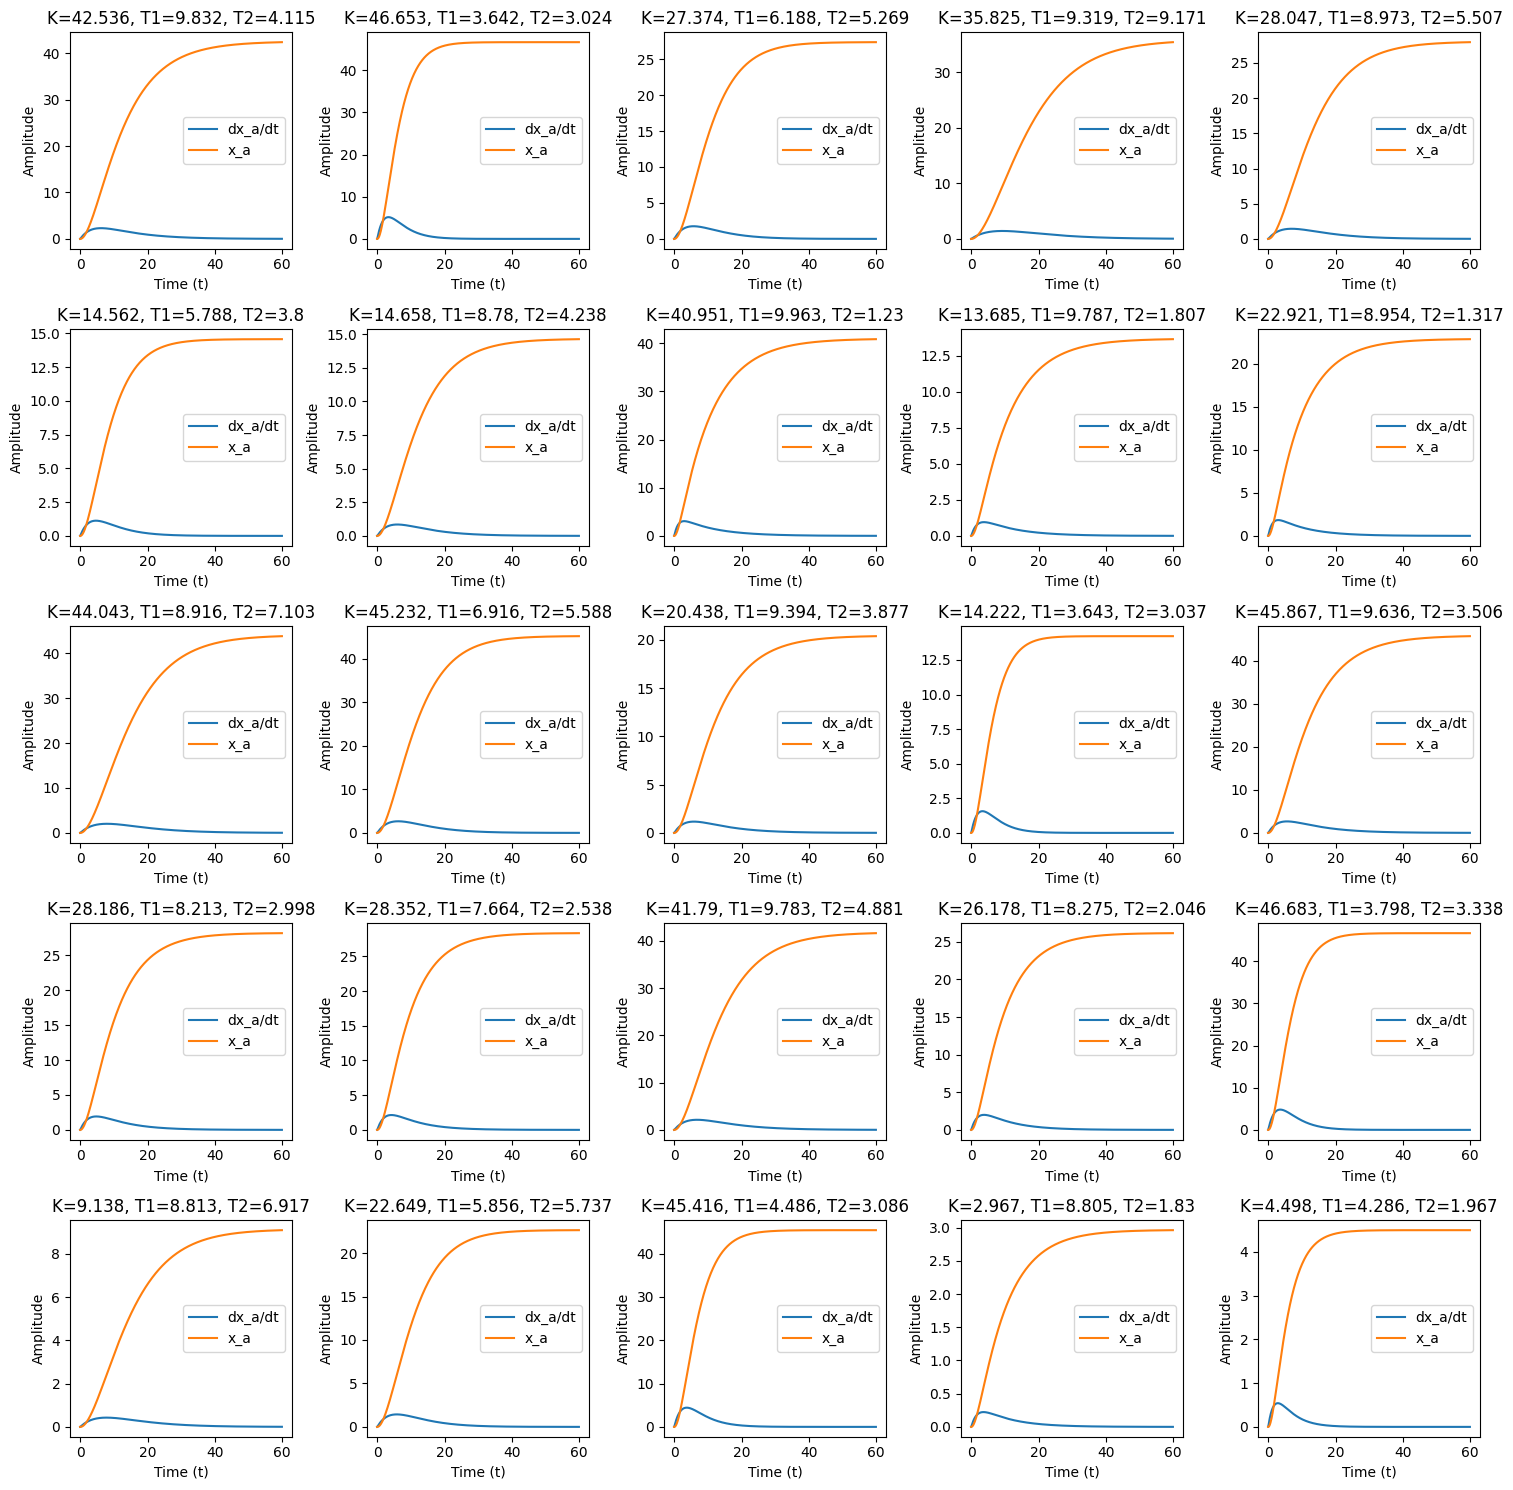

In [ ]:
# ...existing code...
responses = X[0:25]
fig, axes = plt.subplots(nrows= 5, ncols=5, figsize=(15,15))
for i,ax in enumerate(axes.flatten()):
    t = responses[i][:, 2]
    da_dt = responses[i][:, 0]
    x_a = responses[i][:, 1]
    K = y[i][0]
    T1 = y[i][1]
    T2 = y[i][2]
    ax.plot(t, da_dt, label='dx_a/dt')
    ax.plot(t, x_a, label='x_a')
    ax.set_title(f'K={K}, T1={T1}, T2={T2}')
    ax.legend()
    ax.set_xlabel('Time (t)')
    ax.set_ylabel('Amplitude')

plt.tight_layout() # Adjust subplot params for a tight layout
plt.show() # Display the figure

### Parameters

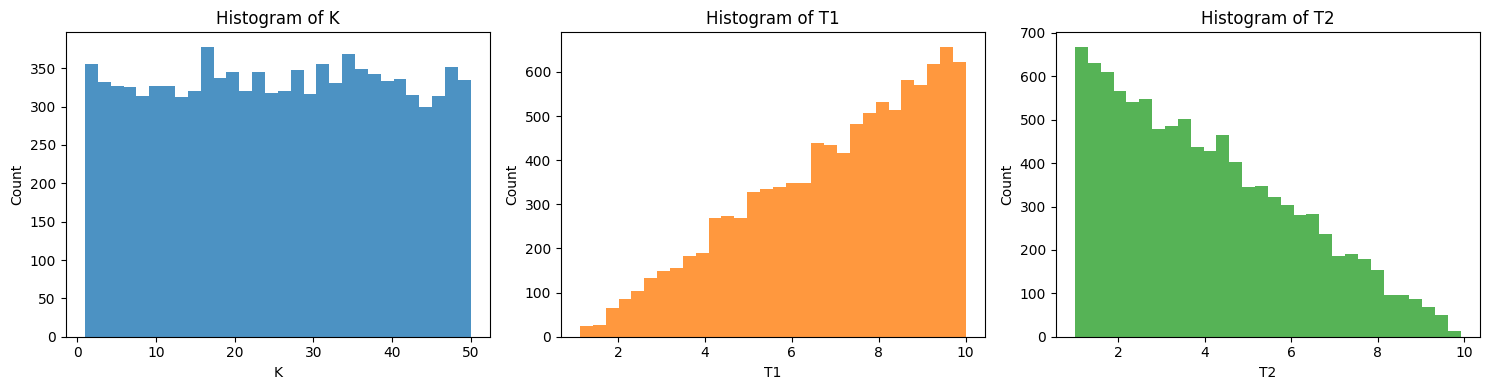

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

y = np.asarray(y, dtype=float)  # ensure numeric array, shape (N,3)

labels = ['K', 'T1', 'T2']
fig, axes = plt.subplots(1, 3, figsize=(15,4))
for i, ax in enumerate(axes):
    ax.hist(y[:, i], bins=30, color=f'C{i}', alpha=0.8)
    ax.set_title(f'Histogram of {labels[i]}')
    ax.set_xlabel(labels[i])
    ax.set_ylabel('Count')
plt.tight_layout()
plt.show()

### Distributions

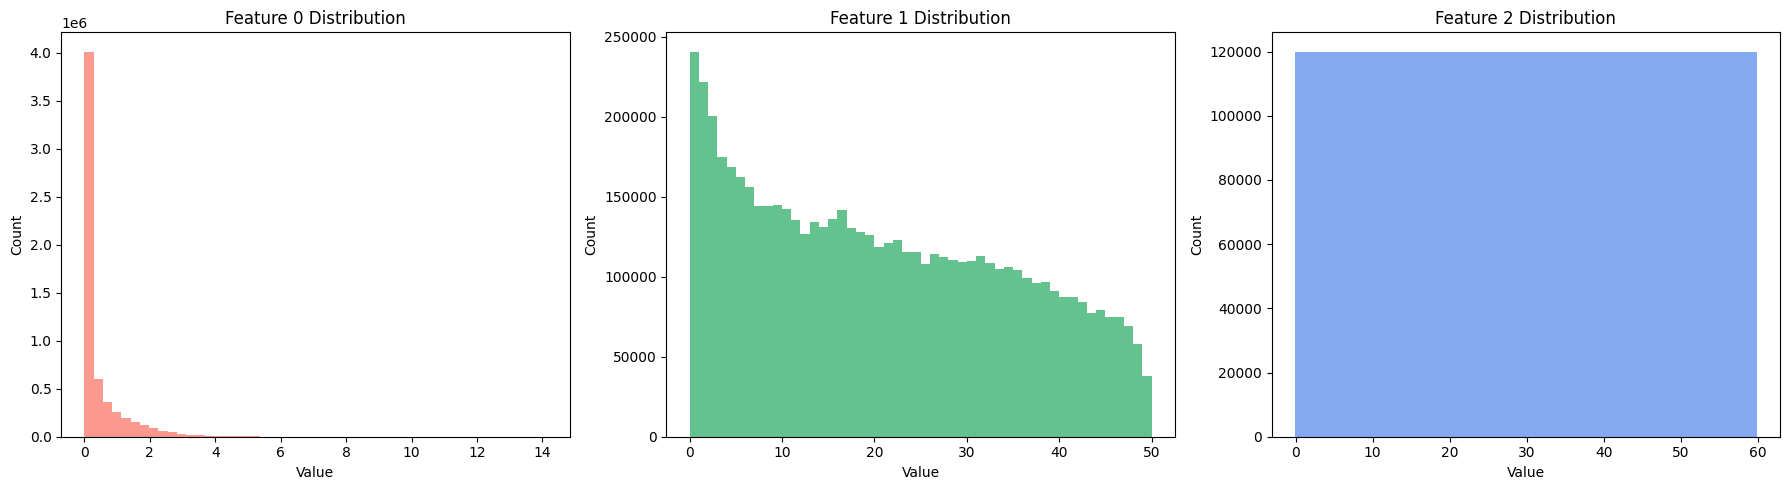

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

fig, axes = plt.subplots(1, 3, figsize=(18, 5))
colors = ['salmon', 'mediumseagreen', 'cornflowerblue']
labels = ['Feature 0', 'Feature 1', 'Feature 2']

for i in range(0,3):
  feat = X[:,:,i].flatten()
  # print(feat) # Commenting out print to avoid large output
  axes[i].hist(feat, bins=50, color=colors[i], alpha=0.8)
  axes[i].set_title(f'{labels[i]} Distribution')
  axes[i].set_xlabel('Value')
  axes[i].set_ylabel('Count')

plt.tight_layout()
plt.show()

### TRAINING MODEL

1.   List item
2.   List item



In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense,Input, Concatenate
from tensorflow.keras.optimizers import Adam

random_state = 42
tf.keras.utils.set_random_seed(random_state)
physical_devices = tf.config.list_physical_devices('GPU')
print("Num GPUs Available: ", len(physical_devices))

if len(physical_devices) > 0:
    print(f"Device Name: {physical_devices[0].name}")
else:
    print("⚠️ No GPU found. Training will run on CPU.")


Num GPUs Available:  1
Device Name: /physical_device:GPU:0


### Preprocessing

In [ ]:
#X_xa = X[:, : , 1:3] # Corrected: Ensure X_xa remains 3D (samples, timesteps, 2 for features 1 and 2)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=random_state)

# Reshape X_train and X_test for StandardScaler
# StandardScaler expects a 2D array: (n_samples, n_features)
# Here, each 'sample' will be a single time step from all experiments, so we flatten the first two dimensions.
num_samples_train, time_steps, num_features = X_train.shape
X_train_reshaped = X_train.reshape(-1, num_features)

num_samples_test, _, _ = X_test.shape
X_test_reshaped = X_test.reshape(-1, num_features)

# Initialize and fit StandardScaler
scaler = StandardScaler()
scaler.fit(X_train_reshaped) # Fit on training data only

# Transform both training and testing data
X_train_scaled_reshaped = scaler.transform(X_train_reshaped)
X_test_scaled_reshaped = scaler.transform(X_test_reshaped)

# Reshape back to original 3D shape (num_samples, time_steps, num_features) for Conv1D
X_train_scaled = X_train_scaled_reshaped.reshape(num_samples_train, time_steps, num_features)
X_test_scaled = X_test_scaled_reshaped.reshape(num_samples_test, time_steps, num_features)

y_scaler = StandardScaler()
y_train_scaled = y_scaler.fit_transform(y_train)
y_test_scaled = y_scaler.transform(y_test)

print(f"Original X shape: {X.shape}")
print(f"X_train_scaled shape: {X_train_scaled.shape}")
print(f"X_test_scaled shape: {X_test_scaled.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

Original X shape: (10000, 600, 3)
X_train_scaled shape: (8000, 600, 3)
X_test_scaled shape: (2000, 600, 3)
y_train shape: (8000, 3)
y_test shape: (2000, 3)


### CNN with branching

In [ ]:
inputs = Input(shape=(600, 3))
# --- Start Branching ---
# Branch 1: Fast (Microscope)
branch_a = Conv1D(filters=32, kernel_size=3, padding='same', activation='relu')(inputs)

# Branch 2: Medium (Standard)
branch_b = Conv1D(filters=32, kernel_size=15, padding='same', activation='relu')(inputs)

# Branch 3: Slow (Telescope)
branch_c = Conv1D(filters=32, kernel_size=60, padding='same', activation='relu')(inputs)

# Combine branches
concatenated = Concatenate()([branch_a, branch_b, branch_c])
# --- End Branching ---

# 2. Continue the chain (The "Sequential" part, but written Functionally)
# Instead of model.add(Layer), we do: x = Layer()(previous_x)

x = MaxPooling1D(pool_size=2)(concatenated)
x = Flatten()(x)
x = Dense(128, activation='relu')(x)
# 3. Output Layer
# Dense(3) matches your request for 3 regression targets
outputs = Dense(3, activation='linear')(x)

# 4. Finalize the Model
model = Model(inputs=inputs, outputs=outputs)

# 5. Compile
optimizer_lr_adjusted = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer_lr_adjusted, loss='mse')

# 6. Check your architecture
model.summary()

Model: "functional_25"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_8       │ (None, 600, 3)    │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_14 (Conv1D)  │ (None, 600, 32)   │        320 │ input_layer_8[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_15 (Conv1D)  │ (None, 600, 32)   │      1,472 │ input_layer_8[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_16 (Conv1D)  │ (None, 600, 32)   │      5,792 │ input_layer_8[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_3       │ (None, 600, 96)   │          0 │ conv1d_14[0][0],  │
│ (Concatenate)       │                   │            │ conv1d_15[0][0],  │
│                     │                   │            │ conv1d_16[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling1d_7     │ (None, 300, 96)   │          0 │ concatenate_3[0]… │
│ (MaxPooling1D)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten_7 (Flatten) │ (None, 28800)     │          0 │ max_pooling1d_7[… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_14 (Dense)    │ (None, 128)       │  3,686,528 │ flatten_7[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_15 (Dense)    │ (None, 128)       │     16,512 │ dense_14[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_16 (Dense)    │ (None, 3)         │        387 │ dense_15[0][0]    │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 3,711,011 (14.16 MB)

 Trainable params: 3,711,011 (14.16 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history = model.fit(X_train_scaled, y_train_scaled, epochs=200, batch_size=32, validation_split=0.2, verbose=1)

Epoch 1/200
200/200 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - loss: 0.4802 - val_loss: 0.1296
Epoch 2/200
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0856 - val_loss: 0.0777
Epoch 3/200
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0628 - val_loss: 0.0723
Epoch 4/200
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0544 - val_loss: 0.0498
Epoch 5/200
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0484 - val_loss: 0.0376
Epoch 6/200
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0414 - val_loss: 0.0311
Epoch 7/200
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0380 - val_loss: 0.0336
Epoch 8/200
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0372 - val_loss: 0.0291
Epoch 9/200
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0318 - val_loss: 0.0281
Epoch 10/200
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0328 - val_loss: 0.0305
Epoch 11/200
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0312 - val_loss: 0.0507
Epoch 12/200
200/200 ━━━━━━━━━━━━━━━━━━━━

In [ ]:
#loss, mae = model.evaluate(X_test_scaled, y_test_scaled, verbose=1)
loss = model.evaluate(X_test_scaled, y_test_scaled, verbose=1)
print(f"Test Loss: {loss:.4f}")
#print(f"Test MAE: {mae:.4f}")

63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0053
Test Loss: 0.0055


In [ ]:
y_pred_scaled = model.predict(X_test_scaled)
y_pred = y_scaler.inverse_transform(y_pred_scaled)
y_actual = y_scaler.inverse_transform(y_test_scaled)

63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step


In [ ]:
import pandas as pd

results_df = pd.DataFrame({
    'K_DIFF' : y_actual[:, 0] - y_pred[:, 0],
    'T1_DIFF' : y_actual[:, 1] - y_pred[:, 1],
    'T2_DIFF' : y_actual[:, 2] - y_pred[:, 2],
    'Actual_K': y_actual[:, 0],
    'Actual_T1': y_actual[:, 1],
    'Actual_T2': y_actual[:, 2],

})

display(results_df)

,K_DIFF,T1_DIFF,T2_DIFF,Actual_K,Actual_T1,Actual_T2
0,1.082430,-0.114470,0.007005,9.021,7.004,1.282
1,0.155073,0.012004,-0.384635,49.615,9.462,5.415
2,0.209904,-0.002119,-0.060376,27.698,8.661,2.793
3,0.817364,-0.002392,-0.051713,47.980,5.198,4.366
4,0.562153,0.055135,-0.022727,17.958,6.495,3.584
...,...,...,...,...,...,...
1995,0.933593,0.078268,-0.042896,15.688,2.922,1.314
1996,0.764509,0.007275,0.070097,16.228,4.036,1.014
1997,0.197762,-0.040256,-0.049842,4.309,3.729,2.356
1998,0.480544,-0.027290,-0.035914,19.912,9.532,4.654


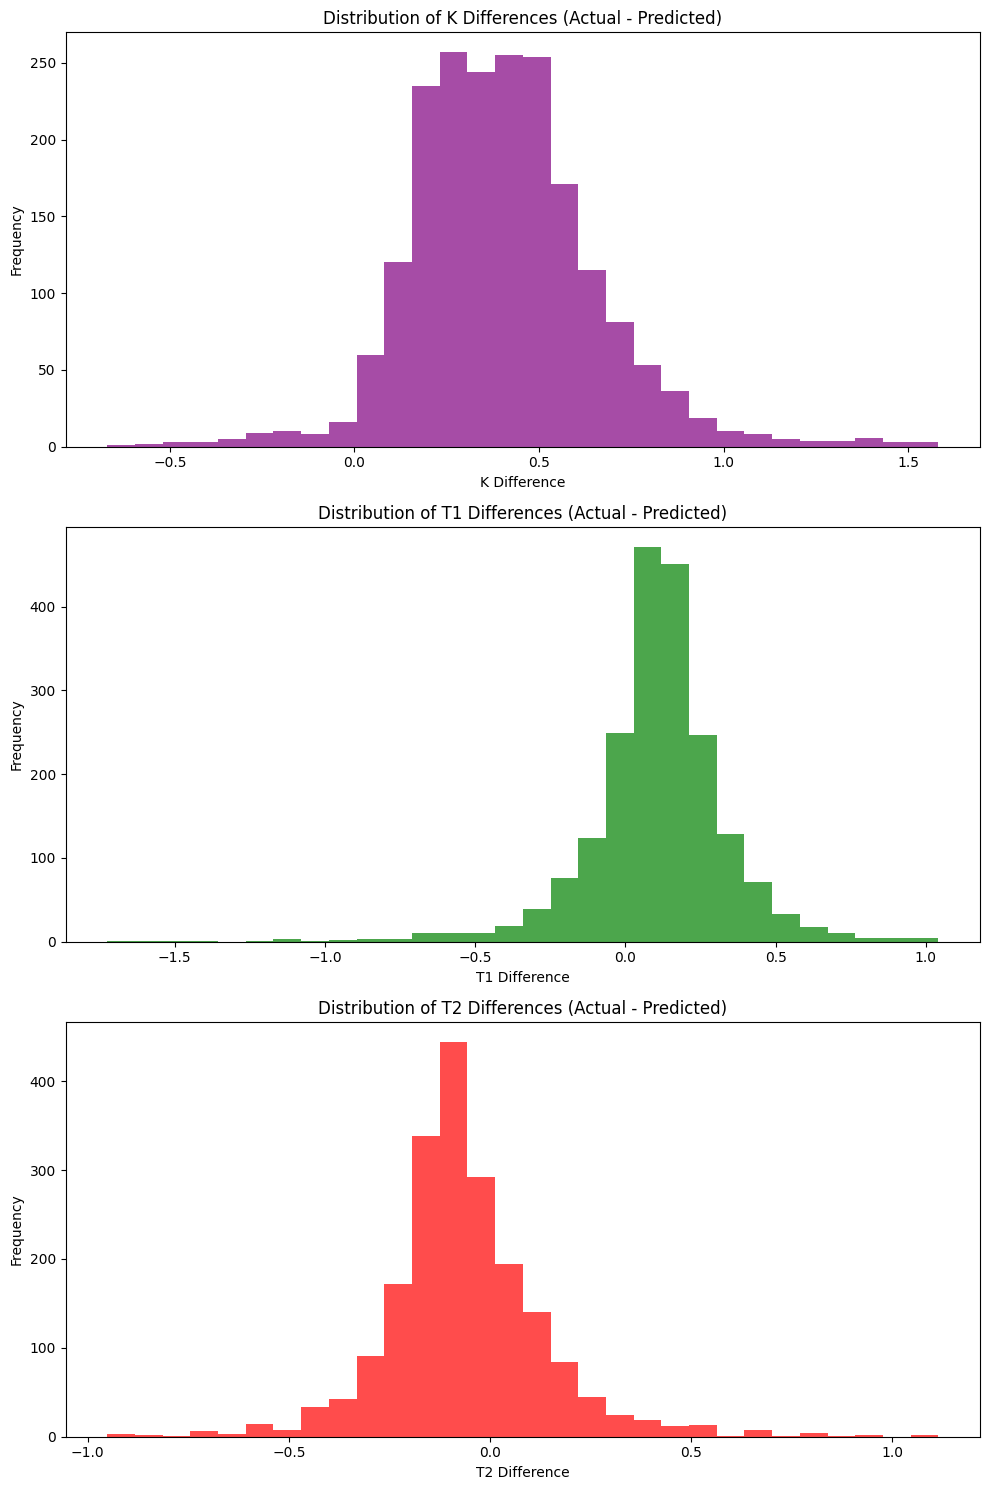

In [ ]:
import matplotlib.pyplot as plt

fig_diff, axes_diff = plt.subplots(3, 1, figsize=(10, 15))

# K_DIFF distribution
axes_diff[0].hist(results_df['K_DIFF'], bins=30, color='purple', alpha=0.7)
axes_diff[0].set_title('Distribution of K Differences (Actual - Predicted)')
axes_diff[0].set_xlabel('K Difference')
axes_diff[0].set_ylabel('Frequency')

# T1_DIFF distribution
axes_diff[1].hist(results_df['T1_DIFF'], bins=30, color='green', alpha=0.7)
axes_diff[1].set_title('Distribution of T1 Differences (Actual - Predicted)')
axes_diff[1].set_xlabel('T1 Difference')
axes_diff[1].set_ylabel('Frequency')

# T2_DIFF distribution
axes_diff[2].hist(results_df['T2_DIFF'], bins=30, color='red', alpha=0.7)
axes_diff[2].set_title('Distribution of T2 Differences (Actual - Predicted)')
axes_diff[2].set_xlabel('T2 Difference')
axes_diff[2].set_ylabel('Frequency')

plt.tight_layout()
plt.show()